In [1]:
import pickle
from os import listdir
from os.path import isfile, join
import sys
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
mypath =  "/home/bumblebee/Desktop/bigdata2_ngrams_subset/"

In [3]:
directories = listdir(mypath)

In [4]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
for directory in directories:
    pathToDir = mypath+directory+"/"
    with open(pathToDir+"top.txt",'rb') as f:
        dictionary = pickle.load(f,encoding='latin1')
        print(len(dictionary))
        

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [6]:
print(len(directories))

19


In [7]:
count = 0
for directory in directories:
    pathToDir = mypath+directory+"/"
    onlyfiles = [f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
    print(directory +" & " +str(len(onlyfiles)) + " \\" + "\\")
    count = count+len(onlyfiles)
print(count)

vobfus & 1926 \\
lolyda & 1926 \\
ceeinject & 1926 \\
cycbot & 1926 \\
bho & 1926 \\
zbot & 1926 \\
fakerean & 1926 \\
alureon & 1926 \\
winwebsec & 1926 \\
renos & 1926 \\
vundo & 1926 \\
hotbar & 1926 \\
adload & 1926 \\
agent & 1926 \\
startpage & 1926 \\
delfinject & 1926 \\
obfuscator & 1926 \\
rbot & 1926 \\
onlinegames & 1926 \\
36594


In [8]:
# Dictionary = {}
# flag = 0
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     with open(pathToDir+"top.txt",'rb') as f:
#         d = pickle.load(f,encoding='latin1')
#         if flag == 0:
#             Dictionary = d
#             flag = 1
#         else :
#             for key,value in d.items():
#                 if key in Dictionary:
#                     Dictionary[key] = Dictionary[key] + value
#                 else :
#                     Dictionary[key] = value

In [9]:
# K = 1000

In [10]:
# featureVectorTopK = sorted(Dictionary.items(), key=lambda kv: kv[1],reverse=True)[:K]

In [11]:
# print(featureVectorTopK)

In [12]:
# dataset = []
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     fileName = [pathToDir+f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
#     for filePath in fileName:
#         dictionaryOfNgram = {}
#         with open(filePath,"rb") as f:
#             dictionaryOfNgram = pickle.load(f,encoding='latin1')
#         vectorForSample = []
#         for ngram_tuple in featureVectorTopK:
#             if (ngram_tuple[0] in dictionaryOfNgram.keys()):
#                 vectorForSample.append(dictionaryOfNgram[ngram_tuple[0]])
#             else:
#                 vectorForSample.append(0)
#         sumOfRow = sum(vectorForSample)
#         for i in range(0,len(vectorForSample)):
#             vectorForSample[i] = float(vectorForSample[i]) / sumOfRow
#         vectorForSample = [directory] + vectorForSample
#         dataset.append(vectorForSample)

In [13]:
# print(len(dataset))

In [14]:
# print(dataset[0])

In [15]:
# print(dataset)

In [16]:
# dataset_Tmp = pd.DataFrame(dataset,columns=["Family Name"]+[i for i in range(1,K+1)])
# dataset_Tmp.to_csv("../dataset/bigdata1/top1000_bigdata1.csv",sep="\t")

In [8]:
dataset_dataframe = pd.read_csv("../dataset/bigdata2/top1000_bigdata2.csv",sep="\t")
dataset_dataframe.head()

Unnamed: 0 Family Name         1         2         3         4         5  \
0           0      vobfus  0.348338  0.016276  0.031801  0.026366  0.000000   
1           1      vobfus  0.335934  0.016847  0.009907  0.022331  0.000000   
2           2      vobfus  0.431608  0.043672  0.016789  0.012910  0.000398   
3           3      vobfus  0.232549  0.069127  0.049782  0.006446  0.000000   
4           4      vobfus  0.256512  0.068547  0.049332  0.006191  0.000000   

          6         7         8  ...        991       992  993  994       995  \
0  0.007327  0.000000  0.014864  ...   0.000000  0.000000  0.0  0.0  0.000000   
1  0.005196  0.000000  0.025441  ...   0.000306  0.000000  0.0  0.0  0.000000   
2  0.007956  0.000000  0.012227  ...   0.000000  0.000000  0.0  0.0  0.000317   
3  0.009457  0.010725  0.003712  ...   0.000000  0.001370  0.0  0.0  0.000000   
4  0.009515  0.008576  0.004406  ...   0.000000  0.001641  0.0  0.0  0.000000   

   996  997  998  999  1000  
0  0.0  0.0  0.0  0.0   0.0  
1  0.0  0.0  0.0  0.0   0.0  
2  0.0  0.0  0.0  0.0   0.0  
3  0.0  0.0  0.0  0.0   0.0  
4  0.0  0.0  0.0  0.0   0.0  

[5 rows x 1002 columns]

In [9]:
dataset = np.array(dataset_dataframe.iloc[:,2:])

In [10]:
print(len(dataset))

36575


In [11]:
y = np.array(dataset_dataframe.loc[:,"Family Name"])

In [12]:
TopFamilyName = ['vobfus', 'lolyda', 'ceeinject', 'cycbot', 'bho', 'fakerean', 'alureon', 'renos', 'vundo', 'hotbar', 'adload', 'agent', 'startpage', 'delfinject', 'obfuscator', 'rbot', 'onlinegames','winwebsec','zbot']
topfam = set(TopFamilyName) 
label = []
for familyname in y:
    if familyname in topfam:
        for name_index in range(0,len(TopFamilyName)):
            if familyname == TopFamilyName[name_index]:
                label.append(name_index)
    else :
        label.append(len(TopFamilyName))
label = np.array(label)

In [13]:
print(len(dataset))

36575


In [22]:
# avg_scores_knn = [0 for i in range(0,10)]
# n_itr = 5
# for itr in range(0,n_itr):
#     # Dividing the dataset into various sub-dataset
#     skf = StratifiedKFold(n_splits=10,shuffle=True)
#     subDatasetIndex = []
#     for train_index, test_index in skf.split(dataset,label):
#         subDatasetIndex.append(test_index)
#     # Verifying the whether the total is equal to total dataset
#     sum = 0;
#     for elem in subDatasetIndex:
#         print(len(elem))
#         sum = sum+len(elem)

#     MeanScoreForAll = []
#     sizeOfEachDataset = []
#     for i in range(1,11):
#         X = []
#         Y = []
#         tmp_sizeOfEachDataset_sum = 0;
#         for j in range (0,i):
#             tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
#             for rowIndex in subDatasetIndex[j]:
#                 X.append(dataset[rowIndex])
#                 Y.append(label[rowIndex])
#         sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
#         X = np.array(X)
#         Y = np.array(Y)
#         mean_accuracy_array = []
#         k_range = range(1, 31)
#         k_scores = []
#         # 1. we will loop through reasonable values of k
#         for k in k_range:
#             # 2. run KNeighborsClassifier with k neighbours
#             knn = KNeighborsClassifier(n_neighbors=k)
#             # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
#             cv = StratifiedKFold(n_splits=10,shuffle=True)
#             scores = cross_val_score(knn, X, Y, cv=cv, scoring='accuracy')
#             # 4. append mean of scores for k neighbors to k_scores list
#             k_scores.append(scores.mean())
#         print("For i = " + str(i))
#         print("Scores For K ranging from 1 to 30 \n" + str(k_scores))
#         highestAccuracy_k = (k_scores.index(max(k_scores))+1)
#         print("K with highest accuracy and its accuracy : " + str(highestAccuracy_k) +" , " + str(k_scores[highestAccuracy_k-1]))
#         mean_accuracy_array.append(k_scores[highestAccuracy_k-1])
#         mean = np.mean(mean_accuracy_array)
#         MeanScoreForAll.append(mean)
#         print("Mean Accuracy : " + str(mean))
#         print("\n\n")
#     for i in range(0,len(MeanScoreForAll)):
#         avg_scores_knn[i] = avg_scores_knn[i]+MeanScoreForAll[i]

In [23]:
# for score in avg_scores_knn:
#     print((score*100)/5)

In [24]:
# tmp = avg_scores_knn
# for i in range(0,len(avg_scores_knn)):
#     avg_scores_knn[i] = avg_scores_knn[i] / n_itr
# print(avg_scores_knn)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.1)

In [15]:
print(len(X_train[0]))

1000


In [ ]:
# Trial and error
# valuesOfEpochs = [5,10,50,100,200,500,1000]
# valuesOfTestSize = [0.1,0.2,0.3]
valuesOfEpochs = [1000]
valuesOfTestSize = [0.1,0.2,0.3]
overAllY = []
n_itr = 5
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        sizeOfEachDataset = []
        accForVariousSize = [0 for i in range (0,10)]
        lossForVariousSize = [0 for i in range(0,10)]
        for itr in range(0,n_itr):
            print(str(v) + ", "+str(e) + ", "+str(itr))
            # Dividing the dataset into various sub-dataset
            skf = StratifiedKFold(n_splits=10,shuffle=True)
            subDatasetIndex = []
            for train_index, test_index in skf.split(dataset,label):
                subDatasetIndex.append(test_index)
                
            for i in range(1,11):
                print("------" + str(i) + "--------")
                X = []
                Y = []
                tmp_sizeOfEachDataset_sum = 0;
                for j in range (0,i):
                    tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
                    for rowIndex in subDatasetIndex[j]:
                        X.append(dataset[rowIndex])
                        Y.append(label[rowIndex])
                sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
                X = np.array(X)
                Y = np.array(Y)
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=v)
                model = keras.Sequential()
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal',input_dim=1000))
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal'))
                model.add(keras.layers.Dense(19, activation='sigmoid', kernel_initializer='random_normal'))
                model.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=e)
                loss, acc = model.evaluate(X_test,y_test)
                accForVariousSize[i-1] = accForVariousSize[i-1] + acc
                lossForVariousSize[i-1] = lossForVariousSize[i-1] + loss
        print(accForVariousSize)
            
        for i in range(0,10):
            accForVariousSize[i] = accForVariousSize[i] / n_itr
            lossForVariousSize[i] = lossForVariousSize[i] / n_itr
        overAllY.append(accForVariousSize)

0.1, 1000, 0
------1--------
Epoch 1/1000
3300/3300 [==============================] - 3s 868us/sample - loss: 2.9019 - acc: 0.1067
Epoch 2/1000
3300/3300 [==============================] - 1s 266us/sample - loss: 2.5842 - acc: 0.1497
Epoch 3/1000
3300/3300 [==============================] - 1s 256us/sample - loss: 2.3161 - acc: 0.2733
Epoch 4/1000
3300/3300 [==============================] - 1s 266us/sample - loss: 2.0657 - acc: 0.3515
Epoch 5/1000
3300/3300 [==============================] - 1s 269us/sample - loss: 1.9149 - acc: 0.3848
Epoch 6/1000
3300/3300 [==============================] - 1s 285us/sample - loss: 1.8128 - acc: 0.4170
Epoch 7/1000
3300/3300 [==============================] - 1s 268us/sample - loss: 1.7270 - acc: 0.4576
Epoch 8/1000
3300/3300 [==============================] - 1s 269us/sample - loss: 1.6599 - acc: 0.4824
Epoch 9/1000
3300/3300 [==============================] - 1s 283us/sample - loss: 1.5950 - acc: 0.4964
Epoch 10/1000
3300/3300 [===================

3300/3300 [==============================] - 1s 270us/sample - loss: 0.3736 - acc: 0.8939
Epoch 80/1000
3300/3300 [==============================] - 1s 374us/sample - loss: 0.3695 - acc: 0.8930
Epoch 81/1000
3300/3300 [==============================] - 1s 429us/sample - loss: 0.3642 - acc: 0.8952
Epoch 82/1000
3300/3300 [==============================] - 1s 392us/sample - loss: 0.3551 - acc: 0.8964
Epoch 83/1000
3300/3300 [==============================] - 1s 427us/sample - loss: 0.3487 - acc: 0.9003
Epoch 84/1000
3300/3300 [==============================] - 1s 378us/sample - loss: 0.3403 - acc: 0.9015
Epoch 85/1000
3300/3300 [==============================] - 1s 250us/sample - loss: 0.3491 - acc: 0.8997
Epoch 86/1000
3300/3300 [==============================] - 1s 242us/sample - loss: 0.3352 - acc: 0.9018
Epoch 87/1000
3300/3300 [==============================] - 1s 271us/sample - loss: 0.3292 - acc: 0.9048
Epoch 88/1000
3300/3300 [==============================] - 1s 282us/sample - l

3300/3300 [==============================] - 3s 819us/sample - loss: 0.1169 - acc: 0.9733
Epoch 158/1000
3300/3300 [==============================] - 3s 827us/sample - loss: 0.1124 - acc: 0.9724
Epoch 159/1000
3300/3300 [==============================] - 2s 700us/sample - loss: 0.1142 - acc: 0.9736
Epoch 160/1000
3300/3300 [==============================] - 2s 708us/sample - loss: 0.1118 - acc: 0.9697
Epoch 161/1000
3300/3300 [==============================] - 2s 742us/sample - loss: 0.1126 - acc: 0.9700
Epoch 162/1000
3300/3300 [==============================] - 2s 735us/sample - loss: 0.1175 - acc: 0.9682
Epoch 163/1000
3300/3300 [==============================] - 2s 745us/sample - loss: 0.1061 - acc: 0.9733
Epoch 164/1000
3300/3300 [==============================] - 2s 716us/sample - loss: 0.1038 - acc: 0.9755
Epoch 165/1000
3300/3300 [==============================] - 3s 777us/sample - loss: 0.1045 - acc: 0.9742
Epoch 166/1000
3300/3300 [==============================] - 2s 695us/s

3300/3300 [==============================] - 2s 672us/sample - loss: 0.0439 - acc: 0.9888
Epoch 235/1000
3300/3300 [==============================] - 2s 487us/sample - loss: 0.0625 - acc: 0.9864
Epoch 236/1000
3300/3300 [==============================] - 1s 424us/sample - loss: 0.0384 - acc: 0.9924
Epoch 237/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0460 - acc: 0.9888
Epoch 238/1000
3300/3300 [==============================] - 1s 417us/sample - loss: 0.0434 - acc: 0.9897
Epoch 239/1000
3300/3300 [==============================] - 1s 424us/sample - loss: 0.0401 - acc: 0.9900
Epoch 240/1000
3300/3300 [==============================] - 1s 426us/sample - loss: 0.0394 - acc: 0.9906
Epoch 241/1000
3300/3300 [==============================] - 2s 625us/sample - loss: 0.0451 - acc: 0.9897
Epoch 242/1000
3300/3300 [==============================] - 2s 611us/sample - loss: 0.0438 - acc: 0.9900
Epoch 243/1000
3300/3300 [==============================] - 1s 389us/s

3300/3300 [==============================] - 1s 344us/sample - loss: 0.0221 - acc: 0.9936
Epoch 313/1000
3300/3300 [==============================] - 1s 371us/sample - loss: 0.0302 - acc: 0.9921
Epoch 314/1000
3300/3300 [==============================] - 1s 408us/sample - loss: 0.0292 - acc: 0.9906
Epoch 315/1000
3300/3300 [==============================] - 1s 420us/sample - loss: 0.0216 - acc: 0.9958
Epoch 316/1000
3300/3300 [==============================] - 1s 420us/sample - loss: 0.0205 - acc: 0.9942
Epoch 317/1000
3300/3300 [==============================] - 1s 434us/sample - loss: 0.0242 - acc: 0.9927
Epoch 318/1000
3300/3300 [==============================] - 1s 383us/sample - loss: 0.0237 - acc: 0.9927
Epoch 319/1000
3300/3300 [==============================] - 1s 398us/sample - loss: 0.0264 - acc: 0.9930
Epoch 320/1000
3300/3300 [==============================] - 1s 404us/sample - loss: 0.0245 - acc: 0.9936
Epoch 321/1000
3300/3300 [==============================] - 1s 400us/s

3300/3300 [==============================] - 1s 330us/sample - loss: 0.0152 - acc: 0.9955
Epoch 391/1000
3300/3300 [==============================] - 1s 371us/sample - loss: 0.0141 - acc: 0.9961
Epoch 392/1000
3300/3300 [==============================] - 1s 419us/sample - loss: 0.0163 - acc: 0.9945
Epoch 393/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0188 - acc: 0.9952
Epoch 394/1000
3300/3300 [==============================] - 1s 426us/sample - loss: 0.0145 - acc: 0.9967
Epoch 395/1000
3300/3300 [==============================] - 1s 427us/sample - loss: 0.0261 - acc: 0.9921
Epoch 396/1000
3300/3300 [==============================] - 1s 430us/sample - loss: 0.0189 - acc: 0.9939
Epoch 397/1000
3300/3300 [==============================] - 1s 432us/sample - loss: 0.0157 - acc: 0.9964
Epoch 398/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0200 - acc: 0.9942
Epoch 399/1000
3300/3300 [==============================] - 1s 393us/s

3300/3300 [==============================] - 1s 403us/sample - loss: 0.0112 - acc: 0.9967
Epoch 468/1000
3300/3300 [==============================] - 2s 459us/sample - loss: 0.0154 - acc: 0.9955
Epoch 469/1000
3300/3300 [==============================] - 1s 439us/sample - loss: 0.0124 - acc: 0.9970
Epoch 470/1000
3300/3300 [==============================] - 2s 469us/sample - loss: 0.0101 - acc: 0.9973
Epoch 471/1000
3300/3300 [==============================] - ETA: 0s - loss: 0.0107 - acc: 0.997 - 1s 454us/sample - loss: 0.0107 - acc: 0.9973
Epoch 472/1000
3300/3300 [==============================] - 2s 481us/sample - loss: 0.0325 - acc: 0.9885
Epoch 473/1000
3300/3300 [==============================] - 1s 432us/sample - loss: 0.0588 - acc: 0.9845
Epoch 474/1000
3300/3300 [==============================] - 1s 452us/sample - loss: 0.0165 - acc: 0.9961
Epoch 475/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0126 - acc: 0.9967
Epoch 476/1000
3300/3300 [======

3300/3300 [==============================] - 2s 624us/sample - loss: 0.0132 - acc: 0.9964
Epoch 545/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0114 - acc: 0.9970
Epoch 546/1000
3300/3300 [==============================] - 2s 477us/sample - loss: 0.0097 - acc: 0.9973
Epoch 547/1000
3300/3300 [==============================] - 2s 517us/sample - loss: 0.0118 - acc: 0.9964
Epoch 548/1000
3300/3300 [==============================] - 2s 558us/sample - loss: 0.0092 - acc: 0.9970
Epoch 549/1000
3300/3300 [==============================] - 2s 488us/sample - loss: 0.0095 - acc: 0.9967
Epoch 550/1000
3300/3300 [==============================] - 1s 375us/sample - loss: 0.0129 - acc: 0.9958
Epoch 551/1000
3300/3300 [==============================] - 1s 389us/sample - loss: 0.0112 - acc: 0.9967
Epoch 552/1000
3300/3300 [==============================] - 2s 476us/sample - loss: 0.0124 - acc: 0.9955
Epoch 553/1000
3300/3300 [==============================] - 2s 524us/s

3300/3300 [==============================] - 1s 409us/sample - loss: 0.0094 - acc: 0.9970
Epoch 623/1000
3300/3300 [==============================] - 1s 396us/sample - loss: 0.0099 - acc: 0.9970
Epoch 624/1000
3300/3300 [==============================] - 1s 407us/sample - loss: 0.0124 - acc: 0.9970
Epoch 625/1000
3300/3300 [==============================] - 1s 412us/sample - loss: 0.0117 - acc: 0.9967
Epoch 626/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0101 - acc: 0.9970
Epoch 627/1000
3300/3300 [==============================] - 1s 372us/sample - loss: 0.0104 - acc: 0.9970
Epoch 628/1000
3300/3300 [==============================] - 1s 384us/sample - loss: 0.0110 - acc: 0.9961
Epoch 629/1000
3300/3300 [==============================] - 1s 403us/sample - loss: 0.0126 - acc: 0.9970
Epoch 630/1000
3300/3300 [==============================] - 1s 410us/sample - loss: 0.0098 - acc: 0.9973
Epoch 631/1000
3300/3300 [==============================] - 1s 404us/s

3300/3300 [==============================] - 1s 434us/sample - loss: 0.0085 - acc: 0.9973
Epoch 701/1000
3300/3300 [==============================] - 1s 416us/sample - loss: 0.0103 - acc: 0.9967
Epoch 702/1000
3300/3300 [==============================] - 1s 390us/sample - loss: 0.0095 - acc: 0.9970
Epoch 703/1000
3300/3300 [==============================] - 1s 425us/sample - loss: 0.0086 - acc: 0.9973
Epoch 704/1000
3300/3300 [==============================] - 1s 427us/sample - loss: 0.0096 - acc: 0.9970
Epoch 705/1000
3300/3300 [==============================] - 1s 431us/sample - loss: 0.0087 - acc: 0.9973
Epoch 706/1000
3300/3300 [==============================] - 1s 429us/sample - loss: 0.0095 - acc: 0.9970
Epoch 707/1000
3300/3300 [==============================] - 1s 437us/sample - loss: 0.0093 - acc: 0.9973
Epoch 708/1000
3300/3300 [==============================] - 1s 413us/sample - loss: 0.0100 - acc: 0.9967
Epoch 709/1000
3300/3300 [==============================] - 1s 391us/s

3300/3300 [==============================] - 1s 430us/sample - loss: 0.0167 - acc: 0.9964
Epoch 779/1000
3300/3300 [==============================] - 2s 460us/sample - loss: 0.0088 - acc: 0.9973
Epoch 780/1000
3300/3300 [==============================] - 1s 433us/sample - loss: 0.0095 - acc: 0.9970
Epoch 781/1000
3300/3300 [==============================] - 1s 423us/sample - loss: 0.0106 - acc: 0.9970
Epoch 782/1000
3300/3300 [==============================] - 1s 424us/sample - loss: 0.0089 - acc: 0.9970
Epoch 783/1000
3300/3300 [==============================] - 1s 431us/sample - loss: 0.0093 - acc: 0.9973
Epoch 784/1000
3300/3300 [==============================] - 1s 420us/sample - loss: 0.0101 - acc: 0.9970
Epoch 785/1000
3300/3300 [==============================] - 1s 422us/sample - loss: 0.0162 - acc: 0.9961
Epoch 786/1000
3300/3300 [==============================] - 1s 430us/sample - loss: 0.0232 - acc: 0.9933
Epoch 787/1000
3300/3300 [==============================] - 1s 386us/s

3300/3300 [==============================] - 1s 380us/sample - loss: 0.0181 - acc: 0.9948
Epoch 857/1000
3300/3300 [==============================] - 1s 398us/sample - loss: 0.0171 - acc: 0.9930
Epoch 858/1000
3300/3300 [==============================] - 1s 402us/sample - loss: 0.0191 - acc: 0.9952
Epoch 859/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0132 - acc: 0.9961
Epoch 860/1000
3300/3300 [==============================] - 1s 369us/sample - loss: 0.0099 - acc: 0.9970
Epoch 861/1000
3300/3300 [==============================] - 1s 424us/sample - loss: 0.0088 - acc: 0.9973
Epoch 862/1000
3300/3300 [==============================] - 1s 424us/sample - loss: 0.0086 - acc: 0.9973
Epoch 863/1000
3300/3300 [==============================] - 1s 430us/sample - loss: 0.0084 - acc: 0.9973
Epoch 864/1000
3300/3300 [==============================] - 1s 403us/sample - loss: 0.0093 - acc: 0.9970
Epoch 865/1000
3300/3300 [==============================] - 1s 441us/s

3300/3300 [==============================] - 1s 416us/sample - loss: 0.0083 - acc: 0.9973
Epoch 935/1000
3300/3300 [==============================] - 1s 398us/sample - loss: 0.0092 - acc: 0.9970
Epoch 936/1000
3300/3300 [==============================] - 1s 406us/sample - loss: 0.0110 - acc: 0.9970
Epoch 937/1000
3300/3300 [==============================] - 1s 398us/sample - loss: 0.0093 - acc: 0.9970
Epoch 938/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0100 - acc: 0.9970
Epoch 939/1000
3300/3300 [==============================] - 1s 433us/sample - loss: 0.0126 - acc: 0.9958
Epoch 940/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0164 - acc: 0.9955
Epoch 941/1000
3300/3300 [==============================] - 1s 407us/sample - loss: 0.0090 - acc: 0.9970
Epoch 942/1000
3300/3300 [==============================] - 1s 410us/sample - loss: 0.0088 - acc: 0.9970
Epoch 943/1000
3300/3300 [==============================] - 1s 361us/s

6600/6600 [==============================] - 3s 388us/sample - loss: 1.2273 - acc: 0.6429
Epoch 12/1000
6600/6600 [==============================] - 3s 399us/sample - loss: 1.1871 - acc: 0.6468
Epoch 13/1000
6600/6600 [==============================] - 3s 426us/sample - loss: 1.1510 - acc: 0.6597
Epoch 14/1000
6600/6600 [==============================] - 3s 418us/sample - loss: 1.1104 - acc: 0.6732
Epoch 15/1000
6600/6600 [==============================] - 3s 405us/sample - loss: 1.0718 - acc: 0.6845
Epoch 16/1000
6600/6600 [==============================] - 3s 421us/sample - loss: 1.0402 - acc: 0.6923
Epoch 17/1000
6600/6600 [==============================] - 3s 418us/sample - loss: 1.0177 - acc: 0.6991
Epoch 18/1000
6600/6600 [==============================] - 3s 423us/sample - loss: 0.9883 - acc: 0.7089
Epoch 19/1000
6600/6600 [==============================] - 3s 419us/sample - loss: 0.9582 - acc: 0.7183
Epoch 20/1000
6600/6600 [==============================] - 3s 433us/sample - l

6600/6600 [==============================] - 5s 823us/sample - loss: 0.2303 - acc: 0.9365
Epoch 89/1000
6600/6600 [==============================] - 6s 839us/sample - loss: 0.2239 - acc: 0.9395s - loss: 0.2262 - acc: 
Epoch 90/1000
6600/6600 [==============================] - 6s 838us/sample - loss: 0.2223 - acc: 0.9389
Epoch 91/1000
6600/6600 [==============================] - 6s 847us/sample - loss: 0.2178 - acc: 0.9403
Epoch 92/1000
6600/6600 [==============================] - 5s 828us/sample - loss: 0.2161 - acc: 0.9420
Epoch 93/1000
6600/6600 [==============================] - 5s 783us/sample - loss: 0.2118 - acc: 0.9432
Epoch 94/1000
6600/6600 [==============================] - 5s 783us/sample - loss: 0.2129 - acc: 0.9412
Epoch 95/1000
6600/6600 [==============================] - 6s 853us/sample - loss: 0.2080 - acc: 0.9432
Epoch 96/1000
6600/6600 [==============================] - 6s 847us/sample - loss: 0.2024 - acc: 0.9474
Epoch 97/1000
6600/6600 [=============================

6600/6600 [==============================] - 5s 700us/sample - loss: 0.0853 - acc: 0.9758
Epoch 165/1000
6600/6600 [==============================] - 5s 832us/sample - loss: 0.0801 - acc: 0.9785
Epoch 166/1000
6600/6600 [==============================] - 5s 791us/sample - loss: 0.0782 - acc: 0.9788
Epoch 167/1000
6600/6600 [==============================] - 5s 830us/sample - loss: 0.0826 - acc: 0.9767
Epoch 168/1000
6600/6600 [==============================] - 5s 808us/sample - loss: 0.0772 - acc: 0.9803
Epoch 169/1000
6600/6600 [==============================] - 5s 729us/sample - loss: 0.0801 - acc: 0.9789
Epoch 170/1000
6600/6600 [==============================] - 5s 818us/sample - loss: 0.0771 - acc: 0.9792
Epoch 171/1000
6600/6600 [==============================] - 5s 788us/sample - loss: 0.0787 - acc: 0.9761
Epoch 172/1000
6600/6600 [==============================] - 6s 860us/sample - loss: 0.0777 - acc: 0.9792
Epoch 173/1000
6600/6600 [==============================] - 5s 817us/s

6600/6600 [==============================] - 3s 422us/sample - loss: 0.0444 - acc: 0.9879
Epoch 241/1000
6600/6600 [==============================] - 3s 439us/sample - loss: 0.0462 - acc: 0.9864
Epoch 242/1000
6600/6600 [==============================] - 3s 427us/sample - loss: 0.0451 - acc: 0.9868
Epoch 243/1000
6600/6600 [==============================] - 3s 411us/sample - loss: 0.0594 - acc: 0.9808
Epoch 244/1000
6600/6600 [==============================] - 3s 422us/sample - loss: 0.0527 - acc: 0.9852
Epoch 245/1000
6600/6600 [==============================] - 3s 427us/sample - loss: 0.0420 - acc: 0.9874
Epoch 246/1000
6600/6600 [==============================] - 2s 374us/sample - loss: 0.0417 - acc: 0.9888
Epoch 247/1000
6600/6600 [==============================] - 3s 420us/sample - loss: 0.0428 - acc: 0.9877
Epoch 248/1000
6600/6600 [==============================] - 3s 416us/sample - loss: 0.0497 - acc: 0.9855
Epoch 249/1000
6600/6600 [==============================] - 3s 470us/s

6600/6600 [==============================] - 3s 426us/sample - loss: 0.0354 - acc: 0.9897
Epoch 319/1000
6600/6600 [==============================] - 3s 406us/sample - loss: 0.0378 - acc: 0.9894
Epoch 320/1000
6600/6600 [==============================] - 3s 407us/sample - loss: 0.0313 - acc: 0.9911
Epoch 321/1000
6600/6600 [==============================] - 3s 424us/sample - loss: 0.0428 - acc: 0.9874
Epoch 322/1000
6600/6600 [==============================] - 3s 415us/sample - loss: 0.0383 - acc: 0.9897
Epoch 323/1000
6600/6600 [==============================] - 3s 402us/sample - loss: 0.0355 - acc: 0.9891
Epoch 324/1000
6600/6600 [==============================] - 3s 437us/sample - loss: 0.0324 - acc: 0.9906
Epoch 325/1000
6600/6600 [==============================] - 3s 386us/sample - loss: 0.0321 - acc: 0.9906
Epoch 326/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.0396 - acc: 0.9883
Epoch 327/1000
6600/6600 [==============================] - 3s 432us/s

6600/6600 [==============================] - 3s 452us/sample - loss: 0.0440 - acc: 0.9871
Epoch 397/1000
6600/6600 [==============================] - 3s 435us/sample - loss: 0.0287 - acc: 0.9914
Epoch 398/1000
6600/6600 [==============================] - 3s 402us/sample - loss: 0.0311 - acc: 0.9903
Epoch 399/1000
6600/6600 [==============================] - 3s 492us/sample - loss: 0.0289 - acc: 0.9911
Epoch 400/1000
6600/6600 [==============================] - 4s 555us/sample - loss: 0.0278 - acc: 0.9923
Epoch 401/1000
6600/6600 [==============================] - 3s 489us/sample - loss: 0.0276 - acc: 0.9911
Epoch 402/1000
6600/6600 [==============================] - 3s 480us/sample - loss: 0.0350 - acc: 0.9895
Epoch 403/1000
6600/6600 [==============================] - 3s 442us/sample - loss: 0.0311 - acc: 0.9906
Epoch 404/1000
6600/6600 [==============================] - 3s 439us/sample - loss: 0.0341 - acc: 0.9895
Epoch 405/1000
6600/6600 [==============================] - 3s 428us/s

6600/6600 [==============================] - 3s 433us/sample - loss: 0.0239 - acc: 0.9929
Epoch 475/1000
6600/6600 [==============================] - 3s 432us/sample - loss: 0.0307 - acc: 0.9903
Epoch 476/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.0301 - acc: 0.9915
Epoch 477/1000
6600/6600 [==============================] - 3s 393us/sample - loss: 0.0307 - acc: 0.9918
Epoch 478/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0332 - acc: 0.9905
Epoch 479/1000
6600/6600 [==============================] - 3s 418us/sample - loss: 0.0359 - acc: 0.9891
Epoch 480/1000
6600/6600 [==============================] - 3s 440us/sample - loss: 0.0284 - acc: 0.9914
Epoch 481/1000
6600/6600 [==============================] - 3s 434us/sample - loss: 0.0298 - acc: 0.9912
Epoch 482/1000
6600/6600 [==============================] - 3s 424us/sample - loss: 0.0306 - acc: 0.9915
Epoch 483/1000
6600/6600 [==============================] - 3s 424us/s

6600/6600 [==============================] - 3s 399us/sample - loss: 0.0266 - acc: 0.9924
Epoch 553/1000
6600/6600 [==============================] - 3s 379us/sample - loss: 0.0313 - acc: 0.9915
Epoch 554/1000
6600/6600 [==============================] - 3s 382us/sample - loss: 0.0293 - acc: 0.9911
Epoch 555/1000
6600/6600 [==============================] - 3s 407us/sample - loss: 0.0332 - acc: 0.9894
Epoch 556/1000
6600/6600 [==============================] - 3s 400us/sample - loss: 0.0223 - acc: 0.9932
Epoch 557/1000
6600/6600 [==============================] - 3s 405us/sample - loss: 0.0232 - acc: 0.9924
Epoch 558/1000
6600/6600 [==============================] - 3s 437us/sample - loss: 0.0284 - acc: 0.9915
Epoch 559/1000
6600/6600 [==============================] - 3s 406us/sample - loss: 0.0271 - acc: 0.9921
Epoch 560/1000
6600/6600 [==============================] - 3s 405us/sample - loss: 0.0257 - acc: 0.9920
Epoch 561/1000
6600/6600 [==============================] - 3s 402us/s

6600/6600 [==============================] - 3s 416us/sample - loss: 0.0245 - acc: 0.9929
Epoch 631/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0238 - acc: 0.9923
Epoch 632/1000
6600/6600 [==============================] - 3s 415us/sample - loss: 0.0323 - acc: 0.9898
Epoch 633/1000
6600/6600 [==============================] - 3s 418us/sample - loss: 0.0249 - acc: 0.9926
Epoch 634/1000
6600/6600 [==============================] - 3s 399us/sample - loss: 0.0246 - acc: 0.9924
Epoch 635/1000
6600/6600 [==============================] - 3s 430us/sample - loss: 0.0245 - acc: 0.9923
Epoch 636/1000
6600/6600 [==============================] - 3s 435us/sample - loss: 0.0342 - acc: 0.9889
Epoch 637/1000
6600/6600 [==============================] - 3s 425us/sample - loss: 0.0223 - acc: 0.9932
Epoch 638/1000
6600/6600 [==============================] - 3s 436us/sample - loss: 0.0231 - acc: 0.9932
Epoch 639/1000
6600/6600 [==============================] - 3s 416us/s

6600/6600 [==============================] - 3s 414us/sample - loss: 0.0263 - acc: 0.9924
Epoch 709/1000
6600/6600 [==============================] - 3s 423us/sample - loss: 0.0242 - acc: 0.9921
Epoch 710/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.0248 - acc: 0.9921
Epoch 711/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.0267 - acc: 0.9920
Epoch 712/1000
6600/6600 [==============================] - 3s 416us/sample - loss: 0.0236 - acc: 0.9921
Epoch 713/1000
6600/6600 [==============================] - 3s 411us/sample - loss: 0.0220 - acc: 0.9932
Epoch 714/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0212 - acc: 0.9932
Epoch 715/1000
6600/6600 [==============================] - 3s 417us/sample - loss: 0.0215 - acc: 0.9933
Epoch 716/1000
6600/6600 [==============================] - 3s 396us/sample - loss: 0.0223 - acc: 0.9930
Epoch 717/1000
6600/6600 [==============================] - 3s 420us/s

6600/6600 [==============================] - 3s 406us/sample - loss: 0.0216 - acc: 0.9930
Epoch 787/1000
6600/6600 [==============================] - 3s 423us/sample - loss: 0.0209 - acc: 0.9930
Epoch 788/1000
6600/6600 [==============================] - 3s 448us/sample - loss: 0.0234 - acc: 0.9927
Epoch 789/1000
6600/6600 [==============================] - 3s 458us/sample - loss: 0.0231 - acc: 0.9926
Epoch 790/1000
6600/6600 [==============================] - 4s 548us/sample - loss: 0.0226 - acc: 0.9927
Epoch 791/1000
6600/6600 [==============================] - 3s 436us/sample - loss: 0.0225 - acc: 0.9930
Epoch 792/1000
6600/6600 [==============================] - 3s 413us/sample - loss: 0.0403 - acc: 0.9885
Epoch 793/1000
6600/6600 [==============================] - 3s 420us/sample - loss: 0.0277 - acc: 0.9917
Epoch 794/1000
6600/6600 [==============================] - 3s 428us/sample - loss: 0.0204 - acc: 0.9935
Epoch 795/1000
6600/6600 [==============================] - 3s 445us/s

6600/6600 [==============================] - 3s 414us/sample - loss: 0.0385 - acc: 0.9886
Epoch 864/1000
6600/6600 [==============================] - 3s 413us/sample - loss: 0.0238 - acc: 0.9920
Epoch 865/1000
6600/6600 [==============================] - 3s 422us/sample - loss: 0.0277 - acc: 0.9921
Epoch 866/1000
6600/6600 [==============================] - 3s 413us/sample - loss: 0.0206 - acc: 0.9933
Epoch 867/1000
6600/6600 [==============================] - 3s 424us/sample - loss: 0.0213 - acc: 0.9933
Epoch 868/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.0203 - acc: 0.9935
Epoch 869/1000
6600/6600 [==============================] - 3s 416us/sample - loss: 0.0225 - acc: 0.9932
Epoch 870/1000
6600/6600 [==============================] - 3s 425us/sample - loss: 0.0234 - acc: 0.9930
Epoch 871/1000
6600/6600 [==============================] - 3s 411us/sample - loss: 0.0235 - acc: 0.9920
Epoch 872/1000
6600/6600 [==============================] - 3s 423us/s

6600/6600 [==============================] - 3s 403us/sample - loss: 0.0217 - acc: 0.9930
Epoch 942/1000
6600/6600 [==============================] - 3s 407us/sample - loss: 0.0323 - acc: 0.9889
Epoch 943/1000
6600/6600 [==============================] - 3s 416us/sample - loss: 0.0257 - acc: 0.9917
Epoch 944/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0243 - acc: 0.9932
Epoch 945/1000
6600/6600 [==============================] - 3s 411us/sample - loss: 0.0216 - acc: 0.9927
Epoch 946/1000
6600/6600 [==============================] - 3s 415us/sample - loss: 0.0232 - acc: 0.9926
Epoch 947/1000
6600/6600 [==============================] - 3s 415us/sample - loss: 0.0205 - acc: 0.9933
Epoch 948/1000
6600/6600 [==============================] - 3s 412us/sample - loss: 0.0210 - acc: 0.9933
Epoch 949/1000
6600/6600 [==============================] - 3s 449us/sample - loss: 0.0204 - acc: 0.9932
Epoch 950/1000
6600/6600 [==============================] - 3s 409us/s

9900/9900 [==============================] - 4s 433us/sample - loss: 0.7296 - acc: 0.7933
Epoch 19/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.7062 - acc: 0.7973
Epoch 20/1000
9900/9900 [==============================] - 4s 439us/sample - loss: 0.6840 - acc: 0.8026
Epoch 21/1000
9900/9900 [==============================] - 4s 417us/sample - loss: 0.6655 - acc: 0.8114
Epoch 22/1000
9900/9900 [==============================] - 4s 416us/sample - loss: 0.6452 - acc: 0.8160
Epoch 23/1000
9900/9900 [==============================] - 4s 425us/sample - loss: 0.6286 - acc: 0.8227
Epoch 24/1000
9900/9900 [==============================] - 4s 423us/sample - loss: 0.6105 - acc: 0.8282
Epoch 25/1000
9900/9900 [==============================] - 4s 427us/sample - loss: 0.5976 - acc: 0.8278
Epoch 26/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.5781 - acc: 0.8331
Epoch 27/1000
9900/9900 [==============================] - 4s 425us/sample - l

9900/9900 [==============================] - 4s 418us/sample - loss: 0.1340 - acc: 0.9640
Epoch 97/1000
9900/9900 [==============================] - 4s 422us/sample - loss: 0.1340 - acc: 0.9641
Epoch 98/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.1310 - acc: 0.9658
Epoch 99/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.1307 - acc: 0.9643
Epoch 100/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.1259 - acc: 0.9656
Epoch 101/1000
9900/9900 [==============================] - 4s 390us/sample - loss: 0.1230 - acc: 0.9672
Epoch 102/1000
9900/9900 [==============================] - 4s 381us/sample - loss: 0.1214 - acc: 0.9663
Epoch 103/1000
9900/9900 [==============================] - 4s 432us/sample - loss: 0.1228 - acc: 0.9655
Epoch 104/1000
9900/9900 [==============================] - 4s 446us/sample - loss: 0.1160 - acc: 0.9680
Epoch 105/1000
9900/9900 [==============================] - 4s 429us/samp

9900/9900 [==============================] - 4s 425us/sample - loss: 0.0608 - acc: 0.9825
Epoch 175/1000
9900/9900 [==============================] - 4s 436us/sample - loss: 0.0593 - acc: 0.9826
Epoch 176/1000
9900/9900 [==============================] - 4s 414us/sample - loss: 0.0607 - acc: 0.9828
Epoch 177/1000
9900/9900 [==============================] - 4s 443us/sample - loss: 0.0619 - acc: 0.9818
Epoch 178/1000
9900/9900 [==============================] - 4s 433us/sample - loss: 0.0594 - acc: 0.9828
Epoch 179/1000
9900/9900 [==============================] - 4s 364us/sample - loss: 0.0576 - acc: 0.9836
Epoch 180/1000
9900/9900 [==============================] - 4s 403us/sample - loss: 0.0529 - acc: 0.9843
Epoch 181/1000
9900/9900 [==============================] - 4s 418us/sample - loss: 0.0647 - acc: 0.9819
Epoch 182/1000
9900/9900 [==============================] - 4s 431us/sample - loss: 0.0573 - acc: 0.9843
Epoch 183/1000
9900/9900 [==============================] - 4s 405us/s

9900/9900 [==============================] - 4s 422us/sample - loss: 0.0443 - acc: 0.9871
Epoch 251/1000
9900/9900 [==============================] - 4s 421us/sample - loss: 0.0405 - acc: 0.9873
Epoch 252/1000
9900/9900 [==============================] - 4s 436us/sample - loss: 0.0484 - acc: 0.9862
Epoch 253/1000
9900/9900 [==============================] - 4s 421us/sample - loss: 0.0426 - acc: 0.9879
Epoch 254/1000
9900/9900 [==============================] - 4s 451us/sample - loss: 0.0417 - acc: 0.9873
Epoch 255/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.0398 - acc: 0.9887
Epoch 256/1000
9900/9900 [==============================] - 4s 405us/sample - loss: 0.0423 - acc: 0.9875
Epoch 257/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.0414 - acc: 0.9876
Epoch 258/1000
9900/9900 [==============================] - 4s 427us/sample - loss: 0.0418 - acc: 0.9877
Epoch 259/1000
9900/9900 [==============================] - 4s 425us/s

9900/9900 [==============================] - 4s 426us/sample - loss: 0.0378 - acc: 0.9890
Epoch 329/1000
9900/9900 [==============================] - 4s 404us/sample - loss: 0.0391 - acc: 0.9884
Epoch 330/1000
9900/9900 [==============================] - 4s 423us/sample - loss: 0.0407 - acc: 0.9879
Epoch 331/1000
9900/9900 [==============================] - 4s 424us/sample - loss: 0.0349 - acc: 0.9898
Epoch 332/1000
9900/9900 [==============================] - 4s 416us/sample - loss: 0.0423 - acc: 0.9875
Epoch 333/1000
9900/9900 [==============================] - 4s 414us/sample - loss: 0.0418 - acc: 0.9871
Epoch 334/1000
9900/9900 [==============================] - 4s 431us/sample - loss: 0.0356 - acc: 0.9892
Epoch 335/1000
9900/9900 [==============================] - 4s 430us/sample - loss: 0.0342 - acc: 0.9893
Epoch 336/1000
9900/9900 [==============================] - 4s 423us/sample - loss: 0.0434 - acc: 0.9873
Epoch 337/1000
9900/9900 [==============================] - 4s 430us/s

9900/9900 [==============================] - 4s 418us/sample - loss: 0.0320 - acc: 0.9902
Epoch 407/1000
9900/9900 [==============================] - 4s 405us/sample - loss: 0.0357 - acc: 0.9899
Epoch 408/1000
9900/9900 [==============================] - 4s 416us/sample - loss: 0.0307 - acc: 0.9911
Epoch 409/1000
9900/9900 [==============================] - 4s 424us/sample - loss: 0.0305 - acc: 0.9906
Epoch 410/1000
9900/9900 [==============================] - 4s 395us/sample - loss: 0.0332 - acc: 0.9896
Epoch 411/1000
9900/9900 [==============================] - 4s 418us/sample - loss: 0.0382 - acc: 0.9883
Epoch 412/1000
9900/9900 [==============================] - 4s 434us/sample - loss: 0.0413 - acc: 0.9895
Epoch 413/1000
9900/9900 [==============================] - 4s 423us/sample - loss: 0.0335 - acc: 0.9901
Epoch 414/1000
9900/9900 [==============================] - 4s 419us/sample - loss: 0.0299 - acc: 0.9913
Epoch 415/1000
9900/9900 [==============================] - 4s 383us/s

9900/9900 [==============================] - 4s 423us/sample - loss: 0.0291 - acc: 0.9907
Epoch 485/1000
9900/9900 [==============================] - 4s 423us/sample - loss: 0.0287 - acc: 0.9912
Epoch 486/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.0292 - acc: 0.9910
Epoch 487/1000
9900/9900 [==============================] - 4s 410us/sample - loss: 0.0439 - acc: 0.9871
Epoch 488/1000
9900/9900 [==============================] - 4s 436us/sample - loss: 0.0298 - acc: 0.9911
Epoch 489/1000
9900/9900 [==============================] - 4s 413us/sample - loss: 0.0294 - acc: 0.9911
Epoch 490/1000
9900/9900 [==============================] - 4s 408us/sample - loss: 0.0269 - acc: 0.9916
Epoch 491/1000
9900/9900 [==============================] - 4s 416us/sample - loss: 0.0403 - acc: 0.9880
Epoch 492/1000
9900/9900 [==============================] - 4s 444us/sample - loss: 0.0354 - acc: 0.9889
Epoch 493/1000
9900/9900 [==============================] - 4s 416us/s

9900/9900 [==============================] - 4s 413us/sample - loss: 0.0317 - acc: 0.9900
Epoch 563/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.0341 - acc: 0.9896
Epoch 564/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.0286 - acc: 0.9906
Epoch 565/1000
9900/9900 [==============================] - 4s 441us/sample - loss: 0.0347 - acc: 0.9890
Epoch 566/1000
9900/9900 [==============================] - 4s 439us/sample - loss: 0.0282 - acc: 0.9907
Epoch 567/1000
9900/9900 [==============================] - 4s 433us/sample - loss: 0.0267 - acc: 0.9912
Epoch 568/1000
9900/9900 [==============================] - 4s 430us/sample - loss: 0.0358 - acc: 0.9888
Epoch 569/1000
9900/9900 [==============================] - 4s 433us/sample - loss: 0.0314 - acc: 0.9899
Epoch 570/1000
9900/9900 [==============================] - 4s 420us/sample - loss: 0.0335 - acc: 0.9896
Epoch 571/1000
9900/9900 [==============================] - 4s 432us/s

9900/9900 [==============================] - 4s 420us/sample - loss: 0.0338 - acc: 0.9898
Epoch 641/1000
9900/9900 [==============================] - 4s 428us/sample - loss: 0.0427 - acc: 0.9876
Epoch 642/1000
9900/9900 [==============================] - 4s 432us/sample - loss: 0.0337 - acc: 0.9899
Epoch 643/1000
9900/9900 [==============================] - 4s 418us/sample - loss: 0.0261 - acc: 0.9916
Epoch 644/1000
9900/9900 [==============================] - 4s 416us/sample - loss: 0.0357 - acc: 0.9886
Epoch 645/1000
9900/9900 [==============================] - 4s 407us/sample - loss: 0.0299 - acc: 0.9905
Epoch 646/1000
9900/9900 [==============================] - 4s 414us/sample - loss: 0.0282 - acc: 0.9912
Epoch 647/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.0294 - acc: 0.9908
Epoch 648/1000
9900/9900 [==============================] - 4s 416us/sample - loss: 0.0259 - acc: 0.9918
Epoch 649/1000
9900/9900 [==============================] - 4s 422us/s

9900/9900 [==============================] - 4s 454us/sample - loss: 0.0288 - acc: 0.9912
Epoch 719/1000
9900/9900 [==============================] - 4s 386us/sample - loss: 0.0431 - acc: 0.9875
Epoch 720/1000
9900/9900 [==============================] - 4s 413us/sample - loss: 0.0269 - acc: 0.9912
Epoch 721/1000
9900/9900 [==============================] - 4s 432us/sample - loss: 0.0265 - acc: 0.9913
Epoch 722/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.0267 - acc: 0.9915
Epoch 723/1000
9900/9900 [==============================] - 5s 493us/sample - loss: 0.0254 - acc: 0.9920
Epoch 724/1000
9900/9900 [==============================] - 4s 425us/sample - loss: 0.0444 - acc: 0.9874
Epoch 725/1000
9900/9900 [==============================] - 4s 421us/sample - loss: 0.0258 - acc: 0.9919
Epoch 726/1000
9900/9900 [==============================] - 4s 417us/sample - loss: 0.0275 - acc: 0.9912
Epoch 727/1000
9900/9900 [==============================] - 4s 423us/s

9900/9900 [==============================] - 4s 427us/sample - loss: 0.0336 - acc: 0.9897
Epoch 797/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.0253 - acc: 0.9920
Epoch 798/1000
9900/9900 [==============================] - 4s 434us/sample - loss: 0.0248 - acc: 0.9920
Epoch 799/1000
9900/9900 [==============================] - 4s 417us/sample - loss: 0.0262 - acc: 0.9912
Epoch 800/1000
9900/9900 [==============================] - 4s 407us/sample - loss: 0.0446 - acc: 0.9879
Epoch 801/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.0278 - acc: 0.9912
Epoch 802/1000
9900/9900 [==============================] - 4s 454us/sample - loss: 0.0239 - acc: 0.9923
Epoch 803/1000
9900/9900 [==============================] - 4s 432us/sample - loss: 0.0250 - acc: 0.9918
Epoch 804/1000
9900/9900 [==============================] - 4s 410us/sample - loss: 0.0253 - acc: 0.9919
Epoch 805/1000
9900/9900 [==============================] - 4s 397us/s

9900/9900 [==============================] - 4s 418us/sample - loss: 0.0449 - acc: 0.9869
Epoch 874/1000
9900/9900 [==============================] - 4s 431us/sample - loss: 0.0239 - acc: 0.9923
Epoch 875/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.0236 - acc: 0.9922
Epoch 876/1000
9900/9900 [==============================] - 4s 409us/sample - loss: 0.0243 - acc: 0.9920
Epoch 877/1000
9900/9900 [==============================] - 4s 414us/sample - loss: 0.0249 - acc: 0.9921
Epoch 878/1000
9900/9900 [==============================] - 4s 430us/sample - loss: 0.0292 - acc: 0.9906
Epoch 879/1000
9900/9900 [==============================] - 4s 403us/sample - loss: 0.0299 - acc: 0.9906
Epoch 880/1000
9900/9900 [==============================] - 4s 429us/sample - loss: 0.0258 - acc: 0.9913
Epoch 881/1000
9900/9900 [==============================] - 4s 418us/sample - loss: 0.0262 - acc: 0.9915
Epoch 882/1000
9900/9900 [==============================] - 4s 428us/s

9900/9900 [==============================] - 4s 419us/sample - loss: 0.0446 - acc: 0.9869
Epoch 951/1000
9900/9900 [==============================] - 4s 424us/sample - loss: 0.0238 - acc: 0.9918
Epoch 952/1000
9900/9900 [==============================] - 4s 410us/sample - loss: 0.0244 - acc: 0.9919
Epoch 953/1000
9900/9900 [==============================] - 4s 427us/sample - loss: 0.0256 - acc: 0.9912
Epoch 954/1000
9900/9900 [==============================] - 4s 432us/sample - loss: 0.0248 - acc: 0.9915
Epoch 955/1000
9900/9900 [==============================] - 4s 427us/sample - loss: 0.0238 - acc: 0.9920
Epoch 956/1000
9900/9900 [==============================] - 4s 387us/sample - loss: 0.0248 - acc: 0.9916
Epoch 957/1000
9900/9900 [==============================] - 4s 406us/sample - loss: 0.0262 - acc: 0.9916
Epoch 958/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.0245 - acc: 0.9918
Epoch 959/1000
9900/9900 [==============================] - 4s 422us/s

13201/13201 [==============================] - 6s 426us/sample - loss: 0.5398 - acc: 0.8463
Epoch 28/1000
13201/13201 [==============================] - 6s 450us/sample - loss: 0.5318 - acc: 0.8468
Epoch 29/1000
13201/13201 [==============================] - 6s 428us/sample - loss: 0.5126 - acc: 0.8553
Epoch 30/1000
13201/13201 [==============================] - 6s 425us/sample - loss: 0.4980 - acc: 0.8606
Epoch 31/1000
13201/13201 [==============================] - 6s 434us/sample - loss: 0.4851 - acc: 0.8643
Epoch 32/1000
13201/13201 [==============================] - 5s 396us/sample - loss: 0.4741 - acc: 0.8675
Epoch 33/1000
13201/13201 [==============================] - 6s 440us/sample - loss: 0.4666 - acc: 0.8659
Epoch 34/1000
13201/13201 [==============================] - 6s 432us/sample - loss: 0.4558 - acc: 0.8688
Epoch 35/1000
13201/13201 [==============================] - 6s 421us/sample - loss: 0.4406 - acc: 0.8766
Epoch 36/1000
13201/13201 [==============================] -

13201/13201 [==============================] - 6s 444us/sample - loss: 0.1416 - acc: 0.9591
Epoch 105/1000
13201/13201 [==============================] - 6s 435us/sample - loss: 0.1323 - acc: 0.9654
Epoch 106/1000
13201/13201 [==============================] - 6s 428us/sample - loss: 0.1377 - acc: 0.9610
Epoch 107/1000
13201/13201 [==============================] - 6s 431us/sample - loss: 0.1303 - acc: 0.9633
Epoch 108/1000
13201/13201 [==============================] - 6s 420us/sample - loss: 0.1337 - acc: 0.9621
Epoch 109/1000
13201/13201 [==============================] - 5s 385us/sample - loss: 0.1284 - acc: 0.9645
Epoch 110/1000
13201/13201 [==============================] - 6s 446us/sample - loss: 0.1293 - acc: 0.9633
Epoch 111/1000
13201/13201 [==============================] - 6s 436us/sample - loss: 0.1263 - acc: 0.9642
Epoch 112/1000
13201/13201 [==============================] - 6s 433us/sample - loss: 0.1242 - acc: 0.9659
Epoch 113/1000
13201/13201 [========================

13201/13201 [==============================] - 6s 427us/sample - loss: 0.0753 - acc: 0.9778
Epoch 181/1000
13201/13201 [==============================] - 5s 412us/sample - loss: 0.0825 - acc: 0.9752
Epoch 182/1000
13201/13201 [==============================] - 6s 431us/sample - loss: 0.0810 - acc: 0.9760
Epoch 183/1000
13201/13201 [==============================] - 6s 425us/sample - loss: 0.0749 - acc: 0.9777
Epoch 184/1000
13201/13201 [==============================] - 6s 422us/sample - loss: 0.0788 - acc: 0.9769
Epoch 185/1000
13201/13201 [==============================] - 5s 408us/sample - loss: 0.0767 - acc: 0.9770
Epoch 186/1000
13201/13201 [==============================] - 5s 405us/sample - loss: 0.0773 - acc: 0.9776
Epoch 187/1000
13201/13201 [==============================] - 5s 412us/sample - loss: 0.0779 - acc: 0.9769
Epoch 188/1000
13201/13201 [==============================] - 5s 416us/sample - loss: 0.0780 - acc: 0.9770
Epoch 189/1000
13201/13201 [========================

13201/13201 [==============================] - 4s 285us/sample - loss: 0.0607 - acc: 0.9814
Epoch 257/1000
13201/13201 [==============================] - 4s 282us/sample - loss: 0.0574 - acc: 0.9827
Epoch 258/1000
13201/13201 [==============================] - 4s 296us/sample - loss: 0.0607 - acc: 0.9817
Epoch 259/1000
13201/13201 [==============================] - 4s 286us/sample - loss: 0.0655 - acc: 0.9804
Epoch 260/1000
13201/13201 [==============================] - 4s 291us/sample - loss: 0.0638 - acc: 0.9811
Epoch 261/1000
13201/13201 [==============================] - 4s 293us/sample - loss: 0.0621 - acc: 0.9813
Epoch 262/1000
13201/13201 [==============================] - 4s 294us/sample - loss: 0.0606 - acc: 0.9817
Epoch 263/1000
13201/13201 [==============================] - 4s 296us/sample - loss: 0.0642 - acc: 0.9808
Epoch 264/1000
13201/13201 [==============================] - 4s 287us/sample - loss: 0.0595 - acc: 0.9823
Epoch 265/1000
13201/13201 [========================

13201/13201 [==============================] - 4s 289us/sample - loss: 0.0604 - acc: 0.9817
Epoch 333/1000
13201/13201 [==============================] - 4s 286us/sample - loss: 0.0532 - acc: 0.9837
Epoch 334/1000
13201/13201 [==============================] - 4s 290us/sample - loss: 0.0552 - acc: 0.9824
Epoch 335/1000
13201/13201 [==============================] - 4s 290us/sample - loss: 0.0557 - acc: 0.9830
Epoch 336/1000
13201/13201 [==============================] - 4s 286us/sample - loss: 0.0524 - acc: 0.9843
Epoch 337/1000
13201/13201 [==============================] - 4s 285us/sample - loss: 0.0563 - acc: 0.9822
Epoch 338/1000
13201/13201 [==============================] - 4s 285us/sample - loss: 0.0519 - acc: 0.9842
Epoch 339/1000
13201/13201 [==============================] - 4s 288us/sample - loss: 0.0544 - acc: 0.9835
Epoch 340/1000
13201/13201 [==============================] - 4s 291us/sample - loss: 0.0569 - acc: 0.9834
Epoch 341/1000
13201/13201 [========================

13201/13201 [==============================] - 4s 284us/sample - loss: 0.0565 - acc: 0.9825
Epoch 409/1000
13201/13201 [==============================] - 4s 293us/sample - loss: 0.0501 - acc: 0.9845
Epoch 410/1000
13201/13201 [==============================] - 4s 292us/sample - loss: 0.0536 - acc: 0.9831
Epoch 411/1000
13201/13201 [==============================] - 4s 286us/sample - loss: 0.0487 - acc: 0.9841
Epoch 412/1000
13201/13201 [==============================] - 4s 279us/sample - loss: 0.0542 - acc: 0.9836
Epoch 413/1000
13201/13201 [==============================] - 4s 284us/sample - loss: 0.0499 - acc: 0.9847
Epoch 414/1000
13201/13201 [==============================] - 4s 291us/sample - loss: 0.0562 - acc: 0.9830
Epoch 415/1000
13201/13201 [==============================] - 4s 295us/sample - loss: 0.0546 - acc: 0.9833
Epoch 416/1000
13201/13201 [==============================] - 4s 292us/sample - loss: 0.0517 - acc: 0.9843
Epoch 417/1000
13201/13201 [========================

13201/13201 [==============================] - 4s 283us/sample - loss: 0.0450 - acc: 0.9857
Epoch 485/1000
13201/13201 [==============================] - 4s 295us/sample - loss: 0.0551 - acc: 0.9832
Epoch 486/1000
13201/13201 [==============================] - 4s 287us/sample - loss: 0.0444 - acc: 0.9864
Epoch 487/1000
13201/13201 [==============================] - 4s 285us/sample - loss: 0.0473 - acc: 0.9850
Epoch 488/1000
13201/13201 [==============================] - 4s 295us/sample - loss: 0.0516 - acc: 0.9835
Epoch 489/1000
13201/13201 [==============================] - 4s 286us/sample - loss: 0.0442 - acc: 0.9858
Epoch 490/1000
13201/13201 [==============================] - 4s 297us/sample - loss: 0.0468 - acc: 0.9855
Epoch 491/1000
13201/13201 [==============================] - 4s 291us/sample - loss: 0.0560 - acc: 0.9829
Epoch 492/1000
13201/13201 [==============================] - 4s 287us/sample - loss: 0.0524 - acc: 0.9836
Epoch 493/1000
13201/13201 [========================

13201/13201 [==============================] - 4s 291us/sample - loss: 0.0457 - acc: 0.9859
Epoch 561/1000
13201/13201 [==============================] - 4s 288us/sample - loss: 0.0492 - acc: 0.9850
Epoch 562/1000
13201/13201 [==============================] - 4s 288us/sample - loss: 0.0476 - acc: 0.9856
Epoch 563/1000
13201/13201 [==============================] - 4s 293us/sample - loss: 0.0499 - acc: 0.9847
Epoch 564/1000
13201/13201 [==============================] - 4s 289us/sample - loss: 0.0466 - acc: 0.9854
Epoch 565/1000
13201/13201 [==============================] - 4s 289us/sample - loss: 0.0561 - acc: 0.9841
Epoch 566/1000
13201/13201 [==============================] - 4s 291us/sample - loss: 0.0466 - acc: 0.9858
Epoch 567/1000
13201/13201 [==============================] - 4s 286us/sample - loss: 0.0469 - acc: 0.9852
Epoch 568/1000
13201/13201 [==============================] - 4s 284us/sample - loss: 0.0547 - acc: 0.9838
Epoch 569/1000
13201/13201 [========================

13201/13201 [==============================] - 4s 293us/sample - loss: 0.0535 - acc: 0.9833
Epoch 637/1000
13201/13201 [==============================] - 4s 292us/sample - loss: 0.0475 - acc: 0.9852
Epoch 638/1000
13201/13201 [==============================] - 4s 289us/sample - loss: 0.0467 - acc: 0.9860
Epoch 639/1000
13201/13201 [==============================] - 4s 285us/sample - loss: 0.0442 - acc: 0.9860
Epoch 640/1000
13201/13201 [==============================] - 4s 284us/sample - loss: 0.0432 - acc: 0.9867
Epoch 641/1000
13201/13201 [==============================] - 4s 287us/sample - loss: 0.0421 - acc: 0.9868
Epoch 642/1000
13201/13201 [==============================] - 4s 286us/sample - loss: 0.0549 - acc: 0.9831
Epoch 643/1000
13201/13201 [==============================] - 4s 298us/sample - loss: 0.0513 - acc: 0.9840
Epoch 644/1000
13201/13201 [==============================] - 4s 287us/sample - loss: 0.0447 - acc: 0.9858
Epoch 645/1000
13201/13201 [========================

13201/13201 [==============================] - 4s 293us/sample - loss: 0.0450 - acc: 0.9858
Epoch 713/1000
13201/13201 [==============================] - 4s 290us/sample - loss: 0.0492 - acc: 0.9840
Epoch 714/1000
13201/13201 [==============================] - 4s 292us/sample - loss: 0.0429 - acc: 0.9864
Epoch 715/1000
13201/13201 [==============================] - 4s 290us/sample - loss: 0.0461 - acc: 0.9855
Epoch 716/1000
13201/13201 [==============================] - 4s 288us/sample - loss: 0.0459 - acc: 0.9855
Epoch 717/1000
13201/13201 [==============================] - 4s 298us/sample - loss: 0.0435 - acc: 0.9862
Epoch 718/1000
13201/13201 [==============================] - 4s 287us/sample - loss: 0.0470 - acc: 0.9852
Epoch 719/1000
13201/13201 [==============================] - 4s 290us/sample - loss: 0.0470 - acc: 0.9850
Epoch 720/1000
13201/13201 [==============================] - 4s 283us/sample - loss: 0.0474 - acc: 0.9852
Epoch 721/1000
13201/13201 [========================

13201/13201 [==============================] - 4s 290us/sample - loss: 0.0447 - acc: 0.9857
Epoch 789/1000
13201/13201 [==============================] - 4s 292us/sample - loss: 0.0412 - acc: 0.9869
Epoch 790/1000
13201/13201 [==============================] - 4s 287us/sample - loss: 0.0423 - acc: 0.9867
Epoch 791/1000
13201/13201 [==============================] - 4s 304us/sample - loss: 0.0523 - acc: 0.9842
Epoch 792/1000
13201/13201 [==============================] - 4s 287us/sample - loss: 0.0465 - acc: 0.9860
Epoch 793/1000
13201/13201 [==============================] - 4s 286us/sample - loss: 0.0427 - acc: 0.9867
Epoch 794/1000
13201/13201 [==============================] - 4s 297us/sample - loss: 0.0476 - acc: 0.9856
Epoch 795/1000
13201/13201 [==============================] - 4s 289us/sample - loss: 0.0441 - acc: 0.9863
Epoch 796/1000
13201/13201 [==============================] - 4s 294us/sample - loss: 0.0450 - acc: 0.9864
Epoch 797/1000
13201/13201 [========================

13201/13201 [==============================] - 4s 288us/sample - loss: 0.0421 - acc: 0.9865
Epoch 865/1000
13201/13201 [==============================] - 4s 290us/sample - loss: 0.0411 - acc: 0.9871
Epoch 866/1000
13201/13201 [==============================] - 4s 290us/sample - loss: 0.0478 - acc: 0.9853
Epoch 867/1000
13201/13201 [==============================] - 4s 292us/sample - loss: 0.0473 - acc: 0.9853
Epoch 868/1000
13201/13201 [==============================] - 4s 292us/sample - loss: 0.0473 - acc: 0.9855
Epoch 869/1000
13201/13201 [==============================] - 4s 298us/sample - loss: 0.0451 - acc: 0.9858
Epoch 870/1000
13201/13201 [==============================] - 4s 289us/sample - loss: 0.0425 - acc: 0.9864
Epoch 871/1000
13201/13201 [==============================] - 4s 293us/sample - loss: 0.0442 - acc: 0.9865
Epoch 872/1000
13201/13201 [==============================] - 4s 293us/sample - loss: 0.0427 - acc: 0.9867
Epoch 873/1000
13201/13201 [========================

13201/13201 [==============================] - 4s 286us/sample - loss: 0.0439 - acc: 0.9867
Epoch 941/1000
13201/13201 [==============================] - 4s 287us/sample - loss: 0.0411 - acc: 0.9874
Epoch 942/1000
13201/13201 [==============================] - 4s 292us/sample - loss: 0.0407 - acc: 0.9872
Epoch 943/1000
13201/13201 [==============================] - 4s 290us/sample - loss: 0.0408 - acc: 0.9873
Epoch 944/1000
13201/13201 [==============================] - 4s 296us/sample - loss: 0.0430 - acc: 0.9867
Epoch 945/1000
13201/13201 [==============================] - 4s 292us/sample - loss: 0.0441 - acc: 0.9864
Epoch 946/1000
13201/13201 [==============================] - 4s 288us/sample - loss: 0.0518 - acc: 0.9841
Epoch 947/1000
13201/13201 [==============================] - 4s 283us/sample - loss: 0.0405 - acc: 0.9873
Epoch 948/1000
13201/13201 [==============================] - 4s 283us/sample - loss: 0.0400 - acc: 0.9875
Epoch 949/1000
13201/13201 [========================

Epoch 16/1000
16501/16501 [==============================] - 5s 296us/sample - loss: 0.6538 - acc: 0.8151
Epoch 17/1000
16501/16501 [==============================] - 5s 300us/sample - loss: 0.6323 - acc: 0.8186
Epoch 18/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.6136 - acc: 0.8241
Epoch 19/1000
16501/16501 [==============================] - 5s 290us/sample - loss: 0.5972 - acc: 0.8293
Epoch 20/1000
16501/16501 [==============================] - 5s 295us/sample - loss: 0.5767 - acc: 0.8358
Epoch 21/1000
16501/16501 [==============================] - 5s 295us/sample - loss: 0.5625 - acc: 0.8407
Epoch 22/1000
16501/16501 [==============================] - 5s 290us/sample - loss: 0.5476 - acc: 0.8428
Epoch 23/1000
16501/16501 [==============================] - 5s 299us/sample - loss: 0.5325 - acc: 0.8460
Epoch 24/1000
16501/16501 [==============================] - 5s 299us/sample - loss: 0.5202 - acc: 0.8511
Epoch 25/1000
16501/16501 [===================

16501/16501 [==============================] - 5s 309us/sample - loss: 0.1458 - acc: 0.9601
Epoch 94/1000
16501/16501 [==============================] - 5s 293us/sample - loss: 0.1427 - acc: 0.9599
Epoch 95/1000
16501/16501 [==============================] - 5s 287us/sample - loss: 0.1383 - acc: 0.9610
Epoch 96/1000
16501/16501 [==============================] - 5s 294us/sample - loss: 0.1394 - acc: 0.9598
Epoch 97/1000
16501/16501 [==============================] - 5s 297us/sample - loss: 0.1337 - acc: 0.9624
Epoch 98/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.1340 - acc: 0.9610
Epoch 99/1000
16501/16501 [==============================] - 5s 285us/sample - loss: 0.1290 - acc: 0.9640
Epoch 100/1000
16501/16501 [==============================] - 5s 292us/sample - loss: 0.1306 - acc: 0.9622
Epoch 101/1000
16501/16501 [==============================] - 5s 293us/sample - loss: 0.1345 - acc: 0.9622
Epoch 102/1000
16501/16501 [==============================

16501/16501 [==============================] - 5s 291us/sample - loss: 0.0720 - acc: 0.9782
Epoch 170/1000
16501/16501 [==============================] - 5s 296us/sample - loss: 0.0751 - acc: 0.9778
Epoch 171/1000
16501/16501 [==============================] - 5s 292us/sample - loss: 0.0776 - acc: 0.9763
Epoch 172/1000
16501/16501 [==============================] - 5s 294us/sample - loss: 0.0723 - acc: 0.9784
Epoch 173/1000
16501/16501 [==============================] - 5s 287us/sample - loss: 0.0703 - acc: 0.9794
Epoch 174/1000
16501/16501 [==============================] - 5s 296us/sample - loss: 0.0705 - acc: 0.9781
Epoch 175/1000
16501/16501 [==============================] - 5s 297us/sample - loss: 0.0678 - acc: 0.9788
Epoch 176/1000
16501/16501 [==============================] - 5s 290us/sample - loss: 0.0712 - acc: 0.9774
Epoch 177/1000
16501/16501 [==============================] - 5s 285us/sample - loss: 0.0718 - acc: 0.9779
Epoch 178/1000
16501/16501 [========================

16501/16501 [==============================] - 5s 295us/sample - loss: 0.0556 - acc: 0.9823
Epoch 246/1000
16501/16501 [==============================] - 5s 295us/sample - loss: 0.0546 - acc: 0.9827
Epoch 247/1000
16501/16501 [==============================] - 5s 295us/sample - loss: 0.0602 - acc: 0.9809
Epoch 248/1000
16501/16501 [==============================] - 5s 293us/sample - loss: 0.0565 - acc: 0.9826
Epoch 249/1000
16501/16501 [==============================] - 5s 295us/sample - loss: 0.0559 - acc: 0.9827
Epoch 250/1000
16501/16501 [==============================] - 5s 285us/sample - loss: 0.0594 - acc: 0.9819
Epoch 251/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0533 - acc: 0.9835
Epoch 252/1000
16501/16501 [==============================] - 5s 290us/sample - loss: 0.0540 - acc: 0.9836
Epoch 253/1000
16501/16501 [==============================] - 5s 289us/sample - loss: 0.0586 - acc: 0.9820
Epoch 254/1000
16501/16501 [========================

16501/16501 [==============================] - 5s 293us/sample - loss: 0.0458 - acc: 0.9856
Epoch 322/1000
16501/16501 [==============================] - 5s 293us/sample - loss: 0.0499 - acc: 0.9845
Epoch 323/1000
16501/16501 [==============================] - 5s 298us/sample - loss: 0.0511 - acc: 0.9844
Epoch 324/1000
16501/16501 [==============================] - 5s 286us/sample - loss: 0.0477 - acc: 0.9845
Epoch 325/1000
16501/16501 [==============================] - 5s 286us/sample - loss: 0.0470 - acc: 0.9850
Epoch 326/1000
16501/16501 [==============================] - 5s 274us/sample - loss: 0.0491 - acc: 0.9850
Epoch 327/1000
16501/16501 [==============================] - 5s 290us/sample - loss: 0.0482 - acc: 0.9848
Epoch 328/1000
16501/16501 [==============================] - 5s 289us/sample - loss: 0.0522 - acc: 0.9829
Epoch 329/1000
16501/16501 [==============================] - 5s 287us/sample - loss: 0.0438 - acc: 0.9862
Epoch 330/1000
16501/16501 [========================

16501/16501 [==============================] - 5s 290us/sample - loss: 0.0405 - acc: 0.9874
Epoch 398/1000
16501/16501 [==============================] - 5s 289us/sample - loss: 0.0422 - acc: 0.9863
Epoch 399/1000
16501/16501 [==============================] - 5s 293us/sample - loss: 0.0458 - acc: 0.9853
Epoch 400/1000
16501/16501 [==============================] - 5s 293us/sample - loss: 0.0463 - acc: 0.9852
Epoch 401/1000
16501/16501 [==============================] - 5s 290us/sample - loss: 0.0479 - acc: 0.9852
Epoch 402/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0442 - acc: 0.9862
Epoch 403/1000
16501/16501 [==============================] - 5s 295us/sample - loss: 0.0470 - acc: 0.9852
Epoch 404/1000
16501/16501 [==============================] - 5s 293us/sample - loss: 0.0448 - acc: 0.9862
Epoch 405/1000
16501/16501 [==============================] - 5s 297us/sample - loss: 0.0430 - acc: 0.9865
Epoch 406/1000
16501/16501 [========================

16501/16501 [==============================] - 5s 295us/sample - loss: 0.0417 - acc: 0.9868
Epoch 474/1000
16501/16501 [==============================] - 5s 287us/sample - loss: 0.0433 - acc: 0.9862
Epoch 475/1000
16501/16501 [==============================] - 5s 294us/sample - loss: 0.0396 - acc: 0.9875
Epoch 476/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0483 - acc: 0.9845
Epoch 477/1000
16501/16501 [==============================] - 5s 290us/sample - loss: 0.0425 - acc: 0.9862
Epoch 478/1000
16501/16501 [==============================] - 5s 304us/sample - loss: 0.0409 - acc: 0.9870
Epoch 479/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0403 - acc: 0.9867
Epoch 480/1000
16501/16501 [==============================] - 5s 298us/sample - loss: 0.0415 - acc: 0.9867
Epoch 481/1000
16501/16501 [==============================] - 5s 294us/sample - loss: 0.0396 - acc: 0.9875
Epoch 482/1000
16501/16501 [========================

16501/16501 [==============================] - 5s 291us/sample - loss: 0.0400 - acc: 0.9872
Epoch 550/1000
16501/16501 [==============================] - 5s 297us/sample - loss: 0.0413 - acc: 0.9870
Epoch 551/1000
16501/16501 [==============================] - 5s 286us/sample - loss: 0.0361 - acc: 0.9883
Epoch 552/1000
16501/16501 [==============================] - 5s 299us/sample - loss: 0.0530 - acc: 0.9836
Epoch 553/1000
16501/16501 [==============================] - 5s 289us/sample - loss: 0.0383 - acc: 0.9876
Epoch 554/1000
16501/16501 [==============================] - 5s 288us/sample - loss: 0.0397 - acc: 0.9868
Epoch 555/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0362 - acc: 0.9885
Epoch 556/1000
16501/16501 [==============================] - 5s 314us/sample - loss: 0.0433 - acc: 0.9861
Epoch 557/1000
16501/16501 [==============================] - 5s 290us/sample - loss: 0.0356 - acc: 0.9885
Epoch 558/1000
16501/16501 [========================

16501/16501 [==============================] - 5s 289us/sample - loss: 0.0407 - acc: 0.9867
Epoch 626/1000
16501/16501 [==============================] - 5s 294us/sample - loss: 0.0368 - acc: 0.9881
Epoch 627/1000
16501/16501 [==============================] - 5s 299us/sample - loss: 0.0378 - acc: 0.9878
Epoch 628/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0362 - acc: 0.9884
Epoch 629/1000
16501/16501 [==============================] - 5s 292us/sample - loss: 0.0459 - acc: 0.9855
Epoch 630/1000
16501/16501 [==============================] - 5s 289us/sample - loss: 0.0393 - acc: 0.9875
Epoch 631/1000
16501/16501 [==============================] - 5s 296us/sample - loss: 0.0397 - acc: 0.9869
Epoch 632/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0386 - acc: 0.9878
Epoch 633/1000
16501/16501 [==============================] - 5s 283us/sample - loss: 0.0374 - acc: 0.9881
Epoch 634/1000
16501/16501 [========================

16501/16501 [==============================] - 5s 304us/sample - loss: 0.0371 - acc: 0.9879
Epoch 702/1000
16501/16501 [==============================] - 5s 297us/sample - loss: 0.0419 - acc: 0.9868
Epoch 703/1000
16501/16501 [==============================] - 5s 299us/sample - loss: 0.0430 - acc: 0.9861
Epoch 704/1000
16501/16501 [==============================] - 5s 289us/sample - loss: 0.0384 - acc: 0.9875
Epoch 705/1000
16501/16501 [==============================] - 5s 288us/sample - loss: 0.0365 - acc: 0.9884
Epoch 706/1000
16501/16501 [==============================] - 5s 295us/sample - loss: 0.0401 - acc: 0.9873
Epoch 707/1000
16501/16501 [==============================] - 5s 306us/sample - loss: 0.0351 - acc: 0.9885
Epoch 708/1000
16501/16501 [==============================] - 5s 295us/sample - loss: 0.0427 - acc: 0.9862
Epoch 709/1000
16501/16501 [==============================] - 5s 304us/sample - loss: 0.0364 - acc: 0.9884
Epoch 710/1000
16501/16501 [========================

16501/16501 [==============================] - 5s 291us/sample - loss: 0.0360 - acc: 0.9883
Epoch 778/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0339 - acc: 0.9889
Epoch 779/1000
16501/16501 [==============================] - 5s 285us/sample - loss: 0.0370 - acc: 0.9878
Epoch 780/1000
16501/16501 [==============================] - 5s 292us/sample - loss: 0.0387 - acc: 0.9878
Epoch 781/1000
16501/16501 [==============================] - 5s 305us/sample - loss: 0.0355 - acc: 0.9884
Epoch 782/1000
16501/16501 [==============================] - 5s 297us/sample - loss: 0.0380 - acc: 0.9881
Epoch 783/1000
16501/16501 [==============================] - 5s 292us/sample - loss: 0.0416 - acc: 0.9872
Epoch 784/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0354 - acc: 0.9882
Epoch 785/1000
16501/16501 [==============================] - 5s 285us/sample - loss: 0.0352 - acc: 0.9882
Epoch 786/1000
16501/16501 [========================

16501/16501 [==============================] - 5s 294us/sample - loss: 0.0336 - acc: 0.9891
Epoch 854/1000
16501/16501 [==============================] - 5s 297us/sample - loss: 0.0418 - acc: 0.9865
Epoch 855/1000
16501/16501 [==============================] - 5s 289us/sample - loss: 0.0346 - acc: 0.9887
Epoch 856/1000
16501/16501 [==============================] - 5s 302us/sample - loss: 0.0351 - acc: 0.9887
Epoch 857/1000
16501/16501 [==============================] - 5s 289us/sample - loss: 0.0345 - acc: 0.9887
Epoch 858/1000
16501/16501 [==============================] - 5s 287us/sample - loss: 0.0356 - acc: 0.9885
Epoch 859/1000
16501/16501 [==============================] - 5s 290us/sample - loss: 0.0340 - acc: 0.9890
Epoch 860/1000
16501/16501 [==============================] - 5s 285us/sample - loss: 0.0436 - acc: 0.9864
Epoch 861/1000
16501/16501 [==============================] - 5s 285us/sample - loss: 0.0368 - acc: 0.9882
Epoch 862/1000
16501/16501 [========================

16501/16501 [==============================] - 4s 243us/sample - loss: 0.0333 - acc: 0.9888
Epoch 930/1000
16501/16501 [==============================] - 5s 293us/sample - loss: 0.0324 - acc: 0.9892
Epoch 931/1000
16501/16501 [==============================] - 5s 294us/sample - loss: 0.0399 - acc: 0.9872
Epoch 932/1000
16501/16501 [==============================] - 5s 286us/sample - loss: 0.0339 - acc: 0.9887
Epoch 933/1000
16501/16501 [==============================] - 5s 289us/sample - loss: 0.0328 - acc: 0.9894
Epoch 934/1000
16501/16501 [==============================] - 5s 294us/sample - loss: 0.0364 - acc: 0.9879
Epoch 935/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0397 - acc: 0.9875
Epoch 936/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0329 - acc: 0.9886
Epoch 937/1000
16501/16501 [==============================] - 5s 291us/sample - loss: 0.0336 - acc: 0.9885
Epoch 938/1000
16501/16501 [========================

19784/19784 [==============================] - 6s 293us/sample - loss: 1.1947 - acc: 0.6592
Epoch 5/1000
19784/19784 [==============================] - 6s 299us/sample - loss: 1.0765 - acc: 0.6970
Epoch 6/1000
19784/19784 [==============================] - 6s 303us/sample - loss: 0.9825 - acc: 0.7267
Epoch 7/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.9105 - acc: 0.7482
Epoch 8/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.8546 - acc: 0.7663
Epoch 9/1000
19784/19784 [==============================] - 6s 301us/sample - loss: 0.8019 - acc: 0.7819
Epoch 10/1000
19784/19784 [==============================] - 6s 300us/sample - loss: 0.7631 - acc: 0.7921
Epoch 11/1000
19784/19784 [==============================] - 6s 306us/sample - loss: 0.7305 - acc: 0.7989
Epoch 12/1000
19784/19784 [==============================] - 6s 319us/sample - loss: 0.7019 - acc: 0.8073
Epoch 13/1000
19784/19784 [==============================] - 6s 2

19784/19784 [==============================] - 6s 299us/sample - loss: 0.1547 - acc: 0.9555
Epoch 82/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.1523 - acc: 0.9561
Epoch 83/1000
19784/19784 [==============================] - 6s 292us/sample - loss: 0.1493 - acc: 0.9568
Epoch 84/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.1519 - acc: 0.9562
Epoch 85/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.1427 - acc: 0.9592
Epoch 86/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.1445 - acc: 0.9588
Epoch 87/1000
19784/19784 [==============================] - 6s 289us/sample - loss: 0.1457 - acc: 0.9577
Epoch 88/1000
19784/19784 [==============================] - 6s 300us/sample - loss: 0.1399 - acc: 0.9598
Epoch 89/1000
19784/19784 [==============================] - 6s 295us/sample - loss: 0.1381 - acc: 0.9592
Epoch 90/1000
19784/19784 [==============================] -

19784/19784 [==============================] - 6s 295us/sample - loss: 0.0801 - acc: 0.9757
Epoch 158/1000
19784/19784 [==============================] - 6s 295us/sample - loss: 0.0798 - acc: 0.9763
Epoch 159/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0781 - acc: 0.9759
Epoch 160/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0795 - acc: 0.9751
Epoch 161/1000
19784/19784 [==============================] - 6s 291us/sample - loss: 0.0790 - acc: 0.9762
Epoch 162/1000
19784/19784 [==============================] - 6s 292us/sample - loss: 0.0769 - acc: 0.9768
Epoch 163/1000
19784/19784 [==============================] - 6s 299us/sample - loss: 0.0739 - acc: 0.9768
Epoch 164/1000
19784/19784 [==============================] - 6s 303us/sample - loss: 0.0786 - acc: 0.9765
Epoch 165/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.0809 - acc: 0.9754
Epoch 166/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 296us/sample - loss: 0.0647 - acc: 0.9796
Epoch 234/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0619 - acc: 0.9811
Epoch 235/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.0615 - acc: 0.9803
Epoch 236/1000
19784/19784 [==============================] - 6s 305us/sample - loss: 0.0638 - acc: 0.9802
Epoch 237/1000
19784/19784 [==============================] - 6s 298us/sample - loss: 0.0631 - acc: 0.9799
Epoch 238/1000
19784/19784 [==============================] - 6s 303us/sample - loss: 0.0616 - acc: 0.9809
Epoch 239/1000
19784/19784 [==============================] - 6s 300us/sample - loss: 0.0634 - acc: 0.9799
Epoch 240/1000
19784/19784 [==============================] - 6s 298us/sample - loss: 0.0600 - acc: 0.9808
Epoch 241/1000
19784/19784 [==============================] - 6s 298us/sample - loss: 0.0575 - acc: 0.9823
Epoch 242/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 298us/sample - loss: 0.0574 - acc: 0.9819
Epoch 310/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.0522 - acc: 0.9830
Epoch 311/1000
19784/19784 [==============================] - 6s 301us/sample - loss: 0.0556 - acc: 0.9828
Epoch 312/1000
19784/19784 [==============================] - 6s 298us/sample - loss: 0.0551 - acc: 0.9829
Epoch 313/1000
19784/19784 [==============================] - 6s 295us/sample - loss: 0.0565 - acc: 0.9824
Epoch 314/1000
19784/19784 [==============================] - 6s 292us/sample - loss: 0.0553 - acc: 0.9823
Epoch 315/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0543 - acc: 0.9829
Epoch 316/1000
19784/19784 [==============================] - 6s 291us/sample - loss: 0.0549 - acc: 0.9828
Epoch 317/1000
19784/19784 [==============================] - 6s 300us/sample - loss: 0.0607 - acc: 0.9813
Epoch 318/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 292us/sample - loss: 0.0606 - acc: 0.9809
Epoch 386/1000
19784/19784 [==============================] - 6s 292us/sample - loss: 0.0531 - acc: 0.9837
Epoch 387/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.0498 - acc: 0.9838
Epoch 388/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.0501 - acc: 0.9836
Epoch 389/1000
19784/19784 [==============================] - 6s 298us/sample - loss: 0.0493 - acc: 0.9847
Epoch 390/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.0538 - acc: 0.9833
Epoch 391/1000
19784/19784 [==============================] - 6s 303us/sample - loss: 0.0495 - acc: 0.9841
Epoch 392/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0509 - acc: 0.9840
Epoch 393/1000
19784/19784 [==============================] - 6s 295us/sample - loss: 0.0520 - acc: 0.9837
Epoch 394/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 300us/sample - loss: 0.0509 - acc: 0.9839
Epoch 462/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0504 - acc: 0.9839
Epoch 463/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.0454 - acc: 0.9857
Epoch 464/1000
19784/19784 [==============================] - 6s 298us/sample - loss: 0.0483 - acc: 0.9848
Epoch 465/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.0508 - acc: 0.9840
Epoch 466/1000
19784/19784 [==============================] - 6s 304us/sample - loss: 0.0497 - acc: 0.9844
Epoch 467/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.0497 - acc: 0.9841
Epoch 468/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0478 - acc: 0.9848
Epoch 469/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.0492 - acc: 0.9850
Epoch 470/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 298us/sample - loss: 0.0480 - acc: 0.9845
Epoch 538/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0459 - acc: 0.9853
Epoch 539/1000
19784/19784 [==============================] - 6s 295us/sample - loss: 0.0462 - acc: 0.9854
Epoch 540/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0479 - acc: 0.9848
Epoch 541/1000
19784/19784 [==============================] - 6s 305us/sample - loss: 0.0451 - acc: 0.9855
Epoch 542/1000
19784/19784 [==============================] - 6s 302us/sample - loss: 0.0439 - acc: 0.9861
Epoch 543/1000
19784/19784 [==============================] - 6s 303us/sample - loss: 0.0560 - acc: 0.9824
Epoch 544/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.0457 - acc: 0.9856
Epoch 545/1000
19784/19784 [==============================] - 6s 290us/sample - loss: 0.0448 - acc: 0.9857
Epoch 546/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 299us/sample - loss: 0.0466 - acc: 0.9847
Epoch 614/1000
19784/19784 [==============================] - 6s 302us/sample - loss: 0.0418 - acc: 0.9862
Epoch 615/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.0463 - acc: 0.9849
Epoch 616/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0422 - acc: 0.9864
Epoch 617/1000
19784/19784 [==============================] - 6s 303us/sample - loss: 0.0486 - acc: 0.9843
Epoch 618/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0429 - acc: 0.9863
Epoch 619/1000
19784/19784 [==============================] - 6s 292us/sample - loss: 0.0493 - acc: 0.9844
Epoch 620/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0468 - acc: 0.9850
Epoch 621/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0444 - acc: 0.9855
Epoch 622/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 299us/sample - loss: 0.0459 - acc: 0.9854
Epoch 690/1000
19784/19784 [==============================] - 6s 302us/sample - loss: 0.0423 - acc: 0.9863
Epoch 691/1000
19784/19784 [==============================] - 6s 302us/sample - loss: 0.0499 - acc: 0.9845
Epoch 692/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.0408 - acc: 0.9867
Epoch 693/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0433 - acc: 0.9855
Epoch 694/1000
19784/19784 [==============================] - 6s 292us/sample - loss: 0.0427 - acc: 0.9857
Epoch 695/1000
19784/19784 [==============================] - 6s 298us/sample - loss: 0.0411 - acc: 0.9863
Epoch 696/1000
19784/19784 [==============================] - 6s 299us/sample - loss: 0.0504 - acc: 0.9841
Epoch 697/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0459 - acc: 0.9852
Epoch 698/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 294us/sample - loss: 0.0424 - acc: 0.9861
Epoch 766/1000
19784/19784 [==============================] - 6s 306us/sample - loss: 0.0423 - acc: 0.9863
Epoch 767/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.0441 - acc: 0.9852s - loss: 0.0436 - acc
Epoch 768/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0472 - acc: 0.9847
Epoch 769/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0419 - acc: 0.9864
Epoch 770/1000
19784/19784 [==============================] - 6s 292us/sample - loss: 0.0405 - acc: 0.9864
Epoch 771/1000
19784/19784 [==============================] - 6s 290us/sample - loss: 0.0395 - acc: 0.9869
Epoch 772/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.0522 - acc: 0.9835
Epoch 773/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0433 - acc: 0.9862
Epoch 774/1000
19784/19784 [==

19784/19784 [==============================] - 6s 295us/sample - loss: 0.0426 - acc: 0.9861
Epoch 842/1000
19784/19784 [==============================] - 6s 301us/sample - loss: 0.0461 - acc: 0.9850
Epoch 843/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0441 - acc: 0.9856
Epoch 844/1000
19784/19784 [==============================] - 6s 299us/sample - loss: 0.0405 - acc: 0.9870
Epoch 845/1000
19784/19784 [==============================] - 6s 301us/sample - loss: 0.0428 - acc: 0.9863
Epoch 846/1000
19784/19784 [==============================] - 6s 291us/sample - loss: 0.0451 - acc: 0.9852
Epoch 847/1000
19784/19784 [==============================] - 6s 308us/sample - loss: 0.0402 - acc: 0.9870
Epoch 848/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.0430 - acc: 0.9857
Epoch 849/1000
19784/19784 [==============================] - 6s 294us/sample - loss: 0.0399 - acc: 0.9866
Epoch 850/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 302us/sample - loss: 0.0430 - acc: 0.9858
Epoch 918/1000
19784/19784 [==============================] - 6s 295us/sample - loss: 0.0431 - acc: 0.9858
Epoch 919/1000
19784/19784 [==============================] - 6s 298us/sample - loss: 0.0411 - acc: 0.9865
Epoch 920/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0405 - acc: 0.9869
Epoch 921/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0507 - acc: 0.9841
Epoch 922/1000
19784/19784 [==============================] - 6s 303us/sample - loss: 0.0424 - acc: 0.9858
Epoch 923/1000
19784/19784 [==============================] - 6s 299us/sample - loss: 0.0420 - acc: 0.9866
Epoch 924/1000
19784/19784 [==============================] - 6s 296us/sample - loss: 0.0424 - acc: 0.9866
Epoch 925/1000
19784/19784 [==============================] - 6s 303us/sample - loss: 0.0426 - acc: 0.9865
Epoch 926/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 300us/sample - loss: 0.0448 - acc: 0.9855
Epoch 994/1000
19784/19784 [==============================] - 6s 295us/sample - loss: 0.0425 - acc: 0.9862
Epoch 995/1000
19784/19784 [==============================] - 6s 298us/sample - loss: 0.0398 - acc: 0.9871
Epoch 996/1000
19784/19784 [==============================] - 6s 297us/sample - loss: 0.0411 - acc: 0.9868
Epoch 997/1000
19784/19784 [==============================] - 6s 290us/sample - loss: 0.0448 - acc: 0.9855
Epoch 998/1000
19784/19784 [==============================] - 6s 293us/sample - loss: 0.0381 - acc: 0.9874
Epoch 999/1000
19784/19784 [==============================] - 6s 291us/sample - loss: 0.0435 - acc: 0.9862
Epoch 1000/1000
2199/2199 [==============================] - 1s 634us/sample - loss: 0.9771 - acc: 0.8790
------7--------
Epoch 1/1000
23067/23067 [==============================] - 8s 366us/sample - loss: 2.2259 - acc: 0.3007
Epoch 2/1000
23067/23067 [=============

23067/23067 [==============================] - 7s 299us/sample - loss: 0.1722 - acc: 0.9515
Epoch 70/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.1668 - acc: 0.9531
Epoch 71/1000
23067/23067 [==============================] - 7s 293us/sample - loss: 0.1682 - acc: 0.9532
Epoch 72/1000
23067/23067 [==============================] - 7s 304us/sample - loss: 0.1628 - acc: 0.9536
Epoch 73/1000
23067/23067 [==============================] - 7s 307us/sample - loss: 0.1599 - acc: 0.9554
Epoch 74/1000
23067/23067 [==============================] - 7s 305us/sample - loss: 0.1589 - acc: 0.9569
Epoch 75/1000
23067/23067 [==============================] - 7s 295us/sample - loss: 0.1570 - acc: 0.9565
Epoch 76/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.1550 - acc: 0.9571
Epoch 77/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.1546 - acc: 0.9571
Epoch 78/1000
23067/23067 [==============================] -

Epoch 146/1000
23067/23067 [==============================] - 7s 293us/sample - loss: 0.0789 - acc: 0.9774
Epoch 147/1000
23067/23067 [==============================] - 7s 299us/sample - loss: 0.0790 - acc: 0.9767
Epoch 148/1000
23067/23067 [==============================] - 7s 293us/sample - loss: 0.0802 - acc: 0.9755
Epoch 149/1000
23067/23067 [==============================] - 7s 292us/sample - loss: 0.0784 - acc: 0.9769
Epoch 150/1000
23067/23067 [==============================] - 7s 301us/sample - loss: 0.0799 - acc: 0.9762
Epoch 151/1000
23067/23067 [==============================] - 7s 302us/sample - loss: 0.0787 - acc: 0.9771
Epoch 152/1000
23067/23067 [==============================] - 7s 304us/sample - loss: 0.0754 - acc: 0.9778
Epoch 153/1000
23067/23067 [==============================] - 7s 296us/sample - loss: 0.0760 - acc: 0.9769
Epoch 154/1000
23067/23067 [==============================] - 7s 304us/sample - loss: 0.0764 - acc: 0.9775
Epoch 155/1000
23067/23067 [=========

23067/23067 [==============================] - 7s 295us/sample - loss: 0.0586 - acc: 0.9824
Epoch 223/1000
23067/23067 [==============================] - 7s 293us/sample - loss: 0.0581 - acc: 0.9826
Epoch 224/1000
23067/23067 [==============================] - 7s 289us/sample - loss: 0.0592 - acc: 0.9819
Epoch 225/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.0630 - acc: 0.9811
Epoch 226/1000
23067/23067 [==============================] - 7s 294us/sample - loss: 0.0558 - acc: 0.9826
Epoch 227/1000
23067/23067 [==============================] - 7s 289us/sample - loss: 0.0636 - acc: 0.9806
Epoch 228/1000
23067/23067 [==============================] - 7s 289us/sample - loss: 0.0587 - acc: 0.9824
Epoch 229/1000
23067/23067 [==============================] - 7s 296us/sample - loss: 0.0565 - acc: 0.9830
Epoch 230/1000
23067/23067 [==============================] - 7s 295us/sample - loss: 0.0582 - acc: 0.9826
Epoch 231/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 298us/sample - loss: 0.0500 - acc: 0.9843
Epoch 299/1000
23067/23067 [==============================] - 7s 294us/sample - loss: 0.0493 - acc: 0.9847
Epoch 300/1000
23067/23067 [==============================] - 7s 295us/sample - loss: 0.0531 - acc: 0.9837
Epoch 301/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.0522 - acc: 0.9838
Epoch 302/1000
23067/23067 [==============================] - 7s 299us/sample - loss: 0.0491 - acc: 0.9850
Epoch 303/1000
23067/23067 [==============================] - 7s 292us/sample - loss: 0.0513 - acc: 0.9845
Epoch 304/1000
23067/23067 [==============================] - 7s 291us/sample - loss: 0.0536 - acc: 0.9837
Epoch 305/1000
23067/23067 [==============================] - 7s 297us/sample - loss: 0.0507 - acc: 0.9845
Epoch 306/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.0523 - acc: 0.9838
Epoch 307/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 296us/sample - loss: 0.0430 - acc: 0.9861
Epoch 375/1000
23067/23067 [==============================] - 7s 309us/sample - loss: 0.0456 - acc: 0.9859
Epoch 376/1000
23067/23067 [==============================] - 7s 307us/sample - loss: 0.0478 - acc: 0.9855
Epoch 377/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.0478 - acc: 0.9858
Epoch 378/1000
23067/23067 [==============================] - 7s 300us/sample - loss: 0.0478 - acc: 0.9852
Epoch 379/1000
23067/23067 [==============================] - 7s 295us/sample - loss: 0.0472 - acc: 0.9854
Epoch 380/1000
23067/23067 [==============================] - 7s 296us/sample - loss: 0.0471 - acc: 0.9852
Epoch 381/1000
23067/23067 [==============================] - 7s 303us/sample - loss: 0.0442 - acc: 0.9862
Epoch 382/1000
23067/23067 [==============================] - 7s 304us/sample - loss: 0.0488 - acc: 0.9847
Epoch 383/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 295us/sample - loss: 0.0487 - acc: 0.9847
Epoch 451/1000
23067/23067 [==============================] - 7s 296us/sample - loss: 0.0412 - acc: 0.9871
Epoch 452/1000
23067/23067 [==============================] - 7s 297us/sample - loss: 0.0449 - acc: 0.9859
Epoch 453/1000
23067/23067 [==============================] - 7s 301us/sample - loss: 0.0442 - acc: 0.9861
Epoch 454/1000
23067/23067 [==============================] - 7s 303us/sample - loss: 0.0471 - acc: 0.9856
Epoch 455/1000
23067/23067 [==============================] - 7s 301us/sample - loss: 0.0414 - acc: 0.9870
Epoch 456/1000
23067/23067 [==============================] - 7s 303us/sample - loss: 0.0431 - acc: 0.9864
Epoch 457/1000
23067/23067 [==============================] - 7s 309us/sample - loss: 0.0407 - acc: 0.9875
Epoch 458/1000
23067/23067 [==============================] - 7s 311us/sample - loss: 0.0488 - acc: 0.9855
Epoch 459/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 300us/sample - loss: 0.0403 - acc: 0.9875
Epoch 527/1000
23067/23067 [==============================] - 7s 303us/sample - loss: 0.0395 - acc: 0.9875
Epoch 528/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.0408 - acc: 0.9871
Epoch 529/1000
23067/23067 [==============================] - 7s 297us/sample - loss: 0.0419 - acc: 0.9872
Epoch 530/1000
23067/23067 [==============================] - 7s 299us/sample - loss: 0.0382 - acc: 0.9877
Epoch 531/1000
23067/23067 [==============================] - 7s 305us/sample - loss: 0.0459 - acc: 0.9865
Epoch 532/1000
23067/23067 [==============================] - 7s 293us/sample - loss: 0.0413 - acc: 0.9871
Epoch 533/1000
23067/23067 [==============================] - 7s 309us/sample - loss: 0.0376 - acc: 0.9882
Epoch 534/1000
23067/23067 [==============================] - 7s 299us/sample - loss: 0.0424 - acc: 0.9867
Epoch 535/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 300us/sample - loss: 0.0357 - acc: 0.9886
Epoch 603/1000
23067/23067 [==============================] - 7s 295us/sample - loss: 0.0363 - acc: 0.9888
Epoch 604/1000
23067/23067 [==============================] - 7s 303us/sample - loss: 0.0413 - acc: 0.9873
Epoch 605/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.0373 - acc: 0.9881
Epoch 606/1000
23067/23067 [==============================] - 7s 293us/sample - loss: 0.0411 - acc: 0.9871
Epoch 607/1000
23067/23067 [==============================] - 7s 305us/sample - loss: 0.0386 - acc: 0.9883
Epoch 608/1000
23067/23067 [==============================] - 7s 305us/sample - loss: 0.0392 - acc: 0.9878
Epoch 609/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.0362 - acc: 0.9885
Epoch 610/1000
23067/23067 [==============================] - 7s 298us/sample - loss: 0.0404 - acc: 0.9876
Epoch 611/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 302us/sample - loss: 0.0410 - acc: 0.9876
Epoch 679/1000
23067/23067 [==============================] - 7s 308us/sample - loss: 0.0373 - acc: 0.9881
Epoch 680/1000
23067/23067 [==============================] - 7s 307us/sample - loss: 0.0426 - acc: 0.9873
Epoch 681/1000
23067/23067 [==============================] - 7s 300us/sample - loss: 0.0400 - acc: 0.9876
Epoch 682/1000
23067/23067 [==============================] - 7s 309us/sample - loss: 0.0386 - acc: 0.9880
Epoch 683/1000
23067/23067 [==============================] - 7s 308us/sample - loss: 0.0391 - acc: 0.9877
Epoch 684/1000
23067/23067 [==============================] - 7s 307us/sample - loss: 0.0365 - acc: 0.9887
Epoch 685/1000
23067/23067 [==============================] - 7s 304us/sample - loss: 0.0360 - acc: 0.9886
Epoch 686/1000
23067/23067 [==============================] - 7s 295us/sample - loss: 0.0378 - acc: 0.9878
Epoch 687/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 377us/sample - loss: 0.0386 - acc: 0.9877
Epoch 755/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0347 - acc: 0.9892
Epoch 756/1000
23067/23067 [==============================] - 9s 369us/sample - loss: 0.0355 - acc: 0.9884
Epoch 757/1000
23067/23067 [==============================] - 9s 370us/sample - loss: 0.0352 - acc: 0.9890
Epoch 758/1000
23067/23067 [==============================] - 9s 374us/sample - loss: 0.0373 - acc: 0.9880
Epoch 759/1000
23067/23067 [==============================] - 9s 370us/sample - loss: 0.0417 - acc: 0.9869
Epoch 760/1000
23067/23067 [==============================] - 9s 369us/sample - loss: 0.0358 - acc: 0.9887
Epoch 761/1000
23067/23067 [==============================] - 9s 377us/sample - loss: 0.0351 - acc: 0.9888
Epoch 762/1000
23067/23067 [==============================] - 9s 373us/sample - loss: 0.0347 - acc: 0.9889
Epoch 763/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 372us/sample - loss: 0.0427 - acc: 0.9865
Epoch 831/1000
23067/23067 [==============================] - 8s 364us/sample - loss: 0.0330 - acc: 0.9896
Epoch 832/1000
23067/23067 [==============================] - 8s 363us/sample - loss: 0.0353 - acc: 0.9888
Epoch 833/1000
23067/23067 [==============================] - 8s 367us/sample - loss: 0.0371 - acc: 0.9881
Epoch 834/1000
23067/23067 [==============================] - 8s 359us/sample - loss: 0.0343 - acc: 0.9891
Epoch 835/1000
23067/23067 [==============================] - 8s 365us/sample - loss: 0.0369 - acc: 0.9884
Epoch 836/1000
23067/23067 [==============================] - 8s 362us/sample - loss: 0.0360 - acc: 0.9886
Epoch 837/1000
23067/23067 [==============================] - 9s 376us/sample - loss: 0.0348 - acc: 0.9885
Epoch 838/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.0363 - acc: 0.9887
Epoch 839/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 384us/sample - loss: 0.0377 - acc: 0.9879
Epoch 907/1000
23067/23067 [==============================] - 9s 372us/sample - loss: 0.0326 - acc: 0.9896
Epoch 908/1000
23067/23067 [==============================] - 9s 376us/sample - loss: 0.0349 - acc: 0.9889
Epoch 909/1000
23067/23067 [==============================] - 9s 370us/sample - loss: 0.0404 - acc: 0.9875
Epoch 910/1000
23067/23067 [==============================] - 9s 373us/sample - loss: 0.0365 - acc: 0.9884
Epoch 911/1000
23067/23067 [==============================] - 9s 370us/sample - loss: 0.0327 - acc: 0.9895
Epoch 912/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0373 - acc: 0.9882
Epoch 913/1000
23067/23067 [==============================] - 9s 373us/sample - loss: 0.0354 - acc: 0.9885
Epoch 914/1000
23067/23067 [==============================] - 9s 373us/sample - loss: 0.0328 - acc: 0.9892
Epoch 915/1000
23067/23067 [========================

23067/23067 [==============================] - 8s 363us/sample - loss: 0.0342 - acc: 0.9890
Epoch 983/1000
23067/23067 [==============================] - 8s 365us/sample - loss: 0.0399 - acc: 0.9873
Epoch 984/1000
23067/23067 [==============================] - 8s 362us/sample - loss: 0.0342 - acc: 0.9892
Epoch 985/1000
23067/23067 [==============================] - 9s 377us/sample - loss: 0.0330 - acc: 0.9893
Epoch 986/1000
23067/23067 [==============================] - 9s 373us/sample - loss: 0.0340 - acc: 0.9891
Epoch 987/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.0352 - acc: 0.9888
Epoch 988/1000
23067/23067 [==============================] - 9s 376us/sample - loss: 0.0371 - acc: 0.9882
Epoch 989/1000
23067/23067 [==============================] - 8s 367us/sample - loss: 0.0321 - acc: 0.9895
Epoch 990/1000
23067/23067 [==============================] - 9s 383us/sample - loss: 0.0332 - acc: 0.9893
Epoch 991/1000
23067/23067 [========================

26351/26351 [==============================] - 10s 369us/sample - loss: 0.2013 - acc: 0.9429
Epoch 58/1000
26351/26351 [==============================] - 10s 363us/sample - loss: 0.1969 - acc: 0.9444
Epoch 59/1000
26351/26351 [==============================] - 10s 366us/sample - loss: 0.1925 - acc: 0.9453
Epoch 60/1000
26351/26351 [==============================] - 10s 367us/sample - loss: 0.1905 - acc: 0.9468
Epoch 61/1000
26351/26351 [==============================] - 10s 371us/sample - loss: 0.1840 - acc: 0.9492
Epoch 62/1000
26351/26351 [==============================] - 10s 376us/sample - loss: 0.1823 - acc: 0.9473
Epoch 63/1000
26351/26351 [==============================] - 9s 360us/sample - loss: 0.1813 - acc: 0.9491
Epoch 64/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.1728 - acc: 0.9517
Epoch 65/1000
26351/26351 [==============================] - 10s 370us/sample - loss: 0.1772 - acc: 0.9500
Epoch 66/1000
26351/26351 [=========================

26351/26351 [==============================] - 10s 388us/sample - loss: 0.0819 - acc: 0.9750
Epoch 134/1000
26351/26351 [==============================] - 10s 367us/sample - loss: 0.0841 - acc: 0.9747
Epoch 135/1000
26351/26351 [==============================] - 10s 369us/sample - loss: 0.0836 - acc: 0.9747
Epoch 136/1000
26351/26351 [==============================] - 10s 370us/sample - loss: 0.0813 - acc: 0.9755
Epoch 137/1000
26351/26351 [==============================] - 10s 371us/sample - loss: 0.0826 - acc: 0.9753
Epoch 138/1000
26351/26351 [==============================] - 10s 366us/sample - loss: 0.0810 - acc: 0.9759
Epoch 139/1000
26351/26351 [==============================] - 10s 366us/sample - loss: 0.0812 - acc: 0.9761
Epoch 140/1000
26351/26351 [==============================] - 10s 368us/sample - loss: 0.0824 - acc: 0.9752
Epoch 141/1000
26351/26351 [==============================] - 10s 376us/sample - loss: 0.0813 - acc: 0.9755
Epoch 142/1000
26351/26351 [===============

Epoch 209/1000
26351/26351 [==============================] - 10s 371us/sample - loss: 0.0614 - acc: 0.9804
Epoch 210/1000
26351/26351 [==============================] - 9s 360us/sample - loss: 0.0657 - acc: 0.9800
Epoch 211/1000
26351/26351 [==============================] - 10s 373us/sample - loss: 0.0633 - acc: 0.9805
Epoch 212/1000
26351/26351 [==============================] - 10s 371us/sample - loss: 0.0637 - acc: 0.9805
Epoch 213/1000
26351/26351 [==============================] - 10s 362us/sample - loss: 0.0610 - acc: 0.9812
Epoch 214/1000
26351/26351 [==============================] - 10s 370us/sample - loss: 0.0629 - acc: 0.9808
Epoch 215/1000
26351/26351 [==============================] - 10s 368us/sample - loss: 0.0612 - acc: 0.9811
Epoch 216/1000
26351/26351 [==============================] - 10s 367us/sample - loss: 0.0653 - acc: 0.9800
Epoch 217/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0635 - acc: 0.9805
Epoch 218/1000
26351/26351 [=

26351/26351 [==============================] - 10s 369us/sample - loss: 0.0571 - acc: 0.9826
Epoch 285/1000
26351/26351 [==============================] - 10s 366us/sample - loss: 0.0545 - acc: 0.9832
Epoch 286/1000
26351/26351 [==============================] - 10s 363us/sample - loss: 0.0527 - acc: 0.9843
Epoch 287/1000
26351/26351 [==============================] - 10s 370us/sample - loss: 0.0566 - acc: 0.9819
Epoch 288/1000
26351/26351 [==============================] - 10s 367us/sample - loss: 0.0539 - acc: 0.9834
Epoch 289/1000
26351/26351 [==============================] - 10s 363us/sample - loss: 0.0558 - acc: 0.9824
Epoch 290/1000
26351/26351 [==============================] - 9s 359us/sample - loss: 0.0549 - acc: 0.9830
Epoch 291/1000
26351/26351 [==============================] - 10s 369us/sample - loss: 0.0545 - acc: 0.9828
Epoch 292/1000
26351/26351 [==============================] - 10s 368us/sample - loss: 0.0558 - acc: 0.9832
Epoch 293/1000
26351/26351 [================

26351/26351 [==============================] - 9s 358us/sample - loss: 0.0476 - acc: 0.9847
Epoch 361/1000
26351/26351 [==============================] - 10s 373us/sample - loss: 0.0497 - acc: 0.9839
Epoch 362/1000
26351/26351 [==============================] - 10s 371us/sample - loss: 0.0506 - acc: 0.9849
Epoch 363/1000
26351/26351 [==============================] - 10s 363us/sample - loss: 0.0509 - acc: 0.9840
Epoch 364/1000
26351/26351 [==============================] - 9s 360us/sample - loss: 0.0479 - acc: 0.9849
Epoch 365/1000
26351/26351 [==============================] - 10s 363us/sample - loss: 0.0509 - acc: 0.9840
Epoch 366/1000
26351/26351 [==============================] - 10s 371us/sample - loss: 0.0516 - acc: 0.9843
Epoch 367/1000
26351/26351 [==============================] - 9s 357us/sample - loss: 0.0498 - acc: 0.9846
Epoch 368/1000
26351/26351 [==============================] - 10s 365us/sample - loss: 0.0499 - acc: 0.9844
Epoch 369/1000
26351/26351 [==================

26351/26351 [==============================] - 9s 359us/sample - loss: 0.0472 - acc: 0.9850
Epoch 437/1000
26351/26351 [==============================] - 10s 361us/sample - loss: 0.0502 - acc: 0.9841
Epoch 438/1000
26351/26351 [==============================] - 10s 363us/sample - loss: 0.0456 - acc: 0.9858
Epoch 439/1000
26351/26351 [==============================] - 10s 361us/sample - loss: 0.0460 - acc: 0.9857
Epoch 440/1000
26351/26351 [==============================] - 10s 368us/sample - loss: 0.0467 - acc: 0.9855
Epoch 441/1000
26351/26351 [==============================] - 10s 361us/sample - loss: 0.0440 - acc: 0.9863
Epoch 442/1000
26351/26351 [==============================] - 10s 370us/sample - loss: 0.0479 - acc: 0.9849
Epoch 443/1000
26351/26351 [==============================] - 10s 364us/sample - loss: 0.0472 - acc: 0.9851
Epoch 444/1000
26351/26351 [==============================] - 10s 368us/sample - loss: 0.0466 - acc: 0.9857
Epoch 445/1000
26351/26351 [================

26351/26351 [==============================] - 10s 371us/sample - loss: 0.0435 - acc: 0.9860
Epoch 513/1000
26351/26351 [==============================] - 9s 358us/sample - loss: 0.0437 - acc: 0.9860
Epoch 514/1000
26351/26351 [==============================] - 10s 364us/sample - loss: 0.0460 - acc: 0.9856
Epoch 515/1000
26351/26351 [==============================] - 10s 367us/sample - loss: 0.0450 - acc: 0.9863
Epoch 516/1000
26351/26351 [==============================] - 9s 360us/sample - loss: 0.0453 - acc: 0.9857
Epoch 517/1000
26351/26351 [==============================] - 9s 356us/sample - loss: 0.0456 - acc: 0.9857
Epoch 518/1000
26351/26351 [==============================] - 9s 359us/sample - loss: 0.0443 - acc: 0.9860
Epoch 519/1000
26351/26351 [==============================] - 10s 369us/sample - loss: 0.0422 - acc: 0.9860
Epoch 520/1000
26351/26351 [==============================] - 10s 368us/sample - loss: 0.0419 - acc: 0.9865
Epoch 521/1000
26351/26351 [===================

26351/26351 [==============================] - 10s 365us/sample - loss: 0.0400 - acc: 0.9874
Epoch 589/1000
26351/26351 [==============================] - 9s 357us/sample - loss: 0.0430 - acc: 0.9862
Epoch 590/1000
26351/26351 [==============================] - 10s 365us/sample - loss: 0.0440 - acc: 0.9861
Epoch 591/1000
26351/26351 [==============================] - 9s 356us/sample - loss: 0.0407 - acc: 0.9871
Epoch 592/1000
26351/26351 [==============================] - 10s 361us/sample - loss: 0.0406 - acc: 0.9872
Epoch 593/1000
26351/26351 [==============================] - 9s 359us/sample - loss: 0.0447 - acc: 0.9860
Epoch 594/1000
26351/26351 [==============================] - 10s 370us/sample - loss: 0.0419 - acc: 0.9869
Epoch 595/1000
26351/26351 [==============================] - 10s 366us/sample - loss: 0.0425 - acc: 0.9869
Epoch 596/1000
26351/26351 [==============================] - 10s 373us/sample - loss: 0.0442 - acc: 0.9862
Epoch 597/1000
26351/26351 [==================

26351/26351 [==============================] - 10s 374us/sample - loss: 0.0394 - acc: 0.9876
Epoch 665/1000
26351/26351 [==============================] - 10s 377us/sample - loss: 0.0416 - acc: 0.9868
Epoch 666/1000
26351/26351 [==============================] - 10s 374us/sample - loss: 0.0440 - acc: 0.9859
Epoch 667/1000
26351/26351 [==============================] - 10s 375us/sample - loss: 0.0425 - acc: 0.9863
Epoch 668/1000
26351/26351 [==============================] - 10s 372us/sample - loss: 0.0399 - acc: 0.9870
Epoch 669/1000
26351/26351 [==============================] - 10s 373us/sample - loss: 0.0401 - acc: 0.9872
Epoch 670/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0431 - acc: 0.9868
Epoch 671/1000
26351/26351 [==============================] - 10s 368us/sample - loss: 0.0388 - acc: 0.9878
Epoch 672/1000
26351/26351 [==============================] - 10s 373us/sample - loss: 0.0415 - acc: 0.9868
Epoch 673/1000
26351/26351 [===============

Epoch 740/1000
26351/26351 [==============================] - 10s 366us/sample - loss: 0.0421 - acc: 0.9869
Epoch 741/1000
26351/26351 [==============================] - 10s 364us/sample - loss: 0.0387 - acc: 0.9874
Epoch 742/1000
26351/26351 [==============================] - 10s 362us/sample - loss: 0.0414 - acc: 0.9866
Epoch 743/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0380 - acc: 0.9876
Epoch 744/1000
26351/26351 [==============================] - 10s 375us/sample - loss: 0.0399 - acc: 0.9871
Epoch 745/1000
26351/26351 [==============================] - 10s 361us/sample - loss: 0.0418 - acc: 0.9866
Epoch 746/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0397 - acc: 0.9871
Epoch 747/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0363 - acc: 0.9881
Epoch 748/1000
26351/26351 [==============================] - 10s 377us/sample - loss: 0.0423 - acc: 0.9868
Epoch 749/1000
26351/26351 [

26351/26351 [==============================] - 10s 379us/sample - loss: 0.0441 - acc: 0.9861
Epoch 816/1000
26351/26351 [==============================] - 10s 369us/sample - loss: 0.0384 - acc: 0.9874
Epoch 817/1000
26351/26351 [==============================] - 10s 367us/sample - loss: 0.0375 - acc: 0.9876
Epoch 818/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0397 - acc: 0.9876
Epoch 819/1000
26351/26351 [==============================] - 10s 382us/sample - loss: 0.0362 - acc: 0.9883
Epoch 820/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0399 - acc: 0.9871
Epoch 821/1000
26351/26351 [==============================] - 10s 369us/sample - loss: 0.0428 - acc: 0.9862
Epoch 822/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0399 - acc: 0.9875
Epoch 823/1000
26351/26351 [==============================] - 10s 371us/sample - loss: 0.0398 - acc: 0.9871
Epoch 824/1000
26351/26351 [===============

Epoch 891/1000
26351/26351 [==============================] - 10s 372us/sample - loss: 0.0385 - acc: 0.9881
Epoch 892/1000
26351/26351 [==============================] - 10s 374us/sample - loss: 0.0444 - acc: 0.9858
Epoch 893/1000
26351/26351 [==============================] - 10s 374us/sample - loss: 0.0364 - acc: 0.9882
Epoch 894/1000
26351/26351 [==============================] - 10s 385us/sample - loss: 0.0380 - acc: 0.9877
Epoch 895/1000
26351/26351 [==============================] - 10s 372us/sample - loss: 0.0379 - acc: 0.9879
Epoch 896/1000
26351/26351 [==============================] - 10s 377us/sample - loss: 0.0438 - acc: 0.9858
Epoch 897/1000
26351/26351 [==============================] - 10s 386us/sample - loss: 0.0383 - acc: 0.9875
Epoch 898/1000
26351/26351 [==============================] - 10s 384us/sample - loss: 0.0378 - acc: 0.9874
Epoch 899/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0372 - acc: 0.9878
Epoch 900/1000
26351/26351 [

26351/26351 [==============================] - 10s 368us/sample - loss: 0.0419 - acc: 0.9868
Epoch 967/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0393 - acc: 0.9874
Epoch 968/1000
26351/26351 [==============================] - 10s 369us/sample - loss: 0.0354 - acc: 0.9887
Epoch 969/1000
26351/26351 [==============================] - 10s 396us/sample - loss: 0.0373 - acc: 0.9883
Epoch 970/1000
26351/26351 [==============================] - 10s 377us/sample - loss: 0.0418 - acc: 0.9867
Epoch 971/1000
26351/26351 [==============================] - 10s 393us/sample - loss: 0.0378 - acc: 0.9879
Epoch 972/1000
26351/26351 [==============================] - 10s 371us/sample - loss: 0.0381 - acc: 0.9881
Epoch 973/1000
26351/26351 [==============================] - 10s 383us/sample - loss: 0.0366 - acc: 0.9880
Epoch 974/1000
26351/26351 [==============================] - 10s 373us/sample - loss: 0.0447 - acc: 0.9859
Epoch 975/1000
26351/26351 [===============

29634/29634 [==============================] - 11s 374us/sample - loss: 0.2652 - acc: 0.9243
Epoch 42/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.2604 - acc: 0.9256
Epoch 43/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.2544 - acc: 0.9267
Epoch 44/1000
29634/29634 [==============================] - 11s 382us/sample - loss: 0.2486 - acc: 0.9297
Epoch 45/1000
29634/29634 [==============================] - 11s 383us/sample - loss: 0.2429 - acc: 0.9304
Epoch 46/1000
29634/29634 [==============================] - 11s 367us/sample - loss: 0.2390 - acc: 0.9332
Epoch 47/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.2344 - acc: 0.9336
Epoch 48/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.2271 - acc: 0.9358
Epoch 49/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.2245 - acc: 0.9368
Epoch 50/1000
29634/29634 [========================

29634/29634 [==============================] - 11s 371us/sample - loss: 0.0923 - acc: 0.9723
Epoch 118/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.0920 - acc: 0.9730
Epoch 119/1000
29634/29634 [==============================] - 11s 372us/sample - loss: 0.0902 - acc: 0.9725
Epoch 120/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.0909 - acc: 0.9735
Epoch 121/1000
29634/29634 [==============================] - 11s 369us/sample - loss: 0.0883 - acc: 0.9729
Epoch 122/1000
29634/29634 [==============================] - 11s 383us/sample - loss: 0.0888 - acc: 0.9733
Epoch 123/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0885 - acc: 0.9730
Epoch 124/1000
29634/29634 [==============================] - 11s 365us/sample - loss: 0.0885 - acc: 0.9735
Epoch 125/1000
29634/29634 [==============================] - 11s 371us/sample - loss: 0.0833 - acc: 0.9752
Epoch 126/1000
29634/29634 [===============

Epoch 193/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0622 - acc: 0.9804
Epoch 194/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.0619 - acc: 0.9806
Epoch 195/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0625 - acc: 0.9805
Epoch 196/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0637 - acc: 0.9807
Epoch 197/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0617 - acc: 0.9804
Epoch 198/1000
29634/29634 [==============================] - 11s 383us/sample - loss: 0.0636 - acc: 0.9805
Epoch 199/1000
29634/29634 [==============================] - 11s 382us/sample - loss: 0.0652 - acc: 0.9804
Epoch 200/1000
29634/29634 [==============================] - 12s 389us/sample - loss: 0.0607 - acc: 0.9805
Epoch 201/1000
29634/29634 [==============================] - 11s 380us/sample - loss: 0.0613 - acc: 0.9807
Epoch 202/1000
29634/29634 [

29634/29634 [==============================] - 11s 367us/sample - loss: 0.0530 - acc: 0.9831
Epoch 269/1000
29634/29634 [==============================] - 11s 371us/sample - loss: 0.0504 - acc: 0.9844
Epoch 270/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.0562 - acc: 0.9827
Epoch 271/1000
29634/29634 [==============================] - 11s 372us/sample - loss: 0.0512 - acc: 0.9835
Epoch 272/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0541 - acc: 0.9831
Epoch 273/1000
29634/29634 [==============================] - 11s 369us/sample - loss: 0.0520 - acc: 0.9840
Epoch 274/1000
29634/29634 [==============================] - 11s 380us/sample - loss: 0.0548 - acc: 0.9829
Epoch 275/1000
29634/29634 [==============================] - 11s 372us/sample - loss: 0.0551 - acc: 0.9834
Epoch 276/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0553 - acc: 0.9830
Epoch 277/1000
29634/29634 [===============

29634/29634 [==============================] - 11s 361us/sample - loss: 0.0481 - acc: 0.9856
Epoch 344/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0500 - acc: 0.9845
Epoch 345/1000
29634/29634 [==============================] - 11s 371us/sample - loss: 0.0475 - acc: 0.9847
Epoch 346/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.0497 - acc: 0.9841
Epoch 347/1000
29634/29634 [==============================] - 11s 369us/sample - loss: 0.0461 - acc: 0.9851
Epoch 348/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0484 - acc: 0.9847
Epoch 349/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.0475 - acc: 0.9853
Epoch 350/1000
29634/29634 [==============================] - 11s 385us/sample - loss: 0.0494 - acc: 0.9840
Epoch 351/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0475 - acc: 0.9850
Epoch 352/1000
29634/29634 [===============

Epoch 419/1000
29634/29634 [==============================] - 11s 370us/sample - loss: 0.0460 - acc: 0.9855
Epoch 420/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0438 - acc: 0.9862
Epoch 421/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0459 - acc: 0.9856
Epoch 422/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0456 - acc: 0.9853
Epoch 423/1000
29634/29634 [==============================] - 11s 384us/sample - loss: 0.0463 - acc: 0.9854
Epoch 424/1000
29634/29634 [==============================] - 11s 379us/sample - loss: 0.0452 - acc: 0.9854
Epoch 425/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0425 - acc: 0.9861
Epoch 426/1000
29634/29634 [==============================] - 11s 371us/sample - loss: 0.0515 - acc: 0.9835
Epoch 427/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0411 - acc: 0.9868
Epoch 428/1000
29634/29634 [

29634/29634 [==============================] - 11s 376us/sample - loss: 0.0472 - acc: 0.9855
Epoch 495/1000
29634/29634 [==============================] - 11s 384us/sample - loss: 0.0453 - acc: 0.9859
Epoch 496/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0411 - acc: 0.9870
Epoch 497/1000
29634/29634 [==============================] - 11s 379us/sample - loss: 0.0491 - acc: 0.9846
Epoch 498/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0409 - acc: 0.9873
Epoch 499/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.0442 - acc: 0.9868
Epoch 500/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0445 - acc: 0.9862
Epoch 501/1000
29634/29634 [==============================] - 11s 371us/sample - loss: 0.0429 - acc: 0.9862
Epoch 502/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0462 - acc: 0.9855
Epoch 503/1000
29634/29634 [===============

Epoch 570/1000
29634/29634 [==============================] - 12s 390us/sample - loss: 0.0424 - acc: 0.9868
Epoch 571/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0412 - acc: 0.9868
Epoch 572/1000
29634/29634 [==============================] - 11s 371us/sample - loss: 0.0423 - acc: 0.9867
Epoch 573/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0423 - acc: 0.9865
Epoch 574/1000
29634/29634 [==============================] - 11s 372us/sample - loss: 0.0472 - acc: 0.9855
Epoch 575/1000
29634/29634 [==============================] - 12s 390us/sample - loss: 0.0451 - acc: 0.9862
Epoch 576/1000
29634/29634 [==============================] - 11s 385us/sample - loss: 0.0409 - acc: 0.9874
Epoch 577/1000
29634/29634 [==============================] - 11s 385us/sample - loss: 0.0430 - acc: 0.9868
Epoch 578/1000
29634/29634 [==============================] - 11s 384us/sample - loss: 0.0426 - acc: 0.9868
Epoch 579/1000
29634/29634 [

29634/29634 [==============================] - 11s 376us/sample - loss: 0.0435 - acc: 0.9863
Epoch 646/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0407 - acc: 0.9873
Epoch 647/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0417 - acc: 0.9865
Epoch 648/1000
29634/29634 [==============================] - 12s 388us/sample - loss: 0.0404 - acc: 0.9871
Epoch 649/1000
29634/29634 [==============================] - 11s 380us/sample - loss: 0.0419 - acc: 0.9867
Epoch 650/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0378 - acc: 0.9875
Epoch 651/1000
29634/29634 [==============================] - 11s 386us/sample - loss: 0.0413 - acc: 0.9868
Epoch 652/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0431 - acc: 0.9861
Epoch 653/1000
29634/29634 [==============================] - 11s 370us/sample - loss: 0.0410 - acc: 0.9865
Epoch 654/1000
29634/29634 [===============

Epoch 721/1000
29634/29634 [==============================] - 11s 373us/sample - loss: 0.0445 - acc: 0.9860
Epoch 722/1000
29634/29634 [==============================] - 11s 372us/sample - loss: 0.0367 - acc: 0.9879
Epoch 723/1000
29634/29634 [==============================] - 12s 389us/sample - loss: 0.0407 - acc: 0.9873
Epoch 724/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0451 - acc: 0.9862
Epoch 725/1000
29634/29634 [==============================] - 12s 390us/sample - loss: 0.0418 - acc: 0.9868
Epoch 726/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0385 - acc: 0.9882
Epoch 727/1000
29634/29634 [==============================] - 11s 387us/sample - loss: 0.0434 - acc: 0.9863
Epoch 728/1000
29634/29634 [==============================] - 11s 379us/sample - loss: 0.0393 - acc: 0.9875
Epoch 729/1000
29634/29634 [==============================] - 11s 387us/sample - loss: 0.0411 - acc: 0.9871
Epoch 730/1000
29634/29634 [

29634/29634 [==============================] - 11s 374us/sample - loss: 0.0396 - acc: 0.9877
Epoch 797/1000
29634/29634 [==============================] - 11s 371us/sample - loss: 0.0423 - acc: 0.9867
Epoch 798/1000
29634/29634 [==============================] - 11s 368us/sample - loss: 0.0385 - acc: 0.9877
Epoch 799/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0394 - acc: 0.9872
Epoch 800/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0379 - acc: 0.9879
Epoch 801/1000
29634/29634 [==============================] - 11s 372us/sample - loss: 0.0406 - acc: 0.9869
Epoch 802/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.0364 - acc: 0.9883
Epoch 803/1000
29634/29634 [==============================] - 11s 382us/sample - loss: 0.0379 - acc: 0.9881
Epoch 804/1000
29634/29634 [==============================] - 11s 387us/sample - loss: 0.0400 - acc: 0.9874
Epoch 805/1000
29634/29634 [===============

Epoch 872/1000
29634/29634 [==============================] - 11s 380us/sample - loss: 0.0402 - acc: 0.9872
Epoch 873/1000
29634/29634 [==============================] - 11s 387us/sample - loss: 0.0373 - acc: 0.9882
Epoch 874/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0398 - acc: 0.9872
Epoch 875/1000
29634/29634 [==============================] - 11s 384us/sample - loss: 0.0364 - acc: 0.9880
Epoch 876/1000
29634/29634 [==============================] - 11s 372us/sample - loss: 0.0387 - acc: 0.9877
Epoch 877/1000
29634/29634 [==============================] - 11s 386us/sample - loss: 0.0397 - acc: 0.9876
Epoch 878/1000
29634/29634 [==============================] - 12s 394us/sample - loss: 0.0388 - acc: 0.9876
Epoch 879/1000
29634/29634 [==============================] - 11s 380us/sample - loss: 0.0390 - acc: 0.9876
Epoch 880/1000
29634/29634 [==============================] - 12s 390us/sample - loss: 0.0374 - acc: 0.9881
Epoch 881/1000
29634/29634 [

29634/29634 [==============================] - 11s 374us/sample - loss: 0.0367 - acc: 0.9885
Epoch 948/1000
29634/29634 [==============================] - 11s 384us/sample - loss: 0.0368 - acc: 0.9883
Epoch 949/1000
29634/29634 [==============================] - 11s 384us/sample - loss: 0.0381 - acc: 0.9878
Epoch 950/1000
29634/29634 [==============================] - 11s 384us/sample - loss: 0.0388 - acc: 0.9875
Epoch 951/1000
29634/29634 [==============================] - 10s 349us/sample - loss: 0.0377 - acc: 0.9879
Epoch 952/1000
29634/29634 [==============================] - 10s 354us/sample - loss: 0.0364 - acc: 0.9881
Epoch 953/1000
29634/29634 [==============================] - 11s 382us/sample - loss: 0.0410 - acc: 0.9877
Epoch 954/1000
29634/29634 [==============================] - 12s 392us/sample - loss: 0.0381 - acc: 0.9881
Epoch 955/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0397 - acc: 0.9879
Epoch 956/1000
29634/29634 [===============

32917/32917 [==============================] - 12s 363us/sample - loss: 0.4197 - acc: 0.8819
Epoch 23/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.4048 - acc: 0.8858
Epoch 24/1000
32917/32917 [==============================] - 12s 374us/sample - loss: 0.3939 - acc: 0.8880
Epoch 25/1000
32917/32917 [==============================] - 12s 378us/sample - loss: 0.3818 - acc: 0.8927
Epoch 26/1000
32917/32917 [==============================] - ETA: 0s - loss: 0.3693 - acc: 0.896 - 12s 363us/sample - loss: 0.3692 - acc: 0.8963
Epoch 27/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.3603 - acc: 0.8984
Epoch 28/1000
32917/32917 [==============================] - 12s 374us/sample - loss: 0.3514 - acc: 0.9007
Epoch 29/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.3416 - acc: 0.9022
Epoch 30/1000
32917/32917 [==============================] - 12s 376us/sample - loss: 0.3332 - acc: 0.9059
Epoch 31/1000

32917/32917 [==============================] - 12s 364us/sample - loss: 0.1139 - acc: 0.9665
Epoch 99/1000
32917/32917 [==============================] - 12s 370us/sample - loss: 0.1124 - acc: 0.9672
Epoch 100/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.1122 - acc: 0.9670
Epoch 101/1000
32917/32917 [==============================] - 12s 368us/sample - loss: 0.1107 - acc: 0.9683
Epoch 102/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.1096 - acc: 0.9673
Epoch 103/1000
32917/32917 [==============================] - 12s 358us/sample - loss: 0.1045 - acc: 0.9697
Epoch 104/1000
32917/32917 [==============================] - 12s 362us/sample - loss: 0.1088 - acc: 0.9679
Epoch 105/1000
32917/32917 [==============================] - 12s 375us/sample - loss: 0.1063 - acc: 0.9688
Epoch 106/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.1079 - acc: 0.9688
Epoch 107/1000
32917/32917 [================

32917/32917 [==============================] - 12s 360us/sample - loss: 0.0728 - acc: 0.9778
Epoch 175/1000
32917/32917 [==============================] - 13s 382us/sample - loss: 0.0726 - acc: 0.9777
Epoch 176/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0723 - acc: 0.9773
Epoch 177/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.0710 - acc: 0.9786
Epoch 178/1000
32917/32917 [==============================] - 12s 372us/sample - loss: 0.0764 - acc: 0.9767
Epoch 179/1000
32917/32917 [==============================] - 12s 376us/sample - loss: 0.0712 - acc: 0.9783
Epoch 180/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.0712 - acc: 0.9778
Epoch 181/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0719 - acc: 0.9777
Epoch 182/1000
32917/32917 [==============================] - 12s 362us/sample - loss: 0.0707 - acc: 0.9781
Epoch 183/1000
32917/32917 [===============

Epoch 250/1000
32917/32917 [==============================] - 12s 370us/sample - loss: 0.0604 - acc: 0.9815
Epoch 251/1000
32917/32917 [==============================] - 12s 361us/sample - loss: 0.0600 - acc: 0.9814
Epoch 252/1000
32917/32917 [==============================] - 12s 364us/sample - loss: 0.0610 - acc: 0.9810
Epoch 253/1000
32917/32917 [==============================] - 12s 371us/sample - loss: 0.0606 - acc: 0.9814
Epoch 254/1000
32917/32917 [==============================] - 12s 355us/sample - loss: 0.0593 - acc: 0.9817
Epoch 255/1000
32917/32917 [==============================] - 12s 369us/sample - loss: 0.0598 - acc: 0.9815
Epoch 256/1000
32917/32917 [==============================] - 12s 360us/sample - loss: 0.0588 - acc: 0.9814
Epoch 257/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.0593 - acc: 0.9819
Epoch 258/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.0618 - acc: 0.9806
Epoch 259/1000
32917/32917 [

32917/32917 [==============================] - 12s 373us/sample - loss: 0.0536 - acc: 0.9834
Epoch 326/1000
32917/32917 [==============================] - 12s 359us/sample - loss: 0.0527 - acc: 0.9839
Epoch 327/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.0537 - acc: 0.9836
Epoch 328/1000
32917/32917 [==============================] - 12s 372us/sample - loss: 0.0540 - acc: 0.9831
Epoch 329/1000
32917/32917 [==============================] - 12s 374us/sample - loss: 0.0518 - acc: 0.9841
Epoch 330/1000
32917/32917 [==============================] - 12s 366us/sample - loss: 0.0533 - acc: 0.9832
Epoch 331/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0546 - acc: 0.9830
Epoch 332/1000
32917/32917 [==============================] - 12s 368us/sample - loss: 0.0525 - acc: 0.9837
Epoch 333/1000
32917/32917 [==============================] - 12s 361us/sample - loss: 0.0533 - acc: 0.9833
Epoch 334/1000
32917/32917 [===============

Epoch 401/1000
32917/32917 [==============================] - 12s 376us/sample - loss: 0.0506 - acc: 0.9844
Epoch 402/1000
32917/32917 [==============================] - 12s 369us/sample - loss: 0.0487 - acc: 0.9849
Epoch 403/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0530 - acc: 0.9835
Epoch 404/1000
32917/32917 [==============================] - 12s 360us/sample - loss: 0.0476 - acc: 0.9850
Epoch 405/1000
32917/32917 [==============================] - 12s 362us/sample - loss: 0.0489 - acc: 0.9846
Epoch 406/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.0513 - acc: 0.9839
Epoch 407/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.0525 - acc: 0.9837
Epoch 408/1000
32917/32917 [==============================] - 12s 373us/sample - loss: 0.0476 - acc: 0.9844
Epoch 409/1000
32917/32917 [==============================] - 12s 360us/sample - loss: 0.0501 - acc: 0.9842
Epoch 410/1000
32917/32917 [

32917/32917 [==============================] - 12s 365us/sample - loss: 0.0488 - acc: 0.9843
Epoch 477/1000
32917/32917 [==============================] - 12s 360us/sample - loss: 0.0487 - acc: 0.9844
Epoch 478/1000
32917/32917 [==============================] - 12s 368us/sample - loss: 0.0454 - acc: 0.9855
Epoch 479/1000
32917/32917 [==============================] - 12s 359us/sample - loss: 0.0463 - acc: 0.9852
Epoch 480/1000
32917/32917 [==============================] - 12s 359us/sample - loss: 0.0470 - acc: 0.9851
Epoch 481/1000
32917/32917 [==============================] - 12s 371us/sample - loss: 0.0466 - acc: 0.9853
Epoch 482/1000
32917/32917 [==============================] - 12s 366us/sample - loss: 0.0467 - acc: 0.9850
Epoch 483/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.0461 - acc: 0.9853
Epoch 484/1000
32917/32917 [==============================] - 12s 361us/sample - loss: 0.0505 - acc: 0.9844
Epoch 485/1000
32917/32917 [===============

Epoch 552/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0453 - acc: 0.9857
Epoch 553/1000
32917/32917 [==============================] - 12s 373us/sample - loss: 0.0443 - acc: 0.9858
Epoch 554/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.0429 - acc: 0.9870
Epoch 555/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.0483 - acc: 0.9845
Epoch 556/1000
32917/32917 [==============================] - 12s 362us/sample - loss: 0.0439 - acc: 0.9860
Epoch 557/1000
32917/32917 [==============================] - 12s 373us/sample - loss: 0.0476 - acc: 0.9848
Epoch 558/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.0418 - acc: 0.9866
Epoch 559/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0458 - acc: 0.9857
Epoch 560/1000
32917/32917 [==============================] - 12s 376us/sample - loss: 0.0470 - acc: 0.9850
Epoch 561/1000
32917/32917 [

32917/32917 [==============================] - 12s 361us/sample - loss: 0.0431 - acc: 0.9863
Epoch 628/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.0425 - acc: 0.9864
Epoch 629/1000
32917/32917 [==============================] - 12s 362us/sample - loss: 0.0446 - acc: 0.9858
Epoch 630/1000
32917/32917 [==============================] - 12s 370us/sample - loss: 0.0448 - acc: 0.9860
Epoch 631/1000
32917/32917 [==============================] - 12s 371us/sample - loss: 0.0442 - acc: 0.9859
Epoch 632/1000
32917/32917 [==============================] - 12s 379us/sample - loss: 0.0420 - acc: 0.9869
Epoch 633/1000
32917/32917 [==============================] - 12s 362us/sample - loss: 0.0475 - acc: 0.9850
Epoch 634/1000
32917/32917 [==============================] - 12s 361us/sample - loss: 0.0429 - acc: 0.9865
Epoch 635/1000
32917/32917 [==============================] - 12s 371us/sample - loss: 0.0479 - acc: 0.9852
Epoch 636/1000
32917/32917 [===============

32917/32917 [==============================] - 12s 372us/sample - loss: 0.0423 - acc: 0.9867
Epoch 703/1000
32917/32917 [==============================] - 12s 358us/sample - loss: 0.0449 - acc: 0.9857
Epoch 704/1000
32917/32917 [==============================] - 12s 377us/sample - loss: 0.0416 - acc: 0.9862
Epoch 705/1000
32917/32917 [==============================] - 12s 356us/sample - loss: 0.0436 - acc: 0.9863
Epoch 706/1000
32917/32917 [==============================] - 12s 364us/sample - loss: 0.0405 - acc: 0.9871
Epoch 707/1000
32917/32917 [==============================] - 12s 359us/sample - loss: 0.0457 - acc: 0.9855
Epoch 708/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.0459 - acc: 0.9852
Epoch 709/1000
32917/32917 [==============================] - 12s 374us/sample - loss: 0.0426 - acc: 0.9858
Epoch 710/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0400 - acc: 0.9870
Epoch 711/1000
32917/32917 [===============

Epoch 778/1000
32917/32917 [==============================] - 12s 372us/sample - loss: 0.0428 - acc: 0.9863
Epoch 779/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.0435 - acc: 0.9861
Epoch 780/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.0395 - acc: 0.9872
Epoch 781/1000
32917/32917 [==============================] - 12s 375us/sample - loss: 0.0393 - acc: 0.9873
Epoch 782/1000
32917/32917 [==============================] - 12s 366us/sample - loss: 0.0441 - acc: 0.9860
Epoch 783/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.0431 - acc: 0.9864
Epoch 784/1000
32917/32917 [==============================] - 12s 368us/sample - loss: 0.0397 - acc: 0.9868
Epoch 785/1000
32917/32917 [==============================] - 12s 369us/sample - loss: 0.0422 - acc: 0.9865
Epoch 786/1000
32917/32917 [==============================] - 12s 370us/sample - loss: 0.0429 - acc: 0.9865
Epoch 787/1000
32917/32917 [

32917/32917 [==============================] - 12s 366us/sample - loss: 0.0384 - acc: 0.9874
Epoch 854/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0427 - acc: 0.9862
Epoch 855/1000
32917/32917 [==============================] - 12s 362us/sample - loss: 0.0411 - acc: 0.9868
Epoch 856/1000
32917/32917 [==============================] - 12s 357us/sample - loss: 0.0391 - acc: 0.9875
Epoch 857/1000
32917/32917 [==============================] - ETA: 0s - loss: 0.0404 - acc: 0.987 - 12s 367us/sample - loss: 0.0404 - acc: 0.9871
Epoch 858/1000
32917/32917 [==============================] - 12s 366us/sample - loss: 0.0418 - acc: 0.9865
Epoch 859/1000
32917/32917 [==============================] - 12s 361us/sample - loss: 0.0404 - acc: 0.9870
Epoch 860/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0428 - acc: 0.9864
Epoch 861/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0387 - acc: 0.9875
Epoch

32917/32917 [==============================] - 12s 350us/sample - loss: 0.0400 - acc: 0.9872
Epoch 929/1000
32917/32917 [==============================] - 12s 360us/sample - loss: 0.0405 - acc: 0.9869
Epoch 930/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.0412 - acc: 0.9867
Epoch 931/1000
32917/32917 [==============================] - 12s 364us/sample - loss: 0.0426 - acc: 0.9863
Epoch 932/1000
32917/32917 [==============================] - 12s 363us/sample - loss: 0.0425 - acc: 0.9860
Epoch 933/1000
32917/32917 [==============================] - 12s 368us/sample - loss: 0.0392 - acc: 0.9874
Epoch 934/1000
32917/32917 [==============================] - 12s 365us/sample - loss: 0.0388 - acc: 0.9877
Epoch 935/1000
32917/32917 [==============================] - 12s 367us/sample - loss: 0.0449 - acc: 0.9863
Epoch 936/1000
32917/32917 [==============================] - 12s 366us/sample - loss: 0.0393 - acc: 0.9873
Epoch 937/1000
32917/32917 [===============

Epoch 3/1000
3300/3300 [==============================] - 1s 374us/sample - loss: 2.2080 - acc: 0.3273
Epoch 4/1000
3300/3300 [==============================] - 1s 354us/sample - loss: 1.9691 - acc: 0.3712
Epoch 5/1000
3300/3300 [==============================] - 1s 343us/sample - loss: 1.8461 - acc: 0.4027
Epoch 6/1000
3300/3300 [==============================] - 1s 356us/sample - loss: 1.7761 - acc: 0.4333
Epoch 7/1000
3300/3300 [==============================] - 1s 372us/sample - loss: 1.7019 - acc: 0.4667
Epoch 8/1000
3300/3300 [==============================] - 1s 358us/sample - loss: 1.6613 - acc: 0.4709
Epoch 9/1000
3300/3300 [==============================] - 1s 372us/sample - loss: 1.6107 - acc: 0.5067
Epoch 10/1000
3300/3300 [==============================] - 1s 360us/sample - loss: 1.5615 - acc: 0.5318
Epoch 11/1000
3300/3300 [==============================] - 1s 386us/sample - loss: 1.5130 - acc: 0.5503
Epoch 12/1000
3300/3300 [==============================] - 1s 374us/sam

3300/3300 [==============================] - 1s 371us/sample - loss: 0.3209 - acc: 0.9085
Epoch 82/1000
3300/3300 [==============================] - 1s 374us/sample - loss: 0.3170 - acc: 0.9145
Epoch 83/1000
3300/3300 [==============================] - 1s 406us/sample - loss: 0.3124 - acc: 0.9176
Epoch 84/1000
3300/3300 [==============================] - 1s 354us/sample - loss: 0.3040 - acc: 0.9148
Epoch 85/1000
3300/3300 [==============================] - 1s 356us/sample - loss: 0.3030 - acc: 0.9185
Epoch 86/1000
3300/3300 [==============================] - 1s 361us/sample - loss: 0.3007 - acc: 0.9179
Epoch 87/1000
3300/3300 [==============================] - 1s 368us/sample - loss: 0.3020 - acc: 0.9188
Epoch 88/1000
3300/3300 [==============================] - 1s 371us/sample - loss: 0.2898 - acc: 0.9242
Epoch 89/1000
3300/3300 [==============================] - 1s 361us/sample - loss: 0.2910 - acc: 0.9191
Epoch 90/1000
3300/3300 [==============================] - 1s 370us/sample - l

3300/3300 [==============================] - 1s 373us/sample - loss: 0.1040 - acc: 0.9755
Epoch 160/1000
3300/3300 [==============================] - 1s 370us/sample - loss: 0.1082 - acc: 0.9736
Epoch 161/1000
3300/3300 [==============================] - 1s 369us/sample - loss: 0.1065 - acc: 0.9721
Epoch 162/1000
3300/3300 [==============================] - 1s 396us/sample - loss: 0.1004 - acc: 0.9764
Epoch 163/1000
3300/3300 [==============================] - 1s 379us/sample - loss: 0.1058 - acc: 0.9733
Epoch 164/1000
3300/3300 [==============================] - 1s 359us/sample - loss: 0.1048 - acc: 0.9736
Epoch 165/1000
3300/3300 [==============================] - 1s 356us/sample - loss: 0.1039 - acc: 0.9748
Epoch 166/1000
3300/3300 [==============================] - 1s 367us/sample - loss: 0.1027 - acc: 0.9718
Epoch 167/1000
3300/3300 [==============================] - 1s 363us/sample - loss: 0.1004 - acc: 0.9733
Epoch 168/1000
3300/3300 [==============================] - 1s 367us/s

3300/3300 [==============================] - 1s 369us/sample - loss: 0.0488 - acc: 0.9855
Epoch 238/1000
3300/3300 [==============================] - 1s 364us/sample - loss: 0.0483 - acc: 0.9852
Epoch 239/1000
3300/3300 [==============================] - 1s 369us/sample - loss: 0.0520 - acc: 0.9867
Epoch 240/1000
3300/3300 [==============================] - 1s 368us/sample - loss: 0.0448 - acc: 0.9882
Epoch 241/1000
3300/3300 [==============================] - 1s 379us/sample - loss: 0.0518 - acc: 0.9848
Epoch 242/1000
3300/3300 [==============================] - 1s 360us/sample - loss: 0.0547 - acc: 0.9842
Epoch 243/1000
3300/3300 [==============================] - 1s 384us/sample - loss: 0.0510 - acc: 0.9842
Epoch 244/1000
3300/3300 [==============================] - 1s 360us/sample - loss: 0.0431 - acc: 0.9894
Epoch 245/1000
3300/3300 [==============================] - 1s 358us/sample - loss: 0.0495 - acc: 0.9864
Epoch 246/1000
3300/3300 [==============================] - 1s 357us/s

3300/3300 [==============================] - 1s 360us/sample - loss: 0.0283 - acc: 0.9918
Epoch 316/1000
3300/3300 [==============================] - 1s 393us/sample - loss: 0.0362 - acc: 0.9903
Epoch 317/1000
3300/3300 [==============================] - 1s 367us/sample - loss: 0.0278 - acc: 0.9930
Epoch 318/1000
3300/3300 [==============================] - 1s 389us/sample - loss: 0.0247 - acc: 0.9939
Epoch 319/1000
3300/3300 [==============================] - 1s 371us/sample - loss: 0.0284 - acc: 0.9924
Epoch 320/1000
3300/3300 [==============================] - 1s 385us/sample - loss: 0.0256 - acc: 0.9933
Epoch 321/1000
3300/3300 [==============================] - 1s 362us/sample - loss: 0.0277 - acc: 0.9915
Epoch 322/1000
3300/3300 [==============================] - 1s 362us/sample - loss: 0.0325 - acc: 0.9903
Epoch 323/1000
3300/3300 [==============================] - 1s 371us/sample - loss: 0.0283 - acc: 0.9924
Epoch 324/1000
3300/3300 [==============================] - 1s 373us/s

3300/3300 [==============================] - 1s 363us/sample - loss: 0.0226 - acc: 0.9936
Epoch 394/1000
3300/3300 [==============================] - 2s 475us/sample - loss: 0.0209 - acc: 0.9942
Epoch 395/1000
3300/3300 [==============================] - 1s 389us/sample - loss: 0.0224 - acc: 0.9942
Epoch 396/1000
3300/3300 [==============================] - 1s 370us/sample - loss: 0.0201 - acc: 0.9942
Epoch 397/1000
3300/3300 [==============================] - 1s 382us/sample - loss: 0.0189 - acc: 0.9942
Epoch 398/1000
3300/3300 [==============================] - 1s 380us/sample - loss: 0.0188 - acc: 0.9939
Epoch 399/1000
3300/3300 [==============================] - 1s 368us/sample - loss: 0.0233 - acc: 0.9936
Epoch 400/1000
3300/3300 [==============================] - 1s 376us/sample - loss: 0.0198 - acc: 0.9939
Epoch 401/1000
3300/3300 [==============================] - 1s 349us/sample - loss: 0.0280 - acc: 0.9906
Epoch 402/1000
3300/3300 [==============================] - 1s 373us/s

3300/3300 [==============================] - 1s 388us/sample - loss: 0.0185 - acc: 0.9948
Epoch 472/1000
3300/3300 [==============================] - 1s 357us/sample - loss: 0.0177 - acc: 0.9945
Epoch 473/1000
3300/3300 [==============================] - 1s 352us/sample - loss: 0.0148 - acc: 0.9955
Epoch 474/1000
3300/3300 [==============================] - ETA: 0s - loss: 0.0223 - acc: 0.993 - 1s 365us/sample - loss: 0.0231 - acc: 0.9927
Epoch 475/1000
3300/3300 [==============================] - 1s 366us/sample - loss: 0.0232 - acc: 0.9942
Epoch 476/1000
3300/3300 [==============================] - 1s 384us/sample - loss: 0.0194 - acc: 0.9939
Epoch 477/1000
3300/3300 [==============================] - 1s 364us/sample - loss: 0.0167 - acc: 0.9948
Epoch 478/1000
3300/3300 [==============================] - 1s 383us/sample - loss: 0.0168 - acc: 0.9948
Epoch 479/1000
3300/3300 [==============================] - 1s 374us/sample - loss: 0.0150 - acc: 0.9955
Epoch 480/1000
3300/3300 [======

3300/3300 [==============================] - 1s 363us/sample - loss: 0.0168 - acc: 0.9955
Epoch 549/1000
3300/3300 [==============================] - 1s 362us/sample - loss: 0.0231 - acc: 0.9927
Epoch 550/1000
3300/3300 [==============================] - 1s 353us/sample - loss: 0.0146 - acc: 0.9961
Epoch 551/1000
3300/3300 [==============================] - 1s 395us/sample - loss: 0.0142 - acc: 0.9958
Epoch 552/1000
3300/3300 [==============================] - 1s 367us/sample - loss: 0.0127 - acc: 0.9961
Epoch 553/1000
3300/3300 [==============================] - 1s 361us/sample - loss: 0.0151 - acc: 0.9955
Epoch 554/1000
3300/3300 [==============================] - 1s 386us/sample - loss: 0.0161 - acc: 0.9955
Epoch 555/1000
3300/3300 [==============================] - 1s 376us/sample - loss: 0.0172 - acc: 0.9948
Epoch 556/1000
3300/3300 [==============================] - 1s 367us/sample - loss: 0.0150 - acc: 0.9958
Epoch 557/1000
3300/3300 [==============================] - 1s 371us/s

3300/3300 [==============================] - 1s 400us/sample - loss: 0.0236 - acc: 0.9921: 1s - loss:
Epoch 627/1000
3300/3300 [==============================] - 1s 370us/sample - loss: 0.0149 - acc: 0.9961
Epoch 628/1000
3300/3300 [==============================] - 1s 375us/sample - loss: 0.0135 - acc: 0.9955
Epoch 629/1000
3300/3300 [==============================] - 1s 362us/sample - loss: 0.0155 - acc: 0.9955
Epoch 630/1000
3300/3300 [==============================] - 1s 375us/sample - loss: 0.0157 - acc: 0.9942
Epoch 631/1000
3300/3300 [==============================] - 1s 356us/sample - loss: 0.0157 - acc: 0.9955
Epoch 632/1000
3300/3300 [==============================] - 1s 362us/sample - loss: 0.0147 - acc: 0.9952
Epoch 633/1000
3300/3300 [==============================] - 1s 383us/sample - loss: 0.0148 - acc: 0.9961
Epoch 634/1000
3300/3300 [==============================] - 1s 378us/sample - loss: 0.0176 - acc: 0.9948
Epoch 635/1000
3300/3300 [==============================] 

3300/3300 [==============================] - 1s 364us/sample - loss: 0.0115 - acc: 0.9964
Epoch 705/1000
3300/3300 [==============================] - 1s 407us/sample - loss: 0.0123 - acc: 0.9961
Epoch 706/1000
3300/3300 [==============================] - 1s 355us/sample - loss: 0.0125 - acc: 0.9958
Epoch 707/1000
3300/3300 [==============================] - 1s 361us/sample - loss: 0.0238 - acc: 0.9930
Epoch 708/1000
3300/3300 [==============================] - 1s 361us/sample - loss: 0.0412 - acc: 0.9873
Epoch 709/1000
3300/3300 [==============================] - 1s 374us/sample - loss: 0.0338 - acc: 0.9909
Epoch 710/1000
3300/3300 [==============================] - 1s 425us/sample - loss: 0.0127 - acc: 0.9961
Epoch 711/1000
3300/3300 [==============================] - 1s 355us/sample - loss: 0.0121 - acc: 0.9964
Epoch 712/1000
3300/3300 [==============================] - 1s 381us/sample - loss: 0.0134 - acc: 0.9955
Epoch 713/1000
3300/3300 [==============================] - 1s 373us/s

3300/3300 [==============================] - 1s 369us/sample - loss: 0.0131 - acc: 0.9958
Epoch 783/1000
3300/3300 [==============================] - 1s 352us/sample - loss: 0.0330 - acc: 0.9894
Epoch 784/1000
3300/3300 [==============================] - 1s 375us/sample - loss: 0.0207 - acc: 0.9936
Epoch 785/1000
3300/3300 [==============================] - 1s 401us/sample - loss: 0.0259 - acc: 0.9918
Epoch 786/1000
3300/3300 [==============================] - 1s 368us/sample - loss: 0.0142 - acc: 0.9958
Epoch 787/1000
3300/3300 [==============================] - 1s 370us/sample - loss: 0.0210 - acc: 0.9939
Epoch 788/1000
3300/3300 [==============================] - 1s 354us/sample - loss: 0.0139 - acc: 0.9958
Epoch 789/1000
3300/3300 [==============================] - 1s 347us/sample - loss: 0.0110 - acc: 0.9967
Epoch 790/1000
3300/3300 [==============================] - 1s 358us/sample - loss: 0.0105 - acc: 0.9964
Epoch 791/1000
3300/3300 [==============================] - 1s 380us/s

3300/3300 [==============================] - 1s 381us/sample - loss: 0.0139 - acc: 0.9952
Epoch 861/1000
3300/3300 [==============================] - 1s 376us/sample - loss: 0.0118 - acc: 0.9958
Epoch 862/1000
3300/3300 [==============================] - 1s 356us/sample - loss: 0.0104 - acc: 0.9961
Epoch 863/1000
3300/3300 [==============================] - 1s 391us/sample - loss: 0.0115 - acc: 0.9961
Epoch 864/1000
3300/3300 [==============================] - 1s 375us/sample - loss: 0.0103 - acc: 0.9964
Epoch 865/1000
3300/3300 [==============================] - 1s 372us/sample - loss: 0.0126 - acc: 0.9952
Epoch 866/1000
3300/3300 [==============================] - 1s 360us/sample - loss: 0.0377 - acc: 0.9894
Epoch 867/1000
3300/3300 [==============================] - 1s 395us/sample - loss: 0.0168 - acc: 0.9952
Epoch 868/1000
3300/3300 [==============================] - 1s 362us/sample - loss: 0.0112 - acc: 0.9964
Epoch 869/1000
3300/3300 [==============================] - 1s 371us/s

3300/3300 [==============================] - 1s 396us/sample - loss: 0.0125 - acc: 0.9961s - loss:
Epoch 938/1000
3300/3300 [==============================] - 1s 384us/sample - loss: 0.0128 - acc: 0.9955
Epoch 939/1000
3300/3300 [==============================] - 1s 348us/sample - loss: 0.0109 - acc: 0.9964
Epoch 940/1000
3300/3300 [==============================] - 1s 359us/sample - loss: 0.0115 - acc: 0.9961
Epoch 941/1000
3300/3300 [==============================] - 1s 365us/sample - loss: 0.0108 - acc: 0.9967
Epoch 942/1000
3300/3300 [==============================] - 1s 360us/sample - loss: 0.0114 - acc: 0.9967
Epoch 943/1000
3300/3300 [==============================] - 1s 374us/sample - loss: 0.0121 - acc: 0.9958
Epoch 944/1000
3300/3300 [==============================] - 1s 376us/sample - loss: 0.0106 - acc: 0.9964
Epoch 945/1000
3300/3300 [==============================] - 1s 351us/sample - loss: 0.0120 - acc: 0.9958
Epoch 946/1000
3300/3300 [==============================] - 1

6600/6600 [==============================] - 3s 383us/sample - loss: 0.9541 - acc: 0.7226
Epoch 15/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.9114 - acc: 0.7371
Epoch 16/1000
6600/6600 [==============================] - 2s 375us/sample - loss: 0.8770 - acc: 0.7433
Epoch 17/1000
6600/6600 [==============================] - 2s 373us/sample - loss: 0.8471 - acc: 0.7548
Epoch 18/1000
6600/6600 [==============================] - 3s 386us/sample - loss: 0.8126 - acc: 0.7689
Epoch 19/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.7845 - acc: 0.7759
Epoch 20/1000
6600/6600 [==============================] - 3s 384us/sample - loss: 0.7624 - acc: 0.7788
Epoch 21/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.7364 - acc: 0.7850
Epoch 22/1000
6600/6600 [==============================] - 3s 412us/sample - loss: 0.7166 - acc: 0.7942
Epoch 23/1000
6600/6600 [==============================] - 2s 361us/sample - l

6600/6600 [==============================] - 3s 381us/sample - loss: 0.1847 - acc: 0.9468
Epoch 93/1000
6600/6600 [==============================] - 2s 377us/sample - loss: 0.1819 - acc: 0.9476
Epoch 94/1000
6600/6600 [==============================] - 2s 355us/sample - loss: 0.1791 - acc: 0.9512
Epoch 95/1000
6600/6600 [==============================] - 2s 367us/sample - loss: 0.1814 - acc: 0.9495
Epoch 96/1000
6600/6600 [==============================] - 3s 385us/sample - loss: 0.1740 - acc: 0.9509
Epoch 97/1000
6600/6600 [==============================] - 2s 372us/sample - loss: 0.1746 - acc: 0.9523
Epoch 98/1000
6600/6600 [==============================] - 2s 372us/sample - loss: 0.1657 - acc: 0.9567
Epoch 99/1000
6600/6600 [==============================] - 2s 367us/sample - loss: 0.1672 - acc: 0.9548
Epoch 100/1000
6600/6600 [==============================] - 2s 375us/sample - loss: 0.1620 - acc: 0.9568
Epoch 101/1000
6600/6600 [==============================] - 2s 377us/sample -

6600/6600 [==============================] - 3s 384us/sample - loss: 0.0722 - acc: 0.9792
Epoch 171/1000
6600/6600 [==============================] - 3s 386us/sample - loss: 0.0696 - acc: 0.9798
Epoch 172/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.0673 - acc: 0.9817
Epoch 173/1000
6600/6600 [==============================] - 3s 382us/sample - loss: 0.0647 - acc: 0.9818
Epoch 174/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.0681 - acc: 0.9823
Epoch 175/1000
6600/6600 [==============================] - 3s 392us/sample - loss: 0.0721 - acc: 0.9794
Epoch 176/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.0647 - acc: 0.9812
Epoch 177/1000
6600/6600 [==============================] - 2s 378us/sample - loss: 0.0609 - acc: 0.9839
Epoch 178/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.0661 - acc: 0.9814
Epoch 179/1000
6600/6600 [==============================] - 3s 392us/s

6600/6600 [==============================] - 3s 379us/sample - loss: 0.0419 - acc: 0.9880
Epoch 249/1000
6600/6600 [==============================] - 3s 399us/sample - loss: 0.0430 - acc: 0.9868
Epoch 250/1000
6600/6600 [==============================] - 2s 378us/sample - loss: 0.0466 - acc: 0.9856
Epoch 251/1000
6600/6600 [==============================] - 3s 380us/sample - loss: 0.0402 - acc: 0.9889
Epoch 252/1000
6600/6600 [==============================] - 3s 399us/sample - loss: 0.0370 - acc: 0.9895
Epoch 253/1000
6600/6600 [==============================] - 3s 384us/sample - loss: 0.0426 - acc: 0.9874
Epoch 254/1000
6600/6600 [==============================] - 2s 375us/sample - loss: 0.0387 - acc: 0.9889
Epoch 255/1000
6600/6600 [==============================] - 3s 379us/sample - loss: 0.0422 - acc: 0.9877
Epoch 256/1000
6600/6600 [==============================] - 3s 383us/sample - loss: 0.0397 - acc: 0.9891
Epoch 257/1000
6600/6600 [==============================] - 2s 378us/s

6600/6600 [==============================] - 3s 379us/sample - loss: 0.0287 - acc: 0.9923
Epoch 327/1000
6600/6600 [==============================] - 2s 377us/sample - loss: 0.0323 - acc: 0.9900
Epoch 328/1000
6600/6600 [==============================] - 3s 381us/sample - loss: 0.0322 - acc: 0.9903
Epoch 329/1000
6600/6600 [==============================] - 2s 377us/sample - loss: 0.0471 - acc: 0.9870
Epoch 330/1000
6600/6600 [==============================] - 2s 374us/sample - loss: 0.0327 - acc: 0.9897
Epoch 331/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.0282 - acc: 0.9917
Epoch 332/1000
6600/6600 [==============================] - 3s 379us/sample - loss: 0.0267 - acc: 0.9923
Epoch 333/1000
6600/6600 [==============================] - 3s 407us/sample - loss: 0.0339 - acc: 0.9898
Epoch 334/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.0353 - acc: 0.9891
Epoch 335/1000
6600/6600 [==============================] - 3s 381us/s

6600/6600 [==============================] - 2s 371us/sample - loss: 0.0277 - acc: 0.9912
Epoch 405/1000
6600/6600 [==============================] - 2s 371us/sample - loss: 0.0291 - acc: 0.9914
Epoch 406/1000
6600/6600 [==============================] - 2s 372us/sample - loss: 0.0315 - acc: 0.9894
Epoch 407/1000
6600/6600 [==============================] - 2s 377us/sample - loss: 0.0351 - acc: 0.9900
Epoch 408/1000
6600/6600 [==============================] - 2s 374us/sample - loss: 0.0541 - acc: 0.9852
Epoch 409/1000
6600/6600 [==============================] - 3s 387us/sample - loss: 0.0313 - acc: 0.9900
Epoch 410/1000
6600/6600 [==============================] - 3s 379us/sample - loss: 0.0274 - acc: 0.9917
Epoch 411/1000
6600/6600 [==============================] - 3s 384us/sample - loss: 0.0300 - acc: 0.9903
Epoch 412/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.0317 - acc: 0.9906
Epoch 413/1000
6600/6600 [==============================] - 2s 374us/s

6600/6600 [==============================] - 3s 383us/sample - loss: 0.0238 - acc: 0.9929
Epoch 482/1000
6600/6600 [==============================] - 3s 393us/sample - loss: 0.0253 - acc: 0.9921
Epoch 483/1000
6600/6600 [==============================] - 3s 409us/sample - loss: 0.0259 - acc: 0.9920
Epoch 484/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.0249 - acc: 0.9921
Epoch 485/1000
6600/6600 [==============================] - 3s 409us/sample - loss: 0.0262 - acc: 0.9918
Epoch 486/1000
6600/6600 [==============================] - 3s 385us/sample - loss: 0.0240 - acc: 0.9929
Epoch 487/1000
6600/6600 [==============================] - 3s 386us/sample - loss: 0.0416 - acc: 0.9865
Epoch 488/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.0412 - acc: 0.9877
Epoch 489/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.0258 - acc: 0.9918
Epoch 490/1000
6600/6600 [==============================] - 2s 368us/s

6600/6600 [==============================] - 3s 382us/sample - loss: 0.0239 - acc: 0.9926
Epoch 560/1000
6600/6600 [==============================] - 3s 420us/sample - loss: 0.0261 - acc: 0.9921
Epoch 561/1000
6600/6600 [==============================] - 3s 381us/sample - loss: 0.0243 - acc: 0.9924
Epoch 562/1000
6600/6600 [==============================] - 3s 379us/sample - loss: 0.0265 - acc: 0.9920s - loss:
Epoch 563/1000
6600/6600 [==============================] - 2s 371us/sample - loss: 0.0242 - acc: 0.9923
Epoch 564/1000
6600/6600 [==============================] - 3s 381us/sample - loss: 0.0235 - acc: 0.9924
Epoch 565/1000
6600/6600 [==============================] - 3s 397us/sample - loss: 0.0284 - acc: 0.9914
Epoch 566/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0442 - acc: 0.9874
Epoch 567/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.0365 - acc: 0.9882
Epoch 568/1000
6600/6600 [==============================] - 3

6600/6600 [==============================] - 3s 384us/sample - loss: 0.0392 - acc: 0.9876
Epoch 638/1000
6600/6600 [==============================] - 3s 381us/sample - loss: 0.0223 - acc: 0.9929
Epoch 639/1000
6600/6600 [==============================] - 3s 387us/sample - loss: 0.0235 - acc: 0.9932
Epoch 640/1000
6600/6600 [==============================] - 2s 369us/sample - loss: 0.0220 - acc: 0.9932
Epoch 641/1000
6600/6600 [==============================] - 3s 389us/sample - loss: 0.0236 - acc: 0.9924
Epoch 642/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.0213 - acc: 0.9933
Epoch 643/1000
6600/6600 [==============================] - 3s 383us/sample - loss: 0.0241 - acc: 0.9923
Epoch 644/1000
6600/6600 [==============================] - 2s 373us/sample - loss: 0.0250 - acc: 0.9917
Epoch 645/1000
6600/6600 [==============================] - 3s 389us/sample - loss: 0.0432 - acc: 0.9864
Epoch 646/1000
6600/6600 [==============================] - 3s 389us/s

6600/6600 [==============================] - 3s 393us/sample - loss: 0.0372 - acc: 0.9889
Epoch 716/1000
6600/6600 [==============================] - 3s 385us/sample - loss: 0.0236 - acc: 0.9924
Epoch 717/1000
6600/6600 [==============================] - 2s 363us/sample - loss: 0.0215 - acc: 0.9930
Epoch 718/1000
6600/6600 [==============================] - 2s 377us/sample - loss: 0.0246 - acc: 0.9915
Epoch 719/1000
6600/6600 [==============================] - 3s 384us/sample - loss: 0.0358 - acc: 0.9897
Epoch 720/1000
6600/6600 [==============================] - 3s 383us/sample - loss: 0.0291 - acc: 0.9900
Epoch 721/1000
6600/6600 [==============================] - 3s 399us/sample - loss: 0.0221 - acc: 0.9933
Epoch 722/1000
6600/6600 [==============================] - 3s 386us/sample - loss: 0.0236 - acc: 0.9924
Epoch 723/1000
6600/6600 [==============================] - 3s 400us/sample - loss: 0.0239 - acc: 0.9927
Epoch 724/1000
6600/6600 [==============================] - 3s 395us/s

6600/6600 [==============================] - 3s 382us/sample - loss: 0.0230 - acc: 0.9927
Epoch 794/1000
6600/6600 [==============================] - 3s 403us/sample - loss: 0.0209 - acc: 0.9932
Epoch 795/1000
6600/6600 [==============================] - 3s 407us/sample - loss: 0.0249 - acc: 0.9923
Epoch 796/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.0288 - acc: 0.9909
Epoch 797/1000
6600/6600 [==============================] - 3s 382us/sample - loss: 0.0276 - acc: 0.9914
Epoch 798/1000
6600/6600 [==============================] - 3s 382us/sample - loss: 0.0225 - acc: 0.9927
Epoch 799/1000
6600/6600 [==============================] - 3s 380us/sample - loss: 0.0220 - acc: 0.9929
Epoch 800/1000
6600/6600 [==============================] - 2s 371us/sample - loss: 0.0217 - acc: 0.9930
Epoch 801/1000
6600/6600 [==============================] - 2s 377us/sample - loss: 0.0225 - acc: 0.9926
Epoch 802/1000
6600/6600 [==============================] - 3s 386us/s

6600/6600 [==============================] - 3s 382us/sample - loss: 0.0216 - acc: 0.9930
Epoch 872/1000
6600/6600 [==============================] - 2s 377us/sample - loss: 0.0208 - acc: 0.9930
Epoch 873/1000
6600/6600 [==============================] - 3s 387us/sample - loss: 0.0213 - acc: 0.9927
Epoch 874/1000
6600/6600 [==============================] - 2s 375us/sample - loss: 0.0214 - acc: 0.9929
Epoch 875/1000
6600/6600 [==============================] - 2s 367us/sample - loss: 0.0222 - acc: 0.9929
Epoch 876/1000
6600/6600 [==============================] - 3s 381us/sample - loss: 0.0217 - acc: 0.9932
Epoch 877/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.0223 - acc: 0.9924
Epoch 878/1000
6600/6600 [==============================] - ETA: 0s - loss: 0.0224 - acc: 0.992 - 3s 379us/sample - loss: 0.0223 - acc: 0.9926
Epoch 879/1000
6600/6600 [==============================] - 3s 384us/sample - loss: 0.0238 - acc: 0.9926
Epoch 880/1000
6600/6600 [======

6600/6600 [==============================] - 3s 391us/sample - loss: 0.0216 - acc: 0.9933
Epoch 949/1000
6600/6600 [==============================] - 3s 406us/sample - loss: 0.0219 - acc: 0.9929
Epoch 950/1000
6600/6600 [==============================] - 2s 377us/sample - loss: 0.0273 - acc: 0.9918
Epoch 951/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.0398 - acc: 0.9889
Epoch 952/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.0211 - acc: 0.9932
Epoch 953/1000
6600/6600 [==============================] - 3s 395us/sample - loss: 0.0214 - acc: 0.9930
Epoch 954/1000
6600/6600 [==============================] - 3s 398us/sample - loss: 0.0227 - acc: 0.9926
Epoch 955/1000
6600/6600 [==============================] - 3s 390us/sample - loss: 0.0214 - acc: 0.9930
Epoch 956/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.0219 - acc: 0.9929
Epoch 957/1000
6600/6600 [==============================] - 3s 398us/s

9900/9900 [==============================] - 4s 371us/sample - loss: 0.6049 - acc: 0.8256
Epoch 26/1000
9900/9900 [==============================] - 4s 387us/sample - loss: 0.5870 - acc: 0.8321
Epoch 27/1000
9900/9900 [==============================] - 4s 414us/sample - loss: 0.5781 - acc: 0.8307
Epoch 28/1000
9900/9900 [==============================] - 4s 381us/sample - loss: 0.5582 - acc: 0.8385
Epoch 29/1000
9900/9900 [==============================] - 4s 384us/sample - loss: 0.5476 - acc: 0.8422
Epoch 30/1000
9900/9900 [==============================] - 4s 371us/sample - loss: 0.5308 - acc: 0.8453
Epoch 31/1000
9900/9900 [==============================] - 4s 389us/sample - loss: 0.5156 - acc: 0.8485
Epoch 32/1000
9900/9900 [==============================] - 4s 380us/sample - loss: 0.5116 - acc: 0.8503
Epoch 33/1000
9900/9900 [==============================] - 4s 392us/sample - loss: 0.5009 - acc: 0.8531
Epoch 34/1000
9900/9900 [==============================] - 4s 392us/sample - l

9900/9900 [==============================] - 4s 396us/sample - loss: 0.1350 - acc: 0.9633
Epoch 104/1000
9900/9900 [==============================] - 4s 376us/sample - loss: 0.1309 - acc: 0.9647
Epoch 105/1000
9900/9900 [==============================] - 4s 376us/sample - loss: 0.1373 - acc: 0.9627
Epoch 106/1000
9900/9900 [==============================] - 4s 375us/sample - loss: 0.1302 - acc: 0.9633
Epoch 107/1000
9900/9900 [==============================] - 4s 383us/sample - loss: 0.1244 - acc: 0.9665
Epoch 108/1000
9900/9900 [==============================] - 4s 387us/sample - loss: 0.1291 - acc: 0.9639
Epoch 109/1000
9900/9900 [==============================] - 4s 382us/sample - loss: 0.1209 - acc: 0.9672
Epoch 110/1000
9900/9900 [==============================] - 4s 371us/sample - loss: 0.1232 - acc: 0.9657
Epoch 111/1000
9900/9900 [==============================] - 4s 391us/sample - loss: 0.1186 - acc: 0.9670
Epoch 112/1000
9900/9900 [==============================] - 4s 381us/s

9900/9900 [==============================] - 4s 370us/sample - loss: 0.0641 - acc: 0.9808
Epoch 182/1000
9900/9900 [==============================] - 4s 367us/sample - loss: 0.0642 - acc: 0.9814
Epoch 183/1000
9900/9900 [==============================] - 4s 382us/sample - loss: 0.0658 - acc: 0.9806
Epoch 184/1000
9900/9900 [==============================] - 4s 390us/sample - loss: 0.0617 - acc: 0.9818
Epoch 185/1000
9900/9900 [==============================] - 4s 393us/sample - loss: 0.0591 - acc: 0.9815
Epoch 186/1000
9900/9900 [==============================] - 4s 376us/sample - loss: 0.0619 - acc: 0.9813
Epoch 187/1000
9900/9900 [==============================] - 4s 386us/sample - loss: 0.0649 - acc: 0.9809
Epoch 188/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.0564 - acc: 0.9836
Epoch 189/1000
9900/9900 [==============================] - 4s 376us/sample - loss: 0.0585 - acc: 0.9819
Epoch 190/1000
9900/9900 [==============================] - 4s 380us/s

9900/9900 [==============================] - 4s 370us/sample - loss: 0.0446 - acc: 0.9859
Epoch 260/1000
9900/9900 [==============================] - 4s 379us/sample - loss: 0.0417 - acc: 0.9868
Epoch 261/1000
9900/9900 [==============================] - 4s 376us/sample - loss: 0.0453 - acc: 0.9861
Epoch 262/1000
9900/9900 [==============================] - 4s 374us/sample - loss: 0.0460 - acc: 0.9854
Epoch 263/1000
9900/9900 [==============================] - 4s 383us/sample - loss: 0.0476 - acc: 0.9845
Epoch 264/1000
9900/9900 [==============================] - 4s 365us/sample - loss: 0.0397 - acc: 0.9874
Epoch 265/1000
9900/9900 [==============================] - 4s 379us/sample - loss: 0.0422 - acc: 0.9863
Epoch 266/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.0416 - acc: 0.9870
Epoch 267/1000
9900/9900 [==============================] - 4s 386us/sample - loss: 0.0404 - acc: 0.9873
Epoch 268/1000
9900/9900 [==============================] - 4s 372us/s

9900/9900 [==============================] - 4s 375us/sample - loss: 0.0381 - acc: 0.9880
Epoch 337/1000
9900/9900 [==============================] - 4s 371us/sample - loss: 0.0366 - acc: 0.9889
Epoch 338/1000
9900/9900 [==============================] - 4s 377us/sample - loss: 0.0303 - acc: 0.9905
Epoch 339/1000
9900/9900 [==============================] - 4s 374us/sample - loss: 0.0319 - acc: 0.9907
Epoch 340/1000
9900/9900 [==============================] - 4s 374us/sample - loss: 0.0399 - acc: 0.9884
Epoch 341/1000
9900/9900 [==============================] - 4s 399us/sample - loss: 0.0337 - acc: 0.9894
Epoch 342/1000
9900/9900 [==============================] - 5s 475us/sample - loss: 0.0306 - acc: 0.9910
Epoch 343/1000
9900/9900 [==============================] - 5s 501us/sample - loss: 0.0438 - acc: 0.9862
Epoch 344/1000
9900/9900 [==============================] - 4s 367us/sample - loss: 0.0312 - acc: 0.9908
Epoch 345/1000
9900/9900 [==============================] - 4s 377us/s

9900/9900 [==============================] - 4s 367us/sample - loss: 0.0417 - acc: 0.9876
Epoch 415/1000
9900/9900 [==============================] - 4s 374us/sample - loss: 0.0353 - acc: 0.9892
Epoch 416/1000
9900/9900 [==============================] - 4s 387us/sample - loss: 0.0333 - acc: 0.9898
Epoch 417/1000
9900/9900 [==============================] - 4s 375us/sample - loss: 0.0299 - acc: 0.9911
Epoch 418/1000
9900/9900 [==============================] - 4s 373us/sample - loss: 0.0272 - acc: 0.9916
Epoch 419/1000
9900/9900 [==============================] - 4s 384us/sample - loss: 0.0265 - acc: 0.9920
Epoch 420/1000
9900/9900 [==============================] - 4s 385us/sample - loss: 0.0348 - acc: 0.9892
Epoch 421/1000
9900/9900 [==============================] - 4s 382us/sample - loss: 0.0274 - acc: 0.9916
Epoch 422/1000
9900/9900 [==============================] - 4s 389us/sample - loss: 0.0324 - acc: 0.9907
Epoch 423/1000
9900/9900 [==============================] - 4s 376us/s

9900/9900 [==============================] - 4s 383us/sample - loss: 0.0326 - acc: 0.9903
Epoch 493/1000
9900/9900 [==============================] - 4s 361us/sample - loss: 0.0269 - acc: 0.9917
Epoch 494/1000
9900/9900 [==============================] - 4s 375us/sample - loss: 0.0351 - acc: 0.9893
Epoch 495/1000
9900/9900 [==============================] - 4s 385us/sample - loss: 0.0284 - acc: 0.9909
Epoch 496/1000
9900/9900 [==============================] - 4s 366us/sample - loss: 0.0353 - acc: 0.9890
Epoch 497/1000
9900/9900 [==============================] - 4s 386us/sample - loss: 0.0284 - acc: 0.9907
Epoch 498/1000
9900/9900 [==============================] - 4s 369us/sample - loss: 0.0261 - acc: 0.9922
Epoch 499/1000
9900/9900 [==============================] - 4s 379us/sample - loss: 0.0318 - acc: 0.9903
Epoch 500/1000
9900/9900 [==============================] - 4s 389us/sample - loss: 0.0263 - acc: 0.9917
Epoch 501/1000
9900/9900 [==============================] - 4s 370us/s

9900/9900 [==============================] - 4s 391us/sample - loss: 0.0325 - acc: 0.9896
Epoch 571/1000
9900/9900 [==============================] - 4s 371us/sample - loss: 0.0269 - acc: 0.9916
Epoch 572/1000
9900/9900 [==============================] - 4s 363us/sample - loss: 0.0270 - acc: 0.9912
Epoch 573/1000
9900/9900 [==============================] - 4s 380us/sample - loss: 0.0261 - acc: 0.9911
Epoch 574/1000
9900/9900 [==============================] - 4s 383us/sample - loss: 0.0240 - acc: 0.9920
Epoch 575/1000
9900/9900 [==============================] - 4s 370us/sample - loss: 0.0334 - acc: 0.9897
Epoch 576/1000
9900/9900 [==============================] - 4s 377us/sample - loss: 0.0258 - acc: 0.9917
Epoch 577/1000
9900/9900 [==============================] - 4s 387us/sample - loss: 0.0250 - acc: 0.9920
Epoch 578/1000
9900/9900 [==============================] - 4s 385us/sample - loss: 0.0271 - acc: 0.9913
Epoch 579/1000
9900/9900 [==============================] - 4s 366us/s

9900/9900 [==============================] - 4s 370us/sample - loss: 0.0269 - acc: 0.9910
Epoch 649/1000
9900/9900 [==============================] - 4s 371us/sample - loss: 0.0286 - acc: 0.9912
Epoch 650/1000
9900/9900 [==============================] - 4s 371us/sample - loss: 0.0231 - acc: 0.9926
Epoch 651/1000
9900/9900 [==============================] - 4s 395us/sample - loss: 0.0286 - acc: 0.9911
Epoch 652/1000
9900/9900 [==============================] - 4s 411us/sample - loss: 0.0230 - acc: 0.9927
Epoch 653/1000
9900/9900 [==============================] - 4s 378us/sample - loss: 0.0227 - acc: 0.9927
Epoch 654/1000
9900/9900 [==============================] - 4s 369us/sample - loss: 0.0336 - acc: 0.9898
Epoch 655/1000
9900/9900 [==============================] - 4s 376us/sample - loss: 0.0318 - acc: 0.9903
Epoch 656/1000
9900/9900 [==============================] - 4s 394us/sample - loss: 0.0219 - acc: 0.9932
Epoch 657/1000
9900/9900 [==============================] - 4s 387us/s

9900/9900 [==============================] - 4s 364us/sample - loss: 0.0255 - acc: 0.9913
Epoch 727/1000
9900/9900 [==============================] - 4s 362us/sample - loss: 0.0221 - acc: 0.9928
Epoch 728/1000
9900/9900 [==============================] - 4s 371us/sample - loss: 0.0253 - acc: 0.9923
Epoch 729/1000
9900/9900 [==============================] - 4s 374us/sample - loss: 0.0261 - acc: 0.9920
Epoch 730/1000
9900/9900 [==============================] - 4s 381us/sample - loss: 0.0258 - acc: 0.9916
Epoch 731/1000
9900/9900 [==============================] - 4s 369us/sample - loss: 0.0265 - acc: 0.9912
Epoch 732/1000
9900/9900 [==============================] - 4s 372us/sample - loss: 0.0220 - acc: 0.9928
Epoch 733/1000
9900/9900 [==============================] - 4s 381us/sample - loss: 0.0268 - acc: 0.9911
Epoch 734/1000
9900/9900 [==============================] - 4s 387us/sample - loss: 0.0241 - acc: 0.9921
Epoch 735/1000
9900/9900 [==============================] - 4s 375us/s

9900/9900 [==============================] - 4s 371us/sample - loss: 0.0239 - acc: 0.9914
Epoch 805/1000
9900/9900 [==============================] - 4s 368us/sample - loss: 0.0239 - acc: 0.9921
Epoch 806/1000
9900/9900 [==============================] - 4s 386us/sample - loss: 0.0270 - acc: 0.9915
Epoch 807/1000
9900/9900 [==============================] - 4s 391us/sample - loss: 0.0231 - acc: 0.9926
Epoch 808/1000
9900/9900 [==============================] - 4s 374us/sample - loss: 0.0226 - acc: 0.9930
Epoch 809/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.0234 - acc: 0.9924
Epoch 810/1000
9900/9900 [==============================] - 4s 378us/sample - loss: 0.0228 - acc: 0.9925
Epoch 811/1000
9900/9900 [==============================] - 4s 377us/sample - loss: 0.0295 - acc: 0.9908
Epoch 812/1000
9900/9900 [==============================] - 4s 383us/sample - loss: 0.0277 - acc: 0.9913
Epoch 813/1000
9900/9900 [==============================] - 4s 394us/s

9900/9900 [==============================] - 4s 364us/sample - loss: 0.0218 - acc: 0.9930
Epoch 883/1000
9900/9900 [==============================] - 4s 361us/sample - loss: 0.0306 - acc: 0.9911
Epoch 884/1000
9900/9900 [==============================] - 4s 373us/sample - loss: 0.0236 - acc: 0.9924
Epoch 885/1000
9900/9900 [==============================] - 4s 362us/sample - loss: 0.0286 - acc: 0.9909
Epoch 886/1000
9900/9900 [==============================] - 4s 379us/sample - loss: 0.0261 - acc: 0.9922
Epoch 887/1000
9900/9900 [==============================] - 4s 389us/sample - loss: 0.0224 - acc: 0.9931
Epoch 888/1000
9900/9900 [==============================] - 4s 364us/sample - loss: 0.0236 - acc: 0.9923
Epoch 889/1000
9900/9900 [==============================] - 4s 407us/sample - loss: 0.0221 - acc: 0.9929
Epoch 890/1000
9900/9900 [==============================] - 4s 401us/sample - loss: 0.0274 - acc: 0.9916
Epoch 891/1000
9900/9900 [==============================] - 4s 375us/s

9900/9900 [==============================] - 4s 377us/sample - loss: 0.0230 - acc: 0.9925
Epoch 961/1000
9900/9900 [==============================] - 4s 398us/sample - loss: 0.0204 - acc: 0.9932
Epoch 962/1000
9900/9900 [==============================] - 4s 368us/sample - loss: 0.0256 - acc: 0.9920
Epoch 963/1000
9900/9900 [==============================] - 4s 370us/sample - loss: 0.0286 - acc: 0.9907
Epoch 964/1000
9900/9900 [==============================] - ETA: 0s - loss: 0.0226 - acc: 0.992 - 4s 409us/sample - loss: 0.0225 - acc: 0.9925
Epoch 965/1000
9900/9900 [==============================] - 4s 364us/sample - loss: 0.0228 - acc: 0.9927
Epoch 966/1000
9900/9900 [==============================] - 4s 366us/sample - loss: 0.0237 - acc: 0.9926
Epoch 967/1000
9900/9900 [==============================] - 4s 369us/sample - loss: 0.0223 - acc: 0.9929
Epoch 968/1000
9900/9900 [==============================] - 4s 374us/sample - loss: 0.0291 - acc: 0.9908
Epoch 969/1000
9900/9900 [======

13201/13201 [==============================] - 5s 372us/sample - loss: 0.4404 - acc: 0.8739
Epoch 37/1000
13201/13201 [==============================] - 5s 377us/sample - loss: 0.4321 - acc: 0.8741
Epoch 38/1000
13201/13201 [==============================] - 5s 375us/sample - loss: 0.4238 - acc: 0.8789
Epoch 39/1000
13201/13201 [==============================] - 5s 371us/sample - loss: 0.4170 - acc: 0.8798
Epoch 40/1000
13201/13201 [==============================] - 5s 374us/sample - loss: 0.4091 - acc: 0.8839
Epoch 41/1000
13201/13201 [==============================] - 5s 369us/sample - loss: 0.3992 - acc: 0.8857
Epoch 42/1000
13201/13201 [==============================] - 5s 378us/sample - loss: 0.3881 - acc: 0.8895
Epoch 43/1000
13201/13201 [==============================] - 5s 365us/sample - loss: 0.3799 - acc: 0.8901
Epoch 44/1000
13201/13201 [==============================] - 5s 369us/sample - loss: 0.3762 - acc: 0.8903
Epoch 45/1000
13201/13201 [==============================] -

13201/13201 [==============================] - 5s 381us/sample - loss: 0.1237 - acc: 0.9648
Epoch 114/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.1233 - acc: 0.9649
Epoch 115/1000
13201/13201 [==============================] - 5s 365us/sample - loss: 0.1197 - acc: 0.9669
Epoch 116/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.1213 - acc: 0.9649
Epoch 117/1000
13201/13201 [==============================] - 5s 376us/sample - loss: 0.1235 - acc: 0.9645
Epoch 118/1000
13201/13201 [==============================] - 5s 400us/sample - loss: 0.1193 - acc: 0.9657
Epoch 119/1000
13201/13201 [==============================] - 5s 368us/sample - loss: 0.1198 - acc: 0.9658
Epoch 120/1000
13201/13201 [==============================] - 5s 373us/sample - loss: 0.1189 - acc: 0.9645
Epoch 121/1000
13201/13201 [==============================] - 5s 367us/sample - loss: 0.1144 - acc: 0.9671
Epoch 122/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 372us/sample - loss: 0.0741 - acc: 0.9784
Epoch 190/1000
13201/13201 [==============================] - 5s 378us/sample - loss: 0.0705 - acc: 0.9798
Epoch 191/1000
13201/13201 [==============================] - 5s 375us/sample - loss: 0.0710 - acc: 0.9792
Epoch 192/1000
13201/13201 [==============================] - 5s 379us/sample - loss: 0.0721 - acc: 0.9792
Epoch 193/1000
13201/13201 [==============================] - 5s 382us/sample - loss: 0.0800 - acc: 0.9763
Epoch 194/1000
13201/13201 [==============================] - 5s 373us/sample - loss: 0.0714 - acc: 0.9790
Epoch 195/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.0697 - acc: 0.9795
Epoch 196/1000
13201/13201 [==============================] - 5s 379us/sample - loss: 0.0755 - acc: 0.9769
Epoch 197/1000
13201/13201 [==============================] - 6s 485us/sample - loss: 0.0733 - acc: 0.9780
Epoch 198/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 405us/sample - loss: 0.0583 - acc: 0.9825
Epoch 266/1000
13201/13201 [==============================] - 5s 372us/sample - loss: 0.0588 - acc: 0.9819
Epoch 267/1000
13201/13201 [==============================] - 5s 380us/sample - loss: 0.0587 - acc: 0.9816
Epoch 268/1000
13201/13201 [==============================] - 5s 382us/sample - loss: 0.0555 - acc: 0.9833
Epoch 269/1000
13201/13201 [==============================] - 5s 364us/sample - loss: 0.0558 - acc: 0.9825
Epoch 270/1000
13201/13201 [==============================] - 5s 382us/sample - loss: 0.0548 - acc: 0.9827
Epoch 271/1000
13201/13201 [==============================] - 5s 380us/sample - loss: 0.0593 - acc: 0.9827
Epoch 272/1000
13201/13201 [==============================] - 5s 369us/sample - loss: 0.0557 - acc: 0.9838
Epoch 273/1000
13201/13201 [==============================] - 5s 371us/sample - loss: 0.0554 - acc: 0.9825
Epoch 274/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 363us/sample - loss: 0.0517 - acc: 0.9848
Epoch 342/1000
13201/13201 [==============================] - 5s 383us/sample - loss: 0.0514 - acc: 0.9839
Epoch 343/1000
13201/13201 [==============================] - 5s 391us/sample - loss: 0.0509 - acc: 0.9845
Epoch 344/1000
13201/13201 [==============================] - 5s 386us/sample - loss: 0.0500 - acc: 0.9850
Epoch 345/1000
13201/13201 [==============================] - 5s 371us/sample - loss: 0.0547 - acc: 0.9830
Epoch 346/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.0469 - acc: 0.9858
Epoch 347/1000
13201/13201 [==============================] - 5s 392us/sample - loss: 0.0521 - acc: 0.9839
Epoch 348/1000
13201/13201 [==============================] - 5s 376us/sample - loss: 0.0461 - acc: 0.9861
Epoch 349/1000
13201/13201 [==============================] - 5s 380us/sample - loss: 0.0453 - acc: 0.9864
Epoch 350/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 386us/sample - loss: 0.0454 - acc: 0.9855
Epoch 418/1000
13201/13201 [==============================] - 5s 372us/sample - loss: 0.0477 - acc: 0.9853
Epoch 419/1000
13201/13201 [==============================] - 5s 379us/sample - loss: 0.0471 - acc: 0.9854
Epoch 420/1000
13201/13201 [==============================] - 5s 368us/sample - loss: 0.0485 - acc: 0.9850
Epoch 421/1000
13201/13201 [==============================] - 5s 376us/sample - loss: 0.0434 - acc: 0.9860
Epoch 422/1000
13201/13201 [==============================] - 5s 369us/sample - loss: 0.0498 - acc: 0.9845
Epoch 423/1000
13201/13201 [==============================] - 5s 374us/sample - loss: 0.0460 - acc: 0.9861
Epoch 424/1000
13201/13201 [==============================] - 5s 378us/sample - loss: 0.0434 - acc: 0.9870
Epoch 425/1000
13201/13201 [==============================] - 5s 388us/sample - loss: 0.0539 - acc: 0.9839
Epoch 426/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 368us/sample - loss: 0.0452 - acc: 0.9858
Epoch 494/1000
13201/13201 [==============================] - 5s 379us/sample - loss: 0.0484 - acc: 0.9847
Epoch 495/1000
13201/13201 [==============================] - 5s 375us/sample - loss: 0.0418 - acc: 0.9870
Epoch 496/1000
13201/13201 [==============================] - 5s 377us/sample - loss: 0.0444 - acc: 0.9861
Epoch 497/1000
13201/13201 [==============================] - 5s 403us/sample - loss: 0.0484 - acc: 0.9854
Epoch 498/1000
13201/13201 [==============================] - 5s 382us/sample - loss: 0.0420 - acc: 0.9872
Epoch 499/1000
13201/13201 [==============================] - 5s 386us/sample - loss: 0.0467 - acc: 0.9855
Epoch 500/1000
13201/13201 [==============================] - 5s 390us/sample - loss: 0.0401 - acc: 0.9875
Epoch 501/1000
13201/13201 [==============================] - 5s 382us/sample - loss: 0.0423 - acc: 0.9865
Epoch 502/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 378us/sample - loss: 0.0463 - acc: 0.9856
Epoch 570/1000
13201/13201 [==============================] - 5s 391us/sample - loss: 0.0449 - acc: 0.9858
Epoch 571/1000
13201/13201 [==============================] - 5s 378us/sample - loss: 0.0411 - acc: 0.9870
Epoch 572/1000
13201/13201 [==============================] - 5s 385us/sample - loss: 0.0431 - acc: 0.9866
Epoch 573/1000
13201/13201 [==============================] - 5s 368us/sample - loss: 0.0411 - acc: 0.9873
Epoch 574/1000
13201/13201 [==============================] - 5s 371us/sample - loss: 0.0392 - acc: 0.9878
Epoch 575/1000
13201/13201 [==============================] - 5s 376us/sample - loss: 0.0464 - acc: 0.9853
Epoch 576/1000
13201/13201 [==============================] - 5s 386us/sample - loss: 0.0426 - acc: 0.9867
Epoch 577/1000
13201/13201 [==============================] - 5s 368us/sample - loss: 0.0468 - acc: 0.9861
Epoch 578/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 368us/sample - loss: 0.0398 - acc: 0.9873
Epoch 646/1000
13201/13201 [==============================] - 5s 366us/sample - loss: 0.0378 - acc: 0.9883
Epoch 647/1000
13201/13201 [==============================] - 5s 374us/sample - loss: 0.0351 - acc: 0.9888
Epoch 648/1000
13201/13201 [==============================] - 5s 366us/sample - loss: 0.0543 - acc: 0.9839
Epoch 649/1000
13201/13201 [==============================] - 5s 373us/sample - loss: 0.0380 - acc: 0.9877
Epoch 650/1000
13201/13201 [==============================] - 5s 381us/sample - loss: 0.0378 - acc: 0.9882
Epoch 651/1000
13201/13201 [==============================] - 5s 380us/sample - loss: 0.0454 - acc: 0.9862
Epoch 652/1000
13201/13201 [==============================] - 5s 378us/sample - loss: 0.0406 - acc: 0.9871
Epoch 653/1000
13201/13201 [==============================] - 5s 375us/sample - loss: 0.0442 - acc: 0.9867
Epoch 654/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 376us/sample - loss: 0.0385 - acc: 0.9875
Epoch 722/1000
13201/13201 [==============================] - 5s 364us/sample - loss: 0.0390 - acc: 0.9877
Epoch 723/1000
13201/13201 [==============================] - 5s 373us/sample - loss: 0.0410 - acc: 0.9877
Epoch 724/1000
13201/13201 [==============================] - 5s 374us/sample - loss: 0.0364 - acc: 0.9885
Epoch 725/1000
13201/13201 [==============================] - 5s 392us/sample - loss: 0.0395 - acc: 0.9871
Epoch 726/1000
13201/13201 [==============================] - 5s 385us/sample - loss: 0.0369 - acc: 0.9883
Epoch 727/1000
13201/13201 [==============================] - 5s 387us/sample - loss: 0.0363 - acc: 0.9886
Epoch 728/1000
13201/13201 [==============================] - 5s 384us/sample - loss: 0.0454 - acc: 0.9861
Epoch 729/1000
13201/13201 [==============================] - 5s 387us/sample - loss: 0.0430 - acc: 0.9865
Epoch 730/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 377us/sample - loss: 0.0423 - acc: 0.9863
Epoch 798/1000
13201/13201 [==============================] - 5s 374us/sample - loss: 0.0462 - acc: 0.9850
Epoch 799/1000
13201/13201 [==============================] - 5s 405us/sample - loss: 0.0370 - acc: 0.9883
Epoch 800/1000
13201/13201 [==============================] - 5s 366us/sample - loss: 0.0356 - acc: 0.9885
Epoch 801/1000
13201/13201 [==============================] - 5s 358us/sample - loss: 0.0364 - acc: 0.9888
Epoch 802/1000
13201/13201 [==============================] - 5s 381us/sample - loss: 0.0403 - acc: 0.9874
Epoch 803/1000
13201/13201 [==============================] - 5s 382us/sample - loss: 0.0462 - acc: 0.9855
Epoch 804/1000
13201/13201 [==============================] - 5s 383us/sample - loss: 0.0369 - acc: 0.9883
Epoch 805/1000
13201/13201 [==============================] - 5s 378us/sample - loss: 0.0360 - acc: 0.9885
Epoch 806/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 372us/sample - loss: 0.0361 - acc: 0.9884
Epoch 874/1000
13201/13201 [==============================] - 5s 369us/sample - loss: 0.0361 - acc: 0.9888
Epoch 875/1000
13201/13201 [==============================] - 5s 374us/sample - loss: 0.0354 - acc: 0.9889
Epoch 876/1000
13201/13201 [==============================] - 5s 366us/sample - loss: 0.0403 - acc: 0.9870
Epoch 877/1000
13201/13201 [==============================] - 5s 376us/sample - loss: 0.0459 - acc: 0.9864
Epoch 878/1000
13201/13201 [==============================] - 5s 399us/sample - loss: 0.0385 - acc: 0.9880
Epoch 879/1000
13201/13201 [==============================] - 5s 376us/sample - loss: 0.0359 - acc: 0.9886
Epoch 880/1000
13201/13201 [==============================] - 5s 384us/sample - loss: 0.0399 - acc: 0.9870
Epoch 881/1000
13201/13201 [==============================] - 5s 380us/sample - loss: 0.0405 - acc: 0.9870
Epoch 882/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 370us/sample - loss: 0.0455 - acc: 0.9859
Epoch 950/1000
13201/13201 [==============================] - 5s 367us/sample - loss: 0.0440 - acc: 0.9862
Epoch 951/1000
13201/13201 [==============================] - 5s 370us/sample - loss: 0.0397 - acc: 0.9873
Epoch 952/1000
13201/13201 [==============================] - 5s 372us/sample - loss: 0.0360 - acc: 0.9886
Epoch 953/1000
13201/13201 [==============================] - 5s 377us/sample - loss: 0.0358 - acc: 0.9886
Epoch 954/1000
13201/13201 [==============================] - 5s 366us/sample - loss: 0.0365 - acc: 0.9886
Epoch 955/1000
13201/13201 [==============================] - 5s 379us/sample - loss: 0.0351 - acc: 0.9888
Epoch 956/1000
13201/13201 [==============================] - 5s 376us/sample - loss: 0.0358 - acc: 0.9888
Epoch 957/1000
13201/13201 [==============================] - 5s 381us/sample - loss: 0.0559 - acc: 0.9834
Epoch 958/1000
13201/13201 [========================

16501/16501 [==============================] - 6s 366us/sample - loss: 0.4805 - acc: 0.8649
Epoch 26/1000
16501/16501 [==============================] - 6s 377us/sample - loss: 0.4668 - acc: 0.8693
Epoch 27/1000
16501/16501 [==============================] - 6s 369us/sample - loss: 0.4562 - acc: 0.8710
Epoch 28/1000
16501/16501 [==============================] - 6s 377us/sample - loss: 0.4427 - acc: 0.8784
Epoch 29/1000
16501/16501 [==============================] - 6s 356us/sample - loss: 0.4314 - acc: 0.8781
Epoch 30/1000
16501/16501 [==============================] - 6s 391us/sample - loss: 0.4205 - acc: 0.8821
Epoch 31/1000
16501/16501 [==============================] - 6s 387us/sample - loss: 0.4141 - acc: 0.8825
Epoch 32/1000
16501/16501 [==============================] - 6s 376us/sample - loss: 0.4038 - acc: 0.8864
Epoch 33/1000
16501/16501 [==============================] - 6s 368us/sample - loss: 0.3940 - acc: 0.8898
Epoch 34/1000
16501/16501 [==============================] -

16501/16501 [==============================] - 6s 389us/sample - loss: 0.1413 - acc: 0.9588
Epoch 103/1000
16501/16501 [==============================] - 6s 385us/sample - loss: 0.1398 - acc: 0.9594
Epoch 104/1000
16501/16501 [==============================] - 6s 379us/sample - loss: 0.1395 - acc: 0.9584
Epoch 105/1000
16501/16501 [==============================] - 6s 374us/sample - loss: 0.1347 - acc: 0.9625
Epoch 106/1000
16501/16501 [==============================] - 6s 377us/sample - loss: 0.1343 - acc: 0.9608
Epoch 107/1000
16501/16501 [==============================] - 6s 390us/sample - loss: 0.1329 - acc: 0.9616
Epoch 108/1000
16501/16501 [==============================] - 6s 372us/sample - loss: 0.1310 - acc: 0.9618
Epoch 109/1000
16501/16501 [==============================] - 6s 379us/sample - loss: 0.1347 - acc: 0.9618
Epoch 110/1000
16501/16501 [==============================] - 6s 387us/sample - loss: 0.1339 - acc: 0.9610
Epoch 111/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 370us/sample - loss: 0.0891 - acc: 0.9718
Epoch 179/1000
16501/16501 [==============================] - 6s 373us/sample - loss: 0.0869 - acc: 0.9730
Epoch 180/1000
16501/16501 [==============================] - 6s 368us/sample - loss: 0.0890 - acc: 0.9729
Epoch 181/1000
16501/16501 [==============================] - 6s 376us/sample - loss: 0.0899 - acc: 0.9729
Epoch 182/1000
16501/16501 [==============================] - 6s 386us/sample - loss: 0.0862 - acc: 0.9741
Epoch 183/1000
16501/16501 [==============================] - 6s 390us/sample - loss: 0.0890 - acc: 0.9725
Epoch 184/1000
16501/16501 [==============================] - 6s 368us/sample - loss: 0.0868 - acc: 0.9738
Epoch 185/1000
16501/16501 [==============================] - 6s 382us/sample - loss: 0.0912 - acc: 0.9727
Epoch 186/1000
16501/16501 [==============================] - 6s 377us/sample - loss: 0.0849 - acc: 0.9744
Epoch 187/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 375us/sample - loss: 0.0793 - acc: 0.9757
Epoch 255/1000
16501/16501 [==============================] - 6s 384us/sample - loss: 0.0744 - acc: 0.9771
Epoch 256/1000
16501/16501 [==============================] - 6s 377us/sample - loss: 0.0738 - acc: 0.9770
Epoch 257/1000
16501/16501 [==============================] - 6s 380us/sample - loss: 0.0730 - acc: 0.9775
Epoch 258/1000
16501/16501 [==============================] - 6s 391us/sample - loss: 0.0719 - acc: 0.9778
Epoch 259/1000
16501/16501 [==============================] - 7s 395us/sample - loss: 0.0756 - acc: 0.9766
Epoch 260/1000
16501/16501 [==============================] - 6s 391us/sample - loss: 0.0711 - acc: 0.9779
Epoch 261/1000
16501/16501 [==============================] - 6s 388us/sample - loss: 0.0742 - acc: 0.9771
Epoch 262/1000
16501/16501 [==============================] - 6s 388us/sample - loss: 0.0710 - acc: 0.9782
Epoch 263/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 382us/sample - loss: 0.0705 - acc: 0.9785
Epoch 331/1000
16501/16501 [==============================] - 6s 373us/sample - loss: 0.0660 - acc: 0.9793
Epoch 332/1000
16501/16501 [==============================] - 6s 389us/sample - loss: 0.0626 - acc: 0.9798
Epoch 333/1000
16501/16501 [==============================] - 7s 399us/sample - loss: 0.0665 - acc: 0.9795
Epoch 334/1000
16501/16501 [==============================] - 6s 378us/sample - loss: 0.0625 - acc: 0.9802
Epoch 335/1000
16501/16501 [==============================] - 6s 389us/sample - loss: 0.0797 - acc: 0.9767
Epoch 336/1000
16501/16501 [==============================] - 7s 394us/sample - loss: 0.0700 - acc: 0.9787
Epoch 337/1000
16501/16501 [==============================] - 6s 379us/sample - loss: 0.0630 - acc: 0.9810
Epoch 338/1000
16501/16501 [==============================] - 6s 376us/sample - loss: 0.0647 - acc: 0.9796
Epoch 339/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 376us/sample - loss: 0.0646 - acc: 0.9802
Epoch 407/1000
16501/16501 [==============================] - 6s 373us/sample - loss: 0.0622 - acc: 0.9805
Epoch 408/1000
16501/16501 [==============================] - 6s 383us/sample - loss: 0.0636 - acc: 0.9808
Epoch 409/1000
16501/16501 [==============================] - 6s 379us/sample - loss: 0.0625 - acc: 0.9810
Epoch 410/1000
16501/16501 [==============================] - 7s 394us/sample - loss: 0.0652 - acc: 0.9797
Epoch 411/1000
16501/16501 [==============================] - 7s 396us/sample - loss: 0.0642 - acc: 0.9805
Epoch 412/1000
16501/16501 [==============================] - 6s 366us/sample - loss: 0.0611 - acc: 0.9810
Epoch 413/1000
16501/16501 [==============================] - 6s 362us/sample - loss: 0.0598 - acc: 0.9808
Epoch 414/1000
16501/16501 [==============================] - 6s 384us/sample - loss: 0.0579 - acc: 0.9822
Epoch 415/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 378us/sample - loss: 0.0587 - acc: 0.9813
Epoch 483/1000
16501/16501 [==============================] - 6s 385us/sample - loss: 0.0598 - acc: 0.9813
Epoch 484/1000
16501/16501 [==============================] - 6s 357us/sample - loss: 0.0573 - acc: 0.9822
Epoch 485/1000
16501/16501 [==============================] - 6s 375us/sample - loss: 0.0637 - acc: 0.9802
Epoch 486/1000
16501/16501 [==============================] - 6s 377us/sample - loss: 0.0570 - acc: 0.9816
Epoch 487/1000
16501/16501 [==============================] - 6s 379us/sample - loss: 0.0560 - acc: 0.9821
Epoch 488/1000
16501/16501 [==============================] - 6s 375us/sample - loss: 0.0564 - acc: 0.9822
Epoch 489/1000
16501/16501 [==============================] - 6s 384us/sample - loss: 0.0624 - acc: 0.9804
Epoch 490/1000
16501/16501 [==============================] - 6s 376us/sample - loss: 0.0615 - acc: 0.9802
Epoch 491/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 379us/sample - loss: 0.0612 - acc: 0.9805
Epoch 559/1000
16501/16501 [==============================] - 6s 367us/sample - loss: 0.0543 - acc: 0.9826
Epoch 560/1000
16501/16501 [==============================] - 6s 365us/sample - loss: 0.0556 - acc: 0.9823
Epoch 561/1000
16501/16501 [==============================] - 6s 373us/sample - loss: 0.0588 - acc: 0.9819
Epoch 562/1000
16501/16501 [==============================] - 7s 399us/sample - loss: 0.0597 - acc: 0.9818
Epoch 563/1000
16501/16501 [==============================] - 6s 376us/sample - loss: 0.0578 - acc: 0.9818
Epoch 564/1000
16501/16501 [==============================] - 6s 381us/sample - loss: 0.0546 - acc: 0.9827
Epoch 565/1000
16501/16501 [==============================] - 6s 383us/sample - loss: 0.0561 - acc: 0.9821
Epoch 566/1000
16501/16501 [==============================] - 6s 369us/sample - loss: 0.0598 - acc: 0.9812
Epoch 567/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 381us/sample - loss: 0.0570 - acc: 0.9819
Epoch 635/1000
16501/16501 [==============================] - 6s 373us/sample - loss: 0.0568 - acc: 0.9817
Epoch 636/1000
16501/16501 [==============================] - 6s 380us/sample - loss: 0.0534 - acc: 0.9833
Epoch 637/1000
16501/16501 [==============================] - 6s 376us/sample - loss: 0.0577 - acc: 0.9814
Epoch 638/1000
16501/16501 [==============================] - 6s 375us/sample - loss: 0.0552 - acc: 0.9824
Epoch 639/1000
16501/16501 [==============================] - 6s 377us/sample - loss: 0.0548 - acc: 0.9826
Epoch 640/1000
16501/16501 [==============================] - 6s 379us/sample - loss: 0.0555 - acc: 0.9825
Epoch 641/1000
16501/16501 [==============================] - 6s 379us/sample - loss: 0.0542 - acc: 0.9830
Epoch 642/1000
16501/16501 [==============================] - 6s 380us/sample - loss: 0.0570 - acc: 0.9817
Epoch 643/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 376us/sample - loss: 0.0531 - acc: 0.9832
Epoch 711/1000
16501/16501 [==============================] - 6s 368us/sample - loss: 0.0530 - acc: 0.9833
Epoch 712/1000
16501/16501 [==============================] - 6s 378us/sample - loss: 0.0541 - acc: 0.9831
Epoch 713/1000
16501/16501 [==============================] - 6s 376us/sample - loss: 0.0606 - acc: 0.9818
Epoch 714/1000
16501/16501 [==============================] - 6s 389us/sample - loss: 0.0522 - acc: 0.9835
Epoch 715/1000
16501/16501 [==============================] - 6s 389us/sample - loss: 0.0546 - acc: 0.9825
Epoch 716/1000
16501/16501 [==============================] - 6s 393us/sample - loss: 0.0612 - acc: 0.9813
Epoch 717/1000
16501/16501 [==============================] - 6s 381us/sample - loss: 0.0547 - acc: 0.9832
Epoch 718/1000
16501/16501 [==============================] - 6s 386us/sample - loss: 0.0503 - acc: 0.9841
Epoch 719/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 372us/sample - loss: 0.0611 - acc: 0.9808
Epoch 787/1000
16501/16501 [==============================] - 6s 385us/sample - loss: 0.0494 - acc: 0.9840
Epoch 788/1000
16501/16501 [==============================] - 6s 368us/sample - loss: 0.0538 - acc: 0.9828
Epoch 789/1000
16501/16501 [==============================] - 6s 365us/sample - loss: 0.0524 - acc: 0.9832
Epoch 790/1000
16501/16501 [==============================] - 6s 367us/sample - loss: 0.0503 - acc: 0.9841
Epoch 791/1000
16501/16501 [==============================] - 6s 376us/sample - loss: 0.0533 - acc: 0.9832
Epoch 792/1000
16501/16501 [==============================] - 6s 377us/sample - loss: 0.0600 - acc: 0.9809
Epoch 793/1000
16501/16501 [==============================] - 6s 391us/sample - loss: 0.0498 - acc: 0.9838
Epoch 794/1000
16501/16501 [==============================] - 6s 387us/sample - loss: 0.0520 - acc: 0.9836
Epoch 795/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 390us/sample - loss: 0.0495 - acc: 0.9843
Epoch 863/1000
16501/16501 [==============================] - 6s 377us/sample - loss: 0.0505 - acc: 0.9837
Epoch 864/1000
16501/16501 [==============================] - 6s 372us/sample - loss: 0.0480 - acc: 0.9844
Epoch 865/1000
16501/16501 [==============================] - 6s 382us/sample - loss: 0.0578 - acc: 0.9816
Epoch 866/1000
16501/16501 [==============================] - 6s 387us/sample - loss: 0.0490 - acc: 0.9844
Epoch 867/1000
16501/16501 [==============================] - 6s 372us/sample - loss: 0.0532 - acc: 0.9828
Epoch 868/1000
16501/16501 [==============================] - 6s 371us/sample - loss: 0.0512 - acc: 0.9836
Epoch 869/1000
16501/16501 [==============================] - 6s 370us/sample - loss: 0.0490 - acc: 0.9844
Epoch 870/1000
16501/16501 [==============================] - 6s 382us/sample - loss: 0.0609 - acc: 0.9814
Epoch 871/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 372us/sample - loss: 0.0526 - acc: 0.9832
Epoch 939/1000
16501/16501 [==============================] - 6s 373us/sample - loss: 0.0550 - acc: 0.9825
Epoch 940/1000
16501/16501 [==============================] - 6s 382us/sample - loss: 0.0504 - acc: 0.9844
Epoch 941/1000
16501/16501 [==============================] - 6s 385us/sample - loss: 0.0583 - acc: 0.9822
Epoch 942/1000
16501/16501 [==============================] - 6s 372us/sample - loss: 0.0506 - acc: 0.9838
Epoch 943/1000
16501/16501 [==============================] - 6s 381us/sample - loss: 0.0518 - acc: 0.9839
Epoch 944/1000
16501/16501 [==============================] - 6s 374us/sample - loss: 0.0507 - acc: 0.9838
Epoch 945/1000
16501/16501 [==============================] - 6s 379us/sample - loss: 0.0524 - acc: 0.9834
Epoch 946/1000
16501/16501 [==============================] - 6s 380us/sample - loss: 0.0494 - acc: 0.9840
Epoch 947/1000
16501/16501 [========================

19784/19784 [==============================] - 7s 372us/sample - loss: 0.6723 - acc: 0.8127
Epoch 14/1000
19784/19784 [==============================] - 8s 422us/sample - loss: 0.6490 - acc: 0.8175
Epoch 15/1000
19784/19784 [==============================] - 9s 441us/sample - loss: 0.6256 - acc: 0.8215
Epoch 16/1000
19784/19784 [==============================] - 8s 387us/sample - loss: 0.5981 - acc: 0.8304
Epoch 17/1000
19784/19784 [==============================] - 8s 382us/sample - loss: 0.5780 - acc: 0.8382
Epoch 18/1000
19784/19784 [==============================] - 7s 373us/sample - loss: 0.5646 - acc: 0.8406
Epoch 19/1000
19784/19784 [==============================] - 8s 397us/sample - loss: 0.5455 - acc: 0.8453
Epoch 20/1000
19784/19784 [==============================] - 8s 381us/sample - loss: 0.5277 - acc: 0.8517
Epoch 21/1000
19784/19784 [==============================] - 8s 379us/sample - loss: 0.5124 - acc: 0.8552
Epoch 22/1000
19784/19784 [==============================] -

19784/19784 [==============================] - 8s 382us/sample - loss: 0.1455 - acc: 0.9588
Epoch 91/1000
19784/19784 [==============================] - 7s 375us/sample - loss: 0.1464 - acc: 0.9578
Epoch 92/1000
19784/19784 [==============================] - 7s 375us/sample - loss: 0.1438 - acc: 0.9590
Epoch 93/1000
19784/19784 [==============================] - 7s 366us/sample - loss: 0.1409 - acc: 0.9595
Epoch 94/1000
19784/19784 [==============================] - 7s 370us/sample - loss: 0.1443 - acc: 0.9585
Epoch 95/1000
19784/19784 [==============================] - 7s 372us/sample - loss: 0.1393 - acc: 0.9600
Epoch 96/1000
19784/19784 [==============================] - 7s 379us/sample - loss: 0.1383 - acc: 0.9604
Epoch 97/1000
19784/19784 [==============================] - 8s 401us/sample - loss: 0.1377 - acc: 0.9608
Epoch 98/1000
19784/19784 [==============================] - 7s 372us/sample - loss: 0.1342 - acc: 0.9618
Epoch 99/1000
19784/19784 [==============================] -

19784/19784 [==============================] - 8s 380us/sample - loss: 0.0859 - acc: 0.9743
Epoch 167/1000
19784/19784 [==============================] - 7s 378us/sample - loss: 0.0864 - acc: 0.9728
Epoch 168/1000
19784/19784 [==============================] - 7s 371us/sample - loss: 0.0882 - acc: 0.9734
Epoch 169/1000
19784/19784 [==============================] - 8s 397us/sample - loss: 0.0852 - acc: 0.9744
Epoch 170/1000
19784/19784 [==============================] - 7s 371us/sample - loss: 0.0871 - acc: 0.9734
Epoch 171/1000
19784/19784 [==============================] - 7s 378us/sample - loss: 0.0855 - acc: 0.9732
Epoch 172/1000
19784/19784 [==============================] - 8s 388us/sample - loss: 0.0862 - acc: 0.9742
Epoch 173/1000
19784/19784 [==============================] - 8s 380us/sample - loss: 0.0853 - acc: 0.9734
Epoch 174/1000
19784/19784 [==============================] - 8s 379us/sample - loss: 0.0848 - acc: 0.9742
Epoch 175/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 386us/sample - loss: 0.0730 - acc: 0.9777
Epoch 243/1000
19784/19784 [==============================] - 8s 383us/sample - loss: 0.0768 - acc: 0.9758
Epoch 244/1000
19784/19784 [==============================] - 8s 388us/sample - loss: 0.0681 - acc: 0.9792
Epoch 245/1000
19784/19784 [==============================] - 7s 368us/sample - loss: 0.0668 - acc: 0.9793
Epoch 246/1000
19784/19784 [==============================] - 8s 379us/sample - loss: 0.0727 - acc: 0.9780
Epoch 247/1000
19784/19784 [==============================] - 8s 387us/sample - loss: 0.0717 - acc: 0.9772
Epoch 248/1000
19784/19784 [==============================] - 7s 361us/sample - loss: 0.0703 - acc: 0.9780
Epoch 249/1000
19784/19784 [==============================] - 7s 374us/sample - loss: 0.0727 - acc: 0.9784
Epoch 250/1000
19784/19784 [==============================] - 7s 375us/sample - loss: 0.0703 - acc: 0.9780
Epoch 251/1000
19784/19784 [========================

19784/19784 [==============================] - 7s 373us/sample - loss: 0.0654 - acc: 0.9791
Epoch 319/1000
19784/19784 [==============================] - 7s 375us/sample - loss: 0.0608 - acc: 0.9808
Epoch 320/1000
19784/19784 [==============================] - 8s 380us/sample - loss: 0.0631 - acc: 0.9803
Epoch 321/1000
19784/19784 [==============================] - 7s 378us/sample - loss: 0.0640 - acc: 0.9798
Epoch 322/1000
19784/19784 [==============================] - 8s 379us/sample - loss: 0.0648 - acc: 0.9800
Epoch 323/1000
19784/19784 [==============================] - 8s 382us/sample - loss: 0.0685 - acc: 0.9787
Epoch 324/1000
19784/19784 [==============================] - 8s 394us/sample - loss: 0.0630 - acc: 0.9804
Epoch 325/1000
19784/19784 [==============================] - 8s 382us/sample - loss: 0.0638 - acc: 0.9800
Epoch 326/1000
19784/19784 [==============================] - 7s 370us/sample - loss: 0.0610 - acc: 0.9812
Epoch 327/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 384us/sample - loss: 0.0580 - acc: 0.9820
Epoch 395/1000
19784/19784 [==============================] - 8s 382us/sample - loss: 0.0575 - acc: 0.9818
Epoch 396/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.0614 - acc: 0.9810
Epoch 397/1000
19784/19784 [==============================] - 8s 387us/sample - loss: 0.0660 - acc: 0.9791
Epoch 398/1000
19784/19784 [==============================] - 8s 397us/sample - loss: 0.0593 - acc: 0.9812
Epoch 399/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.0599 - acc: 0.9807
Epoch 400/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.0565 - acc: 0.9821
Epoch 401/1000
19784/19784 [==============================] - 8s 380us/sample - loss: 0.0599 - acc: 0.9812
Epoch 402/1000
19784/19784 [==============================] - 8s 387us/sample - loss: 0.0620 - acc: 0.9806
Epoch 403/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 381us/sample - loss: 0.0582 - acc: 0.9817
Epoch 471/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.0601 - acc: 0.9812
Epoch 472/1000
19784/19784 [==============================] - 7s 376us/sample - loss: 0.0553 - acc: 0.9825
Epoch 473/1000
19784/19784 [==============================] - 7s 374us/sample - loss: 0.0573 - acc: 0.9822
Epoch 474/1000
19784/19784 [==============================] - 7s 373us/sample - loss: 0.0595 - acc: 0.9814
Epoch 475/1000
19784/19784 [==============================] - 8s 384us/sample - loss: 0.0564 - acc: 0.9824
Epoch 476/1000
19784/19784 [==============================] - 7s 379us/sample - loss: 0.0643 - acc: 0.9800
Epoch 477/1000
19784/19784 [==============================] - 8s 392us/sample - loss: 0.0548 - acc: 0.9825
Epoch 478/1000
19784/19784 [==============================] - 10s 497us/sample - loss: 0.0575 - acc: 0.9817
Epoch 479/1000
19784/19784 [=======================

19784/19784 [==============================] - 7s 373us/sample - loss: 0.0578 - acc: 0.9816
Epoch 547/1000
19784/19784 [==============================] - 8s 380us/sample - loss: 0.0541 - acc: 0.9830
Epoch 548/1000
19784/19784 [==============================] - 8s 382us/sample - loss: 0.0614 - acc: 0.9803
Epoch 549/1000
19784/19784 [==============================] - 7s 377us/sample - loss: 0.0526 - acc: 0.9831
Epoch 550/1000
19784/19784 [==============================] - 8s 396us/sample - loss: 0.0557 - acc: 0.9822
Epoch 551/1000
19784/19784 [==============================] - 7s 368us/sample - loss: 0.0588 - acc: 0.9816
Epoch 552/1000
19784/19784 [==============================] - 8s 382us/sample - loss: 0.0525 - acc: 0.9831
Epoch 553/1000
19784/19784 [==============================] - 7s 378us/sample - loss: 0.0576 - acc: 0.9820
Epoch 554/1000
19784/19784 [==============================] - 8s 386us/sample - loss: 0.0543 - acc: 0.9832
Epoch 555/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 380us/sample - loss: 0.0574 - acc: 0.9816
Epoch 623/1000
19784/19784 [==============================] - 7s 378us/sample - loss: 0.0508 - acc: 0.9836
Epoch 624/1000
19784/19784 [==============================] - 7s 378us/sample - loss: 0.0549 - acc: 0.9830
Epoch 625/1000
19784/19784 [==============================] - 8s 388us/sample - loss: 0.0531 - acc: 0.9835
Epoch 626/1000
19784/19784 [==============================] - 7s 356us/sample - loss: 0.0569 - acc: 0.9820
Epoch 627/1000
19784/19784 [==============================] - 7s 342us/sample - loss: 0.0539 - acc: 0.9833
Epoch 628/1000
19784/19784 [==============================] - 7s 354us/sample - loss: 0.0534 - acc: 0.9833
Epoch 629/1000
19784/19784 [==============================] - 8s 382us/sample - loss: 0.0531 - acc: 0.9830
Epoch 630/1000
19784/19784 [==============================] - 7s 377us/sample - loss: 0.0580 - acc: 0.9814
Epoch 631/1000
19784/19784 [========================

19784/19784 [==============================] - 7s 378us/sample - loss: 0.0509 - acc: 0.9840
Epoch 699/1000
19784/19784 [==============================] - 7s 361us/sample - loss: 0.0576 - acc: 0.9812
Epoch 700/1000
19784/19784 [==============================] - 7s 368us/sample - loss: 0.0519 - acc: 0.9833
Epoch 701/1000
19784/19784 [==============================] - 8s 381us/sample - loss: 0.0539 - acc: 0.9824
Epoch 702/1000
19784/19784 [==============================] - 8s 379us/sample - loss: 0.0533 - acc: 0.9827
Epoch 703/1000
19784/19784 [==============================] - 7s 367us/sample - loss: 0.0513 - acc: 0.9837
Epoch 704/1000
19784/19784 [==============================] - 7s 373us/sample - loss: 0.0535 - acc: 0.9831
Epoch 705/1000
19784/19784 [==============================] - 7s 374us/sample - loss: 0.0536 - acc: 0.9825
Epoch 706/1000
19784/19784 [==============================] - 7s 372us/sample - loss: 0.0567 - acc: 0.9823
Epoch 707/1000
19784/19784 [========================

19784/19784 [==============================] - 7s 379us/sample - loss: 0.0521 - acc: 0.9835
Epoch 775/1000
19784/19784 [==============================] - 7s 372us/sample - loss: 0.0583 - acc: 0.9820
Epoch 776/1000
19784/19784 [==============================] - 8s 382us/sample - loss: 0.0503 - acc: 0.9841
Epoch 777/1000
19784/19784 [==============================] - 7s 372us/sample - loss: 0.0479 - acc: 0.9846
Epoch 778/1000
19784/19784 [==============================] - 8s 396us/sample - loss: 0.0519 - acc: 0.9837
Epoch 779/1000
19784/19784 [==============================] - 7s 378us/sample - loss: 0.0624 - acc: 0.9806
Epoch 780/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.0485 - acc: 0.9843
Epoch 781/1000
19784/19784 [==============================] - 7s 377us/sample - loss: 0.0493 - acc: 0.9843
Epoch 782/1000
19784/19784 [==============================] - 8s 380us/sample - loss: 0.0532 - acc: 0.9833
Epoch 783/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 391us/sample - loss: 0.0540 - acc: 0.9834
Epoch 851/1000
19784/19784 [==============================] - 7s 375us/sample - loss: 0.0578 - acc: 0.9821
Epoch 852/1000
19784/19784 [==============================] - 7s 357us/sample - loss: 0.0493 - acc: 0.9846
Epoch 853/1000
19784/19784 [==============================] - 7s 371us/sample - loss: 0.0480 - acc: 0.9846
Epoch 854/1000
19784/19784 [==============================] - 8s 381us/sample - loss: 0.0488 - acc: 0.9841
Epoch 855/1000
19784/19784 [==============================] - 8s 380us/sample - loss: 0.0562 - acc: 0.9824
Epoch 856/1000
19784/19784 [==============================] - 7s 375us/sample - loss: 0.0488 - acc: 0.9845
Epoch 857/1000
19784/19784 [==============================] - 7s 379us/sample - loss: 0.0547 - acc: 0.9831
Epoch 858/1000
19784/19784 [==============================] - 8s 385us/sample - loss: 0.0540 - acc: 0.9833
Epoch 859/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 395us/sample - loss: 0.0481 - acc: 0.9849
Epoch 927/1000
19784/19784 [==============================] - 8s 387us/sample - loss: 0.0521 - acc: 0.9833
Epoch 928/1000
19784/19784 [==============================] - 7s 377us/sample - loss: 0.0525 - acc: 0.9836
Epoch 929/1000
19784/19784 [==============================] - 8s 394us/sample - loss: 0.0566 - acc: 0.9824
Epoch 930/1000
19784/19784 [==============================] - 8s 385us/sample - loss: 0.0497 - acc: 0.9842
Epoch 931/1000
19784/19784 [==============================] - 8s 388us/sample - loss: 0.0482 - acc: 0.9843
Epoch 932/1000
19784/19784 [==============================] - 8s 380us/sample - loss: 0.0474 - acc: 0.9846
Epoch 933/1000
19784/19784 [==============================] - 7s 374us/sample - loss: 0.0534 - acc: 0.9831
Epoch 934/1000
19784/19784 [==============================] - 8s 387us/sample - loss: 0.0505 - acc: 0.9837
Epoch 935/1000
19784/19784 [========================

23067/23067 [==============================] - 10s 440us/sample - loss: 2.2066 - acc: 0.3117
Epoch 2/1000
23067/23067 [==============================] - 9s 375us/sample - loss: 1.5900 - acc: 0.5087
Epoch 3/1000
23067/23067 [==============================] - 9s 379us/sample - loss: 1.3570 - acc: 0.5969
Epoch 4/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 1.1882 - acc: 0.6609
Epoch 5/1000
23067/23067 [==============================] - 8s 363us/sample - loss: 1.0715 - acc: 0.6919
Epoch 6/1000
23067/23067 [==============================] - 9s 383us/sample - loss: 0.9812 - acc: 0.7232
Epoch 7/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 0.9096 - acc: 0.7465
Epoch 8/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.8489 - acc: 0.7666
Epoch 9/1000
23067/23067 [==============================] - 9s 385us/sample - loss: 0.7980 - acc: 0.7783
Epoch 10/1000
23067/23067 [==============================] - 9s 395

23067/23067 [==============================] - 9s 383us/sample - loss: 0.1560 - acc: 0.9544
Epoch 79/1000
23067/23067 [==============================] - 9s 374us/sample - loss: 0.1588 - acc: 0.9543
Epoch 80/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 0.1555 - acc: 0.9546
Epoch 81/1000
23067/23067 [==============================] - 9s 388us/sample - loss: 0.1556 - acc: 0.9544
Epoch 82/1000
23067/23067 [==============================] - 9s 374us/sample - loss: 0.1496 - acc: 0.9575
Epoch 83/1000
23067/23067 [==============================] - 9s 385us/sample - loss: 0.1472 - acc: 0.9577
Epoch 84/1000
23067/23067 [==============================] - ETA: 0s - loss: 0.1447 - acc: 0.959 - 9s 384us/sample - loss: 0.1446 - acc: 0.9590
Epoch 85/1000
23067/23067 [==============================] - 9s 375us/sample - loss: 0.1434 - acc: 0.9592
Epoch 86/1000
23067/23067 [==============================] - 9s 389us/sample - loss: 0.1464 - acc: 0.9570
Epoch 87/1000
23067/23

23067/23067 [==============================] - 9s 373us/sample - loss: 0.0900 - acc: 0.9731
Epoch 155/1000
23067/23067 [==============================] - 9s 381us/sample - loss: 0.0882 - acc: 0.9728
Epoch 156/1000
23067/23067 [==============================] - 9s 379us/sample - loss: 0.0883 - acc: 0.9734
Epoch 157/1000
23067/23067 [==============================] - 9s 373us/sample - loss: 0.0861 - acc: 0.9742
Epoch 158/1000
23067/23067 [==============================] - 9s 386us/sample - loss: 0.0902 - acc: 0.9728
Epoch 159/1000
23067/23067 [==============================] - 9s 381us/sample - loss: 0.0837 - acc: 0.9748
Epoch 160/1000
23067/23067 [==============================] - 9s 377us/sample - loss: 0.0830 - acc: 0.9746
Epoch 161/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0868 - acc: 0.9738
Epoch 162/1000
23067/23067 [==============================] - 9s 375us/sample - loss: 0.0864 - acc: 0.9738
Epoch 163/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 378us/sample - loss: 0.0688 - acc: 0.9787
Epoch 231/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0681 - acc: 0.9784
Epoch 232/1000
23067/23067 [==============================] - 9s 391us/sample - loss: 0.0723 - acc: 0.9781
Epoch 233/1000
23067/23067 [==============================] - 9s 386us/sample - loss: 0.0712 - acc: 0.9777
Epoch 234/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0667 - acc: 0.9787
Epoch 235/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.0658 - acc: 0.9797
Epoch 236/1000
23067/23067 [==============================] - 9s 381us/sample - loss: 0.0705 - acc: 0.9785
Epoch 237/1000
23067/23067 [==============================] - 9s 377us/sample - loss: 0.0719 - acc: 0.9779
Epoch 238/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.0668 - acc: 0.9791
Epoch 239/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 374us/sample - loss: 0.0645 - acc: 0.9797
Epoch 307/1000
23067/23067 [==============================] - 9s 369us/sample - loss: 0.0632 - acc: 0.9800
Epoch 308/1000
23067/23067 [==============================] - 9s 383us/sample - loss: 0.0601 - acc: 0.9815
Epoch 309/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0677 - acc: 0.9800
Epoch 310/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0598 - acc: 0.9814
Epoch 311/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 0.0591 - acc: 0.9817
Epoch 312/1000
23067/23067 [==============================] - 9s 379us/sample - loss: 0.0625 - acc: 0.9808
Epoch 313/1000
23067/23067 [==============================] - 9s 381us/sample - loss: 0.0629 - acc: 0.9803
Epoch 314/1000
23067/23067 [==============================] - 9s 385us/sample - loss: 0.0651 - acc: 0.9799
Epoch 315/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 372us/sample - loss: 0.0597 - acc: 0.9821
Epoch 383/1000
23067/23067 [==============================] - 8s 368us/sample - loss: 0.0600 - acc: 0.9814
Epoch 384/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 0.0554 - acc: 0.9828
Epoch 385/1000
23067/23067 [==============================] - 9s 379us/sample - loss: 0.0569 - acc: 0.9824
Epoch 386/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 0.0550 - acc: 0.9831
Epoch 387/1000
23067/23067 [==============================] - 9s 379us/sample - loss: 0.0580 - acc: 0.9820
Epoch 388/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 0.0572 - acc: 0.9820
Epoch 389/1000
23067/23067 [==============================] - 9s 377us/sample - loss: 0.0582 - acc: 0.9817
Epoch 390/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0566 - acc: 0.9822
Epoch 391/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 370us/sample - loss: 0.0607 - acc: 0.9814
Epoch 459/1000
23067/23067 [==============================] - 9s 370us/sample - loss: 0.0515 - acc: 0.9838
Epoch 460/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0569 - acc: 0.9822
Epoch 461/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.0518 - acc: 0.9831
Epoch 462/1000
23067/23067 [==============================] - 9s 373us/sample - loss: 0.0543 - acc: 0.9829
Epoch 463/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.0568 - acc: 0.9825
Epoch 464/1000
23067/23067 [==============================] - 9s 383us/sample - loss: 0.0540 - acc: 0.9830
Epoch 465/1000
23067/23067 [==============================] - 9s 381us/sample - loss: 0.0522 - acc: 0.9840
Epoch 466/1000
23067/23067 [==============================] - 9s 375us/sample - loss: 0.0521 - acc: 0.9836
Epoch 467/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 385us/sample - loss: 0.0491 - acc: 0.9841
Epoch 535/1000
23067/23067 [==============================] - 9s 374us/sample - loss: 0.0579 - acc: 0.9818
Epoch 536/1000
23067/23067 [==============================] - 9s 374us/sample - loss: 0.0525 - acc: 0.9833
Epoch 537/1000
23067/23067 [==============================] - 9s 373us/sample - loss: 0.0492 - acc: 0.9842
Epoch 538/1000
23067/23067 [==============================] - 9s 371us/sample - loss: 0.0572 - acc: 0.9824
Epoch 539/1000
23067/23067 [==============================] - 9s 381us/sample - loss: 0.0500 - acc: 0.9840
Epoch 540/1000
23067/23067 [==============================] - 9s 386us/sample - loss: 0.0538 - acc: 0.9832
Epoch 541/1000
23067/23067 [==============================] - 9s 378us/sample - loss: 0.0476 - acc: 0.9850
Epoch 542/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0536 - acc: 0.9830
Epoch 543/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 382us/sample - loss: 0.0512 - acc: 0.9838
Epoch 611/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 0.0504 - acc: 0.9840
Epoch 612/1000
23067/23067 [==============================] - 9s 387us/sample - loss: 0.0544 - acc: 0.9829
Epoch 613/1000
23067/23067 [==============================] - 9s 387us/sample - loss: 0.0509 - acc: 0.9840
Epoch 614/1000
23067/23067 [==============================] - 9s 386us/sample - loss: 0.0523 - acc: 0.9836
Epoch 615/1000
23067/23067 [==============================] - 9s 379us/sample - loss: 0.0485 - acc: 0.9846
Epoch 616/1000
23067/23067 [==============================] - 9s 377us/sample - loss: 0.0501 - acc: 0.9839
Epoch 617/1000
23067/23067 [==============================] - 9s 378us/sample - loss: 0.0544 - acc: 0.9832
Epoch 618/1000
23067/23067 [==============================] - 9s 375us/sample - loss: 0.0497 - acc: 0.9843
Epoch 619/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 380us/sample - loss: 0.0509 - acc: 0.9838
Epoch 687/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 0.0492 - acc: 0.9847
Epoch 688/1000
23067/23067 [==============================] - 9s 386us/sample - loss: 0.0539 - acc: 0.9834
Epoch 689/1000
23067/23067 [==============================] - 9s 381us/sample - loss: 0.0466 - acc: 0.9852
Epoch 690/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 0.0493 - acc: 0.9845
Epoch 691/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.0528 - acc: 0.9837
Epoch 692/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.0488 - acc: 0.9840
Epoch 693/1000
23067/23067 [==============================] - 9s 395us/sample - loss: 0.0492 - acc: 0.9842
Epoch 694/1000
23067/23067 [==============================] - 9s 389us/sample - loss: 0.0483 - acc: 0.9843
Epoch 695/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 382us/sample - loss: 0.0456 - acc: 0.9855
Epoch 763/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.0530 - acc: 0.9834
Epoch 764/1000
23067/23067 [==============================] - 9s 373us/sample - loss: 0.0456 - acc: 0.9854
Epoch 765/1000
23067/23067 [==============================] - 9s 382us/sample - loss: 0.0524 - acc: 0.9844
Epoch 766/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0486 - acc: 0.9850
Epoch 767/1000
23067/23067 [==============================] - 9s 381us/sample - loss: 0.0496 - acc: 0.9849
Epoch 768/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0549 - acc: 0.9830
Epoch 769/1000
23067/23067 [==============================] - 9s 377us/sample - loss: 0.0458 - acc: 0.9851
Epoch 770/1000
23067/23067 [==============================] - 9s 374us/sample - loss: 0.0518 - acc: 0.9841
Epoch 771/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 378us/sample - loss: 0.0510 - acc: 0.9842
Epoch 839/1000
23067/23067 [==============================] - 9s 384us/sample - loss: 0.0506 - acc: 0.9840
Epoch 840/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0493 - acc: 0.9844
Epoch 841/1000
23067/23067 [==============================] - 9s 385us/sample - loss: 0.0445 - acc: 0.9858
Epoch 842/1000
23067/23067 [==============================] - 9s 402us/sample - loss: 0.0504 - acc: 0.9836
Epoch 843/1000
23067/23067 [==============================] - 9s 386us/sample - loss: 0.0465 - acc: 0.9853
Epoch 844/1000
23067/23067 [==============================] - 9s 375us/sample - loss: 0.0506 - acc: 0.9840
Epoch 845/1000
23067/23067 [==============================] - 9s 374us/sample - loss: 0.0492 - acc: 0.9842
Epoch 846/1000
23067/23067 [==============================] - 9s 379us/sample - loss: 0.0481 - acc: 0.9850
Epoch 847/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 381us/sample - loss: 0.0485 - acc: 0.9845
Epoch 915/1000
23067/23067 [==============================] - 9s 373us/sample - loss: 0.0458 - acc: 0.9853
Epoch 916/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0499 - acc: 0.9842
Epoch 917/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0457 - acc: 0.9851
Epoch 918/1000
23067/23067 [==============================] - 9s 385us/sample - loss: 0.0479 - acc: 0.9847
Epoch 919/1000
23067/23067 [==============================] - 9s 374us/sample - loss: 0.0467 - acc: 0.9853
Epoch 920/1000
23067/23067 [==============================] - 9s 396us/sample - loss: 0.0479 - acc: 0.9846
Epoch 921/1000
23067/23067 [==============================] - 9s 388us/sample - loss: 0.0463 - acc: 0.9853
Epoch 922/1000
23067/23067 [==============================] - 9s 392us/sample - loss: 0.0495 - acc: 0.9846
Epoch 923/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 374us/sample - loss: 0.0454 - acc: 0.9853
Epoch 991/1000
23067/23067 [==============================] - 9s 370us/sample - loss: 0.0491 - acc: 0.9844
Epoch 992/1000
23067/23067 [==============================] - 9s 380us/sample - loss: 0.0505 - acc: 0.9840
Epoch 993/1000
23067/23067 [==============================] - 9s 389us/sample - loss: 0.0450 - acc: 0.9854
Epoch 994/1000
23067/23067 [==============================] - 9s 375us/sample - loss: 0.0450 - acc: 0.9853
Epoch 995/1000
23067/23067 [==============================] - 9s 378us/sample - loss: 0.0488 - acc: 0.9840
Epoch 996/1000
23067/23067 [==============================] - 9s 375us/sample - loss: 0.0454 - acc: 0.9856
Epoch 997/1000
23067/23067 [==============================] - 9s 392us/sample - loss: 0.0493 - acc: 0.9843
Epoch 998/1000
23067/23067 [==============================] - 9s 381us/sample - loss: 0.0481 - acc: 0.9845
Epoch 999/1000
23067/23067 [========================

26351/26351 [==============================] - 10s 376us/sample - loss: 0.1753 - acc: 0.9514
Epoch 66/1000
26351/26351 [==============================] - 10s 377us/sample - loss: 0.1705 - acc: 0.9513
Epoch 67/1000
26351/26351 [==============================] - 10s 377us/sample - loss: 0.1681 - acc: 0.9518
Epoch 68/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.1640 - acc: 0.9529
Epoch 69/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.1633 - acc: 0.9535
Epoch 70/1000
26351/26351 [==============================] - 10s 381us/sample - loss: 0.1613 - acc: 0.9538
Epoch 71/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.1583 - acc: 0.9535
Epoch 72/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.1567 - acc: 0.9549
Epoch 73/1000
26351/26351 [==============================] - 10s 384us/sample - loss: 0.1552 - acc: 0.9558
Epoch 74/1000
26351/26351 [========================

26351/26351 [==============================] - 10s 376us/sample - loss: 0.0852 - acc: 0.9737
Epoch 142/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0842 - acc: 0.9750
Epoch 143/1000
26351/26351 [==============================] - 10s 381us/sample - loss: 0.0878 - acc: 0.9734
Epoch 144/1000
26351/26351 [==============================] - 10s 374us/sample - loss: 0.0853 - acc: 0.9737
Epoch 145/1000
26351/26351 [==============================] - 10s 388us/sample - loss: 0.0815 - acc: 0.9759
Epoch 146/1000
26351/26351 [==============================] - 10s 385us/sample - loss: 0.0856 - acc: 0.9753
Epoch 147/1000
26351/26351 [==============================] - 10s 388us/sample - loss: 0.0862 - acc: 0.9740
Epoch 148/1000
26351/26351 [==============================] - 10s 382us/sample - loss: 0.0826 - acc: 0.9750
Epoch 149/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0808 - acc: 0.9753
Epoch 150/1000
26351/26351 [===============

Epoch 217/1000
26351/26351 [==============================] - 10s 382us/sample - loss: 0.0683 - acc: 0.9795
Epoch 218/1000
26351/26351 [==============================] - 10s 373us/sample - loss: 0.0652 - acc: 0.9797
Epoch 219/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0683 - acc: 0.9793
Epoch 220/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0608 - acc: 0.9810
Epoch 221/1000
26351/26351 [==============================] - 10s 376us/sample - loss: 0.0670 - acc: 0.9798
Epoch 222/1000
26351/26351 [==============================] - 10s 381us/sample - loss: 0.0674 - acc: 0.9792
Epoch 223/1000
26351/26351 [==============================] - 10s 369us/sample - loss: 0.0671 - acc: 0.9789
Epoch 224/1000
26351/26351 [==============================] - 10s 389us/sample - loss: 0.0655 - acc: 0.9802
Epoch 225/1000
26351/26351 [==============================] - 10s 383us/sample - loss: 0.0655 - acc: 0.9803
Epoch 226/1000
26351/26351 [

26351/26351 [==============================] - 10s 383us/sample - loss: 0.0562 - acc: 0.9822
Epoch 293/1000
26351/26351 [==============================] - 10s 370us/sample - loss: 0.0613 - acc: 0.9805
Epoch 294/1000
26351/26351 [==============================] - 10s 372us/sample - loss: 0.0582 - acc: 0.9816
Epoch 295/1000
26351/26351 [==============================] - 10s 373us/sample - loss: 0.0628 - acc: 0.9806
Epoch 296/1000
26351/26351 [==============================] - 10s 374us/sample - loss: 0.0591 - acc: 0.9816
Epoch 297/1000
26351/26351 [==============================] - 10s 384us/sample - loss: 0.0575 - acc: 0.9819
Epoch 298/1000
26351/26351 [==============================] - 10s 384us/sample - loss: 0.0573 - acc: 0.9828
Epoch 299/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0589 - acc: 0.9818
Epoch 300/1000
26351/26351 [==============================] - 10s 377us/sample - loss: 0.0597 - acc: 0.9816
Epoch 301/1000
26351/26351 [===============

26351/26351 [==============================] - 10s 368us/sample - loss: 0.0537 - acc: 0.9829
Epoch 368/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0533 - acc: 0.9834
Epoch 369/1000
26351/26351 [==============================] - 10s 381us/sample - loss: 0.0554 - acc: 0.9829
Epoch 370/1000
26351/26351 [==============================] - 10s 382us/sample - loss: 0.0564 - acc: 0.9823
Epoch 371/1000
26351/26351 [==============================] - 10s 376us/sample - loss: 0.0553 - acc: 0.9829
Epoch 372/1000
26351/26351 [==============================] - 10s 375us/sample - loss: 0.0562 - acc: 0.9823
Epoch 373/1000
26351/26351 [==============================] - 10s 382us/sample - loss: 0.0555 - acc: 0.9830
Epoch 374/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0568 - acc: 0.9827
Epoch 375/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0557 - acc: 0.9825
Epoch 376/1000
26351/26351 [===============

Epoch 443/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0516 - acc: 0.9836
Epoch 444/1000
26351/26351 [==============================] - 10s 373us/sample - loss: 0.0549 - acc: 0.9825
Epoch 445/1000
26351/26351 [==============================] - 10s 384us/sample - loss: 0.0499 - acc: 0.9840
Epoch 446/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0516 - acc: 0.9836
Epoch 447/1000
26351/26351 [==============================] - 10s 385us/sample - loss: 0.0479 - acc: 0.9850
Epoch 448/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0582 - acc: 0.9823
Epoch 449/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0502 - acc: 0.9842
Epoch 450/1000
26351/26351 [==============================] - 10s 385us/sample - loss: 0.0548 - acc: 0.9828
Epoch 451/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0509 - acc: 0.9838
Epoch 452/1000
26351/26351 [

26351/26351 [==============================] - 10s 377us/sample - loss: 0.0481 - acc: 0.9848
Epoch 519/1000
26351/26351 [==============================] - 10s 381us/sample - loss: 0.0516 - acc: 0.9839
Epoch 520/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0474 - acc: 0.9853
Epoch 521/1000
26351/26351 [==============================] - 10s 369us/sample - loss: 0.0544 - acc: 0.9828
Epoch 522/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0499 - acc: 0.9843
Epoch 523/1000
26351/26351 [==============================] - 10s 387us/sample - loss: 0.0508 - acc: 0.9838
Epoch 524/1000
26351/26351 [==============================] - 10s 393us/sample - loss: 0.0515 - acc: 0.9836
Epoch 525/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0464 - acc: 0.9850
Epoch 526/1000
26351/26351 [==============================] - 10s 376us/sample - loss: 0.0519 - acc: 0.9833
Epoch 527/1000
26351/26351 [===============

Epoch 594/1000
26351/26351 [==============================] - 10s 390us/sample - loss: 0.0498 - acc: 0.9841
Epoch 595/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0473 - acc: 0.9848
Epoch 596/1000
26351/26351 [==============================] - 10s 387us/sample - loss: 0.0499 - acc: 0.9843
Epoch 597/1000
26351/26351 [==============================] - 10s 370us/sample - loss: 0.0470 - acc: 0.9854
Epoch 598/1000
26351/26351 [==============================] - 10s 389us/sample - loss: 0.0471 - acc: 0.9854
Epoch 599/1000
26351/26351 [==============================] - 10s 384us/sample - loss: 0.0517 - acc: 0.9833
Epoch 600/1000
26351/26351 [==============================] - 10s 383us/sample - loss: 0.0455 - acc: 0.9857
Epoch 601/1000
26351/26351 [==============================] - 10s 384us/sample - loss: 0.0457 - acc: 0.9855
Epoch 602/1000
26351/26351 [==============================] - 10s 382us/sample - loss: 0.0562 - acc: 0.9826
Epoch 603/1000
26351/26351 [

26351/26351 [==============================] - 10s 380us/sample - loss: 0.0466 - acc: 0.9855
Epoch 670/1000
26351/26351 [==============================] - 10s 376us/sample - loss: 0.0488 - acc: 0.9850
Epoch 671/1000
26351/26351 [==============================] - 10s 384us/sample - loss: 0.0482 - acc: 0.9850
Epoch 672/1000
26351/26351 [==============================] - 10s 379us/sample - loss: 0.0487 - acc: 0.9846
Epoch 673/1000
26351/26351 [==============================] - 10s 384us/sample - loss: 0.0446 - acc: 0.9857
Epoch 674/1000
26351/26351 [==============================] - 10s 381us/sample - loss: 0.0471 - acc: 0.9853
Epoch 675/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0513 - acc: 0.9845
Epoch 676/1000
26351/26351 [==============================] - 10s 381us/sample - loss: 0.0465 - acc: 0.9852
Epoch 677/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0455 - acc: 0.9856
Epoch 678/1000
26351/26351 [===============

Epoch 745/1000
26351/26351 [==============================] - 10s 370us/sample - loss: 0.0461 - acc: 0.9851
Epoch 746/1000
26351/26351 [==============================] - 10s 382us/sample - loss: 0.0437 - acc: 0.9859
Epoch 747/1000
26351/26351 [==============================] - 10s 380us/sample - loss: 0.0465 - acc: 0.9852
Epoch 748/1000
26351/26351 [==============================] - 10s 383us/sample - loss: 0.0441 - acc: 0.9858
Epoch 749/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0488 - acc: 0.9842
Epoch 750/1000
26351/26351 [==============================] - 10s 386us/sample - loss: 0.0485 - acc: 0.9846
Epoch 751/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0423 - acc: 0.9863
Epoch 752/1000
26351/26351 [==============================] - 10s 376us/sample - loss: 0.0492 - acc: 0.9846
Epoch 753/1000
26351/26351 [==============================] - 10s 391us/sample - loss: 0.0434 - acc: 0.9857
Epoch 754/1000
26351/26351 [

26351/26351 [==============================] - 10s 377us/sample - loss: 0.0452 - acc: 0.9855
Epoch 821/1000
26351/26351 [==============================] - 10s 375us/sample - loss: 0.0430 - acc: 0.9861
Epoch 822/1000
26351/26351 [==============================] - 10s 371us/sample - loss: 0.0442 - acc: 0.9854
Epoch 823/1000
26351/26351 [==============================] - 10s 377us/sample - loss: 0.0461 - acc: 0.9857
Epoch 824/1000
26351/26351 [==============================] - 10s 377us/sample - loss: 0.0444 - acc: 0.9857
Epoch 825/1000
26351/26351 [==============================] - 10s 375us/sample - loss: 0.0449 - acc: 0.9854
Epoch 826/1000
26351/26351 [==============================] - 10s 386us/sample - loss: 0.0498 - acc: 0.9844
Epoch 827/1000
26351/26351 [==============================] - 10s 383us/sample - loss: 0.0438 - acc: 0.9857
Epoch 828/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0475 - acc: 0.9850
Epoch 829/1000
26351/26351 [===============

Epoch 896/1000
26351/26351 [==============================] - 10s 375us/sample - loss: 0.0406 - acc: 0.9869
Epoch 897/1000
26351/26351 [==============================] - 10s 381us/sample - loss: 0.0463 - acc: 0.9851
Epoch 898/1000
26351/26351 [==============================] - 10s 382us/sample - loss: 0.0473 - acc: 0.9851
Epoch 899/1000
26351/26351 [==============================] - 10s 382us/sample - loss: 0.0444 - acc: 0.9856
Epoch 900/1000
26351/26351 [==============================] - 10s 384us/sample - loss: 0.0427 - acc: 0.9864
Epoch 901/1000
26351/26351 [==============================] - 10s 383us/sample - loss: 0.0496 - acc: 0.9847
Epoch 902/1000
26351/26351 [==============================] - 10s 383us/sample - loss: 0.0426 - acc: 0.9863
Epoch 903/1000
26351/26351 [==============================] - 10s 383us/sample - loss: 0.0432 - acc: 0.9861
Epoch 904/1000
26351/26351 [==============================] - 10s 385us/sample - loss: 0.0449 - acc: 0.9857
Epoch 905/1000
26351/26351 [

26351/26351 [==============================] - 10s 384us/sample - loss: 0.0452 - acc: 0.9856
Epoch 972/1000
26351/26351 [==============================] - 10s 381us/sample - loss: 0.0411 - acc: 0.9865
Epoch 973/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0427 - acc: 0.9861
Epoch 974/1000
26351/26351 [==============================] - 10s 375us/sample - loss: 0.0445 - acc: 0.9855
Epoch 975/1000
26351/26351 [==============================] - 10s 389us/sample - loss: 0.0445 - acc: 0.9860
Epoch 976/1000
26351/26351 [==============================] - 10s 386us/sample - loss: 0.0434 - acc: 0.9861
Epoch 977/1000
26351/26351 [==============================] - 10s 378us/sample - loss: 0.0448 - acc: 0.9854
Epoch 978/1000
26351/26351 [==============================] - 10s 381us/sample - loss: 0.0431 - acc: 0.9857
Epoch 979/1000
26351/26351 [==============================] - 10s 390us/sample - loss: 0.0485 - acc: 0.9847
Epoch 980/1000
26351/26351 [===============

29634/29634 [==============================] - 11s 363us/sample - loss: 0.2580 - acc: 0.9271
Epoch 47/1000
29634/29634 [==============================] - 11s 358us/sample - loss: 0.2509 - acc: 0.9280
Epoch 48/1000
29634/29634 [==============================] - 13s 426us/sample - loss: 0.2468 - acc: 0.9293
Epoch 49/1000
29634/29634 [==============================] - 11s 380us/sample - loss: 0.2415 - acc: 0.9315
Epoch 50/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.2384 - acc: 0.9319
Epoch 51/1000
29634/29634 [==============================] - 11s 383us/sample - loss: 0.2344 - acc: 0.9317
Epoch 52/1000
29634/29634 [==============================] - 12s 388us/sample - loss: 0.2299 - acc: 0.9347
Epoch 53/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.2245 - acc: 0.9367
Epoch 54/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.2222 - acc: 0.9369
Epoch 55/1000
29634/29634 [========================

29634/29634 [==============================] - 11s 374us/sample - loss: 0.1056 - acc: 0.9687
Epoch 123/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.1055 - acc: 0.9688
Epoch 124/1000
29634/29634 [==============================] - 11s 380us/sample - loss: 0.1055 - acc: 0.9685
Epoch 125/1000
29634/29634 [==============================] - 12s 390us/sample - loss: 0.1020 - acc: 0.9696
Epoch 126/1000
29634/29634 [==============================] - 11s 386us/sample - loss: 0.1016 - acc: 0.9697
Epoch 127/1000
29634/29634 [==============================] - 11s 373us/sample - loss: 0.1040 - acc: 0.9689
Epoch 128/1000
29634/29634 [==============================] - 11s 384us/sample - loss: 0.1033 - acc: 0.9700
Epoch 129/1000
29634/29634 [==============================] - 11s 373us/sample - loss: 0.1013 - acc: 0.9697
Epoch 130/1000
29634/29634 [==============================] - 11s 383us/sample - loss: 0.1000 - acc: 0.9702
Epoch 131/1000
29634/29634 [===============

Epoch 198/1000
29634/29634 [==============================] - 11s 382us/sample - loss: 0.0782 - acc: 0.9759
Epoch 199/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0784 - acc: 0.9762
Epoch 200/1000
29634/29634 [==============================] - 11s 382us/sample - loss: 0.0782 - acc: 0.9765
Epoch 201/1000
29634/29634 [==============================] - 11s 386us/sample - loss: 0.0762 - acc: 0.9762
Epoch 202/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0770 - acc: 0.9763
Epoch 203/1000
29634/29634 [==============================] - 12s 393us/sample - loss: 0.0749 - acc: 0.9771
Epoch 204/1000
29634/29634 [==============================] - 11s 388us/sample - loss: 0.0780 - acc: 0.9769
Epoch 205/1000
29634/29634 [==============================] - 11s 385us/sample - loss: 0.0772 - acc: 0.9761
Epoch 206/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0790 - acc: 0.9761
Epoch 207/1000
29634/29634 [

29634/29634 [==============================] - 11s 379us/sample - loss: 0.0695 - acc: 0.9785
Epoch 274/1000
29634/29634 [==============================] - 11s 387us/sample - loss: 0.0693 - acc: 0.9786
Epoch 275/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0688 - acc: 0.9785
Epoch 276/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0684 - acc: 0.9785
Epoch 277/1000
29634/29634 [==============================] - 12s 388us/sample - loss: 0.0677 - acc: 0.9786
Epoch 278/1000
29634/29634 [==============================] - 12s 398us/sample - loss: 0.0692 - acc: 0.9786
Epoch 279/1000
29634/29634 [==============================] - 12s 391us/sample - loss: 0.0692 - acc: 0.9786
Epoch 280/1000
29634/29634 [==============================] - 12s 388us/sample - loss: 0.0687 - acc: 0.9788
Epoch 281/1000
29634/29634 [==============================] - 11s 384us/sample - loss: 0.0674 - acc: 0.9789
Epoch 282/1000
29634/29634 [===============

Epoch 349/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0631 - acc: 0.9799
Epoch 350/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0654 - acc: 0.9791
Epoch 351/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0627 - acc: 0.9801
Epoch 352/1000
29634/29634 [==============================] - 11s 369us/sample - loss: 0.0704 - acc: 0.9788
Epoch 353/1000
29634/29634 [==============================] - 11s 379us/sample - loss: 0.0607 - acc: 0.9810
Epoch 354/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0647 - acc: 0.9791
Epoch 355/1000
29634/29634 [==============================] - 11s 382us/sample - loss: 0.0668 - acc: 0.9797
Epoch 356/1000
29634/29634 [==============================] - 12s 391us/sample - loss: 0.0627 - acc: 0.9800
Epoch 357/1000
29634/29634 [==============================] - 11s 388us/sample - loss: 0.0631 - acc: 0.9805
Epoch 358/1000
29634/29634 [

29634/29634 [==============================] - 11s 375us/sample - loss: 0.0616 - acc: 0.9807
Epoch 425/1000
29634/29634 [==============================] - 12s 393us/sample - loss: 0.0619 - acc: 0.9808
Epoch 426/1000
29634/29634 [==============================] - 11s 379us/sample - loss: 0.0591 - acc: 0.9815
Epoch 427/1000
29634/29634 [==============================] - 11s 385us/sample - loss: 0.0616 - acc: 0.9807
Epoch 428/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0630 - acc: 0.9807
Epoch 429/1000
29634/29634 [==============================] - 11s 385us/sample - loss: 0.0566 - acc: 0.9818
Epoch 430/1000
29634/29634 [==============================] - 11s 387us/sample - loss: 0.0599 - acc: 0.9808
Epoch 431/1000
29634/29634 [==============================] - 11s 387us/sample - loss: 0.0590 - acc: 0.9811
Epoch 432/1000
29634/29634 [==============================] - 12s 392us/sample - loss: 0.0614 - acc: 0.9808
Epoch 433/1000
29634/29634 [===============

Epoch 500/1000
29634/29634 [==============================] - 11s 373us/sample - loss: 0.0570 - acc: 0.9822
Epoch 501/1000
29634/29634 [==============================] - 11s 379us/sample - loss: 0.0551 - acc: 0.9827
Epoch 502/1000
29634/29634 [==============================] - 11s 379us/sample - loss: 0.0579 - acc: 0.9818
Epoch 503/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0584 - acc: 0.9815
Epoch 504/1000
29634/29634 [==============================] - 11s 380us/sample - loss: 0.0575 - acc: 0.9821
Epoch 505/1000
29634/29634 [==============================] - 11s 383us/sample - loss: 0.0551 - acc: 0.9824
Epoch 506/1000
29634/29634 [==============================] - 11s 368us/sample - loss: 0.0585 - acc: 0.9817
Epoch 507/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0588 - acc: 0.9818
Epoch 508/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0551 - acc: 0.9823
Epoch 509/1000
29634/29634 [

Epoch 575/1000
29634/29634 [==============================] - 11s 382us/sample - loss: 0.0541 - acc: 0.9826
Epoch 576/1000
29634/29634 [==============================] - 11s 382us/sample - loss: 0.0573 - acc: 0.9818
Epoch 577/1000
29634/29634 [==============================] - 11s 380us/sample - loss: 0.0574 - acc: 0.9819
Epoch 578/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0566 - acc: 0.9819
Epoch 579/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.0547 - acc: 0.9824
Epoch 580/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0556 - acc: 0.9822
Epoch 581/1000
29634/29634 [==============================] - 12s 390us/sample - loss: 0.0540 - acc: 0.9831
Epoch 582/1000
29634/29634 [==============================] - 12s 394us/sample - loss: 0.0542 - acc: 0.9829
Epoch 583/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0592 - acc: 0.9813
Epoch 584/1000
29634/29634 [

29634/29634 [==============================] - 11s 375us/sample - loss: 0.0562 - acc: 0.9818
Epoch 651/1000
29634/29634 [==============================] - 11s 370us/sample - loss: 0.0549 - acc: 0.9825
Epoch 652/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0539 - acc: 0.9829
Epoch 653/1000
29634/29634 [==============================] - 12s 391us/sample - loss: 0.0551 - acc: 0.9824
Epoch 654/1000
29634/29634 [==============================] - 11s 379us/sample - loss: 0.0547 - acc: 0.9827
Epoch 655/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0535 - acc: 0.9830
Epoch 656/1000
29634/29634 [==============================] - 11s 373us/sample - loss: 0.0556 - acc: 0.9828
Epoch 657/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0513 - acc: 0.9834
Epoch 658/1000
29634/29634 [==============================] - 12s 389us/sample - loss: 0.0571 - acc: 0.9824
Epoch 659/1000
29634/29634 [===============

Epoch 726/1000
29634/29634 [==============================] - 11s 371us/sample - loss: 0.0524 - acc: 0.9830
Epoch 727/1000
29634/29634 [==============================] - 11s 372us/sample - loss: 0.0531 - acc: 0.9832
Epoch 728/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0553 - acc: 0.9821
Epoch 729/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0508 - acc: 0.9835
Epoch 730/1000
29634/29634 [==============================] - 11s 382us/sample - loss: 0.0535 - acc: 0.9828
Epoch 731/1000
29634/29634 [==============================] - 11s 387us/sample - loss: 0.0536 - acc: 0.9831
Epoch 732/1000
29634/29634 [==============================] - 11s 363us/sample - loss: 0.0511 - acc: 0.9835
Epoch 733/1000
29634/29634 [==============================] - 10s 333us/sample - loss: 0.0540 - acc: 0.9827
Epoch 734/1000
29634/29634 [==============================] - 11s 375us/sample - loss: 0.0513 - acc: 0.9833
Epoch 735/1000
29634/29634 [

29634/29634 [==============================] - 11s 367us/sample - loss: 0.0513 - acc: 0.9838
Epoch 802/1000
29634/29634 [==============================] - 11s 387us/sample - loss: 0.0533 - acc: 0.9827
Epoch 803/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0511 - acc: 0.9838
Epoch 804/1000
29634/29634 [==============================] - 11s 383us/sample - loss: 0.0523 - acc: 0.9832
Epoch 805/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0548 - acc: 0.9829
Epoch 806/1000
29634/29634 [==============================] - 11s 387us/sample - loss: 0.0502 - acc: 0.9837
Epoch 807/1000
29634/29634 [==============================] - 11s 373us/sample - loss: 0.0494 - acc: 0.9839
Epoch 808/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0573 - acc: 0.9819
Epoch 809/1000
29634/29634 [==============================] - 11s 385us/sample - loss: 0.0487 - acc: 0.9842
Epoch 810/1000
29634/29634 [===============

Epoch 877/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0542 - acc: 0.9828
Epoch 878/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0497 - acc: 0.9840
Epoch 879/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0523 - acc: 0.9831
Epoch 880/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0502 - acc: 0.9840
Epoch 881/1000
29634/29634 [==============================] - 11s 374us/sample - loss: 0.0517 - acc: 0.9834
Epoch 882/1000
29634/29634 [==============================] - 11s 371us/sample - loss: 0.0502 - acc: 0.9836
Epoch 883/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0518 - acc: 0.9837
Epoch 884/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0504 - acc: 0.9839
Epoch 885/1000
29634/29634 [==============================] - 11s 378us/sample - loss: 0.0515 - acc: 0.9840
Epoch 886/1000
29634/29634 [

29634/29634 [==============================] - 11s 378us/sample - loss: 0.0545 - acc: 0.9829
Epoch 953/1000
29634/29634 [==============================] - 11s 376us/sample - loss: 0.0469 - acc: 0.9846
Epoch 954/1000
29634/29634 [==============================] - 11s 377us/sample - loss: 0.0530 - acc: 0.9834
Epoch 955/1000
29634/29634 [==============================] - 12s 388us/sample - loss: 0.0495 - acc: 0.9838
Epoch 956/1000
29634/29634 [==============================] - 11s 373us/sample - loss: 0.0483 - acc: 0.9840
Epoch 957/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0540 - acc: 0.9829
Epoch 958/1000
29634/29634 [==============================] - 11s 381us/sample - loss: 0.0495 - acc: 0.9837
Epoch 959/1000
29634/29634 [==============================] - 11s 380us/sample - loss: 0.0506 - acc: 0.9837
Epoch 960/1000
29634/29634 [==============================] - 11s 370us/sample - loss: 0.0515 - acc: 0.9835
Epoch 961/1000
29634/29634 [===============

32917/32917 [==============================] - 13s 383us/sample - loss: 0.3560 - acc: 0.8998
Epoch 28/1000
32917/32917 [==============================] - 12s 376us/sample - loss: 0.3469 - acc: 0.9036
Epoch 29/1000
32917/32917 [==============================] - 13s 388us/sample - loss: 0.3374 - acc: 0.9071
Epoch 30/1000
32917/32917 [==============================] - 13s 387us/sample - loss: 0.3315 - acc: 0.9079
Epoch 31/1000
32917/32917 [==============================] - 13s 390us/sample - loss: 0.3219 - acc: 0.9098
Epoch 32/1000
32917/32917 [==============================] - 13s 387us/sample - loss: 0.3158 - acc: 0.9124
Epoch 33/1000
32917/32917 [==============================] - 13s 389us/sample - loss: 0.3105 - acc: 0.9128
Epoch 34/1000
32917/32917 [==============================] - 13s 397us/sample - loss: 0.3009 - acc: 0.9162
Epoch 35/1000
32917/32917 [==============================] - 13s 397us/sample - loss: 0.2929 - acc: 0.9172
Epoch 36/1000
32917/32917 [========================

32917/32917 [==============================] - 13s 382us/sample - loss: 0.1091 - acc: 0.9683
Epoch 104/1000
32917/32917 [==============================] - 13s 380us/sample - loss: 0.1090 - acc: 0.9683
Epoch 105/1000
32917/32917 [==============================] - 12s 372us/sample - loss: 0.1056 - acc: 0.9697
Epoch 106/1000
32917/32917 [==============================] - 13s 387us/sample - loss: 0.1065 - acc: 0.9692
Epoch 107/1000
32917/32917 [==============================] - 13s 390us/sample - loss: 0.1038 - acc: 0.9704
Epoch 108/1000
32917/32917 [==============================] - 13s 381us/sample - loss: 0.1067 - acc: 0.9692
Epoch 109/1000
32917/32917 [==============================] - 13s 391us/sample - loss: 0.1043 - acc: 0.9695
Epoch 110/1000
32917/32917 [==============================] - 13s 385us/sample - loss: 0.1024 - acc: 0.9695
Epoch 111/1000
32917/32917 [==============================] - 13s 390us/sample - loss: 0.1032 - acc: 0.9697
Epoch 112/1000
32917/32917 [===============

Epoch 179/1000
32917/32917 [==============================] - 13s 389us/sample - loss: 0.0737 - acc: 0.9772
Epoch 180/1000
32917/32917 [==============================] - 13s 391us/sample - loss: 0.0741 - acc: 0.9777
Epoch 181/1000
32917/32917 [==============================] - 13s 384us/sample - loss: 0.0749 - acc: 0.9772
Epoch 182/1000
32917/32917 [==============================] - 13s 390us/sample - loss: 0.0731 - acc: 0.9785
Epoch 183/1000
32917/32917 [==============================] - 13s 384us/sample - loss: 0.0721 - acc: 0.9781
Epoch 184/1000
32917/32917 [==============================] - 13s 391us/sample - loss: 0.0746 - acc: 0.9773
Epoch 185/1000
32917/32917 [==============================] - 13s 383us/sample - loss: 0.0720 - acc: 0.9780
Epoch 186/1000
32917/32917 [==============================] - 13s 381us/sample - loss: 0.0737 - acc: 0.9772
Epoch 187/1000
32917/32917 [==============================] - 13s 390us/sample - loss: 0.0727 - acc: 0.9780
Epoch 188/1000
32917/32917 [

32917/32917 [==============================] - 12s 379us/sample - loss: 0.0620 - acc: 0.9806
Epoch 255/1000
32917/32917 [==============================] - 12s 377us/sample - loss: 0.0635 - acc: 0.9804
Epoch 256/1000
32917/32917 [==============================] - 12s 372us/sample - loss: 0.0607 - acc: 0.9811
Epoch 257/1000
32917/32917 [==============================] - 13s 384us/sample - loss: 0.0648 - acc: 0.9796
Epoch 258/1000
32917/32917 [==============================] - 12s 379us/sample - loss: 0.0658 - acc: 0.9799
Epoch 259/1000
32917/32917 [==============================] - 13s 387us/sample - loss: 0.0628 - acc: 0.9810
Epoch 260/1000
32917/32917 [==============================] - 12s 378us/sample - loss: 0.0607 - acc: 0.9809
Epoch 261/1000
32917/32917 [==============================] - 13s 395us/sample - loss: 0.0637 - acc: 0.9800
Epoch 262/1000
32917/32917 [==============================] - 13s 385us/sample - loss: 0.0633 - acc: 0.9806
Epoch 263/1000
32917/32917 [===============

Epoch 330/1000
32917/32917 [==============================] - 13s 386us/sample - loss: 0.0579 - acc: 0.9816
Epoch 331/1000
32917/32917 [==============================] - 13s 392us/sample - loss: 0.0579 - acc: 0.9820
Epoch 332/1000
32917/32917 [==============================] - 13s 381us/sample - loss: 0.0562 - acc: 0.9831
Epoch 333/1000
32917/32917 [==============================] - 12s 373us/sample - loss: 0.0548 - acc: 0.9830
Epoch 334/1000
32917/32917 [==============================] - 13s 388us/sample - loss: 0.0555 - acc: 0.9826
Epoch 335/1000
32917/32917 [==============================] - 13s 390us/sample - loss: 0.0575 - acc: 0.9816
Epoch 336/1000
32917/32917 [==============================] - 12s 378us/sample - loss: 0.0552 - acc: 0.9830
Epoch 337/1000
32917/32917 [==============================] - 13s 388us/sample - loss: 0.0559 - acc: 0.9824
Epoch 338/1000
32917/32917 [==============================] - 13s 384us/sample - loss: 0.0567 - acc: 0.9828
Epoch 339/1000
32917/32917 [

32917/32917 [==============================] - 12s 377us/sample - loss: 0.0520 - acc: 0.9834
Epoch 406/1000
32917/32917 [==============================] - 12s 378us/sample - loss: 0.0512 - acc: 0.9836
Epoch 407/1000
32917/32917 [==============================] - 12s 377us/sample - loss: 0.0565 - acc: 0.9826
Epoch 408/1000
32917/32917 [==============================] - 13s 380us/sample - loss: 0.0502 - acc: 0.9842
Epoch 409/1000
32917/32917 [==============================] - 13s 384us/sample - loss: 0.0512 - acc: 0.9837
Epoch 410/1000
32917/32917 [==============================] - 13s 387us/sample - loss: 0.0550 - acc: 0.9830
Epoch 411/1000
32917/32917 [==============================] - 13s 382us/sample - loss: 0.0513 - acc: 0.9837
Epoch 412/1000
32917/32917 [==============================] - 13s 396us/sample - loss: 0.0530 - acc: 0.9834
Epoch 413/1000
32917/32917 [==============================] - 13s 393us/sample - loss: 0.0534 - acc: 0.9834
Epoch 414/1000
32917/32917 [===============

Epoch 481/1000
32917/32917 [==============================] - 13s 382us/sample - loss: 0.0502 - acc: 0.9848
Epoch 482/1000
32917/32917 [==============================] - 13s 382us/sample - loss: 0.0506 - acc: 0.9840
Epoch 483/1000
32917/32917 [==============================] - 12s 378us/sample - loss: 0.0516 - acc: 0.9833
Epoch 484/1000
32917/32917 [==============================] - 12s 378us/sample - loss: 0.0524 - acc: 0.9833
Epoch 485/1000
32917/32917 [==============================] - 12s 378us/sample - loss: 0.0483 - acc: 0.9845
Epoch 486/1000
32917/32917 [==============================] - 13s 395us/sample - loss: 0.0480 - acc: 0.9852
Epoch 487/1000
32917/32917 [==============================] - 13s 391us/sample - loss: 0.0485 - acc: 0.9846
Epoch 488/1000
32917/32917 [==============================] - 13s 383us/sample - loss: 0.0504 - acc: 0.9840
Epoch 489/1000
32917/32917 [==============================] - 13s 401us/sample - loss: 0.0533 - acc: 0.9834
Epoch 490/1000
32917/32917 [

32917/32917 [==============================] - 12s 372us/sample - loss: 0.0471 - acc: 0.9854
Epoch 557/1000
32917/32917 [==============================] - 13s 381us/sample - loss: 0.0489 - acc: 0.9843
Epoch 558/1000
32917/32917 [==============================] - 13s 394us/sample - loss: 0.0468 - acc: 0.9849
Epoch 559/1000
32917/32917 [==============================] - 13s 394us/sample - loss: 0.0487 - acc: 0.9848
Epoch 560/1000
32917/32917 [==============================] - 13s 384us/sample - loss: 0.0501 - acc: 0.9843
Epoch 561/1000
32917/32917 [==============================] - 13s 392us/sample - loss: 0.0462 - acc: 0.9854
Epoch 562/1000
32917/32917 [==============================] - 13s 393us/sample - loss: 0.0502 - acc: 0.9841
Epoch 563/1000
32917/32917 [==============================] - 13s 386us/sample - loss: 0.0482 - acc: 0.9849
Epoch 564/1000
32917/32917 [==============================] - 13s 384us/sample - loss: 0.0464 - acc: 0.9852
Epoch 565/1000
32917/32917 [===============

32917/32917 [==============================] - 12s 379us/sample - loss: 0.0443 - acc: 0.9860
Epoch 632/1000
32917/32917 [==============================] - 13s 383us/sample - loss: 0.0483 - acc: 0.9850
Epoch 633/1000
32917/32917 [==============================] - 13s 380us/sample - loss: 0.0432 - acc: 0.9863
Epoch 634/1000
32917/32917 [==============================] - 12s 376us/sample - loss: 0.0464 - acc: 0.9856
Epoch 635/1000
32917/32917 [==============================] - 12s 373us/sample - loss: 0.0461 - acc: 0.9854
Epoch 636/1000
32917/32917 [==============================] - 13s 386us/sample - loss: 0.0481 - acc: 0.9850
Epoch 637/1000
32917/32917 [==============================] - 13s 392us/sample - loss: 0.0453 - acc: 0.9856
Epoch 638/1000
32917/32917 [==============================] - 13s 398us/sample - loss: 0.0499 - acc: 0.9847
Epoch 639/1000
32917/32917 [==============================] - 13s 396us/sample - loss: 0.0476 - acc: 0.9853
Epoch 640/1000
32917/32917 [===============

Epoch 707/1000
32917/32917 [==============================] - 13s 387us/sample - loss: 0.0419 - acc: 0.9863
Epoch 708/1000
32917/32917 [==============================] - 13s 383us/sample - loss: 0.0439 - acc: 0.9858
Epoch 709/1000
32917/32917 [==============================] - 13s 382us/sample - loss: 0.0433 - acc: 0.9860
Epoch 710/1000
32917/32917 [==============================] - 12s 374us/sample - loss: 0.0460 - acc: 0.9854
Epoch 711/1000
32917/32917 [==============================] - 13s 383us/sample - loss: 0.0451 - acc: 0.9854
Epoch 712/1000
32917/32917 [==============================] - 13s 388us/sample - loss: 0.0440 - acc: 0.9858
Epoch 713/1000
32917/32917 [==============================] - 13s 389us/sample - loss: 0.0460 - acc: 0.9854
Epoch 714/1000
32917/32917 [==============================] - 13s 385us/sample - loss: 0.0448 - acc: 0.9857
Epoch 715/1000
32917/32917 [==============================] - 13s 390us/sample - loss: 0.0459 - acc: 0.9856
Epoch 716/1000
32917/32917 [

32917/32917 [==============================] - 12s 376us/sample - loss: 0.0446 - acc: 0.9857
Epoch 783/1000
32917/32917 [==============================] - 12s 379us/sample - loss: 0.0444 - acc: 0.9857
Epoch 784/1000
32917/32917 [==============================] - 12s 376us/sample - loss: 0.0451 - acc: 0.9853
Epoch 785/1000
32917/32917 [==============================] - 13s 383us/sample - loss: 0.0427 - acc: 0.9865
Epoch 786/1000
32917/32917 [==============================] - 12s 379us/sample - loss: 0.0444 - acc: 0.9857
Epoch 787/1000
32917/32917 [==============================] - 12s 376us/sample - loss: 0.0423 - acc: 0.9862
Epoch 788/1000
32917/32917 [==============================] - 13s 390us/sample - loss: 0.0455 - acc: 0.9857
Epoch 789/1000
32917/32917 [==============================] - 13s 390us/sample - loss: 0.0409 - acc: 0.9865
Epoch 790/1000
32917/32917 [==============================] - 12s 378us/sample - loss: 0.0468 - acc: 0.9852
Epoch 791/1000
32917/32917 [===============

Epoch 858/1000
32917/32917 [==============================] - 12s 377us/sample - loss: 0.0436 - acc: 0.9862
Epoch 859/1000
32917/32917 [==============================] - 13s 387us/sample - loss: 0.0422 - acc: 0.9867
Epoch 860/1000
32917/32917 [==============================] - 13s 383us/sample - loss: 0.0433 - acc: 0.9863
Epoch 861/1000
32917/32917 [==============================] - 13s 381us/sample - loss: 0.0440 - acc: 0.9857
Epoch 862/1000
32917/32917 [==============================] - 13s 383us/sample - loss: 0.0406 - acc: 0.9868
Epoch 863/1000
32917/32917 [==============================] - 13s 382us/sample - loss: 0.0406 - acc: 0.9867
Epoch 864/1000
32917/32917 [==============================] - 13s 384us/sample - loss: 0.0446 - acc: 0.9856
Epoch 865/1000
32917/32917 [==============================] - 13s 382us/sample - loss: 0.0431 - acc: 0.9858
Epoch 866/1000
32917/32917 [==============================] - 13s 389us/sample - loss: 0.0418 - acc: 0.9868
Epoch 867/1000
32917/32917 [

32917/32917 [==============================] - 13s 389us/sample - loss: 0.0458 - acc: 0.9854
Epoch 934/1000
32917/32917 [==============================] - 12s 378us/sample - loss: 0.0419 - acc: 0.9860
Epoch 935/1000
32917/32917 [==============================] - 13s 385us/sample - loss: 0.0414 - acc: 0.9865
Epoch 936/1000
32917/32917 [==============================] - 12s 375us/sample - loss: 0.0403 - acc: 0.9869
Epoch 937/1000
32917/32917 [==============================] - 13s 391us/sample - loss: 0.0455 - acc: 0.9854
Epoch 938/1000
32917/32917 [==============================] - 12s 378us/sample - loss: 0.0445 - acc: 0.9861
Epoch 939/1000
32917/32917 [==============================] - 13s 408us/sample - loss: 0.0438 - acc: 0.9860
Epoch 940/1000
32917/32917 [==============================] - 15s 444us/sample - loss: 0.0393 - acc: 0.9871
Epoch 941/1000
32917/32917 [==============================] - 13s 386us/sample - loss: 0.0431 - acc: 0.9858
Epoch 942/1000
32917/32917 [===============

3300/3300 [==============================] - 1s 401us/sample - loss: 1.6183 - acc: 0.4921
Epoch 9/1000
3300/3300 [==============================] - 1s 383us/sample - loss: 1.5695 - acc: 0.5030
Epoch 10/1000
3300/3300 [==============================] - 1s 399us/sample - loss: 1.5102 - acc: 0.5415
Epoch 11/1000
3300/3300 [==============================] - 1s 390us/sample - loss: 1.4541 - acc: 0.5564
Epoch 12/1000
3300/3300 [==============================] - 1s 409us/sample - loss: 1.4021 - acc: 0.5800
Epoch 13/1000
3300/3300 [==============================] - 1s 380us/sample - loss: 1.3545 - acc: 0.5952
Epoch 14/1000
3300/3300 [==============================] - 1s 378us/sample - loss: 1.2986 - acc: 0.6218
Epoch 15/1000
3300/3300 [==============================] - 1s 392us/sample - loss: 1.2585 - acc: 0.6197
Epoch 16/1000
3300/3300 [==============================] - 1s 362us/sample - loss: 1.2099 - acc: 0.6430
Epoch 17/1000
3300/3300 [==============================] - 1s 385us/sample - lo

Epoch 87/1000
3300/3300 [==============================] - 1s 398us/sample - loss: 0.2813 - acc: 0.9227
Epoch 88/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.2759 - acc: 0.9318
Epoch 89/1000
3300/3300 [==============================] - 1s 402us/sample - loss: 0.2696 - acc: 0.9315
Epoch 90/1000
3300/3300 [==============================] - 1s 382us/sample - loss: 0.2679 - acc: 0.9285
Epoch 91/1000
3300/3300 [==============================] - 1s 374us/sample - loss: 0.2586 - acc: 0.9309
Epoch 92/1000
3300/3300 [==============================] - 1s 383us/sample - loss: 0.2594 - acc: 0.9291
Epoch 93/1000
3300/3300 [==============================] - 1s 406us/sample - loss: 0.2503 - acc: 0.9370
Epoch 94/1000
3300/3300 [==============================] - 1s 377us/sample - loss: 0.2508 - acc: 0.9336
Epoch 95/1000
3300/3300 [==============================] - 1s 410us/sample - loss: 0.2427 - acc: 0.9355
Epoch 96/1000
3300/3300 [==============================] - 1s 40

3300/3300 [==============================] - 1s 440us/sample - loss: 0.1153 - acc: 0.9694
Epoch 166/1000
3300/3300 [==============================] - 1s 389us/sample - loss: 0.1070 - acc: 0.9706
Epoch 167/1000
3300/3300 [==============================] - 1s 408us/sample - loss: 0.0888 - acc: 0.9776
Epoch 168/1000
3300/3300 [==============================] - 1s 391us/sample - loss: 0.0854 - acc: 0.9779
Epoch 169/1000
3300/3300 [==============================] - 1s 382us/sample - loss: 0.0850 - acc: 0.9779
Epoch 170/1000
3300/3300 [==============================] - 1s 378us/sample - loss: 0.0919 - acc: 0.9745
Epoch 171/1000
3300/3300 [==============================] - 1s 419us/sample - loss: 0.0826 - acc: 0.9794
Epoch 172/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.1046 - acc: 0.9709
Epoch 173/1000
3300/3300 [==============================] - 1s 394us/sample - loss: 0.0819 - acc: 0.9767
Epoch 174/1000
3300/3300 [==============================] - 1s 367us/s

3300/3300 [==============================] - 1s 418us/sample - loss: 0.0508 - acc: 0.9839
Epoch 243/1000
3300/3300 [==============================] - 1s 406us/sample - loss: 0.0487 - acc: 0.9855
Epoch 244/1000
3300/3300 [==============================] - 1s 389us/sample - loss: 0.0443 - acc: 0.9861
Epoch 245/1000
3300/3300 [==============================] - 1s 404us/sample - loss: 0.0436 - acc: 0.9867
Epoch 246/1000
3300/3300 [==============================] - 1s 396us/sample - loss: 0.0454 - acc: 0.9873
Epoch 247/1000
3300/3300 [==============================] - 1s 402us/sample - loss: 0.0459 - acc: 0.9876
Epoch 248/1000
3300/3300 [==============================] - 1s 400us/sample - loss: 0.0416 - acc: 0.9876
Epoch 249/1000
3300/3300 [==============================] - 1s 372us/sample - loss: 0.0717 - acc: 0.9806
Epoch 250/1000
3300/3300 [==============================] - 1s 394us/sample - loss: 0.0453 - acc: 0.9873
Epoch 251/1000
3300/3300 [==============================] - 1s 398us/s

3300/3300 [==============================] - 1s 370us/sample - loss: 0.0330 - acc: 0.9894
Epoch 320/1000
3300/3300 [==============================] - 1s 415us/sample - loss: 0.0338 - acc: 0.9897
Epoch 321/1000
3300/3300 [==============================] - 1s 390us/sample - loss: 0.0334 - acc: 0.9900
Epoch 322/1000
3300/3300 [==============================] - 1s 391us/sample - loss: 0.0319 - acc: 0.9909
Epoch 323/1000
3300/3300 [==============================] - 1s 394us/sample - loss: 0.0322 - acc: 0.9882
Epoch 324/1000
3300/3300 [==============================] - 1s 379us/sample - loss: 0.0303 - acc: 0.9900
Epoch 325/1000
3300/3300 [==============================] - 1s 366us/sample - loss: 0.0327 - acc: 0.9912
Epoch 326/1000
3300/3300 [==============================] - 1s 379us/sample - loss: 0.0334 - acc: 0.9903
Epoch 327/1000
3300/3300 [==============================] - 1s 384us/sample - loss: 0.0324 - acc: 0.9909
Epoch 328/1000
3300/3300 [==============================] - 1s 388us/s

3300/3300 [==============================] - 1s 413us/sample - loss: 0.0213 - acc: 0.9936
Epoch 398/1000
3300/3300 [==============================] - 1s 398us/sample - loss: 0.0245 - acc: 0.9927
Epoch 399/1000
3300/3300 [==============================] - 1s 405us/sample - loss: 0.0306 - acc: 0.9900
Epoch 400/1000
3300/3300 [==============================] - 1s 391us/sample - loss: 0.0277 - acc: 0.9915
Epoch 401/1000
3300/3300 [==============================] - 1s 366us/sample - loss: 0.0277 - acc: 0.9909
Epoch 402/1000
3300/3300 [==============================] - 1s 413us/sample - loss: 0.0230 - acc: 0.9933
Epoch 403/1000
3300/3300 [==============================] - 1s 366us/sample - loss: 0.0288 - acc: 0.9918
Epoch 404/1000
3300/3300 [==============================] - 1s 388us/sample - loss: 0.0331 - acc: 0.9885
Epoch 405/1000
3300/3300 [==============================] - 1s 406us/sample - loss: 0.0343 - acc: 0.9888
Epoch 406/1000
3300/3300 [==============================] - 1s 378us/s

3300/3300 [==============================] - 1s 360us/sample - loss: 0.0177 - acc: 0.9948
Epoch 476/1000
3300/3300 [==============================] - 1s 377us/sample - loss: 0.0256 - acc: 0.9918
Epoch 477/1000
3300/3300 [==============================] - 1s 382us/sample - loss: 0.0270 - acc: 0.9909
Epoch 478/1000
3300/3300 [==============================] - 1s 386us/sample - loss: 0.0440 - acc: 0.9861
Epoch 479/1000
3300/3300 [==============================] - 1s 407us/sample - loss: 0.0225 - acc: 0.9930
Epoch 480/1000
3300/3300 [==============================] - 1s 382us/sample - loss: 0.0204 - acc: 0.9924
Epoch 481/1000
3300/3300 [==============================] - 1s 385us/sample - loss: 0.0209 - acc: 0.9921
Epoch 482/1000
3300/3300 [==============================] - 1s 394us/sample - loss: 0.0238 - acc: 0.9924
Epoch 483/1000
3300/3300 [==============================] - 1s 387us/sample - loss: 0.0332 - acc: 0.9909
Epoch 484/1000
3300/3300 [==============================] - 1s 379us/s

3300/3300 [==============================] - 1s 403us/sample - loss: 0.0224 - acc: 0.9927
Epoch 554/1000
3300/3300 [==============================] - 1s 408us/sample - loss: 0.0251 - acc: 0.9912
Epoch 555/1000
3300/3300 [==============================] - 1s 420us/sample - loss: 0.0746 - acc: 0.9782
Epoch 556/1000
3300/3300 [==============================] - 1s 384us/sample - loss: 0.0315 - acc: 0.9903
Epoch 557/1000
3300/3300 [==============================] - 1s 377us/sample - loss: 0.0168 - acc: 0.9945
Epoch 558/1000
3300/3300 [==============================] - 1s 370us/sample - loss: 0.0179 - acc: 0.9948
Epoch 559/1000
3300/3300 [==============================] - 1s 380us/sample - loss: 0.0199 - acc: 0.9939
Epoch 560/1000
3300/3300 [==============================] - 1s 387us/sample - loss: 0.0197 - acc: 0.9924
Epoch 561/1000
3300/3300 [==============================] - 1s 384us/sample - loss: 0.0184 - acc: 0.9942
Epoch 562/1000
3300/3300 [==============================] - 1s 393us/s

3300/3300 [==============================] - 1s 396us/sample - loss: 0.0205 - acc: 0.9930
Epoch 632/1000
3300/3300 [==============================] - 1s 368us/sample - loss: 0.0162 - acc: 0.9945
Epoch 633/1000
3300/3300 [==============================] - 1s 407us/sample - loss: 0.0184 - acc: 0.9933
Epoch 634/1000
3300/3300 [==============================] - 1s 394us/sample - loss: 0.0188 - acc: 0.9942
Epoch 635/1000
3300/3300 [==============================] - 1s 395us/sample - loss: 0.0156 - acc: 0.9942
Epoch 636/1000
3300/3300 [==============================] - 1s 386us/sample - loss: 0.0156 - acc: 0.9955
Epoch 637/1000
3300/3300 [==============================] - 1s 386us/sample - loss: 0.0164 - acc: 0.9936
Epoch 638/1000
3300/3300 [==============================] - 1s 390us/sample - loss: 0.0212 - acc: 0.9939
Epoch 639/1000
3300/3300 [==============================] - 1s 398us/sample - loss: 0.0186 - acc: 0.9936
Epoch 640/1000
3300/3300 [==============================] - 1s 379us/s

Epoch 709/1000
3300/3300 [==============================] - 1s 380us/sample - loss: 0.0150 - acc: 0.9945
Epoch 710/1000
3300/3300 [==============================] - 1s 412us/sample - loss: 0.0149 - acc: 0.9942
Epoch 711/1000
3300/3300 [==============================] - 1s 403us/sample - loss: 0.0179 - acc: 0.9939
Epoch 712/1000
3300/3300 [==============================] - 1s 383us/sample - loss: 0.0146 - acc: 0.9945
Epoch 713/1000
3300/3300 [==============================] - 1s 383us/sample - loss: 0.0179 - acc: 0.9936
Epoch 714/1000
3300/3300 [==============================] - 1s 419us/sample - loss: 0.0214 - acc: 0.9933
Epoch 715/1000
3300/3300 [==============================] - 1s 393us/sample - loss: 0.0218 - acc: 0.9933
Epoch 716/1000
3300/3300 [==============================] - 1s 395us/sample - loss: 0.0183 - acc: 0.9936
Epoch 717/1000
3300/3300 [==============================] - 1s 407us/sample - loss: 0.0154 - acc: 0.9948
Epoch 718/1000
3300/3300 [=============================

3300/3300 [==============================] - 1s 400us/sample - loss: 0.0211 - acc: 0.9915
Epoch 788/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0169 - acc: 0.9945
Epoch 789/1000
3300/3300 [==============================] - 1s 395us/sample - loss: 0.0166 - acc: 0.9939
Epoch 790/1000
3300/3300 [==============================] - 1s 394us/sample - loss: 0.0162 - acc: 0.9942
Epoch 791/1000
3300/3300 [==============================] - 1s 371us/sample - loss: 0.0155 - acc: 0.9948
Epoch 792/1000
3300/3300 [==============================] - 1s 382us/sample - loss: 0.0195 - acc: 0.9933
Epoch 793/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0229 - acc: 0.9924
Epoch 794/1000
3300/3300 [==============================] - 1s 385us/sample - loss: 0.0255 - acc: 0.9921
Epoch 795/1000
3300/3300 [==============================] - 1s 428us/sample - loss: 0.0260 - acc: 0.9921
Epoch 796/1000
3300/3300 [==============================] - 1s 405us/s

3300/3300 [==============================] - 1s 403us/sample - loss: 0.0186 - acc: 0.9933
Epoch 865/1000
3300/3300 [==============================] - 1s 386us/sample - loss: 0.0170 - acc: 0.9939
Epoch 866/1000
3300/3300 [==============================] - 1s 385us/sample - loss: 0.0132 - acc: 0.9955
Epoch 867/1000
3300/3300 [==============================] - 1s 357us/sample - loss: 0.0159 - acc: 0.9942
Epoch 868/1000
3300/3300 [==============================] - 1s 381us/sample - loss: 0.0126 - acc: 0.9958
Epoch 869/1000
3300/3300 [==============================] - 1s 382us/sample - loss: 0.0176 - acc: 0.9952
Epoch 870/1000
3300/3300 [==============================] - 1s 386us/sample - loss: 0.0193 - acc: 0.9936
Epoch 871/1000
3300/3300 [==============================] - 1s 396us/sample - loss: 0.0155 - acc: 0.9948
Epoch 872/1000
3300/3300 [==============================] - 1s 399us/sample - loss: 0.0168 - acc: 0.9945
Epoch 873/1000
3300/3300 [==============================] - 1s 398us/s

3300/3300 [==============================] - 1s 380us/sample - loss: 0.0135 - acc: 0.9958
Epoch 943/1000
3300/3300 [==============================] - 1s 410us/sample - loss: 0.0129 - acc: 0.9958
Epoch 944/1000
3300/3300 [==============================] - 1s 389us/sample - loss: 0.0155 - acc: 0.9945
Epoch 945/1000
3300/3300 [==============================] - 1s 421us/sample - loss: 0.0174 - acc: 0.9942
Epoch 946/1000
3300/3300 [==============================] - 1s 388us/sample - loss: 0.0168 - acc: 0.9945
Epoch 947/1000
3300/3300 [==============================] - 1s 382us/sample - loss: 0.0205 - acc: 0.9939
Epoch 948/1000
3300/3300 [==============================] - 1s 397us/sample - loss: 0.0194 - acc: 0.9936
Epoch 949/1000
3300/3300 [==============================] - 1s 390us/sample - loss: 0.0213 - acc: 0.9930
Epoch 950/1000
3300/3300 [==============================] - 1s 392us/sample - loss: 0.0428 - acc: 0.9888
Epoch 951/1000
3300/3300 [==============================] - 1s 394us/s

6600/6600 [==============================] - 3s 388us/sample - loss: 0.8279 - acc: 0.7609
Epoch 20/1000
6600/6600 [==============================] - 3s 385us/sample - loss: 0.8066 - acc: 0.7708
Epoch 21/1000
6600/6600 [==============================] - 3s 390us/sample - loss: 0.7821 - acc: 0.7729
Epoch 22/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.7625 - acc: 0.7812
Epoch 23/1000
6600/6600 [==============================] - 3s 380us/sample - loss: 0.7429 - acc: 0.7838
Epoch 24/1000
6600/6600 [==============================] - 2s 375us/sample - loss: 0.7252 - acc: 0.7879
Epoch 25/1000
6600/6600 [==============================] - 2s 375us/sample - loss: 0.7022 - acc: 0.7945
Epoch 26/1000
6600/6600 [==============================] - 2s 377us/sample - loss: 0.6902 - acc: 0.8035
Epoch 27/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.6710 - acc: 0.8064
Epoch 28/1000
6600/6600 [==============================] - 3s 406us/sample - l

6600/6600 [==============================] - 3s 380us/sample - loss: 0.1854 - acc: 0.9489
Epoch 98/1000
6600/6600 [==============================] - 2s 378us/sample - loss: 0.1900 - acc: 0.9462
Epoch 99/1000
6600/6600 [==============================] - 3s 390us/sample - loss: 0.1824 - acc: 0.9500
Epoch 100/1000
6600/6600 [==============================] - 3s 398us/sample - loss: 0.1782 - acc: 0.9500
Epoch 101/1000
6600/6600 [==============================] - 2s 375us/sample - loss: 0.1712 - acc: 0.9555
Epoch 102/1000
6600/6600 [==============================] - 3s 397us/sample - loss: 0.1700 - acc: 0.9539
Epoch 103/1000
6600/6600 [==============================] - 3s 401us/sample - loss: 0.1698 - acc: 0.9532
Epoch 104/1000
6600/6600 [==============================] - 3s 380us/sample - loss: 0.1693 - acc: 0.9552
Epoch 105/1000
6600/6600 [==============================] - 3s 392us/sample - loss: 0.1650 - acc: 0.9559
Epoch 106/1000
6600/6600 [==============================] - 3s 394us/sam

6600/6600 [==============================] - 3s 394us/sample - loss: 0.0775 - acc: 0.9770
Epoch 175/1000
6600/6600 [==============================] - 3s 399us/sample - loss: 0.0796 - acc: 0.9785
Epoch 176/1000
6600/6600 [==============================] - 3s 389us/sample - loss: 0.0767 - acc: 0.9786
Epoch 177/1000
6600/6600 [==============================] - 2s 371us/sample - loss: 0.0800 - acc: 0.9768
Epoch 178/1000
6600/6600 [==============================] - 3s 399us/sample - loss: 0.0739 - acc: 0.9792
Epoch 179/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.0751 - acc: 0.9792
Epoch 180/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.0766 - acc: 0.9777
Epoch 181/1000
6600/6600 [==============================] - 3s 406us/sample - loss: 0.0721 - acc: 0.9785
Epoch 182/1000
6600/6600 [==============================] - 3s 383us/sample - loss: 0.0735 - acc: 0.9795
Epoch 183/1000
6600/6600 [==============================] - 3s 390us/s

6600/6600 [==============================] - 3s 390us/sample - loss: 0.0538 - acc: 0.9844
Epoch 253/1000
6600/6600 [==============================] - 3s 385us/sample - loss: 0.0502 - acc: 0.9852
Epoch 254/1000
6600/6600 [==============================] - 3s 396us/sample - loss: 0.0569 - acc: 0.9832
Epoch 255/1000
6600/6600 [==============================] - 2s 366us/sample - loss: 0.0550 - acc: 0.9827
Epoch 256/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.0707 - acc: 0.9792
Epoch 257/1000
6600/6600 [==============================] - 3s 383us/sample - loss: 0.0528 - acc: 0.9852
Epoch 258/1000
6600/6600 [==============================] - 3s 383us/sample - loss: 0.0511 - acc: 0.9842
Epoch 259/1000
6600/6600 [==============================] - 3s 398us/sample - loss: 0.0555 - acc: 0.9835
Epoch 260/1000
6600/6600 [==============================] - 3s 419us/sample - loss: 0.0526 - acc: 0.9847
Epoch 261/1000
6600/6600 [==============================] - 3s 401us/s

6600/6600 [==============================] - 3s 409us/sample - loss: 0.0487 - acc: 0.9862
Epoch 331/1000
6600/6600 [==============================] - 3s 389us/sample - loss: 0.0494 - acc: 0.9853
Epoch 332/1000
6600/6600 [==============================] - 3s 393us/sample - loss: 0.0438 - acc: 0.9868
Epoch 333/1000
6600/6600 [==============================] - 3s 383us/sample - loss: 0.0505 - acc: 0.9841
Epoch 334/1000
6600/6600 [==============================] - 3s 387us/sample - loss: 0.0465 - acc: 0.9855
Epoch 335/1000
6600/6600 [==============================] - 3s 395us/sample - loss: 0.0508 - acc: 0.9853
Epoch 336/1000
6600/6600 [==============================] - 3s 425us/sample - loss: 0.0446 - acc: 0.9864
Epoch 337/1000
6600/6600 [==============================] - 3s 422us/sample - loss: 0.0475 - acc: 0.9850
Epoch 338/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.0444 - acc: 0.9867
Epoch 339/1000
6600/6600 [==============================] - 3s 388us/s

6600/6600 [==============================] - 3s 381us/sample - loss: 0.0388 - acc: 0.9879
Epoch 409/1000
6600/6600 [==============================] - 3s 399us/sample - loss: 0.0403 - acc: 0.9873
Epoch 410/1000
6600/6600 [==============================] - 2s 378us/sample - loss: 0.0405 - acc: 0.9873
Epoch 411/1000
6600/6600 [==============================] - 3s 392us/sample - loss: 0.0464 - acc: 0.9862
Epoch 412/1000
6600/6600 [==============================] - 3s 387us/sample - loss: 0.0458 - acc: 0.9862
Epoch 413/1000
6600/6600 [==============================] - 3s 393us/sample - loss: 0.0504 - acc: 0.9852
Epoch 414/1000
6600/6600 [==============================] - 2s 378us/sample - loss: 0.0407 - acc: 0.9874
Epoch 415/1000
6600/6600 [==============================] - 3s 386us/sample - loss: 0.0392 - acc: 0.9877
Epoch 416/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.0411 - acc: 0.9877
Epoch 417/1000
6600/6600 [==============================] - 3s 412us/s

6600/6600 [==============================] - 3s 382us/sample - loss: 0.0421 - acc: 0.9870
Epoch 487/1000
6600/6600 [==============================] - 3s 398us/sample - loss: 0.0384 - acc: 0.9877
Epoch 488/1000
6600/6600 [==============================] - 3s 406us/sample - loss: 0.0432 - acc: 0.9870
Epoch 489/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.0408 - acc: 0.9870
Epoch 490/1000
6600/6600 [==============================] - 3s 403us/sample - loss: 0.0407 - acc: 0.9865
Epoch 491/1000
6600/6600 [==============================] - 3s 386us/sample - loss: 0.0380 - acc: 0.9882
Epoch 492/1000
6600/6600 [==============================] - 3s 401us/sample - loss: 0.0429 - acc: 0.9871
Epoch 493/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.0483 - acc: 0.9855
Epoch 494/1000
6600/6600 [==============================] - 3s 397us/sample - loss: 0.0376 - acc: 0.9876
Epoch 495/1000
6600/6600 [==============================] - 3s 402us/s

6600/6600 [==============================] - 2s 376us/sample - loss: 0.0434 - acc: 0.9861
Epoch 565/1000
6600/6600 [==============================] - 2s 365us/sample - loss: 0.0361 - acc: 0.9889
Epoch 566/1000
6600/6600 [==============================] - 3s 402us/sample - loss: 0.0385 - acc: 0.9883
Epoch 567/1000
6600/6600 [==============================] - 3s 390us/sample - loss: 0.0393 - acc: 0.9882
Epoch 568/1000
6600/6600 [==============================] - 3s 386us/sample - loss: 0.0420 - acc: 0.9868
Epoch 569/1000
6600/6600 [==============================] - 3s 381us/sample - loss: 0.0399 - acc: 0.9871
Epoch 570/1000
6600/6600 [==============================] - 2s 377us/sample - loss: 0.0357 - acc: 0.9888
Epoch 571/1000
6600/6600 [==============================] - 2s 372us/sample - loss: 0.0374 - acc: 0.9876
Epoch 572/1000
6600/6600 [==============================] - 2s 375us/sample - loss: 0.0411 - acc: 0.9867
Epoch 573/1000
6600/6600 [==============================] - 3s 388us/s

6600/6600 [==============================] - 2s 376us/sample - loss: 0.0363 - acc: 0.9885
Epoch 643/1000
6600/6600 [==============================] - 3s 393us/sample - loss: 0.0368 - acc: 0.9880
Epoch 644/1000
6600/6600 [==============================] - 3s 396us/sample - loss: 0.0398 - acc: 0.9879
Epoch 645/1000
6600/6600 [==============================] - 3s 405us/sample - loss: 0.0368 - acc: 0.9880
Epoch 646/1000
6600/6600 [==============================] - 2s 372us/sample - loss: 0.0392 - acc: 0.9877
Epoch 647/1000
6600/6600 [==============================] - 3s 381us/sample - loss: 0.0355 - acc: 0.9888
Epoch 648/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.0348 - acc: 0.9891
Epoch 649/1000
6600/6600 [==============================] - 3s 402us/sample - loss: 0.0362 - acc: 0.9889
Epoch 650/1000
6600/6600 [==============================] - 3s 386us/sample - loss: 0.0353 - acc: 0.9883
Epoch 651/1000
6600/6600 [==============================] - 3s 384us/s

6600/6600 [==============================] - 3s 406us/sample - loss: 0.0331 - acc: 0.9898
Epoch 721/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0334 - acc: 0.9897
Epoch 722/1000
6600/6600 [==============================] - 3s 423us/sample - loss: 0.0328 - acc: 0.9892
Epoch 723/1000
6600/6600 [==============================] - 3s 382us/sample - loss: 0.0334 - acc: 0.9894
Epoch 724/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.0354 - acc: 0.9894
Epoch 725/1000
6600/6600 [==============================] - 3s 427us/sample - loss: 0.0345 - acc: 0.9889
Epoch 726/1000
6600/6600 [==============================] - 3s 395us/sample - loss: 0.0335 - acc: 0.9894
Epoch 727/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.0352 - acc: 0.9885
Epoch 728/1000
6600/6600 [==============================] - 3s 384us/sample - loss: 0.0406 - acc: 0.9876
Epoch 729/1000
6600/6600 [==============================] - 3s 395us/s

6600/6600 [==============================] - 3s 396us/sample - loss: 0.0335 - acc: 0.9888
Epoch 799/1000
6600/6600 [==============================] - 3s 403us/sample - loss: 0.0335 - acc: 0.9900
Epoch 800/1000
6600/6600 [==============================] - 3s 380us/sample - loss: 0.0336 - acc: 0.9892
Epoch 801/1000
6600/6600 [==============================] - 3s 393us/sample - loss: 0.0343 - acc: 0.9891
Epoch 802/1000
6600/6600 [==============================] - 2s 376us/sample - loss: 0.0387 - acc: 0.9883
Epoch 803/1000
6600/6600 [==============================] - 2s 376us/sample - loss: 0.0415 - acc: 0.9870
Epoch 804/1000
6600/6600 [==============================] - 3s 383us/sample - loss: 0.0317 - acc: 0.9900
Epoch 805/1000
6600/6600 [==============================] - 3s 392us/sample - loss: 0.0337 - acc: 0.9894
Epoch 806/1000
6600/6600 [==============================] - 2s 375us/sample - loss: 0.0339 - acc: 0.9888
Epoch 807/1000
6600/6600 [==============================] - 3s 389us/s

6600/6600 [==============================] - 2s 363us/sample - loss: 0.0317 - acc: 0.9902
Epoch 877/1000
6600/6600 [==============================] - 2s 373us/sample - loss: 0.0340 - acc: 0.9897
Epoch 878/1000
6600/6600 [==============================] - 2s 379us/sample - loss: 0.0344 - acc: 0.9900
Epoch 879/1000
6600/6600 [==============================] - 3s 387us/sample - loss: 0.0338 - acc: 0.9900
Epoch 880/1000
6600/6600 [==============================] - 3s 388us/sample - loss: 0.0339 - acc: 0.9898
Epoch 881/1000
6600/6600 [==============================] - 3s 396us/sample - loss: 0.0457 - acc: 0.9856
Epoch 882/1000
6600/6600 [==============================] - 3s 391us/sample - loss: 0.0497 - acc: 0.9859
Epoch 883/1000
6600/6600 [==============================] - 3s 394us/sample - loss: 0.0374 - acc: 0.9877
Epoch 884/1000
6600/6600 [==============================] - 3s 402us/sample - loss: 0.0338 - acc: 0.9897
Epoch 885/1000
6600/6600 [==============================] - 3s 383us/s

6600/6600 [==============================] - 3s 386us/sample - loss: 0.0407 - acc: 0.9874
Epoch 955/1000
6600/6600 [==============================] - 3s 386us/sample - loss: 0.0312 - acc: 0.9902
Epoch 956/1000
6600/6600 [==============================] - 2s 374us/sample - loss: 0.0324 - acc: 0.9897
Epoch 957/1000
6600/6600 [==============================] - 3s 404us/sample - loss: 0.0325 - acc: 0.9891
Epoch 958/1000
6600/6600 [==============================] - 3s 379us/sample - loss: 0.0316 - acc: 0.9897
Epoch 959/1000
6600/6600 [==============================] - 3s 414us/sample - loss: 0.0306 - acc: 0.9897
Epoch 960/1000
6600/6600 [==============================] - 3s 387us/sample - loss: 0.0346 - acc: 0.9888
Epoch 961/1000
6600/6600 [==============================] - 2s 371us/sample - loss: 0.0348 - acc: 0.9895
Epoch 962/1000
6600/6600 [==============================] - 3s 390us/sample - loss: 0.0326 - acc: 0.9897
Epoch 963/1000
6600/6600 [==============================] - 3s 395us/s

9900/9900 [==============================] - 4s 401us/sample - loss: 0.5481 - acc: 0.8399
Epoch 32/1000
9900/9900 [==============================] - 4s 420us/sample - loss: 0.5331 - acc: 0.8436
Epoch 33/1000
9900/9900 [==============================] - 4s 392us/sample - loss: 0.5217 - acc: 0.8469
Epoch 34/1000
9900/9900 [==============================] - 4s 386us/sample - loss: 0.5087 - acc: 0.8496
Epoch 35/1000
9900/9900 [==============================] - 4s 392us/sample - loss: 0.5005 - acc: 0.8541
Epoch 36/1000
9900/9900 [==============================] - 4s 414us/sample - loss: 0.4864 - acc: 0.8567
Epoch 37/1000
9900/9900 [==============================] - 4s 394us/sample - loss: 0.4780 - acc: 0.8595
Epoch 38/1000
9900/9900 [==============================] - 4s 399us/sample - loss: 0.4708 - acc: 0.8614
Epoch 39/1000
9900/9900 [==============================] - 4s 394us/sample - loss: 0.4573 - acc: 0.8631
Epoch 40/1000
9900/9900 [==============================] - 4s 399us/sample - l

9900/9900 [==============================] - 4s 408us/sample - loss: 0.1409 - acc: 0.9613
Epoch 110/1000
9900/9900 [==============================] - 4s 403us/sample - loss: 0.1408 - acc: 0.9586
Epoch 111/1000
9900/9900 [==============================] - 4s 382us/sample - loss: 0.1363 - acc: 0.9627
Epoch 112/1000
9900/9900 [==============================] - 4s 399us/sample - loss: 0.1312 - acc: 0.9646
Epoch 113/1000
9900/9900 [==============================] - 4s 410us/sample - loss: 0.1345 - acc: 0.9625
Epoch 114/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.1310 - acc: 0.9632
Epoch 115/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.1298 - acc: 0.9648
Epoch 116/1000
9900/9900 [==============================] - 4s 385us/sample - loss: 0.1288 - acc: 0.9635
Epoch 117/1000
9900/9900 [==============================] - 4s 411us/sample - loss: 0.1278 - acc: 0.9648
Epoch 118/1000
9900/9900 [==============================] - 4s 385us/s

9900/9900 [==============================] - 4s 394us/sample - loss: 0.0682 - acc: 0.9803
Epoch 188/1000
9900/9900 [==============================] - 4s 388us/sample - loss: 0.0684 - acc: 0.9797
Epoch 189/1000
9900/9900 [==============================] - 4s 391us/sample - loss: 0.0728 - acc: 0.9794
Epoch 190/1000
9900/9900 [==============================] - 4s 392us/sample - loss: 0.0668 - acc: 0.9804
Epoch 191/1000
9900/9900 [==============================] - 4s 406us/sample - loss: 0.0658 - acc: 0.9798
Epoch 192/1000
9900/9900 [==============================] - 4s 394us/sample - loss: 0.0697 - acc: 0.9790
Epoch 193/1000
9900/9900 [==============================] - 4s 400us/sample - loss: 0.0658 - acc: 0.9801
Epoch 194/1000
9900/9900 [==============================] - 4s 390us/sample - loss: 0.0718 - acc: 0.9789
Epoch 195/1000
9900/9900 [==============================] - ETA: 0s - loss: 0.0642 - acc: 0.981 - 4s 395us/sample - loss: 0.0641 - acc: 0.9815
Epoch 196/1000
9900/9900 [======

9900/9900 [==============================] - 4s 382us/sample - loss: 0.0502 - acc: 0.9847
Epoch 265/1000
9900/9900 [==============================] - 4s 379us/sample - loss: 0.0531 - acc: 0.9839
Epoch 266/1000
9900/9900 [==============================] - 4s 377us/sample - loss: 0.0543 - acc: 0.9835
Epoch 267/1000
9900/9900 [==============================] - 4s 382us/sample - loss: 0.0484 - acc: 0.9852
Epoch 268/1000
9900/9900 [==============================] - 4s 385us/sample - loss: 0.0521 - acc: 0.9832
Epoch 269/1000
9900/9900 [==============================] - 4s 394us/sample - loss: 0.0506 - acc: 0.9834
Epoch 270/1000
9900/9900 [==============================] - 4s 393us/sample - loss: 0.0480 - acc: 0.9846
Epoch 271/1000
9900/9900 [==============================] - 4s 388us/sample - loss: 0.0535 - acc: 0.9821
Epoch 272/1000
9900/9900 [==============================] - 4s 395us/sample - loss: 0.0461 - acc: 0.9853
Epoch 273/1000
9900/9900 [==============================] - 4s 395us/s

9900/9900 [==============================] - 4s 391us/sample - loss: 0.0456 - acc: 0.9855
Epoch 343/1000
9900/9900 [==============================] - 4s 407us/sample - loss: 0.0459 - acc: 0.9863
Epoch 344/1000
9900/9900 [==============================] - 4s 399us/sample - loss: 0.0378 - acc: 0.9878
Epoch 345/1000
9900/9900 [==============================] - 4s 397us/sample - loss: 0.0400 - acc: 0.9880
Epoch 346/1000
9900/9900 [==============================] - 4s 390us/sample - loss: 0.0600 - acc: 0.9824
Epoch 347/1000
9900/9900 [==============================] - 4s 392us/sample - loss: 0.0388 - acc: 0.9885
Epoch 348/1000
9900/9900 [==============================] - 4s 404us/sample - loss: 0.0376 - acc: 0.9882
Epoch 349/1000
9900/9900 [==============================] - 4s 389us/sample - loss: 0.0472 - acc: 0.9857
Epoch 350/1000
9900/9900 [==============================] - 4s 383us/sample - loss: 0.0477 - acc: 0.9852
Epoch 351/1000
9900/9900 [==============================] - 4s 383us/s

9900/9900 [==============================] - 4s 385us/sample - loss: 0.0397 - acc: 0.9870
Epoch 421/1000
9900/9900 [==============================] - 4s 394us/sample - loss: 0.0421 - acc: 0.9869
Epoch 422/1000
9900/9900 [==============================] - 4s 401us/sample - loss: 0.0370 - acc: 0.9886
Epoch 423/1000
9900/9900 [==============================] - 4s 393us/sample - loss: 0.0404 - acc: 0.9872
Epoch 424/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.0452 - acc: 0.9851
Epoch 425/1000
9900/9900 [==============================] - 4s 385us/sample - loss: 0.0365 - acc: 0.9878
Epoch 426/1000
9900/9900 [==============================] - 4s 391us/sample - loss: 0.0471 - acc: 0.9851
Epoch 427/1000
9900/9900 [==============================] - 4s 393us/sample - loss: 0.0383 - acc: 0.9879
Epoch 428/1000
9900/9900 [==============================] - 4s 386us/sample - loss: 0.0351 - acc: 0.9891
Epoch 429/1000
9900/9900 [==============================] - 4s 394us/s

9900/9900 [==============================] - 4s 397us/sample - loss: 0.0332 - acc: 0.9896
Epoch 499/1000
9900/9900 [==============================] - 4s 400us/sample - loss: 0.0333 - acc: 0.9887
Epoch 500/1000
9900/9900 [==============================] - 4s 395us/sample - loss: 0.0347 - acc: 0.9884
Epoch 501/1000
9900/9900 [==============================] - 4s 396us/sample - loss: 0.0441 - acc: 0.9858
Epoch 502/1000
9900/9900 [==============================] - 4s 389us/sample - loss: 0.0393 - acc: 0.9873
Epoch 503/1000
9900/9900 [==============================] - 4s 396us/sample - loss: 0.0370 - acc: 0.9879
Epoch 504/1000
9900/9900 [==============================] - 4s 391us/sample - loss: 0.0361 - acc: 0.9881
Epoch 505/1000
9900/9900 [==============================] - 4s 404us/sample - loss: 0.0373 - acc: 0.9884
Epoch 506/1000
9900/9900 [==============================] - 4s 400us/sample - loss: 0.0434 - acc: 0.9866
Epoch 507/1000
9900/9900 [==============================] - 4s 389us/s

9900/9900 [==============================] - 4s 392us/sample - loss: 0.0332 - acc: 0.9888
Epoch 577/1000
9900/9900 [==============================] - 4s 388us/sample - loss: 0.0364 - acc: 0.9874
Epoch 578/1000
9900/9900 [==============================] - 4s 398us/sample - loss: 0.0353 - acc: 0.9887
Epoch 579/1000
9900/9900 [==============================] - 4s 390us/sample - loss: 0.0489 - acc: 0.9852
Epoch 580/1000
9900/9900 [==============================] - 4s 395us/sample - loss: 0.0389 - acc: 0.9879
Epoch 581/1000
9900/9900 [==============================] - 4s 395us/sample - loss: 0.0365 - acc: 0.9888
Epoch 582/1000
9900/9900 [==============================] - 4s 387us/sample - loss: 0.0353 - acc: 0.9889
Epoch 583/1000
9900/9900 [==============================] - 4s 392us/sample - loss: 0.0320 - acc: 0.9894
Epoch 584/1000
9900/9900 [==============================] - 4s 389us/sample - loss: 0.0409 - acc: 0.9870
Epoch 585/1000
9900/9900 [==============================] - 4s 407us/s

9900/9900 [==============================] - 4s 394us/sample - loss: 0.0348 - acc: 0.9891
Epoch 655/1000
9900/9900 [==============================] - 4s 403us/sample - loss: 0.0311 - acc: 0.9904
Epoch 656/1000
9900/9900 [==============================] - 4s 394us/sample - loss: 0.0297 - acc: 0.9906
Epoch 657/1000
9900/9900 [==============================] - 4s 409us/sample - loss: 0.0308 - acc: 0.9900
Epoch 658/1000
9900/9900 [==============================] - 4s 379us/sample - loss: 0.0348 - acc: 0.9890
Epoch 659/1000
9900/9900 [==============================] - 4s 400us/sample - loss: 0.0302 - acc: 0.9901
Epoch 660/1000
9900/9900 [==============================] - 4s 407us/sample - loss: 0.0331 - acc: 0.9897
Epoch 661/1000
9900/9900 [==============================] - 4s 381us/sample - loss: 0.0485 - acc: 0.9855
Epoch 662/1000
9900/9900 [==============================] - 4s 424us/sample - loss: 0.0328 - acc: 0.9900
Epoch 663/1000
9900/9900 [==============================] - 4s 355us/s

9900/9900 [==============================] - 4s 422us/sample - loss: 0.0398 - acc: 0.9874
Epoch 733/1000
9900/9900 [==============================] - 4s 403us/sample - loss: 0.0345 - acc: 0.9887
Epoch 734/1000
9900/9900 [==============================] - 4s 411us/sample - loss: 0.0344 - acc: 0.9895
Epoch 735/1000
9900/9900 [==============================] - 4s 400us/sample - loss: 0.0321 - acc: 0.9899
Epoch 736/1000
9900/9900 [==============================] - 4s 379us/sample - loss: 0.0332 - acc: 0.9895
Epoch 737/1000
9900/9900 [==============================] - 4s 390us/sample - loss: 0.0327 - acc: 0.9897
Epoch 738/1000
9900/9900 [==============================] - 4s 386us/sample - loss: 0.0315 - acc: 0.9900
Epoch 739/1000
9900/9900 [==============================] - 4s 390us/sample - loss: 0.0317 - acc: 0.9900
Epoch 740/1000
9900/9900 [==============================] - 4s 405us/sample - loss: 0.0351 - acc: 0.9886
Epoch 741/1000
9900/9900 [==============================] - 4s 395us/s

9900/9900 [==============================] - 4s 406us/sample - loss: 0.0305 - acc: 0.9907
Epoch 811/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.0378 - acc: 0.9884
Epoch 812/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.0431 - acc: 0.9868
Epoch 813/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.0356 - acc: 0.9890
Epoch 814/1000
9900/9900 [==============================] - 4s 396us/sample - loss: 0.0291 - acc: 0.9910
Epoch 815/1000
9900/9900 [==============================] - 4s 384us/sample - loss: 0.0290 - acc: 0.9906
Epoch 816/1000
9900/9900 [==============================] - 4s 407us/sample - loss: 0.0284 - acc: 0.9907
Epoch 817/1000
9900/9900 [==============================] - 4s 397us/sample - loss: 0.0297 - acc: 0.9904
Epoch 818/1000
9900/9900 [==============================] - 4s 398us/sample - loss: 0.0291 - acc: 0.9906
Epoch 819/1000
9900/9900 [==============================] - 4s 392us/s

9900/9900 [==============================] - 4s 395us/sample - loss: 0.0303 - acc: 0.9898
Epoch 889/1000
9900/9900 [==============================] - 4s 400us/sample - loss: 0.0305 - acc: 0.9906
Epoch 890/1000
9900/9900 [==============================] - 4s 389us/sample - loss: 0.0469 - acc: 0.9860
Epoch 891/1000
9900/9900 [==============================] - 4s 393us/sample - loss: 0.0291 - acc: 0.9904
Epoch 892/1000
9900/9900 [==============================] - 4s 404us/sample - loss: 0.0301 - acc: 0.9902
Epoch 893/1000
9900/9900 [==============================] - 4s 413us/sample - loss: 0.0304 - acc: 0.9900
Epoch 894/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.0311 - acc: 0.9900
Epoch 895/1000
9900/9900 [==============================] - 4s 397us/sample - loss: 0.0296 - acc: 0.9901
Epoch 896/1000
9900/9900 [==============================] - 4s 405us/sample - loss: 0.0310 - acc: 0.9901
Epoch 897/1000
9900/9900 [==============================] - 4s 414us/s

9900/9900 [==============================] - 4s 405us/sample - loss: 0.0366 - acc: 0.9882
Epoch 967/1000
9900/9900 [==============================] - 4s 393us/sample - loss: 0.0362 - acc: 0.9887
Epoch 968/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.0282 - acc: 0.9906
Epoch 969/1000
9900/9900 [==============================] - 4s 402us/sample - loss: 0.0298 - acc: 0.9904
Epoch 970/1000
9900/9900 [==============================] - 4s 381us/sample - loss: 0.0299 - acc: 0.9901
Epoch 971/1000
9900/9900 [==============================] - 4s 404us/sample - loss: 0.0305 - acc: 0.9898
Epoch 972/1000
9900/9900 [==============================] - 4s 386us/sample - loss: 0.0407 - acc: 0.9877
Epoch 973/1000
9900/9900 [==============================] - 4s 406us/sample - loss: 0.0308 - acc: 0.9898
Epoch 974/1000
9900/9900 [==============================] - 4s 403us/sample - loss: 0.0306 - acc: 0.9906
Epoch 975/1000
9900/9900 [==============================] - 4s 400us/s

13201/13201 [==============================] - 5s 385us/sample - loss: 0.3577 - acc: 0.8978
Epoch 43/1000
13201/13201 [==============================] - 5s 351us/sample - loss: 0.3478 - acc: 0.9024
Epoch 44/1000
13201/13201 [==============================] - 5s 355us/sample - loss: 0.3430 - acc: 0.9013
Epoch 45/1000
13201/13201 [==============================] - 5s 346us/sample - loss: 0.3348 - acc: 0.9051
Epoch 46/1000
13201/13201 [==============================] - 5s 342us/sample - loss: 0.3272 - acc: 0.9075
Epoch 47/1000
13201/13201 [==============================] - 5s 401us/sample - loss: 0.3229 - acc: 0.9082
Epoch 48/1000
13201/13201 [==============================] - 5s 401us/sample - loss: 0.3152 - acc: 0.9108
Epoch 49/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.3092 - acc: 0.9117
Epoch 50/1000
13201/13201 [==============================] - 5s 391us/sample - loss: 0.3021 - acc: 0.9137
Epoch 51/1000
13201/13201 [==============================] -

13201/13201 [==============================] - 5s 398us/sample - loss: 0.1137 - acc: 0.9669
Epoch 120/1000
13201/13201 [==============================] - 5s 398us/sample - loss: 0.1102 - acc: 0.9680
Epoch 121/1000
13201/13201 [==============================] - 5s 384us/sample - loss: 0.1087 - acc: 0.9692
Epoch 122/1000
13201/13201 [==============================] - 5s 387us/sample - loss: 0.1071 - acc: 0.9692
Epoch 123/1000
13201/13201 [==============================] - 5s 399us/sample - loss: 0.1071 - acc: 0.9689
Epoch 124/1000
13201/13201 [==============================] - 5s 397us/sample - loss: 0.1017 - acc: 0.9709
Epoch 125/1000
13201/13201 [==============================] - 5s 398us/sample - loss: 0.1045 - acc: 0.9696
Epoch 126/1000
13201/13201 [==============================] - 5s 408us/sample - loss: 0.1052 - acc: 0.9695
Epoch 127/1000
13201/13201 [==============================] - 5s 401us/sample - loss: 0.1001 - acc: 0.9702
Epoch 128/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 387us/sample - loss: 0.0682 - acc: 0.9791
Epoch 196/1000
13201/13201 [==============================] - 5s 393us/sample - loss: 0.0651 - acc: 0.9800
Epoch 197/1000
13201/13201 [==============================] - 5s 395us/sample - loss: 0.0672 - acc: 0.9795
Epoch 198/1000
13201/13201 [==============================] - 5s 385us/sample - loss: 0.0633 - acc: 0.9814
Epoch 199/1000
13201/13201 [==============================] - 5s 393us/sample - loss: 0.0635 - acc: 0.9802
Epoch 200/1000
13201/13201 [==============================] - 5s 403us/sample - loss: 0.0723 - acc: 0.9783
Epoch 201/1000
13201/13201 [==============================] - 5s 392us/sample - loss: 0.0671 - acc: 0.9790
Epoch 202/1000
13201/13201 [==============================] - 5s 396us/sample - loss: 0.0646 - acc: 0.9805
Epoch 203/1000
13201/13201 [==============================] - 5s 393us/sample - loss: 0.0629 - acc: 0.9807
Epoch 204/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 387us/sample - loss: 0.0561 - acc: 0.9831
Epoch 272/1000
13201/13201 [==============================] - 5s 392us/sample - loss: 0.0522 - acc: 0.9840
Epoch 273/1000
13201/13201 [==============================] - 5s 392us/sample - loss: 0.0549 - acc: 0.9833
Epoch 274/1000
13201/13201 [==============================] - 5s 390us/sample - loss: 0.0534 - acc: 0.9830
Epoch 275/1000
13201/13201 [==============================] - 5s 399us/sample - loss: 0.0591 - acc: 0.9820
Epoch 276/1000
13201/13201 [==============================] - 5s 392us/sample - loss: 0.0536 - acc: 0.9837
Epoch 277/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.0546 - acc: 0.9828
Epoch 278/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.0556 - acc: 0.9823
Epoch 279/1000
13201/13201 [==============================] - 5s 388us/sample - loss: 0.0571 - acc: 0.9823
Epoch 280/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 398us/sample - loss: 0.0506 - acc: 0.9848
Epoch 348/1000
13201/13201 [==============================] - 5s 391us/sample - loss: 0.0447 - acc: 0.9861
Epoch 349/1000
13201/13201 [==============================] - 5s 392us/sample - loss: 0.0424 - acc: 0.9867
Epoch 350/1000
13201/13201 [==============================] - 5s 376us/sample - loss: 0.0484 - acc: 0.9846
Epoch 351/1000
13201/13201 [==============================] - 5s 411us/sample - loss: 0.0493 - acc: 0.9845
Epoch 352/1000
13201/13201 [==============================] - 5s 395us/sample - loss: 0.0563 - acc: 0.9817
Epoch 353/1000
13201/13201 [==============================] - 5s 390us/sample - loss: 0.0441 - acc: 0.9859
Epoch 354/1000
13201/13201 [==============================] - 5s 407us/sample - loss: 0.0461 - acc: 0.9857
Epoch 355/1000
13201/13201 [==============================] - 5s 390us/sample - loss: 0.0469 - acc: 0.9857
Epoch 356/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 402us/sample - loss: 0.0495 - acc: 0.9851
Epoch 424/1000
13201/13201 [==============================] - 5s 382us/sample - loss: 0.0443 - acc: 0.9861
Epoch 425/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.0422 - acc: 0.9870
Epoch 426/1000
13201/13201 [==============================] - 5s 386us/sample - loss: 0.0483 - acc: 0.9853
Epoch 427/1000
13201/13201 [==============================] - 5s 384us/sample - loss: 0.0454 - acc: 0.9858
Epoch 428/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.0438 - acc: 0.9861
Epoch 429/1000
13201/13201 [==============================] - 5s 386us/sample - loss: 0.0443 - acc: 0.9867
Epoch 430/1000
13201/13201 [==============================] - 5s 391us/sample - loss: 0.0518 - acc: 0.9838
Epoch 431/1000
13201/13201 [==============================] - 5s 402us/sample - loss: 0.0432 - acc: 0.9862
Epoch 432/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 394us/sample - loss: 0.0431 - acc: 0.9864
Epoch 500/1000
13201/13201 [==============================] - 5s 397us/sample - loss: 0.0450 - acc: 0.9855
Epoch 501/1000
13201/13201 [==============================] - 5s 398us/sample - loss: 0.0430 - acc: 0.9863
Epoch 502/1000
13201/13201 [==============================] - 5s 384us/sample - loss: 0.0410 - acc: 0.9870
Epoch 503/1000
13201/13201 [==============================] - 5s 389us/sample - loss: 0.0416 - acc: 0.9867
Epoch 504/1000
13201/13201 [==============================] - 5s 388us/sample - loss: 0.0395 - acc: 0.9870
Epoch 505/1000
13201/13201 [==============================] - 5s 397us/sample - loss: 0.0463 - acc: 0.9855
Epoch 506/1000
13201/13201 [==============================] - 5s 384us/sample - loss: 0.0378 - acc: 0.9879
Epoch 507/1000
13201/13201 [==============================] - 5s 388us/sample - loss: 0.0430 - acc: 0.9863
Epoch 508/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 399us/sample - loss: 0.0444 - acc: 0.9863
Epoch 576/1000
13201/13201 [==============================] - 5s 393us/sample - loss: 0.0403 - acc: 0.9872
Epoch 577/1000
13201/13201 [==============================] - 5s 406us/sample - loss: 0.0397 - acc: 0.9870
Epoch 578/1000
13201/13201 [==============================] - 5s 382us/sample - loss: 0.0364 - acc: 0.9881
Epoch 579/1000
13201/13201 [==============================] - 5s 386us/sample - loss: 0.0369 - acc: 0.9883
Epoch 580/1000
13201/13201 [==============================] - 5s 389us/sample - loss: 0.0443 - acc: 0.9863
Epoch 581/1000
13201/13201 [==============================] - 5s 397us/sample - loss: 0.0392 - acc: 0.9878
Epoch 582/1000
13201/13201 [==============================] - 5s 396us/sample - loss: 0.0366 - acc: 0.9883
Epoch 583/1000
13201/13201 [==============================] - 5s 390us/sample - loss: 0.0374 - acc: 0.9880
Epoch 584/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 390us/sample - loss: 0.0423 - acc: 0.9867
Epoch 652/1000
13201/13201 [==============================] - 5s 399us/sample - loss: 0.0399 - acc: 0.9878
Epoch 653/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.0374 - acc: 0.9878
Epoch 654/1000
13201/13201 [==============================] - 5s 390us/sample - loss: 0.0365 - acc: 0.9880
Epoch 655/1000
13201/13201 [==============================] - 5s 404us/sample - loss: 0.0345 - acc: 0.9891
Epoch 656/1000
13201/13201 [==============================] - 5s 415us/sample - loss: 0.0449 - acc: 0.9861
Epoch 657/1000
13201/13201 [==============================] - 5s 393us/sample - loss: 0.0386 - acc: 0.9872
Epoch 658/1000
13201/13201 [==============================] - 5s 397us/sample - loss: 0.0380 - acc: 0.9880
Epoch 659/1000
13201/13201 [==============================] - 5s 390us/sample - loss: 0.0389 - acc: 0.9879
Epoch 660/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 375us/sample - loss: 0.0341 - acc: 0.9891
Epoch 728/1000
13201/13201 [==============================] - 5s 396us/sample - loss: 0.0499 - acc: 0.9855
Epoch 729/1000
13201/13201 [==============================] - 5s 381us/sample - loss: 0.0358 - acc: 0.9885
Epoch 730/1000
13201/13201 [==============================] - 5s 385us/sample - loss: 0.0349 - acc: 0.9886
Epoch 731/1000
13201/13201 [==============================] - 5s 388us/sample - loss: 0.0396 - acc: 0.9877
Epoch 732/1000
13201/13201 [==============================] - 5s 393us/sample - loss: 0.0354 - acc: 0.9882
Epoch 733/1000
13201/13201 [==============================] - 5s 396us/sample - loss: 0.0362 - acc: 0.9885
Epoch 734/1000
13201/13201 [==============================] - 5s 391us/sample - loss: 0.0384 - acc: 0.9879
Epoch 735/1000
13201/13201 [==============================] - 5s 383us/sample - loss: 0.0417 - acc: 0.9876
Epoch 736/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 385us/sample - loss: 0.0373 - acc: 0.9887
Epoch 804/1000
13201/13201 [==============================] - 5s 395us/sample - loss: 0.0347 - acc: 0.9890
Epoch 805/1000
13201/13201 [==============================] - 5s 370us/sample - loss: 0.0336 - acc: 0.9895
Epoch 806/1000
13201/13201 [==============================] - 5s 409us/sample - loss: 0.0362 - acc: 0.9881
Epoch 807/1000
13201/13201 [==============================] - 5s 388us/sample - loss: 0.0436 - acc: 0.9864
Epoch 808/1000
13201/13201 [==============================] - 5s 395us/sample - loss: 0.0335 - acc: 0.9890
Epoch 809/1000
13201/13201 [==============================] - 5s 394us/sample - loss: 0.0329 - acc: 0.9892
Epoch 810/1000
13201/13201 [==============================] - 5s 400us/sample - loss: 0.0368 - acc: 0.9888
Epoch 811/1000
13201/13201 [==============================] - 5s 407us/sample - loss: 0.0359 - acc: 0.9885
Epoch 812/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 391us/sample - loss: 0.0457 - acc: 0.9865
Epoch 880/1000
13201/13201 [==============================] - 5s 402us/sample - loss: 0.0339 - acc: 0.9892
Epoch 881/1000
13201/13201 [==============================] - 5s 393us/sample - loss: 0.0367 - acc: 0.9883
Epoch 882/1000
13201/13201 [==============================] - 5s 389us/sample - loss: 0.0336 - acc: 0.9894
Epoch 883/1000
13201/13201 [==============================] - 5s 391us/sample - loss: 0.0379 - acc: 0.9883
Epoch 884/1000
13201/13201 [==============================] - 5s 411us/sample - loss: 0.0413 - acc: 0.9872
Epoch 885/1000
13201/13201 [==============================] - 5s 412us/sample - loss: 0.0349 - acc: 0.9890
Epoch 886/1000
13201/13201 [==============================] - 5s 389us/sample - loss: 0.0371 - acc: 0.9883
Epoch 887/1000
13201/13201 [==============================] - 5s 399us/sample - loss: 0.0362 - acc: 0.9880
Epoch 888/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 396us/sample - loss: 0.0365 - acc: 0.9882
Epoch 956/1000
13201/13201 [==============================] - 5s 390us/sample - loss: 0.0343 - acc: 0.9888
Epoch 957/1000
13201/13201 [==============================] - 5s 386us/sample - loss: 0.0361 - acc: 0.9882
Epoch 958/1000
13201/13201 [==============================] - 5s 393us/sample - loss: 0.0333 - acc: 0.9893
Epoch 959/1000
13201/13201 [==============================] - 5s 380us/sample - loss: 0.0311 - acc: 0.9898
Epoch 960/1000
13201/13201 [==============================] - 5s 392us/sample - loss: 0.0319 - acc: 0.9895
Epoch 961/1000
13201/13201 [==============================] - 5s 390us/sample - loss: 0.0366 - acc: 0.9889
Epoch 962/1000
13201/13201 [==============================] - 5s 391us/sample - loss: 0.0358 - acc: 0.9883
Epoch 963/1000
13201/13201 [==============================] - 5s 396us/sample - loss: 0.0478 - acc: 0.9852
Epoch 964/1000
13201/13201 [========================

16501/16501 [==============================] - 6s 381us/sample - loss: 0.4318 - acc: 0.8777
Epoch 32/1000
16501/16501 [==============================] - 7s 397us/sample - loss: 0.4172 - acc: 0.8813
Epoch 33/1000
16501/16501 [==============================] - 7s 397us/sample - loss: 0.4077 - acc: 0.8841
Epoch 34/1000
16501/16501 [==============================] - 6s 381us/sample - loss: 0.3982 - acc: 0.8875
Epoch 35/1000
16501/16501 [==============================] - 6s 391us/sample - loss: 0.3890 - acc: 0.8879
Epoch 36/1000
16501/16501 [==============================] - 7s 395us/sample - loss: 0.3758 - acc: 0.8929
Epoch 37/1000
16501/16501 [==============================] - 7s 396us/sample - loss: 0.3706 - acc: 0.8936
Epoch 38/1000
16501/16501 [==============================] - 7s 398us/sample - loss: 0.3617 - acc: 0.8969
Epoch 39/1000
16501/16501 [==============================] - 7s 401us/sample - loss: 0.3502 - acc: 0.8991
Epoch 40/1000
16501/16501 [==============================] -

16501/16501 [==============================] - 6s 385us/sample - loss: 0.1103 - acc: 0.9693
Epoch 109/1000
16501/16501 [==============================] - 7s 396us/sample - loss: 0.1072 - acc: 0.9697
Epoch 110/1000
16501/16501 [==============================] - 7s 396us/sample - loss: 0.1054 - acc: 0.9695
Epoch 111/1000
16501/16501 [==============================] - 7s 401us/sample - loss: 0.1060 - acc: 0.9689
Epoch 112/1000
16501/16501 [==============================] - 6s 380us/sample - loss: 0.1026 - acc: 0.9713
Epoch 113/1000
16501/16501 [==============================] - 6s 388us/sample - loss: 0.1075 - acc: 0.9685
Epoch 114/1000
16501/16501 [==============================] - 6s 387us/sample - loss: 0.1004 - acc: 0.9694
Epoch 115/1000
16501/16501 [==============================] - 7s 397us/sample - loss: 0.1028 - acc: 0.9699
Epoch 116/1000
16501/16501 [==============================] - 7s 396us/sample - loss: 0.0986 - acc: 0.9720
Epoch 117/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 398us/sample - loss: 0.0601 - acc: 0.9826
Epoch 185/1000
16501/16501 [==============================] - 6s 375us/sample - loss: 0.0642 - acc: 0.9818
Epoch 186/1000
16501/16501 [==============================] - 6s 390us/sample - loss: 0.0577 - acc: 0.9839
Epoch 187/1000
16501/16501 [==============================] - 6s 386us/sample - loss: 0.0628 - acc: 0.9810
Epoch 188/1000
16501/16501 [==============================] - 7s 398us/sample - loss: 0.0652 - acc: 0.9807
Epoch 189/1000
16501/16501 [==============================] - 7s 407us/sample - loss: 0.0681 - acc: 0.9790
Epoch 190/1000
16501/16501 [==============================] - 6s 383us/sample - loss: 0.0593 - acc: 0.9820
Epoch 191/1000
16501/16501 [==============================] - 7s 410us/sample - loss: 0.0563 - acc: 0.9832
Epoch 192/1000
16501/16501 [==============================] - 7s 394us/sample - loss: 0.0644 - acc: 0.9805
Epoch 193/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 396us/sample - loss: 0.0511 - acc: 0.9838
Epoch 261/1000
16501/16501 [==============================] - 6s 392us/sample - loss: 0.0496 - acc: 0.9852
Epoch 262/1000
16501/16501 [==============================] - 6s 391us/sample - loss: 0.0473 - acc: 0.9857
Epoch 263/1000
16501/16501 [==============================] - 6s 391us/sample - loss: 0.0488 - acc: 0.9845
Epoch 264/1000
16501/16501 [==============================] - 7s 404us/sample - loss: 0.0500 - acc: 0.9845
Epoch 265/1000
16501/16501 [==============================] - 7s 397us/sample - loss: 0.0503 - acc: 0.9848
Epoch 266/1000
16501/16501 [==============================] - 6s 392us/sample - loss: 0.0502 - acc: 0.9850
Epoch 267/1000
16501/16501 [==============================] - 7s 399us/sample - loss: 0.0448 - acc: 0.9864
Epoch 268/1000
16501/16501 [==============================] - 7s 395us/sample - loss: 0.0485 - acc: 0.9858
Epoch 269/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 396us/sample - loss: 0.0442 - acc: 0.9864
Epoch 337/1000
16501/16501 [==============================] - 7s 401us/sample - loss: 0.0413 - acc: 0.9869
Epoch 338/1000
16501/16501 [==============================] - 7s 398us/sample - loss: 0.0440 - acc: 0.9868
Epoch 339/1000
16501/16501 [==============================] - 6s 394us/sample - loss: 0.0439 - acc: 0.9865
Epoch 340/1000
16501/16501 [==============================] - 6s 393us/sample - loss: 0.0429 - acc: 0.9871
Epoch 341/1000
16501/16501 [==============================] - 6s 386us/sample - loss: 0.0434 - acc: 0.9864
Epoch 342/1000
16501/16501 [==============================] - 6s 394us/sample - loss: 0.0457 - acc: 0.9856
Epoch 343/1000
16501/16501 [==============================] - 7s 405us/sample - loss: 0.0466 - acc: 0.9858
Epoch 344/1000
16501/16501 [==============================] - 7s 395us/sample - loss: 0.0400 - acc: 0.9875
Epoch 345/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 401us/sample - loss: 0.0400 - acc: 0.9874
Epoch 413/1000
16501/16501 [==============================] - 7s 405us/sample - loss: 0.0381 - acc: 0.9877
Epoch 414/1000
16501/16501 [==============================] - 6s 389us/sample - loss: 0.0342 - acc: 0.9896
Epoch 415/1000
16501/16501 [==============================] - 7s 408us/sample - loss: 0.0423 - acc: 0.9872
Epoch 416/1000
16501/16501 [==============================] - 6s 389us/sample - loss: 0.0445 - acc: 0.9868
Epoch 417/1000
16501/16501 [==============================] - 7s 406us/sample - loss: 0.0369 - acc: 0.9887
Epoch 418/1000
16501/16501 [==============================] - 7s 408us/sample - loss: 0.0387 - acc: 0.9882
Epoch 419/1000
16501/16501 [==============================] - 7s 402us/sample - loss: 0.0467 - acc: 0.9861
Epoch 420/1000
16501/16501 [==============================] - 7s 408us/sample - loss: 0.0362 - acc: 0.9885
Epoch 421/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 397us/sample - loss: 0.0350 - acc: 0.9888
Epoch 489/1000
16501/16501 [==============================] - 7s 408us/sample - loss: 0.0375 - acc: 0.9882
Epoch 490/1000
16501/16501 [==============================] - 7s 398us/sample - loss: 0.0442 - acc: 0.9868
Epoch 491/1000
16501/16501 [==============================] - 6s 380us/sample - loss: 0.0348 - acc: 0.9889
Epoch 492/1000
16501/16501 [==============================] - 7s 407us/sample - loss: 0.0340 - acc: 0.9891
Epoch 493/1000
16501/16501 [==============================] - 7s 394us/sample - loss: 0.0459 - acc: 0.9860
Epoch 494/1000
16501/16501 [==============================] - 7s 402us/sample - loss: 0.0365 - acc: 0.9885
Epoch 495/1000
16501/16501 [==============================] - 7s 395us/sample - loss: 0.0339 - acc: 0.9892
Epoch 496/1000
16501/16501 [==============================] - 7s 399us/sample - loss: 0.0362 - acc: 0.9892
Epoch 497/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 384us/sample - loss: 0.0370 - acc: 0.9884
Epoch 565/1000
16501/16501 [==============================] - 7s 405us/sample - loss: 0.0321 - acc: 0.9897
Epoch 566/1000
16501/16501 [==============================] - 6s 392us/sample - loss: 0.0351 - acc: 0.9888
Epoch 567/1000
16501/16501 [==============================] - 7s 396us/sample - loss: 0.0381 - acc: 0.9879
Epoch 568/1000
16501/16501 [==============================] - 6s 388us/sample - loss: 0.0377 - acc: 0.9877
Epoch 569/1000
16501/16501 [==============================] - 7s 407us/sample - loss: 0.0334 - acc: 0.9893
Epoch 570/1000
16501/16501 [==============================] - 7s 407us/sample - loss: 0.0395 - acc: 0.9876
Epoch 571/1000
16501/16501 [==============================] - 6s 392us/sample - loss: 0.0332 - acc: 0.9893
Epoch 572/1000
16501/16501 [==============================] - 7s 397us/sample - loss: 0.0351 - acc: 0.9886
Epoch 573/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 392us/sample - loss: 0.0370 - acc: 0.9887
Epoch 641/1000
16501/16501 [==============================] - 6s 393us/sample - loss: 0.0342 - acc: 0.9895
Epoch 642/1000
16501/16501 [==============================] - 7s 397us/sample - loss: 0.0385 - acc: 0.9885
Epoch 643/1000
16501/16501 [==============================] - 7s 398us/sample - loss: 0.0322 - acc: 0.9897
Epoch 644/1000
16501/16501 [==============================] - 6s 380us/sample - loss: 0.0423 - acc: 0.9873
Epoch 645/1000
16501/16501 [==============================] - 7s 397us/sample - loss: 0.0355 - acc: 0.9890
Epoch 646/1000
16501/16501 [==============================] - 7s 410us/sample - loss: 0.0329 - acc: 0.9891
Epoch 647/1000
16501/16501 [==============================] - 7s 396us/sample - loss: 0.0338 - acc: 0.9893
Epoch 648/1000
16501/16501 [==============================] - 6s 362us/sample - loss: 0.0383 - acc: 0.9884
Epoch 649/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 407us/sample - loss: 0.0307 - acc: 0.9899
Epoch 717/1000
16501/16501 [==============================] - 6s 379us/sample - loss: 0.0298 - acc: 0.9905
Epoch 718/1000
16501/16501 [==============================] - 6s 382us/sample - loss: 0.0325 - acc: 0.9904
Epoch 719/1000
16501/16501 [==============================] - 6s 392us/sample - loss: 0.0344 - acc: 0.9894
Epoch 720/1000
16501/16501 [==============================] - 6s 387us/sample - loss: 0.0322 - acc: 0.9898
Epoch 721/1000
16501/16501 [==============================] - 7s 395us/sample - loss: 0.0347 - acc: 0.9885
Epoch 722/1000
16501/16501 [==============================] - 6s 391us/sample - loss: 0.0339 - acc: 0.9898
Epoch 723/1000
16501/16501 [==============================] - 7s 395us/sample - loss: 0.0349 - acc: 0.9893
Epoch 724/1000
16501/16501 [==============================] - 6s 387us/sample - loss: 0.0354 - acc: 0.9892
Epoch 725/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 386us/sample - loss: 0.0301 - acc: 0.9906
Epoch 793/1000
16501/16501 [==============================] - 7s 394us/sample - loss: 0.0306 - acc: 0.9903
Epoch 794/1000
16501/16501 [==============================] - 7s 404us/sample - loss: 0.0294 - acc: 0.9902
Epoch 795/1000
16501/16501 [==============================] - 7s 401us/sample - loss: 0.0390 - acc: 0.9879
Epoch 796/1000
16501/16501 [==============================] - 7s 397us/sample - loss: 0.0345 - acc: 0.9892
Epoch 797/1000
16501/16501 [==============================] - 6s 386us/sample - loss: 0.0310 - acc: 0.9904
Epoch 798/1000
16501/16501 [==============================] - 7s 402us/sample - loss: 0.0314 - acc: 0.9901
Epoch 799/1000
16501/16501 [==============================] - 6s 394us/sample - loss: 0.0325 - acc: 0.9894
Epoch 800/1000
16501/16501 [==============================] - 6s 391us/sample - loss: 0.0318 - acc: 0.9901
Epoch 801/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 390us/sample - loss: 0.0314 - acc: 0.9899
Epoch 869/1000
16501/16501 [==============================] - 6s 381us/sample - loss: 0.0295 - acc: 0.9908
Epoch 870/1000
16501/16501 [==============================] - 6s 388us/sample - loss: 0.0308 - acc: 0.9900
Epoch 871/1000
16501/16501 [==============================] - 7s 408us/sample - loss: 0.0299 - acc: 0.9905
Epoch 872/1000
16501/16501 [==============================] - 6s 394us/sample - loss: 0.0304 - acc: 0.9905
Epoch 873/1000
16501/16501 [==============================] - 6s 386us/sample - loss: 0.0426 - acc: 0.9878
Epoch 874/1000
16501/16501 [==============================] - 6s 393us/sample - loss: 0.0297 - acc: 0.9904
Epoch 875/1000
16501/16501 [==============================] - 7s 396us/sample - loss: 0.0326 - acc: 0.9898
Epoch 876/1000
16501/16501 [==============================] - 7s 400us/sample - loss: 0.0333 - acc: 0.9896
Epoch 877/1000
16501/16501 [========================

16501/16501 [==============================] - 6s 393us/sample - loss: 0.0314 - acc: 0.9898
Epoch 945/1000
16501/16501 [==============================] - 7s 396us/sample - loss: 0.0339 - acc: 0.9892
Epoch 946/1000
16501/16501 [==============================] - 6s 382us/sample - loss: 0.0328 - acc: 0.9895
Epoch 947/1000
16501/16501 [==============================] - 6s 387us/sample - loss: 0.0298 - acc: 0.9907
Epoch 948/1000
16501/16501 [==============================] - 7s 401us/sample - loss: 0.0286 - acc: 0.9907
Epoch 949/1000
16501/16501 [==============================] - 7s 405us/sample - loss: 0.0284 - acc: 0.9910
Epoch 950/1000
16501/16501 [==============================] - 7s 405us/sample - loss: 0.0297 - acc: 0.9907
Epoch 951/1000
16501/16501 [==============================] - 6s 392us/sample - loss: 0.0379 - acc: 0.9878
Epoch 952/1000
16501/16501 [==============================] - 7s 396us/sample - loss: 0.0286 - acc: 0.9910
Epoch 953/1000
16501/16501 [========================

19784/19784 [==============================] - 8s 387us/sample - loss: 0.5603 - acc: 0.8386
Epoch 20/1000
19784/19784 [==============================] - 8s 395us/sample - loss: 0.5426 - acc: 0.8446
Epoch 21/1000
19784/19784 [==============================] - 8s 395us/sample - loss: 0.5248 - acc: 0.8501
Epoch 22/1000
19784/19784 [==============================] - 8s 399us/sample - loss: 0.5104 - acc: 0.8534
Epoch 23/1000
19784/19784 [==============================] - 8s 399us/sample - loss: 0.4920 - acc: 0.8581
Epoch 24/1000
19784/19784 [==============================] - 8s 396us/sample - loss: 0.4828 - acc: 0.8617
Epoch 25/1000
19784/19784 [==============================] - 8s 395us/sample - loss: 0.4665 - acc: 0.8657
Epoch 26/1000
19784/19784 [==============================] - 8s 403us/sample - loss: 0.4502 - acc: 0.8711
Epoch 27/1000
19784/19784 [==============================] - 8s 396us/sample - loss: 0.4416 - acc: 0.8715
Epoch 28/1000
19784/19784 [==============================] -

19784/19784 [==============================] - 8s 393us/sample - loss: 0.1226 - acc: 0.9653
Epoch 97/1000
19784/19784 [==============================] - 8s 383us/sample - loss: 0.1236 - acc: 0.9645
Epoch 98/1000
19784/19784 [==============================] - 8s 392us/sample - loss: 0.1226 - acc: 0.9645
Epoch 99/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.1235 - acc: 0.9647
Epoch 100/1000
19784/19784 [==============================] - 8s 395us/sample - loss: 0.1183 - acc: 0.9653
Epoch 101/1000
19784/19784 [==============================] - 8s 400us/sample - loss: 0.1184 - acc: 0.9654
Epoch 102/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.1188 - acc: 0.9650
Epoch 103/1000
19784/19784 [==============================] - 8s 401us/sample - loss: 0.1149 - acc: 0.9671
Epoch 104/1000
19784/19784 [==============================] - 8s 395us/sample - loss: 0.1153 - acc: 0.9667
Epoch 105/1000
19784/19784 [===========================

19784/19784 [==============================] - 8s 387us/sample - loss: 0.0705 - acc: 0.9786
Epoch 173/1000
19784/19784 [==============================] - 8s 388us/sample - loss: 0.0738 - acc: 0.9784
Epoch 174/1000
19784/19784 [==============================] - 8s 399us/sample - loss: 0.0780 - acc: 0.9766
Epoch 175/1000
19784/19784 [==============================] - 8s 397us/sample - loss: 0.0717 - acc: 0.9787
Epoch 176/1000
19784/19784 [==============================] - 8s 408us/sample - loss: 0.0711 - acc: 0.9794
Epoch 177/1000
19784/19784 [==============================] - 8s 388us/sample - loss: 0.0735 - acc: 0.9777
Epoch 178/1000
19784/19784 [==============================] - 8s 388us/sample - loss: 0.0734 - acc: 0.9781
Epoch 179/1000
19784/19784 [==============================] - 8s 392us/sample - loss: 0.0732 - acc: 0.9773
Epoch 180/1000
19784/19784 [==============================] - 8s 400us/sample - loss: 0.0712 - acc: 0.9781
Epoch 181/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 382us/sample - loss: 0.0647 - acc: 0.9807
Epoch 249/1000
19784/19784 [==============================] - 8s 408us/sample - loss: 0.0579 - acc: 0.9826
Epoch 250/1000
19784/19784 [==============================] - 8s 411us/sample - loss: 0.0576 - acc: 0.9823
Epoch 251/1000
19784/19784 [==============================] - 8s 406us/sample - loss: 0.0629 - acc: 0.9811
Epoch 252/1000
19784/19784 [==============================] - 8s 386us/sample - loss: 0.0586 - acc: 0.9821
Epoch 253/1000
19784/19784 [==============================] - 8s 396us/sample - loss: 0.0586 - acc: 0.9821
Epoch 254/1000
19784/19784 [==============================] - 8s 410us/sample - loss: 0.0567 - acc: 0.9824
Epoch 255/1000
19784/19784 [==============================] - 8s 392us/sample - loss: 0.0614 - acc: 0.9812
Epoch 256/1000
19784/19784 [==============================] - 8s 395us/sample - loss: 0.0581 - acc: 0.9825
Epoch 257/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 405us/sample - loss: 0.0551 - acc: 0.9838
Epoch 325/1000
19784/19784 [==============================] - 8s 409us/sample - loss: 0.0514 - acc: 0.9841
Epoch 326/1000
19784/19784 [==============================] - 8s 393us/sample - loss: 0.0527 - acc: 0.9838
Epoch 327/1000
19784/19784 [==============================] - 8s 398us/sample - loss: 0.0571 - acc: 0.9824
Epoch 328/1000
19784/19784 [==============================] - 8s 407us/sample - loss: 0.0543 - acc: 0.9837
Epoch 329/1000
19784/19784 [==============================] - 8s 387us/sample - loss: 0.0576 - acc: 0.9820
Epoch 330/1000
19784/19784 [==============================] - 8s 393us/sample - loss: 0.0558 - acc: 0.9830
Epoch 331/1000
19784/19784 [==============================] - 8s 387us/sample - loss: 0.0509 - acc: 0.9844
Epoch 332/1000
19784/19784 [==============================] - 8s 402us/sample - loss: 0.0555 - acc: 0.9833
Epoch 333/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 392us/sample - loss: 0.0560 - acc: 0.9829
Epoch 401/1000
19784/19784 [==============================] - 8s 387us/sample - loss: 0.0484 - acc: 0.9855
Epoch 402/1000
19784/19784 [==============================] - 8s 398us/sample - loss: 0.0509 - acc: 0.9846
Epoch 403/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.0506 - acc: 0.9846
Epoch 404/1000
19784/19784 [==============================] - 8s 396us/sample - loss: 0.0537 - acc: 0.9829
Epoch 405/1000
19784/19784 [==============================] - 8s 402us/sample - loss: 0.0517 - acc: 0.9841
Epoch 406/1000
19784/19784 [==============================] - 8s 392us/sample - loss: 0.0475 - acc: 0.9855
Epoch 407/1000
19784/19784 [==============================] - 8s 408us/sample - loss: 0.0485 - acc: 0.9850
Epoch 408/1000
19784/19784 [==============================] - 8s 390us/sample - loss: 0.0552 - acc: 0.9823
Epoch 409/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 393us/sample - loss: 0.0492 - acc: 0.9850
Epoch 477/1000
19784/19784 [==============================] - 8s 385us/sample - loss: 0.0517 - acc: 0.9843
Epoch 478/1000
19784/19784 [==============================] - 8s 403us/sample - loss: 0.0499 - acc: 0.9840
Epoch 479/1000
19784/19784 [==============================] - 8s 385us/sample - loss: 0.0458 - acc: 0.9858
Epoch 480/1000
19784/19784 [==============================] - 8s 386us/sample - loss: 0.0491 - acc: 0.9842
Epoch 481/1000
19784/19784 [==============================] - 8s 397us/sample - loss: 0.0490 - acc: 0.9853
Epoch 482/1000
19784/19784 [==============================] - 8s 381us/sample - loss: 0.0484 - acc: 0.9849
Epoch 483/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.0516 - acc: 0.9844
Epoch 484/1000
19784/19784 [==============================] - 8s 405us/sample - loss: 0.0484 - acc: 0.9850
Epoch 485/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 380us/sample - loss: 0.0457 - acc: 0.9858
Epoch 553/1000
19784/19784 [==============================] - 8s 392us/sample - loss: 0.0476 - acc: 0.9855
Epoch 554/1000
19784/19784 [==============================] - 8s 400us/sample - loss: 0.0512 - acc: 0.9846
Epoch 555/1000
19784/19784 [==============================] - 8s 392us/sample - loss: 0.0465 - acc: 0.9854
Epoch 556/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.0447 - acc: 0.9860
Epoch 557/1000
19784/19784 [==============================] - 8s 393us/sample - loss: 0.0477 - acc: 0.9854
Epoch 558/1000
19784/19784 [==============================] - 8s 386us/sample - loss: 0.0460 - acc: 0.9860
Epoch 559/1000
19784/19784 [==============================] - 8s 396us/sample - loss: 0.0445 - acc: 0.9864
Epoch 560/1000
19784/19784 [==============================] - 8s 397us/sample - loss: 0.0515 - acc: 0.9842
Epoch 561/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 390us/sample - loss: 0.0431 - acc: 0.9869
Epoch 629/1000
19784/19784 [==============================] - 8s 385us/sample - loss: 0.0449 - acc: 0.9860
Epoch 630/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.0455 - acc: 0.9858
Epoch 631/1000
19784/19784 [==============================] - 8s 402us/sample - loss: 0.0469 - acc: 0.9853
Epoch 632/1000
19784/19784 [==============================] - 8s 396us/sample - loss: 0.0463 - acc: 0.9857
Epoch 633/1000
19784/19784 [==============================] - 8s 385us/sample - loss: 0.0462 - acc: 0.9857
Epoch 634/1000
19784/19784 [==============================] - 8s 410us/sample - loss: 0.0445 - acc: 0.9862
Epoch 635/1000
19784/19784 [==============================] - 8s 399us/sample - loss: 0.0469 - acc: 0.9858
Epoch 636/1000
19784/19784 [==============================] - 8s 399us/sample - loss: 0.0494 - acc: 0.9851
Epoch 637/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 404us/sample - loss: 0.0421 - acc: 0.9866
Epoch 705/1000
19784/19784 [==============================] - 8s 394us/sample - loss: 0.0484 - acc: 0.9845
Epoch 706/1000
19784/19784 [==============================] - 8s 392us/sample - loss: 0.0412 - acc: 0.9870
Epoch 707/1000
19784/19784 [==============================] - 8s 406us/sample - loss: 0.0452 - acc: 0.9860
Epoch 708/1000
19784/19784 [==============================] - 8s 407us/sample - loss: 0.0421 - acc: 0.9868
Epoch 709/1000
19784/19784 [==============================] - 8s 404us/sample - loss: 0.0444 - acc: 0.9865
Epoch 710/1000
19784/19784 [==============================] - 8s 404us/sample - loss: 0.0484 - acc: 0.9849
Epoch 711/1000
19784/19784 [==============================] - 8s 412us/sample - loss: 0.0440 - acc: 0.9866
Epoch 712/1000
19784/19784 [==============================] - 8s 402us/sample - loss: 0.0433 - acc: 0.9863
Epoch 713/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 395us/sample - loss: 0.0423 - acc: 0.9867
Epoch 781/1000
19784/19784 [==============================] - 8s 402us/sample - loss: 0.0467 - acc: 0.9853
Epoch 782/1000
19784/19784 [==============================] - 8s 408us/sample - loss: 0.0423 - acc: 0.9866
Epoch 783/1000
19784/19784 [==============================] - 8s 411us/sample - loss: 0.0461 - acc: 0.9858
Epoch 784/1000
19784/19784 [==============================] - 8s 397us/sample - loss: 0.0397 - acc: 0.9874
Epoch 785/1000
19784/19784 [==============================] - 8s 410us/sample - loss: 0.0390 - acc: 0.9872
Epoch 786/1000
19784/19784 [==============================] - 8s 420us/sample - loss: 0.0549 - acc: 0.9837
Epoch 787/1000
19784/19784 [==============================] - 8s 397us/sample - loss: 0.0392 - acc: 0.9877
Epoch 788/1000
19784/19784 [==============================] - 8s 418us/sample - loss: 0.0470 - acc: 0.9856
Epoch 789/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 408us/sample - loss: 0.0409 - acc: 0.9870
Epoch 857/1000
19784/19784 [==============================] - 8s 404us/sample - loss: 0.0427 - acc: 0.9865
Epoch 858/1000
19784/19784 [==============================] - 8s 413us/sample - loss: 0.0420 - acc: 0.9868
Epoch 859/1000
19784/19784 [==============================] - 8s 393us/sample - loss: 0.0441 - acc: 0.9863
Epoch 860/1000
19784/19784 [==============================] - 8s 405us/sample - loss: 0.0427 - acc: 0.9863
Epoch 861/1000
19784/19784 [==============================] - 8s 407us/sample - loss: 0.0421 - acc: 0.9867
Epoch 862/1000
19784/19784 [==============================] - 8s 396us/sample - loss: 0.0434 - acc: 0.9866
Epoch 863/1000
19784/19784 [==============================] - 8s 405us/sample - loss: 0.0475 - acc: 0.9859
Epoch 864/1000
19784/19784 [==============================] - 8s 392us/sample - loss: 0.0391 - acc: 0.9876
Epoch 865/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 408us/sample - loss: 0.0398 - acc: 0.9880
Epoch 933/1000
19784/19784 [==============================] - 8s 402us/sample - loss: 0.0426 - acc: 0.9872
Epoch 934/1000
19784/19784 [==============================] - 8s 407us/sample - loss: 0.0443 - acc: 0.9867
Epoch 935/1000
19784/19784 [==============================] - 8s 407us/sample - loss: 0.0448 - acc: 0.9863
Epoch 936/1000
19784/19784 [==============================] - 8s 389us/sample - loss: 0.0408 - acc: 0.9872
Epoch 937/1000
19784/19784 [==============================] - 8s 390us/sample - loss: 0.0387 - acc: 0.9876
Epoch 938/1000
19784/19784 [==============================] - 8s 396us/sample - loss: 0.0512 - acc: 0.9848
Epoch 939/1000
19784/19784 [==============================] - 8s 401us/sample - loss: 0.0377 - acc: 0.9881
Epoch 940/1000
19784/19784 [==============================] - 8s 398us/sample - loss: 0.0386 - acc: 0.9879
Epoch 941/1000
19784/19784 [========================

23067/23067 [==============================] - 9s 404us/sample - loss: 0.9019 - acc: 0.7407
Epoch 8/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.8497 - acc: 0.7603
Epoch 9/1000
23067/23067 [==============================] - 9s 394us/sample - loss: 0.8030 - acc: 0.7725
Epoch 10/1000
23067/23067 [==============================] - 9s 401us/sample - loss: 0.7663 - acc: 0.7839
Epoch 11/1000
23067/23067 [==============================] - 9s 397us/sample - loss: 0.7313 - acc: 0.7930
Epoch 12/1000
23067/23067 [==============================] - 9s 396us/sample - loss: 0.7006 - acc: 0.8029
Epoch 13/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.6710 - acc: 0.8111
Epoch 14/1000
23067/23067 [==============================] - 9s 399us/sample - loss: 0.6480 - acc: 0.8151
Epoch 15/1000
23067/23067 [==============================] - 9s 412us/sample - loss: 0.6221 - acc: 0.8241
Epoch 16/1000
23067/23067 [==============================] - 9

23067/23067 [==============================] - 9s 398us/sample - loss: 0.1463 - acc: 0.9585
Epoch 85/1000
23067/23067 [==============================] - 9s 398us/sample - loss: 0.1463 - acc: 0.9590
Epoch 86/1000
23067/23067 [==============================] - 9s 398us/sample - loss: 0.1452 - acc: 0.9582
Epoch 87/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.1422 - acc: 0.9599
Epoch 88/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.1371 - acc: 0.9619
Epoch 89/1000
23067/23067 [==============================] - 9s 404us/sample - loss: 0.1380 - acc: 0.9610
Epoch 90/1000
23067/23067 [==============================] - 9s 404us/sample - loss: 0.1392 - acc: 0.9597
Epoch 91/1000
23067/23067 [==============================] - 9s 405us/sample - loss: 0.1369 - acc: 0.9606
Epoch 92/1000
23067/23067 [==============================] - 9s 403us/sample - loss: 0.1339 - acc: 0.9617
Epoch 93/1000
23067/23067 [==============================] -

23067/23067 [==============================] - 9s 402us/sample - loss: 0.0783 - acc: 0.9778
Epoch 161/1000
23067/23067 [==============================] - 9s 397us/sample - loss: 0.0817 - acc: 0.9757
Epoch 162/1000
23067/23067 [==============================] - 9s 395us/sample - loss: 0.0747 - acc: 0.9771
Epoch 163/1000
23067/23067 [==============================] - 9s 395us/sample - loss: 0.0807 - acc: 0.9767
Epoch 164/1000
23067/23067 [==============================] - 9s 398us/sample - loss: 0.0738 - acc: 0.9780
Epoch 165/1000
23067/23067 [==============================] - 9s 395us/sample - loss: 0.0801 - acc: 0.9763
Epoch 166/1000
23067/23067 [==============================] - 9s 396us/sample - loss: 0.0807 - acc: 0.9757
Epoch 167/1000
23067/23067 [==============================] - 9s 405us/sample - loss: 0.0744 - acc: 0.9782
Epoch 168/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.0781 - acc: 0.9763
Epoch 169/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 388us/sample - loss: 0.0609 - acc: 0.9811
Epoch 237/1000
23067/23067 [==============================] - 8s 358us/sample - loss: 0.0602 - acc: 0.9820
Epoch 238/1000
23067/23067 [==============================] - 8s 343us/sample - loss: 0.0625 - acc: 0.9814
Epoch 239/1000
23067/23067 [==============================] - 9s 376us/sample - loss: 0.0606 - acc: 0.9814
Epoch 240/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.0615 - acc: 0.9812
Epoch 241/1000
23067/23067 [==============================] - 9s 397us/sample - loss: 0.0643 - acc: 0.9804
Epoch 242/1000
23067/23067 [==============================] - 9s 398us/sample - loss: 0.0625 - acc: 0.9809
Epoch 243/1000
23067/23067 [==============================] - 9s 398us/sample - loss: 0.0596 - acc: 0.9814
Epoch 244/1000
23067/23067 [==============================] - 9s 402us/sample - loss: 0.0608 - acc: 0.9817
Epoch 245/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 399us/sample - loss: 0.0560 - acc: 0.9821
Epoch 313/1000
23067/23067 [==============================] - 9s 397us/sample - loss: 0.0559 - acc: 0.9826
Epoch 314/1000
23067/23067 [==============================] - 9s 403us/sample - loss: 0.0536 - acc: 0.9837
Epoch 315/1000
23067/23067 [==============================] - 9s 402us/sample - loss: 0.0570 - acc: 0.9823
Epoch 316/1000
23067/23067 [==============================] - 9s 385us/sample - loss: 0.0534 - acc: 0.9833
Epoch 317/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.0548 - acc: 0.9834
Epoch 318/1000
23067/23067 [==============================] - 9s 395us/sample - loss: 0.0583 - acc: 0.9824
Epoch 319/1000
23067/23067 [==============================] - 9s 397us/sample - loss: 0.0576 - acc: 0.9822
Epoch 320/1000
23067/23067 [==============================] - 9s 401us/sample - loss: 0.0534 - acc: 0.9839
Epoch 321/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 402us/sample - loss: 0.0507 - acc: 0.9843
Epoch 389/1000
23067/23067 [==============================] - 9s 394us/sample - loss: 0.0529 - acc: 0.9839
Epoch 390/1000
23067/23067 [==============================] - 9s 391us/sample - loss: 0.0501 - acc: 0.9845
Epoch 391/1000
23067/23067 [==============================] - 9s 398us/sample - loss: 0.0487 - acc: 0.9848
Epoch 392/1000
23067/23067 [==============================] - 9s 401us/sample - loss: 0.0542 - acc: 0.9837
Epoch 393/1000
23067/23067 [==============================] - 10s 419us/sample - loss: 0.0485 - acc: 0.9848
Epoch 394/1000
23067/23067 [==============================] - 9s 406us/sample - loss: 0.0486 - acc: 0.9847
Epoch 395/1000
23067/23067 [==============================] - 9s 399us/sample - loss: 0.0488 - acc: 0.9847
Epoch 396/1000
23067/23067 [==============================] - 9s 390us/sample - loss: 0.0511 - acc: 0.9837
Epoch 397/1000
23067/23067 [=======================

23067/23067 [==============================] - 9s 398us/sample - loss: 0.0506 - acc: 0.9842
Epoch 465/1000
23067/23067 [==============================] - 9s 395us/sample - loss: 0.0474 - acc: 0.9850
Epoch 466/1000
23067/23067 [==============================] - 9s 396us/sample - loss: 0.0518 - acc: 0.9833
Epoch 467/1000
23067/23067 [==============================] - 9s 396us/sample - loss: 0.0512 - acc: 0.9840
Epoch 468/1000
23067/23067 [==============================] - 9s 390us/sample - loss: 0.0469 - acc: 0.9856
Epoch 469/1000
23067/23067 [==============================] - 9s 396us/sample - loss: 0.0498 - acc: 0.9843
Epoch 470/1000
23067/23067 [==============================] - 9s 402us/sample - loss: 0.0470 - acc: 0.9849
Epoch 471/1000
23067/23067 [==============================] - 9s 405us/sample - loss: 0.0465 - acc: 0.9851
Epoch 472/1000
23067/23067 [==============================] - 9s 401us/sample - loss: 0.0490 - acc: 0.9848
Epoch 473/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 399us/sample - loss: 0.0425 - acc: 0.9864
Epoch 541/1000
23067/23067 [==============================] - 9s 399us/sample - loss: 0.0543 - acc: 0.9833
Epoch 542/1000
23067/23067 [==============================] - 9s 399us/sample - loss: 0.0463 - acc: 0.9854
Epoch 543/1000
23067/23067 [==============================] - 9s 396us/sample - loss: 0.0441 - acc: 0.9857
Epoch 544/1000
23067/23067 [==============================] - 9s 394us/sample - loss: 0.0496 - acc: 0.9844
Epoch 545/1000
23067/23067 [==============================] - 9s 399us/sample - loss: 0.0458 - acc: 0.9852
Epoch 546/1000
23067/23067 [==============================] - 9s 391us/sample - loss: 0.0481 - acc: 0.9853
Epoch 547/1000
23067/23067 [==============================] - 9s 398us/sample - loss: 0.0453 - acc: 0.9856
Epoch 548/1000
23067/23067 [==============================] - 9s 394us/sample - loss: 0.0436 - acc: 0.9862
Epoch 549/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 393us/sample - loss: 0.0459 - acc: 0.9854
Epoch 617/1000
23067/23067 [==============================] - 9s 401us/sample - loss: 0.0417 - acc: 0.9866
Epoch 618/1000
23067/23067 [==============================] - 9s 394us/sample - loss: 0.0464 - acc: 0.9851
Epoch 619/1000
23067/23067 [==============================] - 9s 402us/sample - loss: 0.0451 - acc: 0.9860
Epoch 620/1000
23067/23067 [==============================] - 9s 393us/sample - loss: 0.0434 - acc: 0.9861
Epoch 621/1000
23067/23067 [==============================] - 9s 396us/sample - loss: 0.0458 - acc: 0.9851
Epoch 622/1000
23067/23067 [==============================] - 9s 389us/sample - loss: 0.0417 - acc: 0.9868
Epoch 623/1000
23067/23067 [==============================] - 9s 396us/sample - loss: 0.0468 - acc: 0.9855
Epoch 624/1000
23067/23067 [==============================] - 9s 394us/sample - loss: 0.0432 - acc: 0.9864
Epoch 625/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 391us/sample - loss: 0.0492 - acc: 0.9850
Epoch 693/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.0393 - acc: 0.9876
Epoch 694/1000
23067/23067 [==============================] - 9s 402us/sample - loss: 0.0440 - acc: 0.9859
Epoch 695/1000
23067/23067 [==============================] - 9s 397us/sample - loss: 0.0473 - acc: 0.9857
Epoch 696/1000
23067/23067 [==============================] - 9s 401us/sample - loss: 0.0432 - acc: 0.9866
Epoch 697/1000
23067/23067 [==============================] - 9s 396us/sample - loss: 0.0412 - acc: 0.9868
Epoch 698/1000
23067/23067 [==============================] - 9s 402us/sample - loss: 0.0488 - acc: 0.9847
Epoch 699/1000
23067/23067 [==============================] - 9s 389us/sample - loss: 0.0425 - acc: 0.9864
Epoch 700/1000
23067/23067 [==============================] - 9s 404us/sample - loss: 0.0418 - acc: 0.9867
Epoch 701/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 397us/sample - loss: 0.0423 - acc: 0.9864
Epoch 769/1000
23067/23067 [==============================] - 9s 391us/sample - loss: 0.0413 - acc: 0.9868
Epoch 770/1000
23067/23067 [==============================] - 9s 395us/sample - loss: 0.0450 - acc: 0.9859
Epoch 771/1000
23067/23067 [==============================] - 9s 398us/sample - loss: 0.0453 - acc: 0.9860
Epoch 772/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.0454 - acc: 0.9857
Epoch 773/1000
23067/23067 [==============================] - 9s 398us/sample - loss: 0.0426 - acc: 0.9865
Epoch 774/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.0430 - acc: 0.9864
Epoch 775/1000
23067/23067 [==============================] - 9s 404us/sample - loss: 0.0455 - acc: 0.9857
Epoch 776/1000
23067/23067 [==============================] - 9s 395us/sample - loss: 0.0418 - acc: 0.9866
Epoch 777/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 397us/sample - loss: 0.0437 - acc: 0.9861
Epoch 844/1000
23067/23067 [==============================] - 9s 390us/sample - loss: 0.0407 - acc: 0.9869
Epoch 845/1000
23067/23067 [==============================] - 9s 395us/sample - loss: 0.0440 - acc: 0.9860
Epoch 846/1000
23067/23067 [==============================] - 9s 399us/sample - loss: 0.0404 - acc: 0.9870
Epoch 847/1000
23067/23067 [==============================] - 9s 393us/sample - loss: 0.0403 - acc: 0.9871
Epoch 848/1000
23067/23067 [==============================] - 9s 393us/sample - loss: 0.0458 - acc: 0.9856
Epoch 849/1000
23067/23067 [==============================] - 9s 397us/sample - loss: 0.0405 - acc: 0.9872
Epoch 850/1000
23067/23067 [==============================] - 10s 414us/sample - loss: 0.0420 - acc: 0.9867
Epoch 851/1000
23067/23067 [==============================] - 9s 408us/sample - loss: 0.0426 - acc: 0.9860
Epoch 852/1000
23067/23067 [=======================

23067/23067 [==============================] - 9s 407us/sample - loss: 0.0397 - acc: 0.9869
Epoch 920/1000
23067/23067 [==============================] - 9s 403us/sample - loss: 0.0451 - acc: 0.9856
Epoch 921/1000
23067/23067 [==============================] - 9s 395us/sample - loss: 0.0411 - acc: 0.9867
Epoch 922/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.0389 - acc: 0.9873
Epoch 923/1000
23067/23067 [==============================] - 9s 404us/sample - loss: 0.0466 - acc: 0.9850
Epoch 924/1000
23067/23067 [==============================] - 9s 401us/sample - loss: 0.0405 - acc: 0.9871
Epoch 925/1000
23067/23067 [==============================] - 9s 400us/sample - loss: 0.0411 - acc: 0.9867
Epoch 926/1000
23067/23067 [==============================] - 9s 397us/sample - loss: 0.0409 - acc: 0.9868
Epoch 927/1000
23067/23067 [==============================] - 9s 401us/sample - loss: 0.0423 - acc: 0.9868
Epoch 928/1000
23067/23067 [========================

23067/23067 [==============================] - 9s 384us/sample - loss: 0.0415 - acc: 0.9865
Epoch 996/1000
23067/23067 [==============================] - 9s 393us/sample - loss: 0.0411 - acc: 0.9869
Epoch 997/1000
23067/23067 [==============================] - 9s 390us/sample - loss: 0.0403 - acc: 0.9873
Epoch 998/1000
23067/23067 [==============================] - 9s 390us/sample - loss: 0.0391 - acc: 0.9872
Epoch 999/1000
23067/23067 [==============================] - 9s 392us/sample - loss: 0.0442 - acc: 0.9858
Epoch 1000/1000
2564/2564 [==============================] - 2s 763us/sample - loss: 0.9968 - acc: 0.8830
------8--------
Epoch 1/1000
26351/26351 [==============================] - 13s 475us/sample - loss: 2.1259 - acc: 0.3275
Epoch 2/1000
26351/26351 [==============================] - 11s 430us/sample - loss: 1.5647 - acc: 0.5244
Epoch 3/1000
26351/26351 [==============================] - 11s 411us/sample - loss: 1.3476 - acc: 0.6057
Epoch 4/1000
26351/26351 [==============

26351/26351 [==============================] - 11s 408us/sample - loss: 0.1674 - acc: 0.9516
Epoch 71/1000
26351/26351 [==============================] - 11s 408us/sample - loss: 0.1620 - acc: 0.9545
Epoch 72/1000
26351/26351 [==============================] - 11s 403us/sample - loss: 0.1622 - acc: 0.9540
Epoch 73/1000
26351/26351 [==============================] - 10s 397us/sample - loss: 0.1567 - acc: 0.9552
Epoch 74/1000
26351/26351 [==============================] - 11s 414us/sample - loss: 0.1544 - acc: 0.9552
Epoch 75/1000
26351/26351 [==============================] - 10s 396us/sample - loss: 0.1519 - acc: 0.9571
Epoch 76/1000
26351/26351 [==============================] - 11s 410us/sample - loss: 0.1502 - acc: 0.9575
Epoch 77/1000
26351/26351 [==============================] - 11s 412us/sample - loss: 0.1483 - acc: 0.9573
Epoch 78/1000
26351/26351 [==============================] - 11s 407us/sample - loss: 0.1454 - acc: 0.9578
Epoch 79/1000
26351/26351 [========================

26351/26351 [==============================] - 11s 400us/sample - loss: 0.0822 - acc: 0.9751
Epoch 147/1000
26351/26351 [==============================] - 11s 412us/sample - loss: 0.0860 - acc: 0.9735
Epoch 148/1000
26351/26351 [==============================] - 11s 400us/sample - loss: 0.0806 - acc: 0.9753
Epoch 149/1000
26351/26351 [==============================] - 11s 412us/sample - loss: 0.0806 - acc: 0.9754
Epoch 150/1000
26351/26351 [==============================] - 11s 402us/sample - loss: 0.0811 - acc: 0.9752
Epoch 151/1000
26351/26351 [==============================] - 11s 409us/sample - loss: 0.0810 - acc: 0.9759
Epoch 152/1000
26351/26351 [==============================] - 11s 411us/sample - loss: 0.0816 - acc: 0.9748
Epoch 153/1000
26351/26351 [==============================] - 11s 415us/sample - loss: 0.0768 - acc: 0.9769
Epoch 154/1000
26351/26351 [==============================] - 11s 403us/sample - loss: 0.0818 - acc: 0.9753
Epoch 155/1000
26351/26351 [===============

Epoch 222/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0660 - acc: 0.9793
Epoch 223/1000
26351/26351 [==============================] - 11s 403us/sample - loss: 0.0651 - acc: 0.9795
Epoch 224/1000
26351/26351 [==============================] - 10s 398us/sample - loss: 0.0635 - acc: 0.9800
Epoch 225/1000
26351/26351 [==============================] - 11s 409us/sample - loss: 0.0636 - acc: 0.9804
Epoch 226/1000
26351/26351 [==============================] - 11s 401us/sample - loss: 0.0662 - acc: 0.9795
Epoch 227/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0635 - acc: 0.9800
Epoch 228/1000
26351/26351 [==============================] - 11s 402us/sample - loss: 0.0639 - acc: 0.9795
Epoch 229/1000
26351/26351 [==============================] - 11s 421us/sample - loss: 0.0617 - acc: 0.9811
Epoch 230/1000
26351/26351 [==============================] - 11s 413us/sample - loss: 0.0654 - acc: 0.9798
Epoch 231/1000
26351/26351 [

26351/26351 [==============================] - 11s 402us/sample - loss: 0.0562 - acc: 0.9822
Epoch 298/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0578 - acc: 0.9819
Epoch 299/1000
26351/26351 [==============================] - 11s 408us/sample - loss: 0.0556 - acc: 0.9820
Epoch 300/1000
26351/26351 [==============================] - 11s 402us/sample - loss: 0.0577 - acc: 0.9819
Epoch 301/1000
26351/26351 [==============================] - 11s 410us/sample - loss: 0.0600 - acc: 0.9817
Epoch 302/1000
26351/26351 [==============================] - 11s 410us/sample - loss: 0.0560 - acc: 0.9827
Epoch 303/1000
26351/26351 [==============================] - 11s 408us/sample - loss: 0.0609 - acc: 0.9806
Epoch 304/1000
26351/26351 [==============================] - 11s 417us/sample - loss: 0.0570 - acc: 0.9815
Epoch 305/1000
26351/26351 [==============================] - 11s 410us/sample - loss: 0.0584 - acc: 0.9822
Epoch 306/1000
26351/26351 [===============

26351/26351 [==============================] - 11s 403us/sample - loss: 0.0529 - acc: 0.9835
Epoch 374/1000
26351/26351 [==============================] - 11s 414us/sample - loss: 0.0531 - acc: 0.9835
Epoch 375/1000
26351/26351 [==============================] - 11s 402us/sample - loss: 0.0533 - acc: 0.9831
Epoch 376/1000
26351/26351 [==============================] - 11s 412us/sample - loss: 0.0553 - acc: 0.9827
Epoch 377/1000
26351/26351 [==============================] - 11s 411us/sample - loss: 0.0515 - acc: 0.9838
Epoch 378/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0543 - acc: 0.9831
Epoch 379/1000
26351/26351 [==============================] - 11s 406us/sample - loss: 0.0533 - acc: 0.9833
Epoch 380/1000
26351/26351 [==============================] - 11s 403us/sample - loss: 0.0499 - acc: 0.9836
Epoch 381/1000
26351/26351 [==============================] - 11s 403us/sample - loss: 0.0546 - acc: 0.9825
Epoch 382/1000
26351/26351 [===============

26351/26351 [==============================] - 11s 402us/sample - loss: 0.0496 - acc: 0.9839
Epoch 449/1000
26351/26351 [==============================] - 11s 409us/sample - loss: 0.0493 - acc: 0.9840
Epoch 450/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0471 - acc: 0.9849
Epoch 451/1000
26351/26351 [==============================] - 11s 406us/sample - loss: 0.0518 - acc: 0.9838
Epoch 452/1000
26351/26351 [==============================] - 10s 396us/sample - loss: 0.0493 - acc: 0.9842
Epoch 453/1000
26351/26351 [==============================] - 11s 412us/sample - loss: 0.0475 - acc: 0.9847
Epoch 454/1000
26351/26351 [==============================] - 11s 414us/sample - loss: 0.0484 - acc: 0.9846
Epoch 455/1000
26351/26351 [==============================] - 11s 410us/sample - loss: 0.0476 - acc: 0.9847
Epoch 456/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0520 - acc: 0.9838
Epoch 457/1000
26351/26351 [===============

26351/26351 [==============================] - 11s 402us/sample - loss: 0.0498 - acc: 0.9839
Epoch 524/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0490 - acc: 0.9842
Epoch 525/1000
26351/26351 [==============================] - 11s 403us/sample - loss: 0.0490 - acc: 0.9839
Epoch 526/1000
26351/26351 [==============================] - 11s 399us/sample - loss: 0.0473 - acc: 0.9852
Epoch 527/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0477 - acc: 0.9851
Epoch 528/1000
26351/26351 [==============================] - 11s 404us/sample - loss: 0.0516 - acc: 0.9839
Epoch 529/1000
26351/26351 [==============================] - 11s 403us/sample - loss: 0.0447 - acc: 0.9855
Epoch 530/1000
26351/26351 [==============================] - 11s 411us/sample - loss: 0.0483 - acc: 0.9850
Epoch 531/1000
26351/26351 [==============================] - 11s 401us/sample - loss: 0.0483 - acc: 0.9847
Epoch 532/1000
26351/26351 [===============

Epoch 599/1000
26351/26351 [==============================] - 10s 395us/sample - loss: 0.0493 - acc: 0.9845
Epoch 600/1000
26351/26351 [==============================] - 11s 410us/sample - loss: 0.0461 - acc: 0.9853
Epoch 601/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0441 - acc: 0.9854
Epoch 602/1000
26351/26351 [==============================] - 11s 407us/sample - loss: 0.0464 - acc: 0.9851
Epoch 603/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0424 - acc: 0.9863
Epoch 604/1000
26351/26351 [==============================] - 11s 399us/sample - loss: 0.0453 - acc: 0.9854
Epoch 605/1000
26351/26351 [==============================] - 11s 404us/sample - loss: 0.0491 - acc: 0.9844
Epoch 606/1000
26351/26351 [==============================] - 11s 401us/sample - loss: 0.0454 - acc: 0.9852
Epoch 607/1000
26351/26351 [==============================] - 11s 416us/sample - loss: 0.0454 - acc: 0.9851
Epoch 608/1000
26351/26351 [

26351/26351 [==============================] - 11s 406us/sample - loss: 0.0410 - acc: 0.9865
Epoch 675/1000
26351/26351 [==============================] - 11s 400us/sample - loss: 0.0490 - acc: 0.9838
Epoch 676/1000
26351/26351 [==============================] - 11s 408us/sample - loss: 0.0420 - acc: 0.9861
Epoch 677/1000
26351/26351 [==============================] - 10s 396us/sample - loss: 0.0442 - acc: 0.9857
Epoch 678/1000
26351/26351 [==============================] - 11s 406us/sample - loss: 0.0430 - acc: 0.9860
Epoch 679/1000
26351/26351 [==============================] - 11s 412us/sample - loss: 0.0488 - acc: 0.9841
Epoch 680/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0443 - acc: 0.9855
Epoch 681/1000
26351/26351 [==============================] - 11s 419us/sample - loss: 0.0458 - acc: 0.9851
Epoch 682/1000
26351/26351 [==============================] - 11s 411us/sample - loss: 0.0433 - acc: 0.9865
Epoch 683/1000
26351/26351 [===============

26351/26351 [==============================] - 11s 415us/sample - loss: 0.0463 - acc: 0.9850
Epoch 750/1000
26351/26351 [==============================] - 11s 413us/sample - loss: 0.0426 - acc: 0.9860
Epoch 751/1000
26351/26351 [==============================] - 11s 419us/sample - loss: 0.0425 - acc: 0.9861
Epoch 752/1000
26351/26351 [==============================] - 11s 410us/sample - loss: 0.0453 - acc: 0.9855
Epoch 753/1000
26351/26351 [==============================] - 11s 414us/sample - loss: 0.0440 - acc: 0.9858
Epoch 754/1000
26351/26351 [==============================] - 11s 407us/sample - loss: 0.0425 - acc: 0.9863
Epoch 755/1000
26351/26351 [==============================] - 11s 409us/sample - loss: 0.0432 - acc: 0.9858
Epoch 756/1000
26351/26351 [==============================] - 11s 404us/sample - loss: 0.0457 - acc: 0.9855
Epoch 757/1000
26351/26351 [==============================] - 11s 408us/sample - loss: 0.0444 - acc: 0.9854
Epoch 758/1000
26351/26351 [===============

Epoch 825/1000
26351/26351 [==============================] - 11s 406us/sample - loss: 0.0456 - acc: 0.9855
Epoch 826/1000
26351/26351 [==============================] - 11s 407us/sample - loss: 0.0438 - acc: 0.9858
Epoch 827/1000
26351/26351 [==============================] - 11s 404us/sample - loss: 0.0422 - acc: 0.9863
Epoch 828/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0458 - acc: 0.9857
Epoch 829/1000
26351/26351 [==============================] - 11s 400us/sample - loss: 0.0435 - acc: 0.9860
Epoch 830/1000
26351/26351 [==============================] - 11s 407us/sample - loss: 0.0436 - acc: 0.9861
Epoch 831/1000
26351/26351 [==============================] - 11s 418us/sample - loss: 0.0515 - acc: 0.9843
Epoch 832/1000
26351/26351 [==============================] - 11s 411us/sample - loss: 0.0412 - acc: 0.9862
Epoch 833/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0405 - acc: 0.9866
Epoch 834/1000
26351/26351 [

26351/26351 [==============================] - 11s 404us/sample - loss: 0.0457 - acc: 0.9856
Epoch 901/1000
26351/26351 [==============================] - 11s 404us/sample - loss: 0.0418 - acc: 0.9865
Epoch 902/1000
26351/26351 [==============================] - 11s 399us/sample - loss: 0.0438 - acc: 0.9855
Epoch 903/1000
26351/26351 [==============================] - 11s 404us/sample - loss: 0.0394 - acc: 0.9869
Epoch 904/1000
26351/26351 [==============================] - 11s 407us/sample - loss: 0.0411 - acc: 0.9864
Epoch 905/1000
26351/26351 [==============================] - 11s 404us/sample - loss: 0.0457 - acc: 0.9853
Epoch 906/1000
26351/26351 [==============================] - 11s 404us/sample - loss: 0.0390 - acc: 0.9871
Epoch 907/1000
26351/26351 [==============================] - 11s 418us/sample - loss: 0.0420 - acc: 0.9863
Epoch 908/1000
26351/26351 [==============================] - 11s 406us/sample - loss: 0.0405 - acc: 0.9865
Epoch 909/1000
26351/26351 [===============

Epoch 976/1000
26351/26351 [==============================] - 11s 417us/sample - loss: 0.0435 - acc: 0.9862
Epoch 977/1000
26351/26351 [==============================] - 11s 400us/sample - loss: 0.0421 - acc: 0.9863
Epoch 978/1000
26351/26351 [==============================] - 11s 418us/sample - loss: 0.0408 - acc: 0.9871
Epoch 979/1000
26351/26351 [==============================] - 11s 420us/sample - loss: 0.0453 - acc: 0.9859
Epoch 980/1000
26351/26351 [==============================] - 11s 410us/sample - loss: 0.0412 - acc: 0.9867
Epoch 981/1000
26351/26351 [==============================] - 11s 412us/sample - loss: 0.0433 - acc: 0.9864
Epoch 982/1000
26351/26351 [==============================] - 11s 421us/sample - loss: 0.0415 - acc: 0.9866
Epoch 983/1000
26351/26351 [==============================] - 11s 405us/sample - loss: 0.0451 - acc: 0.9859
Epoch 984/1000
26351/26351 [==============================] - 11s 410us/sample - loss: 0.0450 - acc: 0.9860
Epoch 985/1000
26351/26351 [

29634/29634 [==============================] - 12s 405us/sample - loss: 0.2359 - acc: 0.9333
Epoch 52/1000
29634/29634 [==============================] - 12s 395us/sample - loss: 0.2359 - acc: 0.9340
Epoch 53/1000
29634/29634 [==============================] - 12s 406us/sample - loss: 0.2282 - acc: 0.9357
Epoch 54/1000
29634/29634 [==============================] - 12s 402us/sample - loss: 0.2267 - acc: 0.9361
Epoch 55/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.2223 - acc: 0.9384
Epoch 56/1000
29634/29634 [==============================] - 12s 404us/sample - loss: 0.2189 - acc: 0.9386
Epoch 57/1000
29634/29634 [==============================] - 12s 407us/sample - loss: 0.2144 - acc: 0.9395
Epoch 58/1000
29634/29634 [==============================] - 12s 407us/sample - loss: 0.2124 - acc: 0.9404
Epoch 59/1000
29634/29634 [==============================] - 12s 408us/sample - loss: 0.2070 - acc: 0.9408
Epoch 60/1000
29634/29634 [========================

29634/29634 [==============================] - 12s 412us/sample - loss: 0.1004 - acc: 0.9699
Epoch 128/1000
29634/29634 [==============================] - 12s 399us/sample - loss: 0.0993 - acc: 0.9704
Epoch 129/1000
29634/29634 [==============================] - 12s 404us/sample - loss: 0.0966 - acc: 0.9709
Epoch 130/1000
29634/29634 [==============================] - 12s 393us/sample - loss: 0.0946 - acc: 0.9716
Epoch 131/1000
29634/29634 [==============================] - 12s 395us/sample - loss: 0.0970 - acc: 0.9709
Epoch 132/1000
29634/29634 [==============================] - 12s 404us/sample - loss: 0.0965 - acc: 0.9709
Epoch 133/1000
29634/29634 [==============================] - 12s 405us/sample - loss: 0.0962 - acc: 0.9707
Epoch 134/1000
29634/29634 [==============================] - 12s 411us/sample - loss: 0.0945 - acc: 0.9717
Epoch 135/1000
29634/29634 [==============================] - 12s 405us/sample - loss: 0.0968 - acc: 0.9704
Epoch 136/1000
29634/29634 [===============

Epoch 203/1000
29634/29634 [==============================] - 12s 406us/sample - loss: 0.0723 - acc: 0.9775
Epoch 204/1000
29634/29634 [==============================] - 12s 401us/sample - loss: 0.0769 - acc: 0.9761
Epoch 205/1000
29634/29634 [==============================] - 12s 396us/sample - loss: 0.0738 - acc: 0.9779
Epoch 206/1000
29634/29634 [==============================] - 12s 401us/sample - loss: 0.0720 - acc: 0.9776
Epoch 207/1000
29634/29634 [==============================] - 12s 401us/sample - loss: 0.0756 - acc: 0.9768
Epoch 208/1000
29634/29634 [==============================] - 10s 337us/sample - loss: 0.0722 - acc: 0.9779
Epoch 209/1000
29634/29634 [==============================] - 10s 351us/sample - loss: 0.0719 - acc: 0.9776
Epoch 210/1000
29634/29634 [==============================] - 12s 389us/sample - loss: 0.0694 - acc: 0.9786
Epoch 211/1000
29634/29634 [==============================] - 12s 406us/sample - loss: 0.0738 - acc: 0.9768
Epoch 212/1000
29634/29634 [

29634/29634 [==============================] - 12s 392us/sample - loss: 0.0658 - acc: 0.9799
Epoch 279/1000
29634/29634 [==============================] - 12s 394us/sample - loss: 0.0661 - acc: 0.9792
Epoch 280/1000
29634/29634 [==============================] - 12s 394us/sample - loss: 0.0612 - acc: 0.9804
Epoch 281/1000
29634/29634 [==============================] - 12s 402us/sample - loss: 0.0665 - acc: 0.9792
Epoch 282/1000
29634/29634 [==============================] - 12s 401us/sample - loss: 0.0635 - acc: 0.9804
Epoch 283/1000
29634/29634 [==============================] - 12s 406us/sample - loss: 0.0669 - acc: 0.9791
Epoch 284/1000
29634/29634 [==============================] - 12s 409us/sample - loss: 0.0638 - acc: 0.9805
Epoch 285/1000
29634/29634 [==============================] - 12s 400us/sample - loss: 0.0638 - acc: 0.9804
Epoch 286/1000
29634/29634 [==============================] - 12s 407us/sample - loss: 0.0659 - acc: 0.9799
Epoch 287/1000
29634/29634 [===============

Epoch 354/1000
29634/29634 [==============================] - 12s 392us/sample - loss: 0.0607 - acc: 0.9812
Epoch 355/1000
29634/29634 [==============================] - 12s 410us/sample - loss: 0.0570 - acc: 0.9821
Epoch 356/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0630 - acc: 0.9801
Epoch 357/1000
29634/29634 [==============================] - 12s 399us/sample - loss: 0.0568 - acc: 0.9820
Epoch 358/1000
29634/29634 [==============================] - 12s 397us/sample - loss: 0.0599 - acc: 0.9811
Epoch 359/1000
29634/29634 [==============================] - 12s 405us/sample - loss: 0.0592 - acc: 0.9813
Epoch 360/1000
29634/29634 [==============================] - 12s 395us/sample - loss: 0.0582 - acc: 0.9823
Epoch 361/1000
29634/29634 [==============================] - 12s 404us/sample - loss: 0.0587 - acc: 0.9819
Epoch 362/1000
29634/29634 [==============================] - 12s 400us/sample - loss: 0.0591 - acc: 0.9814
Epoch 363/1000
29634/29634 [

29634/29634 [==============================] - 12s 409us/sample - loss: 0.0568 - acc: 0.9826
Epoch 430/1000
29634/29634 [==============================] - 12s 396us/sample - loss: 0.0554 - acc: 0.9828
Epoch 431/1000
29634/29634 [==============================] - 12s 389us/sample - loss: 0.0558 - acc: 0.9824
Epoch 432/1000
29634/29634 [==============================] - 12s 410us/sample - loss: 0.0561 - acc: 0.9821
Epoch 433/1000
29634/29634 [==============================] - 12s 418us/sample - loss: 0.0544 - acc: 0.9824
Epoch 434/1000
29634/29634 [==============================] - 12s 397us/sample - loss: 0.0579 - acc: 0.9815
Epoch 435/1000
29634/29634 [==============================] - 12s 400us/sample - loss: 0.0545 - acc: 0.9829
Epoch 436/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0558 - acc: 0.9827
Epoch 437/1000
29634/29634 [==============================] - 12s 397us/sample - loss: 0.0587 - acc: 0.9816
Epoch 438/1000
29634/29634 [===============

Epoch 505/1000
29634/29634 [==============================] - 12s 402us/sample - loss: 0.0530 - acc: 0.9828
Epoch 506/1000
29634/29634 [==============================] - 12s 406us/sample - loss: 0.0528 - acc: 0.9832
Epoch 507/1000
29634/29634 [==============================] - 12s 398us/sample - loss: 0.0551 - acc: 0.9825
Epoch 508/1000
29634/29634 [==============================] - 12s 402us/sample - loss: 0.0573 - acc: 0.9817
Epoch 509/1000
29634/29634 [==============================] - 12s 396us/sample - loss: 0.0521 - acc: 0.9833
Epoch 510/1000
29634/29634 [==============================] - 12s 401us/sample - loss: 0.0550 - acc: 0.9826
Epoch 511/1000
29634/29634 [==============================] - 12s 398us/sample - loss: 0.0581 - acc: 0.9818
Epoch 512/1000
29634/29634 [==============================] - 12s 395us/sample - loss: 0.0503 - acc: 0.9837
Epoch 513/1000
29634/29634 [==============================] - 12s 406us/sample - loss: 0.0557 - acc: 0.9826
Epoch 514/1000
29634/29634 [

29634/29634 [==============================] - 12s 391us/sample - loss: 0.0502 - acc: 0.9839
Epoch 581/1000
29634/29634 [==============================] - 12s 395us/sample - loss: 0.0527 - acc: 0.9832
Epoch 582/1000
29634/29634 [==============================] - 12s 402us/sample - loss: 0.0551 - acc: 0.9821
Epoch 583/1000
29634/29634 [==============================] - 12s 398us/sample - loss: 0.0524 - acc: 0.9830
Epoch 584/1000
29634/29634 [==============================] - 12s 393us/sample - loss: 0.0529 - acc: 0.9831
Epoch 585/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0492 - acc: 0.9841
Epoch 586/1000
29634/29634 [==============================] - 12s 409us/sample - loss: 0.0530 - acc: 0.9829
Epoch 587/1000
29634/29634 [==============================] - 12s 416us/sample - loss: 0.0547 - acc: 0.9827
Epoch 588/1000
29634/29634 [==============================] - 12s 405us/sample - loss: 0.0483 - acc: 0.9844
Epoch 589/1000
29634/29634 [===============

Epoch 656/1000
29634/29634 [==============================] - 12s 406us/sample - loss: 0.0539 - acc: 0.9834
Epoch 657/1000
29634/29634 [==============================] - 12s 398us/sample - loss: 0.0499 - acc: 0.9837
Epoch 658/1000
29634/29634 [==============================] - 12s 399us/sample - loss: 0.0514 - acc: 0.9834
Epoch 659/1000
29634/29634 [==============================] - 12s 409us/sample - loss: 0.0503 - acc: 0.9835
Epoch 660/1000
29634/29634 [==============================] - 12s 409us/sample - loss: 0.0500 - acc: 0.9841
Epoch 661/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0527 - acc: 0.9831
Epoch 662/1000
29634/29634 [==============================] - 12s 408us/sample - loss: 0.0487 - acc: 0.9841
Epoch 663/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0495 - acc: 0.9838
Epoch 664/1000
29634/29634 [==============================] - 12s 397us/sample - loss: 0.0532 - acc: 0.9830
Epoch 665/1000
29634/29634 [

29634/29634 [==============================] - 12s 398us/sample - loss: 0.0469 - acc: 0.9847
Epoch 732/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0538 - acc: 0.9828
Epoch 733/1000
29634/29634 [==============================] - 12s 390us/sample - loss: 0.0488 - acc: 0.9841
Epoch 734/1000
29634/29634 [==============================] - 12s 409us/sample - loss: 0.0494 - acc: 0.9841
Epoch 735/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0510 - acc: 0.9833
Epoch 736/1000
29634/29634 [==============================] - 12s 415us/sample - loss: 0.0482 - acc: 0.9847
Epoch 737/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0515 - acc: 0.9840
Epoch 738/1000
29634/29634 [==============================] - 12s 409us/sample - loss: 0.0505 - acc: 0.9840
Epoch 739/1000
29634/29634 [==============================] - 12s 416us/sample - loss: 0.0540 - acc: 0.9829
Epoch 740/1000
29634/29634 [===============

Epoch 807/1000
29634/29634 [==============================] - 12s 405us/sample - loss: 0.0498 - acc: 0.9842
Epoch 808/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0496 - acc: 0.9840
Epoch 809/1000
29634/29634 [==============================] - 12s 397us/sample - loss: 0.0478 - acc: 0.9844
Epoch 810/1000
29634/29634 [==============================] - 12s 404us/sample - loss: 0.0489 - acc: 0.9842
Epoch 811/1000
29634/29634 [==============================] - 12s 398us/sample - loss: 0.0488 - acc: 0.9844
Epoch 812/1000
29634/29634 [==============================] - 12s 412us/sample - loss: 0.0500 - acc: 0.9841
Epoch 813/1000
29634/29634 [==============================] - 12s 401us/sample - loss: 0.0479 - acc: 0.9843
Epoch 814/1000
29634/29634 [==============================] - 12s 393us/sample - loss: 0.0478 - acc: 0.9847
Epoch 815/1000
29634/29634 [==============================] - 12s 412us/sample - loss: 0.0536 - acc: 0.9835
Epoch 816/1000
29634/29634 [

29634/29634 [==============================] - 12s 395us/sample - loss: 0.0520 - acc: 0.9834
Epoch 883/1000
29634/29634 [==============================] - 12s 406us/sample - loss: 0.0459 - acc: 0.9848
Epoch 884/1000
29634/29634 [==============================] - 12s 406us/sample - loss: 0.0506 - acc: 0.9835
Epoch 885/1000
29634/29634 [==============================] - 12s 407us/sample - loss: 0.0467 - acc: 0.9851
Epoch 886/1000
29634/29634 [==============================] - 12s 399us/sample - loss: 0.0482 - acc: 0.9845
Epoch 887/1000
29634/29634 [==============================] - 12s 400us/sample - loss: 0.0511 - acc: 0.9835
Epoch 888/1000
29634/29634 [==============================] - 12s 407us/sample - loss: 0.0458 - acc: 0.9851
Epoch 889/1000
29634/29634 [==============================] - 12s 402us/sample - loss: 0.0490 - acc: 0.9841
Epoch 890/1000
29634/29634 [==============================] - 12s 413us/sample - loss: 0.0459 - acc: 0.9852
Epoch 891/1000
29634/29634 [===============

Epoch 958/1000
29634/29634 [==============================] - 12s 405us/sample - loss: 0.0472 - acc: 0.9847
Epoch 959/1000
29634/29634 [==============================] - 12s 406us/sample - loss: 0.0520 - acc: 0.9833
Epoch 960/1000
29634/29634 [==============================] - 12s 397us/sample - loss: 0.0482 - acc: 0.9845
Epoch 961/1000
29634/29634 [==============================] - 12s 396us/sample - loss: 0.0456 - acc: 0.9852
Epoch 962/1000
29634/29634 [==============================] - 12s 403us/sample - loss: 0.0501 - acc: 0.9840
Epoch 963/1000
29634/29634 [==============================] - 12s 396us/sample - loss: 0.0484 - acc: 0.9842
Epoch 964/1000
29634/29634 [==============================] - 12s 398us/sample - loss: 0.0471 - acc: 0.9846
Epoch 965/1000
29634/29634 [==============================] - 12s 396us/sample - loss: 0.0511 - acc: 0.9835
Epoch 966/1000
29634/29634 [==============================] - 12s 395us/sample - loss: 0.0475 - acc: 0.9845
Epoch 967/1000
29634/29634 [

32917/32917 [==============================] - 15s 442us/sample - loss: 0.3008 - acc: 0.9156
Epoch 34/1000
32917/32917 [==============================] - 14s 425us/sample - loss: 0.2929 - acc: 0.9187
Epoch 35/1000
32917/32917 [==============================] - 13s 406us/sample - loss: 0.2862 - acc: 0.9178
Epoch 36/1000
32917/32917 [==============================] - 14s 411us/sample - loss: 0.2814 - acc: 0.9196
Epoch 37/1000
32917/32917 [==============================] - 14s 410us/sample - loss: 0.2736 - acc: 0.9227
Epoch 38/1000
32917/32917 [==============================] - 13s 408us/sample - loss: 0.2673 - acc: 0.9246
Epoch 39/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.2619 - acc: 0.9266
Epoch 40/1000
32917/32917 [==============================] - 13s 408us/sample - loss: 0.2560 - acc: 0.9285
Epoch 41/1000
32917/32917 [==============================] - 13s 402us/sample - loss: 0.2481 - acc: 0.9298
Epoch 42/1000
32917/32917 [========================

32917/32917 [==============================] - 13s 400us/sample - loss: 0.1040 - acc: 0.9698
Epoch 110/1000
32917/32917 [==============================] - 14s 410us/sample - loss: 0.0999 - acc: 0.9705
Epoch 111/1000
32917/32917 [==============================] - 13s 402us/sample - loss: 0.1023 - acc: 0.9710
Epoch 112/1000
32917/32917 [==============================] - 13s 397us/sample - loss: 0.0992 - acc: 0.9712
Epoch 113/1000
32917/32917 [==============================] - 13s 401us/sample - loss: 0.0962 - acc: 0.9728
Epoch 114/1000
32917/32917 [==============================] - 13s 402us/sample - loss: 0.1012 - acc: 0.9705
Epoch 115/1000
32917/32917 [==============================] - 14s 428us/sample - loss: 0.0998 - acc: 0.9704
Epoch 116/1000
32917/32917 [==============================] - 14s 437us/sample - loss: 0.0969 - acc: 0.9717
Epoch 117/1000
32917/32917 [==============================] - 13s 403us/sample - loss: 0.0943 - acc: 0.9724
Epoch 118/1000
32917/32917 [===============

32917/32917 [==============================] - 13s 409us/sample - loss: 0.0721 - acc: 0.9783
Epoch 185/1000
32917/32917 [==============================] - 13s 409us/sample - loss: 0.0717 - acc: 0.9777
Epoch 186/1000
32917/32917 [==============================] - 13s 402us/sample - loss: 0.0696 - acc: 0.9787
Epoch 187/1000
32917/32917 [==============================] - 13s 405us/sample - loss: 0.0724 - acc: 0.9773
Epoch 188/1000
32917/32917 [==============================] - 14s 414us/sample - loss: 0.0677 - acc: 0.9795
Epoch 189/1000
32917/32917 [==============================] - 14s 411us/sample - loss: 0.0742 - acc: 0.9778
Epoch 190/1000
32917/32917 [==============================] - 14s 414us/sample - loss: 0.0685 - acc: 0.9791
Epoch 191/1000
32917/32917 [==============================] - 13s 408us/sample - loss: 0.0693 - acc: 0.9789
Epoch 192/1000
32917/32917 [==============================] - 14s 426us/sample - loss: 0.0691 - acc: 0.9790
Epoch 193/1000
32917/32917 [===============

Epoch 260/1000
32917/32917 [==============================] - 13s 405us/sample - loss: 0.0611 - acc: 0.9814
Epoch 261/1000
32917/32917 [==============================] - 13s 398us/sample - loss: 0.0604 - acc: 0.9816
Epoch 262/1000
32917/32917 [==============================] - 13s 410us/sample - loss: 0.0608 - acc: 0.9813
Epoch 263/1000
32917/32917 [==============================] - 13s 403us/sample - loss: 0.0610 - acc: 0.9811
Epoch 264/1000
32917/32917 [==============================] - 13s 404us/sample - loss: 0.0630 - acc: 0.9810
Epoch 265/1000
32917/32917 [==============================] - 13s 406us/sample - loss: 0.0593 - acc: 0.9815
Epoch 266/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0598 - acc: 0.9815
Epoch 267/1000
32917/32917 [==============================] - 13s 405us/sample - loss: 0.0619 - acc: 0.9810
Epoch 268/1000
32917/32917 [==============================] - 13s 397us/sample - loss: 0.0596 - acc: 0.9810
Epoch 269/1000
32917/32917 [

32917/32917 [==============================] - 13s 403us/sample - loss: 0.0545 - acc: 0.9832
Epoch 336/1000
32917/32917 [==============================] - 13s 396us/sample - loss: 0.0565 - acc: 0.9824
Epoch 337/1000
32917/32917 [==============================] - 14s 414us/sample - loss: 0.0586 - acc: 0.9821
Epoch 338/1000
32917/32917 [==============================] - 13s 404us/sample - loss: 0.0531 - acc: 0.9832
Epoch 339/1000
32917/32917 [==============================] - 13s 406us/sample - loss: 0.0562 - acc: 0.9834
Epoch 340/1000
32917/32917 [==============================] - 14s 411us/sample - loss: 0.0577 - acc: 0.9821
Epoch 341/1000
32917/32917 [==============================] - 13s 405us/sample - loss: 0.0542 - acc: 0.9831
Epoch 342/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0572 - acc: 0.9827
Epoch 343/1000
32917/32917 [==============================] - 14s 417us/sample - loss: 0.0556 - acc: 0.9827
Epoch 344/1000
32917/32917 [===============

32917/32917 [==============================] - 14s 412us/sample - loss: 0.0511 - acc: 0.9837
Epoch 411/1000
32917/32917 [==============================] - 14s 425us/sample - loss: 0.0532 - acc: 0.9830
Epoch 412/1000
32917/32917 [==============================] - 13s 403us/sample - loss: 0.0521 - acc: 0.9834
Epoch 413/1000
32917/32917 [==============================] - 14s 424us/sample - loss: 0.0496 - acc: 0.9840
Epoch 414/1000
32917/32917 [==============================] - 14s 412us/sample - loss: 0.0520 - acc: 0.9834
Epoch 415/1000
32917/32917 [==============================] - 14s 422us/sample - loss: 0.0541 - acc: 0.9830
Epoch 416/1000
32917/32917 [==============================] - 14s 420us/sample - loss: 0.0502 - acc: 0.9843
Epoch 417/1000
32917/32917 [==============================] - 14s 425us/sample - loss: 0.0530 - acc: 0.9833
Epoch 418/1000
32917/32917 [==============================] - 14s 416us/sample - loss: 0.0566 - acc: 0.9819
Epoch 419/1000
32917/32917 [===============

32917/32917 [==============================] - 13s 408us/sample - loss: 0.0522 - acc: 0.9836
Epoch 486/1000
32917/32917 [==============================] - 14s 414us/sample - loss: 0.0517 - acc: 0.9840
Epoch 487/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0517 - acc: 0.9839
Epoch 488/1000
32917/32917 [==============================] - 13s 409us/sample - loss: 0.0491 - acc: 0.9848
Epoch 489/1000
32917/32917 [==============================] - 14s 411us/sample - loss: 0.0514 - acc: 0.9839
Epoch 490/1000
32917/32917 [==============================] - 14s 417us/sample - loss: 0.0522 - acc: 0.9838
Epoch 491/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0512 - acc: 0.9841
Epoch 492/1000
32917/32917 [==============================] - 13s 408us/sample - loss: 0.0487 - acc: 0.9844
Epoch 493/1000
32917/32917 [==============================] - 14s 417us/sample - loss: 0.0483 - acc: 0.9845
Epoch 494/1000
32917/32917 [===============

32917/32917 [==============================] - 14s 415us/sample - loss: 0.0463 - acc: 0.9852
Epoch 562/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0467 - acc: 0.9849
Epoch 563/1000
32917/32917 [==============================] - 13s 400us/sample - loss: 0.0519 - acc: 0.9835
Epoch 564/1000
32917/32917 [==============================] - 13s 398us/sample - loss: 0.0471 - acc: 0.9847
Epoch 565/1000
32917/32917 [==============================] - 14s 412us/sample - loss: 0.0485 - acc: 0.9842
Epoch 566/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0477 - acc: 0.9847
Epoch 567/1000
32917/32917 [==============================] - 13s 400us/sample - loss: 0.0478 - acc: 0.9849
Epoch 568/1000
32917/32917 [==============================] - 13s 403us/sample - loss: 0.0513 - acc: 0.9837
Epoch 569/1000
32917/32917 [==============================] - 14s 417us/sample - loss: 0.0475 - acc: 0.9845
Epoch 570/1000
32917/32917 [===============

Epoch 637/1000
32917/32917 [==============================] - 13s 402us/sample - loss: 0.0473 - acc: 0.9847
Epoch 638/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0462 - acc: 0.9850
Epoch 639/1000
32917/32917 [==============================] - 14s 417us/sample - loss: 0.0460 - acc: 0.9851
Epoch 640/1000
32917/32917 [==============================] - 13s 409us/sample - loss: 0.0456 - acc: 0.9854
Epoch 641/1000
32917/32917 [==============================] - 13s 396us/sample - loss: 0.0485 - acc: 0.9848
Epoch 642/1000
32917/32917 [==============================] - 13s 400us/sample - loss: 0.0460 - acc: 0.9853
Epoch 643/1000
32917/32917 [==============================] - 13s 405us/sample - loss: 0.0452 - acc: 0.9854
Epoch 644/1000
32917/32917 [==============================] - 13s 405us/sample - loss: 0.0481 - acc: 0.9845
Epoch 645/1000
32917/32917 [==============================] - 14s 412us/sample - loss: 0.0465 - acc: 0.9850
Epoch 646/1000
32917/32917 [

32917/32917 [==============================] - 14s 414us/sample - loss: 0.0487 - acc: 0.9842
Epoch 713/1000
32917/32917 [==============================] - 13s 404us/sample - loss: 0.0429 - acc: 0.9859
Epoch 714/1000
32917/32917 [==============================] - 13s 401us/sample - loss: 0.0473 - acc: 0.9849
Epoch 715/1000
32917/32917 [==============================] - 13s 397us/sample - loss: 0.0458 - acc: 0.9859
Epoch 716/1000
32917/32917 [==============================] - 14s 415us/sample - loss: 0.0458 - acc: 0.9853
Epoch 717/1000
32917/32917 [==============================] - 14s 415us/sample - loss: 0.0480 - acc: 0.9850
Epoch 718/1000
32917/32917 [==============================] - 13s 402us/sample - loss: 0.0454 - acc: 0.9856
Epoch 719/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0461 - acc: 0.9854
Epoch 720/1000
32917/32917 [==============================] - 13s 409us/sample - loss: 0.0448 - acc: 0.9854
Epoch 721/1000
32917/32917 [===============

Epoch 788/1000
32917/32917 [==============================] - 13s 402us/sample - loss: 0.0450 - acc: 0.9854
Epoch 789/1000
32917/32917 [==============================] - 14s 416us/sample - loss: 0.0495 - acc: 0.9845
Epoch 790/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0426 - acc: 0.9862
Epoch 791/1000
32917/32917 [==============================] - 13s 401us/sample - loss: 0.0425 - acc: 0.9861
Epoch 792/1000
32917/32917 [==============================] - 14s 416us/sample - loss: 0.0491 - acc: 0.9845
Epoch 793/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0448 - acc: 0.9854
Epoch 794/1000
32917/32917 [==============================] - 13s 404us/sample - loss: 0.0455 - acc: 0.9856
Epoch 795/1000
32917/32917 [==============================] - 14s 411us/sample - loss: 0.0447 - acc: 0.9853
Epoch 796/1000
32917/32917 [==============================] - 13s 403us/sample - loss: 0.0465 - acc: 0.9851
Epoch 797/1000
32917/32917 [

32917/32917 [==============================] - 14s 411us/sample - loss: 0.0433 - acc: 0.9861
Epoch 864/1000
32917/32917 [==============================] - 13s 403us/sample - loss: 0.0461 - acc: 0.9856
Epoch 865/1000
32917/32917 [==============================] - 14s 413us/sample - loss: 0.0431 - acc: 0.9862
Epoch 866/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0456 - acc: 0.9854
Epoch 867/1000
32917/32917 [==============================] - 13s 405us/sample - loss: 0.0431 - acc: 0.9858
Epoch 868/1000
32917/32917 [==============================] - 14s 415us/sample - loss: 0.0432 - acc: 0.9858
Epoch 869/1000
32917/32917 [==============================] - 13s 409us/sample - loss: 0.0457 - acc: 0.9853
Epoch 870/1000
32917/32917 [==============================] - 14s 413us/sample - loss: 0.0457 - acc: 0.9852
Epoch 871/1000
32917/32917 [==============================] - 14s 416us/sample - loss: 0.0431 - acc: 0.9860
Epoch 872/1000
32917/32917 [===============

Epoch 939/1000
32917/32917 [==============================] - 13s 409us/sample - loss: 0.0422 - acc: 0.9861
Epoch 940/1000
32917/32917 [==============================] - 14s 410us/sample - loss: 0.0462 - acc: 0.9854
Epoch 941/1000
32917/32917 [==============================] - 14s 411us/sample - loss: 0.0432 - acc: 0.9861
Epoch 942/1000
32917/32917 [==============================] - 13s 406us/sample - loss: 0.0475 - acc: 0.9854
Epoch 943/1000
32917/32917 [==============================] - 13s 407us/sample - loss: 0.0416 - acc: 0.9864
Epoch 944/1000
32917/32917 [==============================] - 13s 410us/sample - loss: 0.0456 - acc: 0.9855
Epoch 945/1000
32917/32917 [==============================] - 13s 409us/sample - loss: 0.0432 - acc: 0.9860
Epoch 946/1000
32917/32917 [==============================] - 13s 409us/sample - loss: 0.0418 - acc: 0.9864
Epoch 947/1000
32917/32917 [==============================] - 14s 411us/sample - loss: 0.0435 - acc: 0.9858
Epoch 948/1000
32917/32917 [

3300/3300 [==============================] - 1s 431us/sample - loss: 1.3462 - acc: 0.6027
Epoch 15/1000
3300/3300 [==============================] - 1s 409us/sample - loss: 1.3015 - acc: 0.6242
Epoch 16/1000
3300/3300 [==============================] - 1s 407us/sample - loss: 1.2532 - acc: 0.6345
Epoch 17/1000
3300/3300 [==============================] - 1s 401us/sample - loss: 1.2215 - acc: 0.6442
Epoch 18/1000
3300/3300 [==============================] - 1s 419us/sample - loss: 1.1786 - acc: 0.6609
Epoch 19/1000
3300/3300 [==============================] - 1s 405us/sample - loss: 1.1412 - acc: 0.6745
Epoch 20/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 1.1084 - acc: 0.6833
Epoch 21/1000
3300/3300 [==============================] - 1s 401us/sample - loss: 1.0714 - acc: 0.6882
Epoch 22/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 1.0439 - acc: 0.7021
Epoch 23/1000
3300/3300 [==============================] - 1s 415us/sample - l

3300/3300 [==============================] - ETA: 0s - loss: 0.2921 - acc: 0.915 - 2s 455us/sample - loss: 0.2921 - acc: 0.9158
Epoch 93/1000
3300/3300 [==============================] - 2s 459us/sample - loss: 0.2805 - acc: 0.9236
Epoch 94/1000
3300/3300 [==============================] - 1s 407us/sample - loss: 0.2786 - acc: 0.9236
Epoch 95/1000
3300/3300 [==============================] - 1s 443us/sample - loss: 0.2764 - acc: 0.9218
Epoch 96/1000
3300/3300 [==============================] - 1s 446us/sample - loss: 0.2760 - acc: 0.9270
Epoch 97/1000
3300/3300 [==============================] - 2s 478us/sample - loss: 0.2671 - acc: 0.9288
Epoch 98/1000
3300/3300 [==============================] - 1s 403us/sample - loss: 0.2781 - acc: 0.9224
Epoch 99/1000
3300/3300 [==============================] - 1s 398us/sample - loss: 0.2567 - acc: 0.9300
Epoch 100/1000
3300/3300 [==============================] - 1s 410us/sample - loss: 0.2580 - acc: 0.9279
Epoch 101/1000
3300/3300 [=============

3300/3300 [==============================] - 1s 402us/sample - loss: 0.0978 - acc: 0.9755
Epoch 170/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0988 - acc: 0.9752
Epoch 171/1000
3300/3300 [==============================] - 1s 402us/sample - loss: 0.0981 - acc: 0.9758
Epoch 172/1000
3300/3300 [==============================] - 1s 433us/sample - loss: 0.0958 - acc: 0.9770
Epoch 173/1000
3300/3300 [==============================] - 1s 403us/sample - loss: 0.1032 - acc: 0.9721
Epoch 174/1000
3300/3300 [==============================] - 1s 399us/sample - loss: 0.0910 - acc: 0.9782
Epoch 175/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0994 - acc: 0.9761
Epoch 176/1000
3300/3300 [==============================] - 1s 430us/sample - loss: 0.0958 - acc: 0.9736
Epoch 177/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0898 - acc: 0.9770
Epoch 178/1000
3300/3300 [==============================] - 1s 442us/s

3300/3300 [==============================] - 1s 420us/sample - loss: 0.0431 - acc: 0.9906
Epoch 248/1000
3300/3300 [==============================] - 1s 405us/sample - loss: 0.0498 - acc: 0.9888
Epoch 249/1000
3300/3300 [==============================] - 1s 413us/sample - loss: 0.0481 - acc: 0.9882
Epoch 250/1000
3300/3300 [==============================] - 1s 393us/sample - loss: 0.0594 - acc: 0.9848
Epoch 251/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0489 - acc: 0.9888
Epoch 252/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0411 - acc: 0.9894
Epoch 253/1000
3300/3300 [==============================] - 1s 420us/sample - loss: 0.0529 - acc: 0.9858
Epoch 254/1000
3300/3300 [==============================] - 1s 399us/sample - loss: 0.0435 - acc: 0.9885
Epoch 255/1000
3300/3300 [==============================] - 1s 417us/sample - loss: 0.0824 - acc: 0.9788
Epoch 256/1000
3300/3300 [==============================] - 1s 414us/s

3300/3300 [==============================] - 1s 406us/sample - loss: 0.0289 - acc: 0.9927
Epoch 325/1000
3300/3300 [==============================] - 1s 396us/sample - loss: 0.0379 - acc: 0.9882
Epoch 326/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0312 - acc: 0.9918
Epoch 327/1000
3300/3300 [==============================] - 1s 399us/sample - loss: 0.0305 - acc: 0.9915
Epoch 328/1000
3300/3300 [==============================] - 1s 405us/sample - loss: 0.0301 - acc: 0.9921
Epoch 329/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0267 - acc: 0.9927
Epoch 330/1000
3300/3300 [==============================] - 1s 423us/sample - loss: 0.0426 - acc: 0.9891
Epoch 331/1000
3300/3300 [==============================] - 1s 435us/sample - loss: 0.0356 - acc: 0.9909
Epoch 332/1000
3300/3300 [==============================] - 1s 435us/sample - loss: 0.0352 - acc: 0.9906
Epoch 333/1000
3300/3300 [==============================] - 1s 415us/s

3300/3300 [==============================] - 1s 409us/sample - loss: 0.0268 - acc: 0.9918
Epoch 403/1000
3300/3300 [==============================] - 1s 408us/sample - loss: 0.0205 - acc: 0.9945
Epoch 404/1000
3300/3300 [==============================] - 1s 395us/sample - loss: 0.0224 - acc: 0.9927
Epoch 405/1000
3300/3300 [==============================] - 1s 408us/sample - loss: 0.0216 - acc: 0.9942
Epoch 406/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0215 - acc: 0.9936
Epoch 407/1000
3300/3300 [==============================] - 1s 419us/sample - loss: 0.0205 - acc: 0.9936
Epoch 408/1000
3300/3300 [==============================] - 1s 434us/sample - loss: 0.0210 - acc: 0.9945
Epoch 409/1000
3300/3300 [==============================] - 1s 427us/sample - loss: 0.0219 - acc: 0.9942
Epoch 410/1000
3300/3300 [==============================] - 1s 430us/sample - loss: 0.0226 - acc: 0.9927
Epoch 411/1000
3300/3300 [==============================] - 1s 413us/s

3300/3300 [==============================] - 1s 412us/sample - loss: 0.0268 - acc: 0.9924
Epoch 481/1000
3300/3300 [==============================] - 1s 425us/sample - loss: 0.0600 - acc: 0.9830
Epoch 482/1000
3300/3300 [==============================] - 1s 403us/sample - loss: 0.0166 - acc: 0.9952
Epoch 483/1000
3300/3300 [==============================] - 1s 422us/sample - loss: 0.0162 - acc: 0.9945
Epoch 484/1000
3300/3300 [==============================] - 1s 404us/sample - loss: 0.0177 - acc: 0.9945
Epoch 485/1000
3300/3300 [==============================] - 1s 420us/sample - loss: 0.0151 - acc: 0.9958
Epoch 486/1000
3300/3300 [==============================] - 1s 423us/sample - loss: 0.0169 - acc: 0.9948
Epoch 487/1000
3300/3300 [==============================] - 1s 420us/sample - loss: 0.0197 - acc: 0.9945
Epoch 488/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0217 - acc: 0.9942
Epoch 489/1000
3300/3300 [==============================] - 1s 421us/s

3300/3300 [==============================] - 1s 428us/sample - loss: 0.0158 - acc: 0.9952
Epoch 558/1000
3300/3300 [==============================] - 1s 410us/sample - loss: 0.0175 - acc: 0.9942
Epoch 559/1000
3300/3300 [==============================] - 1s 422us/sample - loss: 0.0173 - acc: 0.9952
Epoch 560/1000
3300/3300 [==============================] - 1s 412us/sample - loss: 0.0283 - acc: 0.9921
Epoch 561/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0223 - acc: 0.9942
Epoch 562/1000
3300/3300 [==============================] - 1s 427us/sample - loss: 0.0222 - acc: 0.9939
Epoch 563/1000
3300/3300 [==============================] - 1s 427us/sample - loss: 0.0385 - acc: 0.9915
Epoch 564/1000
3300/3300 [==============================] - 1s 420us/sample - loss: 0.0185 - acc: 0.9942
Epoch 565/1000
3300/3300 [==============================] - 1s 410us/sample - loss: 0.0166 - acc: 0.9945
Epoch 566/1000
3300/3300 [==============================] - 1s 405us/s

3300/3300 [==============================] - 1s 401us/sample - loss: 0.0161 - acc: 0.9942
Epoch 636/1000
3300/3300 [==============================] - 1s 426us/sample - loss: 0.0150 - acc: 0.9945
Epoch 637/1000
3300/3300 [==============================] - 1s 408us/sample - loss: 0.0208 - acc: 0.9939
Epoch 638/1000
3300/3300 [==============================] - 1s 412us/sample - loss: 0.0225 - acc: 0.9924
Epoch 639/1000
3300/3300 [==============================] - 1s 426us/sample - loss: 0.0254 - acc: 0.9915
Epoch 640/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0211 - acc: 0.9936
Epoch 641/1000
3300/3300 [==============================] - 1s 433us/sample - loss: 0.0160 - acc: 0.9948
Epoch 642/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0138 - acc: 0.9952
Epoch 643/1000
3300/3300 [==============================] - 1s 425us/sample - loss: 0.0140 - acc: 0.9952
Epoch 644/1000
3300/3300 [==============================] - 1s 401us/s

3300/3300 [==============================] - 1s 421us/sample - loss: 0.0282 - acc: 0.9891
Epoch 714/1000
3300/3300 [==============================] - 1s 417us/sample - loss: 0.0189 - acc: 0.9936
Epoch 715/1000
3300/3300 [==============================] - 1s 420us/sample - loss: 0.0134 - acc: 0.9958
Epoch 716/1000
3300/3300 [==============================] - 1s 392us/sample - loss: 0.0154 - acc: 0.9945
Epoch 717/1000
3300/3300 [==============================] - 1s 403us/sample - loss: 0.0119 - acc: 0.9961
Epoch 718/1000
3300/3300 [==============================] - 2s 461us/sample - loss: 0.0140 - acc: 0.9964
Epoch 719/1000
3300/3300 [==============================] - 1s 399us/sample - loss: 0.0129 - acc: 0.9955
Epoch 720/1000
3300/3300 [==============================] - 1s 424us/sample - loss: 0.0203 - acc: 0.9939
Epoch 721/1000
3300/3300 [==============================] - 1s 444us/sample - loss: 0.0186 - acc: 0.9933
Epoch 722/1000
3300/3300 [==============================] - 1s 414us/s

3300/3300 [==============================] - 1s 428us/sample - loss: 0.0119 - acc: 0.9955
Epoch 792/1000
3300/3300 [==============================] - 1s 401us/sample - loss: 0.0125 - acc: 0.9952
Epoch 793/1000
3300/3300 [==============================] - 1s 428us/sample - loss: 0.0162 - acc: 0.9948
Epoch 794/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0319 - acc: 0.9918
Epoch 795/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0158 - acc: 0.9945
Epoch 796/1000
3300/3300 [==============================] - 1s 431us/sample - loss: 0.0143 - acc: 0.9955
Epoch 797/1000
3300/3300 [==============================] - 1s 414us/sample - loss: 0.0120 - acc: 0.9955
Epoch 798/1000
3300/3300 [==============================] - 1s 412us/sample - loss: 0.0146 - acc: 0.9939
Epoch 799/1000
3300/3300 [==============================] - 1s 415us/sample - loss: 0.0330 - acc: 0.9900
Epoch 800/1000
3300/3300 [==============================] - 1s 425us/s

3300/3300 [==============================] - 1s 395us/sample - loss: 0.0128 - acc: 0.9955
Epoch 869/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0132 - acc: 0.9948
Epoch 870/1000
3300/3300 [==============================] - 1s 427us/sample - loss: 0.0129 - acc: 0.9955
Epoch 871/1000
3300/3300 [==============================] - 1s 432us/sample - loss: 0.0210 - acc: 0.9933
Epoch 872/1000
3300/3300 [==============================] - 1s 406us/sample - loss: 0.0375 - acc: 0.9885
Epoch 873/1000
3300/3300 [==============================] - 1s 413us/sample - loss: 0.0118 - acc: 0.9958
Epoch 874/1000
3300/3300 [==============================] - 1s 404us/sample - loss: 0.0110 - acc: 0.9964
Epoch 875/1000
3300/3300 [==============================] - 1s 422us/sample - loss: 0.0118 - acc: 0.9958
Epoch 876/1000
3300/3300 [==============================] - 1s 438us/sample - loss: 0.0119 - acc: 0.9958
Epoch 877/1000
3300/3300 [==============================] - 1s 421us/s

3300/3300 [==============================] - 1s 434us/sample - loss: 0.0117 - acc: 0.9958
Epoch 947/1000
3300/3300 [==============================] - 1s 439us/sample - loss: 0.0124 - acc: 0.9955
Epoch 948/1000
3300/3300 [==============================] - 1s 433us/sample - loss: 0.0114 - acc: 0.9964
Epoch 949/1000
3300/3300 [==============================] - 1s 411us/sample - loss: 0.0127 - acc: 0.9952
Epoch 950/1000
3300/3300 [==============================] - 1s 410us/sample - loss: 0.0213 - acc: 0.9933
Epoch 951/1000
3300/3300 [==============================] - 1s 402us/sample - loss: 0.0475 - acc: 0.9867
Epoch 952/1000
3300/3300 [==============================] - 1s 396us/sample - loss: 0.0345 - acc: 0.9912
Epoch 953/1000
3300/3300 [==============================] - 1s 418us/sample - loss: 0.0115 - acc: 0.9961
Epoch 954/1000
3300/3300 [==============================] - 1s 408us/sample - loss: 0.0116 - acc: 0.9958
Epoch 955/1000
3300/3300 [==============================] - 1s 425us/s

6600/6600 [==============================] - 3s 421us/sample - loss: 0.7734 - acc: 0.7838
Epoch 23/1000
6600/6600 [==============================] - 3s 423us/sample - loss: 0.7572 - acc: 0.7882
Epoch 24/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.7398 - acc: 0.7912
Epoch 25/1000
6600/6600 [==============================] - 3s 398us/sample - loss: 0.7238 - acc: 0.7933
Epoch 26/1000
6600/6600 [==============================] - 3s 417us/sample - loss: 0.7091 - acc: 0.7967
Epoch 27/1000
6600/6600 [==============================] - 3s 438us/sample - loss: 0.6888 - acc: 0.8018
Epoch 28/1000
6600/6600 [==============================] - 3s 414us/sample - loss: 0.6726 - acc: 0.8088
Epoch 29/1000
6600/6600 [==============================] - 3s 431us/sample - loss: 0.6673 - acc: 0.8083
Epoch 30/1000
6600/6600 [==============================] - 3s 418us/sample - loss: 0.6455 - acc: 0.8167
Epoch 31/1000
6600/6600 [==============================] - 3s 429us/sample - l

6600/6600 [==============================] - 3s 416us/sample - loss: 0.1893 - acc: 0.9480
Epoch 101/1000
6600/6600 [==============================] - 3s 434us/sample - loss: 0.1923 - acc: 0.9465
Epoch 102/1000
6600/6600 [==============================] - 3s 423us/sample - loss: 0.1840 - acc: 0.9497
Epoch 103/1000
6600/6600 [==============================] - 3s 425us/sample - loss: 0.1877 - acc: 0.9468
Epoch 104/1000
6600/6600 [==============================] - 3s 417us/sample - loss: 0.1836 - acc: 0.9480
Epoch 105/1000
6600/6600 [==============================] - 3s 415us/sample - loss: 0.1734 - acc: 0.9527
Epoch 106/1000
6600/6600 [==============================] - 3s 420us/sample - loss: 0.1738 - acc: 0.9530
Epoch 107/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.1748 - acc: 0.9474
Epoch 108/1000
6600/6600 [==============================] - 3s 417us/sample - loss: 0.1739 - acc: 0.9512
Epoch 109/1000
6600/6600 [==============================] - 3s 437us/s

6600/6600 [==============================] - 3s 412us/sample - loss: 0.0777 - acc: 0.9764
Epoch 179/1000
6600/6600 [==============================] - 3s 427us/sample - loss: 0.0822 - acc: 0.9758
Epoch 180/1000
6600/6600 [==============================] - 3s 414us/sample - loss: 0.0806 - acc: 0.9782
Epoch 181/1000
6600/6600 [==============================] - 3s 432us/sample - loss: 0.0747 - acc: 0.9785
Epoch 182/1000
6600/6600 [==============================] - 3s 413us/sample - loss: 0.0761 - acc: 0.9777
Epoch 183/1000
6600/6600 [==============================] - 3s 417us/sample - loss: 0.0775 - acc: 0.9785
Epoch 184/1000
6600/6600 [==============================] - 3s 419us/sample - loss: 0.0710 - acc: 0.9808
Epoch 185/1000
6600/6600 [==============================] - 3s 413us/sample - loss: 0.0830 - acc: 0.9767
Epoch 186/1000
6600/6600 [==============================] - 3s 429us/sample - loss: 0.0774 - acc: 0.9789
Epoch 187/1000
6600/6600 [==============================] - 3s 423us/s

6600/6600 [==============================] - 3s 410us/sample - loss: 0.0528 - acc: 0.9847
Epoch 257/1000
6600/6600 [==============================] - 3s 438us/sample - loss: 0.0497 - acc: 0.9859
Epoch 258/1000
6600/6600 [==============================] - 3s 418us/sample - loss: 0.0552 - acc: 0.9838
Epoch 259/1000
6600/6600 [==============================] - 3s 427us/sample - loss: 0.0486 - acc: 0.9871
Epoch 260/1000
6600/6600 [==============================] - 3s 406us/sample - loss: 0.0542 - acc: 0.9850
Epoch 261/1000
6600/6600 [==============================] - 3s 416us/sample - loss: 0.0525 - acc: 0.9859
Epoch 262/1000
6600/6600 [==============================] - 3s 419us/sample - loss: 0.0530 - acc: 0.9845
Epoch 263/1000
6600/6600 [==============================] - 3s 437us/sample - loss: 0.0560 - acc: 0.9827
Epoch 264/1000
6600/6600 [==============================] - 3s 424us/sample - loss: 0.0476 - acc: 0.9864
Epoch 265/1000
6600/6600 [==============================] - 3s 413us/s

6600/6600 [==============================] - 3s 409us/sample - loss: 0.0446 - acc: 0.9858
Epoch 335/1000
6600/6600 [==============================] - 3s 419us/sample - loss: 0.0374 - acc: 0.9886
Epoch 336/1000
6600/6600 [==============================] - 3s 421us/sample - loss: 0.0504 - acc: 0.9850
Epoch 337/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0428 - acc: 0.9868
Epoch 338/1000
6600/6600 [==============================] - 3s 401us/sample - loss: 0.0444 - acc: 0.9852
Epoch 339/1000
6600/6600 [==============================] - 3s 418us/sample - loss: 0.0471 - acc: 0.9868
Epoch 340/1000
6600/6600 [==============================] - 3s 402us/sample - loss: 0.0422 - acc: 0.9870
Epoch 341/1000
6600/6600 [==============================] - 3s 430us/sample - loss: 0.0476 - acc: 0.9853
Epoch 342/1000
6600/6600 [==============================] - 3s 434us/sample - loss: 0.0442 - acc: 0.9862
Epoch 343/1000
6600/6600 [==============================] - 3s 412us/s

6600/6600 [==============================] - 3s 457us/sample - loss: 0.0387 - acc: 0.9876
Epoch 413/1000
6600/6600 [==============================] - 3s 401us/sample - loss: 0.0337 - acc: 0.9886
Epoch 414/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.0397 - acc: 0.9880
Epoch 415/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.0407 - acc: 0.9886
Epoch 416/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0382 - acc: 0.9883
Epoch 417/1000
6600/6600 [==============================] - 3s 420us/sample - loss: 0.0403 - acc: 0.9871
Epoch 418/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.0405 - acc: 0.9879
Epoch 419/1000
6600/6600 [==============================] - 3s 425us/sample - loss: 0.0370 - acc: 0.9882
Epoch 420/1000
6600/6600 [==============================] - 3s 434us/sample - loss: 0.0377 - acc: 0.9886
Epoch 421/1000
6600/6600 [==============================] - 3s 413us/s

6600/6600 [==============================] - 3s 432us/sample - loss: 0.0388 - acc: 0.9877
Epoch 491/1000
6600/6600 [==============================] - 3s 417us/sample - loss: 0.0533 - acc: 0.9855
Epoch 492/1000
6600/6600 [==============================] - 3s 432us/sample - loss: 0.0317 - acc: 0.9894
Epoch 493/1000
6600/6600 [==============================] - 3s 427us/sample - loss: 0.0358 - acc: 0.9885
Epoch 494/1000
6600/6600 [==============================] - 3s 427us/sample - loss: 0.0384 - acc: 0.9870
Epoch 495/1000
6600/6600 [==============================] - 3s 434us/sample - loss: 0.0330 - acc: 0.9891
Epoch 496/1000
6600/6600 [==============================] - 3s 411us/sample - loss: 0.0388 - acc: 0.9876
Epoch 497/1000
6600/6600 [==============================] - 3s 428us/sample - loss: 0.0350 - acc: 0.9889
Epoch 498/1000
6600/6600 [==============================] - 3s 416us/sample - loss: 0.0397 - acc: 0.9877
Epoch 499/1000
6600/6600 [==============================] - 3s 409us/s

6600/6600 [==============================] - 3s 438us/sample - loss: 0.0316 - acc: 0.9898
Epoch 569/1000
6600/6600 [==============================] - 3s 420us/sample - loss: 0.0342 - acc: 0.9892
Epoch 570/1000
6600/6600 [==============================] - 3s 409us/sample - loss: 0.0338 - acc: 0.9898
Epoch 571/1000
6600/6600 [==============================] - 3s 420us/sample - loss: 0.0326 - acc: 0.9892
Epoch 572/1000
6600/6600 [==============================] - 3s 418us/sample - loss: 0.0330 - acc: 0.9894
Epoch 573/1000
6600/6600 [==============================] - 3s 411us/sample - loss: 0.0302 - acc: 0.9903
Epoch 574/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0412 - acc: 0.9873
Epoch 575/1000
6600/6600 [==============================] - 3s 424us/sample - loss: 0.0384 - acc: 0.9876
Epoch 576/1000
6600/6600 [==============================] - 3s 424us/sample - loss: 0.0322 - acc: 0.9886
Epoch 577/1000
6600/6600 [==============================] - 3s 441us/s

6600/6600 [==============================] - 3s 418us/sample - loss: 0.0301 - acc: 0.9903
Epoch 647/1000
6600/6600 [==============================] - 3s 426us/sample - loss: 0.0306 - acc: 0.9897
Epoch 648/1000
6600/6600 [==============================] - 3s 408us/sample - loss: 0.0323 - acc: 0.9897
Epoch 649/1000
6600/6600 [==============================] - 3s 416us/sample - loss: 0.0303 - acc: 0.9900
Epoch 650/1000
6600/6600 [==============================] - 3s 426us/sample - loss: 0.0340 - acc: 0.9892
Epoch 651/1000
6600/6600 [==============================] - 3s 403us/sample - loss: 0.0304 - acc: 0.9902
Epoch 652/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0314 - acc: 0.9902
Epoch 653/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.0288 - acc: 0.9911
Epoch 654/1000
6600/6600 [==============================] - 3s 418us/sample - loss: 0.0509 - acc: 0.9848
Epoch 655/1000
6600/6600 [==============================] - 3s 411us/s

6600/6600 [==============================] - 3s 416us/sample - loss: 0.0273 - acc: 0.9905
Epoch 725/1000
6600/6600 [==============================] - 3s 414us/sample - loss: 0.0296 - acc: 0.9902
Epoch 726/1000
6600/6600 [==============================] - 3s 418us/sample - loss: 0.0299 - acc: 0.9898
Epoch 727/1000
6600/6600 [==============================] - 3s 396us/sample - loss: 0.0367 - acc: 0.9883
Epoch 728/1000
6600/6600 [==============================] - 3s 412us/sample - loss: 0.0336 - acc: 0.9892
Epoch 729/1000
6600/6600 [==============================] - 3s 417us/sample - loss: 0.0287 - acc: 0.9906
Epoch 730/1000
6600/6600 [==============================] - 3s 392us/sample - loss: 0.0328 - acc: 0.9888
Epoch 731/1000
6600/6600 [==============================] - 2s 348us/sample - loss: 0.0552 - acc: 0.9821
Epoch 732/1000
6600/6600 [==============================] - 2s 357us/sample - loss: 0.0305 - acc: 0.9892
Epoch 733/1000
6600/6600 [==============================] - 2s 355us/s

6600/6600 [==============================] - 3s 404us/sample - loss: 0.0295 - acc: 0.9895
Epoch 803/1000
6600/6600 [==============================] - 3s 389us/sample - loss: 0.0272 - acc: 0.9905
Epoch 804/1000
6600/6600 [==============================] - 3s 424us/sample - loss: 0.0285 - acc: 0.9903
Epoch 805/1000
6600/6600 [==============================] - 3s 398us/sample - loss: 0.0307 - acc: 0.9903
Epoch 806/1000
6600/6600 [==============================] - 3s 413us/sample - loss: 0.0360 - acc: 0.9888
Epoch 807/1000
6600/6600 [==============================] - 3s 413us/sample - loss: 0.0423 - acc: 0.9871
Epoch 808/1000
6600/6600 [==============================] - 3s 409us/sample - loss: 0.0333 - acc: 0.9889
Epoch 809/1000
6600/6600 [==============================] - 3s 396us/sample - loss: 0.0280 - acc: 0.9906
Epoch 810/1000
6600/6600 [==============================] - 3s 424us/sample - loss: 0.0272 - acc: 0.9902
Epoch 811/1000
6600/6600 [==============================] - 3s 416us/s

6600/6600 [==============================] - 3s 415us/sample - loss: 0.0277 - acc: 0.9911
Epoch 881/1000
6600/6600 [==============================] - 3s 403us/sample - loss: 0.0287 - acc: 0.9909
Epoch 882/1000
6600/6600 [==============================] - 3s 409us/sample - loss: 0.0344 - acc: 0.9895
Epoch 883/1000
6600/6600 [==============================] - 3s 416us/sample - loss: 0.0294 - acc: 0.9908
Epoch 884/1000
6600/6600 [==============================] - 3s 420us/sample - loss: 0.0292 - acc: 0.9906
Epoch 885/1000
6600/6600 [==============================] - 3s 424us/sample - loss: 0.0335 - acc: 0.9902
Epoch 886/1000
6600/6600 [==============================] - 3s 411us/sample - loss: 0.0301 - acc: 0.9909
Epoch 887/1000
6600/6600 [==============================] - 3s 405us/sample - loss: 0.0305 - acc: 0.9912
Epoch 888/1000
6600/6600 [==============================] - 3s 433us/sample - loss: 0.0423 - acc: 0.9870
Epoch 889/1000
6600/6600 [==============================] - 3s 415us/s

6600/6600 [==============================] - 3s 421us/sample - loss: 0.0287 - acc: 0.9906
Epoch 959/1000
6600/6600 [==============================] - 3s 406us/sample - loss: 0.0294 - acc: 0.9906
Epoch 960/1000
6600/6600 [==============================] - 3s 413us/sample - loss: 0.0274 - acc: 0.9911
Epoch 961/1000
6600/6600 [==============================] - 3s 404us/sample - loss: 0.0411 - acc: 0.9865
Epoch 962/1000
6600/6600 [==============================] - 3s 401us/sample - loss: 0.0257 - acc: 0.9914
Epoch 963/1000
6600/6600 [==============================] - 3s 425us/sample - loss: 0.0275 - acc: 0.9902
Epoch 964/1000
6600/6600 [==============================] - 3s 398us/sample - loss: 0.0248 - acc: 0.9909
Epoch 965/1000
6600/6600 [==============================] - 3s 415us/sample - loss: 0.0264 - acc: 0.9912
Epoch 966/1000
6600/6600 [==============================] - 3s 434us/sample - loss: 0.0274 - acc: 0.9909
Epoch 967/1000
6600/6600 [==============================] - 3s 425us/s

9900/9900 [==============================] - 4s 418us/sample - loss: 0.4912 - acc: 0.8547
Epoch 36/1000
9900/9900 [==============================] - 4s 431us/sample - loss: 0.4805 - acc: 0.8600
Epoch 37/1000
9900/9900 [==============================] - 4s 394us/sample - loss: 0.4697 - acc: 0.8622
Epoch 38/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.4576 - acc: 0.8690
Epoch 39/1000
9900/9900 [==============================] - 4s 420us/sample - loss: 0.4490 - acc: 0.8688
Epoch 40/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.4375 - acc: 0.8733
Epoch 41/1000
9900/9900 [==============================] - 4s 395us/sample - loss: 0.4293 - acc: 0.8775
Epoch 42/1000
9900/9900 [==============================] - 4s 417us/sample - loss: 0.4192 - acc: 0.8766
Epoch 43/1000
9900/9900 [==============================] - 4s 400us/sample - loss: 0.4095 - acc: 0.8842
Epoch 44/1000
9900/9900 [==============================] - 4s 418us/sample - l

9900/9900 [==============================] - 4s 413us/sample - loss: 0.1288 - acc: 0.9637
Epoch 114/1000
9900/9900 [==============================] - 4s 405us/sample - loss: 0.1250 - acc: 0.9670
Epoch 115/1000
9900/9900 [==============================] - 4s 396us/sample - loss: 0.1257 - acc: 0.9655
Epoch 116/1000
9900/9900 [==============================] - 4s 401us/sample - loss: 0.1211 - acc: 0.9668
Epoch 117/1000
9900/9900 [==============================] - 4s 403us/sample - loss: 0.1223 - acc: 0.9662
Epoch 118/1000
9900/9900 [==============================] - 4s 419us/sample - loss: 0.1203 - acc: 0.9683
Epoch 119/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.1199 - acc: 0.9659
Epoch 120/1000
9900/9900 [==============================] - 4s 419us/sample - loss: 0.1151 - acc: 0.9675
Epoch 121/1000
9900/9900 [==============================] - 4s 413us/sample - loss: 0.1188 - acc: 0.9648
Epoch 122/1000
9900/9900 [==============================] - 4s 410us/s

9900/9900 [==============================] - 4s 413us/sample - loss: 0.0627 - acc: 0.9814
Epoch 192/1000
9900/9900 [==============================] - 4s 411us/sample - loss: 0.0638 - acc: 0.9809
Epoch 193/1000
9900/9900 [==============================] - 4s 418us/sample - loss: 0.0643 - acc: 0.9811
Epoch 194/1000
9900/9900 [==============================] - 4s 401us/sample - loss: 0.0635 - acc: 0.9821
Epoch 195/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.0617 - acc: 0.9822
Epoch 196/1000
9900/9900 [==============================] - 4s 401us/sample - loss: 0.0707 - acc: 0.9791
Epoch 197/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.0623 - acc: 0.9822
Epoch 198/1000
9900/9900 [==============================] - 4s 411us/sample - loss: 0.0647 - acc: 0.9812
Epoch 199/1000
9900/9900 [==============================] - 4s 403us/sample - loss: 0.0634 - acc: 0.9821
Epoch 200/1000
9900/9900 [==============================] - 4s 402us/s

9900/9900 [==============================] - 4s 414us/sample - loss: 0.0446 - acc: 0.9865
Epoch 270/1000
9900/9900 [==============================] - ETA: 0s - loss: 0.0489 - acc: 0.984 - 4s 426us/sample - loss: 0.0490 - acc: 0.9848
Epoch 271/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.0444 - acc: 0.9861
Epoch 272/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.0450 - acc: 0.9862
Epoch 273/1000
9900/9900 [==============================] - 4s 414us/sample - loss: 0.0416 - acc: 0.9881
Epoch 274/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.0497 - acc: 0.9846
Epoch 275/1000
9900/9900 [==============================] - 4s 439us/sample - loss: 0.0484 - acc: 0.9845
Epoch 276/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.0456 - acc: 0.9864
Epoch 277/1000
9900/9900 [==============================] - 4s 420us/sample - loss: 0.0484 - acc: 0.9861
Epoch 278/1000
9900/9900 [======

9900/9900 [==============================] - 4s 429us/sample - loss: 0.0457 - acc: 0.9854
Epoch 347/1000
9900/9900 [==============================] - 4s 409us/sample - loss: 0.0360 - acc: 0.9892
Epoch 348/1000
9900/9900 [==============================] - 4s 411us/sample - loss: 0.0364 - acc: 0.9881
Epoch 349/1000
9900/9900 [==============================] - 4s 399us/sample - loss: 0.0402 - acc: 0.9880
Epoch 350/1000
9900/9900 [==============================] - 4s 410us/sample - loss: 0.0392 - acc: 0.9876
Epoch 351/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.0420 - acc: 0.9874
Epoch 352/1000
9900/9900 [==============================] - 4s 420us/sample - loss: 0.0392 - acc: 0.9879
Epoch 353/1000
9900/9900 [==============================] - 4s 417us/sample - loss: 0.0387 - acc: 0.9882
Epoch 354/1000
9900/9900 [==============================] - 4s 424us/sample - loss: 0.0448 - acc: 0.9864
Epoch 355/1000
9900/9900 [==============================] - 4s 418us/s

9900/9900 [==============================] - 4s 428us/sample - loss: 0.0337 - acc: 0.9889
Epoch 424/1000
9900/9900 [==============================] - 4s 410us/sample - loss: 0.0457 - acc: 0.9858
Epoch 425/1000
9900/9900 [==============================] - 4s 405us/sample - loss: 0.0305 - acc: 0.9896
Epoch 426/1000
9900/9900 [==============================] - 4s 424us/sample - loss: 0.0330 - acc: 0.9899
Epoch 427/1000
9900/9900 [==============================] - 4s 424us/sample - loss: 0.0406 - acc: 0.9879
Epoch 428/1000
9900/9900 [==============================] - 4s 433us/sample - loss: 0.0391 - acc: 0.9879
Epoch 429/1000
9900/9900 [==============================] - 4s 420us/sample - loss: 0.0320 - acc: 0.9894
Epoch 430/1000
9900/9900 [==============================] - 4s 413us/sample - loss: 0.0411 - acc: 0.9864
Epoch 431/1000
9900/9900 [==============================] - 4s 404us/sample - loss: 0.0356 - acc: 0.9890
Epoch 432/1000
9900/9900 [==============================] - 4s 431us/s

9900/9900 [==============================] - 4s 405us/sample - loss: 0.0276 - acc: 0.9906
Epoch 502/1000
9900/9900 [==============================] - 4s 435us/sample - loss: 0.0330 - acc: 0.9897
Epoch 503/1000
9900/9900 [==============================] - 4s 398us/sample - loss: 0.0339 - acc: 0.9892
Epoch 504/1000
9900/9900 [==============================] - 4s 430us/sample - loss: 0.0322 - acc: 0.9897
Epoch 505/1000
9900/9900 [==============================] - 4s 417us/sample - loss: 0.0331 - acc: 0.9894
Epoch 506/1000
9900/9900 [==============================] - 4s 408us/sample - loss: 0.0342 - acc: 0.9881
Epoch 507/1000
9900/9900 [==============================] - 4s 411us/sample - loss: 0.0385 - acc: 0.9882
Epoch 508/1000
9900/9900 [==============================] - 4s 423us/sample - loss: 0.0307 - acc: 0.9898
Epoch 509/1000
9900/9900 [==============================] - 4s 411us/sample - loss: 0.0359 - acc: 0.9887
Epoch 510/1000
9900/9900 [==============================] - 4s 412us/s

9900/9900 [==============================] - 4s 411us/sample - loss: 0.0313 - acc: 0.9909
Epoch 580/1000
9900/9900 [==============================] - 4s 447us/sample - loss: 0.0391 - acc: 0.9876
Epoch 581/1000
9900/9900 [==============================] - 4s 410us/sample - loss: 0.0282 - acc: 0.9909
Epoch 582/1000
9900/9900 [==============================] - 4s 407us/sample - loss: 0.0300 - acc: 0.9907
Epoch 583/1000
9900/9900 [==============================] - 4s 404us/sample - loss: 0.0329 - acc: 0.9892
Epoch 584/1000
9900/9900 [==============================] - 4s 413us/sample - loss: 0.0306 - acc: 0.9891
Epoch 585/1000
9900/9900 [==============================] - 4s 414us/sample - loss: 0.0355 - acc: 0.9889
Epoch 586/1000
9900/9900 [==============================] - 4s 406us/sample - loss: 0.0333 - acc: 0.9888
Epoch 587/1000
9900/9900 [==============================] - 4s 424us/sample - loss: 0.0321 - acc: 0.9902
Epoch 588/1000
9900/9900 [==============================] - 4s 416us/s

9900/9900 [==============================] - 4s 409us/sample - loss: 0.0306 - acc: 0.9902
Epoch 658/1000
9900/9900 [==============================] - 4s 422us/sample - loss: 0.0395 - acc: 0.9878
Epoch 659/1000
9900/9900 [==============================] - 4s 421us/sample - loss: 0.0301 - acc: 0.9903
Epoch 660/1000
9900/9900 [==============================] - 4s 413us/sample - loss: 0.0296 - acc: 0.9903
Epoch 661/1000
9900/9900 [==============================] - 4s 407us/sample - loss: 0.0304 - acc: 0.9905
Epoch 662/1000
9900/9900 [==============================] - 4s 401us/sample - loss: 0.0293 - acc: 0.9910
Epoch 663/1000
9900/9900 [==============================] - 4s 421us/sample - loss: 0.0349 - acc: 0.9894
Epoch 664/1000
9900/9900 [==============================] - 4s 410us/sample - loss: 0.0302 - acc: 0.9905
Epoch 665/1000
9900/9900 [==============================] - 4s 400us/sample - loss: 0.0333 - acc: 0.9892
Epoch 666/1000
9900/9900 [==============================] - 4s 410us/s

9900/9900 [==============================] - 4s 430us/sample - loss: 0.0283 - acc: 0.9908
Epoch 736/1000
9900/9900 [==============================] - 4s 428us/sample - loss: 0.0284 - acc: 0.9905
Epoch 737/1000
9900/9900 [==============================] - 4s 412us/sample - loss: 0.0294 - acc: 0.9903
Epoch 738/1000
9900/9900 [==============================] - 4s 422us/sample - loss: 0.0248 - acc: 0.9919
Epoch 739/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.0331 - acc: 0.9897
Epoch 740/1000
9900/9900 [==============================] - 4s 445us/sample - loss: 0.0281 - acc: 0.9909
Epoch 741/1000
9900/9900 [==============================] - 4s 436us/sample - loss: 0.0273 - acc: 0.9911
Epoch 742/1000
9900/9900 [==============================] - 4s 419us/sample - loss: 0.0300 - acc: 0.9908
Epoch 743/1000
9900/9900 [==============================] - 4s 415us/sample - loss: 0.0355 - acc: 0.9892
Epoch 744/1000
9900/9900 [==============================] - 4s 406us/s

9900/9900 [==============================] - 4s 411us/sample - loss: 0.0280 - acc: 0.9905
Epoch 814/1000
9900/9900 [==============================] - 4s 423us/sample - loss: 0.0276 - acc: 0.9913
Epoch 815/1000
9900/9900 [==============================] - 4s 429us/sample - loss: 0.0269 - acc: 0.9916
Epoch 816/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.0293 - acc: 0.9898
Epoch 817/1000
9900/9900 [==============================] - 4s 416us/sample - loss: 0.0291 - acc: 0.9900
Epoch 818/1000
9900/9900 [==============================] - 4s 417us/sample - loss: 0.0251 - acc: 0.9917
Epoch 819/1000
9900/9900 [==============================] - 4s 414us/sample - loss: 0.0252 - acc: 0.9913
Epoch 820/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.0325 - acc: 0.9897
Epoch 821/1000
9900/9900 [==============================] - 4s 428us/sample - loss: 0.0297 - acc: 0.9903
Epoch 822/1000
9900/9900 [==============================] - 4s 436us/s

9900/9900 [==============================] - 4s 434us/sample - loss: 0.0396 - acc: 0.9877
Epoch 891/1000
9900/9900 [==============================] - 4s 414us/sample - loss: 0.0283 - acc: 0.9902
Epoch 892/1000
9900/9900 [==============================] - 4s 430us/sample - loss: 0.0239 - acc: 0.9918
Epoch 893/1000
9900/9900 [==============================] - 4s 429us/sample - loss: 0.0259 - acc: 0.9913
Epoch 894/1000
9900/9900 [==============================] - 4s 421us/sample - loss: 0.0344 - acc: 0.9895
Epoch 895/1000
9900/9900 [==============================] - 4s 425us/sample - loss: 0.0284 - acc: 0.9909
Epoch 896/1000
9900/9900 [==============================] - 4s 431us/sample - loss: 0.0303 - acc: 0.9898
Epoch 897/1000
9900/9900 [==============================] - 4s 430us/sample - loss: 0.0281 - acc: 0.9907
Epoch 898/1000
9900/9900 [==============================] - 4s 417us/sample - loss: 0.0274 - acc: 0.9914
Epoch 899/1000
9900/9900 [==============================] - 4s 424us/s

9900/9900 [==============================] - 4s 432us/sample - loss: 0.0371 - acc: 0.9879
Epoch 969/1000
9900/9900 [==============================] - 4s 427us/sample - loss: 0.0285 - acc: 0.9908
Epoch 970/1000
9900/9900 [==============================] - 4s 425us/sample - loss: 0.0257 - acc: 0.9918
Epoch 971/1000
9900/9900 [==============================] - 4s 417us/sample - loss: 0.0261 - acc: 0.9914
Epoch 972/1000
9900/9900 [==============================] - 4s 426us/sample - loss: 0.0250 - acc: 0.9918
Epoch 973/1000
9900/9900 [==============================] - 4s 418us/sample - loss: 0.0268 - acc: 0.9917
Epoch 974/1000
9900/9900 [==============================] - 4s 434us/sample - loss: 0.0297 - acc: 0.9909
Epoch 975/1000
9900/9900 [==============================] - 4s 436us/sample - loss: 0.0273 - acc: 0.9909
Epoch 976/1000
9900/9900 [==============================] - 4s 439us/sample - loss: 0.0442 - acc: 0.9875
Epoch 977/1000
9900/9900 [==============================] - 4s 420us/s

13201/13201 [==============================] - 6s 417us/sample - loss: 0.3591 - acc: 0.8969
Epoch 45/1000
13201/13201 [==============================] - 6s 423us/sample - loss: 0.3527 - acc: 0.9004
Epoch 46/1000
13201/13201 [==============================] - 5s 412us/sample - loss: 0.3431 - acc: 0.9028
Epoch 47/1000
13201/13201 [==============================] - 6s 430us/sample - loss: 0.3433 - acc: 0.9006
Epoch 48/1000
13201/13201 [==============================] - 5s 414us/sample - loss: 0.3321 - acc: 0.9075
Epoch 49/1000
13201/13201 [==============================] - 6s 422us/sample - loss: 0.3276 - acc: 0.9063
Epoch 50/1000
13201/13201 [==============================] - 6s 422us/sample - loss: 0.3209 - acc: 0.9092
Epoch 51/1000
13201/13201 [==============================] - 5s 411us/sample - loss: 0.3125 - acc: 0.9120
Epoch 52/1000
13201/13201 [==============================] - 6s 419us/sample - loss: 0.3081 - acc: 0.9121
Epoch 53/1000
13201/13201 [==============================] -

13201/13201 [==============================] - 6s 424us/sample - loss: 0.1170 - acc: 0.9655
Epoch 122/1000
13201/13201 [==============================] - 6s 424us/sample - loss: 0.1163 - acc: 0.9664
Epoch 123/1000
13201/13201 [==============================] - 6s 435us/sample - loss: 0.1138 - acc: 0.9677
Epoch 124/1000
13201/13201 [==============================] - 5s 415us/sample - loss: 0.1112 - acc: 0.9680
Epoch 125/1000
13201/13201 [==============================] - 6s 423us/sample - loss: 0.1129 - acc: 0.9675
Epoch 126/1000
13201/13201 [==============================] - 5s 413us/sample - loss: 0.1092 - acc: 0.9685
Epoch 127/1000
13201/13201 [==============================] - 5s 415us/sample - loss: 0.1101 - acc: 0.9680
Epoch 128/1000
13201/13201 [==============================] - 5s 414us/sample - loss: 0.1109 - acc: 0.9685
Epoch 129/1000
13201/13201 [==============================] - 6s 421us/sample - loss: 0.1117 - acc: 0.9670
Epoch 130/1000
13201/13201 [========================

13201/13201 [==============================] - 6s 426us/sample - loss: 0.0767 - acc: 0.9772
Epoch 198/1000
13201/13201 [==============================] - 6s 428us/sample - loss: 0.0708 - acc: 0.9786
Epoch 199/1000
13201/13201 [==============================] - 6s 424us/sample - loss: 0.0752 - acc: 0.9772
Epoch 200/1000
13201/13201 [==============================] - 6s 433us/sample - loss: 0.0744 - acc: 0.9767
Epoch 201/1000
13201/13201 [==============================] - 6s 445us/sample - loss: 0.0752 - acc: 0.9775
Epoch 202/1000
13201/13201 [==============================] - 5s 411us/sample - loss: 0.0702 - acc: 0.9786
Epoch 203/1000
13201/13201 [==============================] - 6s 437us/sample - loss: 0.0715 - acc: 0.9786
Epoch 204/1000
13201/13201 [==============================] - 6s 422us/sample - loss: 0.0738 - acc: 0.9772
Epoch 205/1000
13201/13201 [==============================] - 5s 414us/sample - loss: 0.0733 - acc: 0.9774
Epoch 206/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 407us/sample - loss: 0.0599 - acc: 0.9811
Epoch 274/1000
13201/13201 [==============================] - 5s 414us/sample - loss: 0.0640 - acc: 0.9797
Epoch 275/1000
13201/13201 [==============================] - 6s 426us/sample - loss: 0.0613 - acc: 0.9814
Epoch 276/1000
13201/13201 [==============================] - 6s 421us/sample - loss: 0.0592 - acc: 0.9811
Epoch 277/1000
13201/13201 [==============================] - 6s 431us/sample - loss: 0.0630 - acc: 0.9802
Epoch 278/1000
13201/13201 [==============================] - 6s 426us/sample - loss: 0.0550 - acc: 0.9829
Epoch 279/1000
13201/13201 [==============================] - 6s 420us/sample - loss: 0.0687 - acc: 0.9789
Epoch 280/1000
13201/13201 [==============================] - 5s 413us/sample - loss: 0.0616 - acc: 0.9814
Epoch 281/1000
13201/13201 [==============================] - 5s 413us/sample - loss: 0.0582 - acc: 0.9807
Epoch 282/1000
13201/13201 [========================

13201/13201 [==============================] - 6s 431us/sample - loss: 0.0517 - acc: 0.9842
Epoch 350/1000
13201/13201 [==============================] - 5s 415us/sample - loss: 0.0580 - acc: 0.9811
Epoch 351/1000
13201/13201 [==============================] - 6s 429us/sample - loss: 0.0528 - acc: 0.9822
Epoch 352/1000
13201/13201 [==============================] - 6s 418us/sample - loss: 0.0519 - acc: 0.9839
Epoch 353/1000
13201/13201 [==============================] - 6s 438us/sample - loss: 0.0514 - acc: 0.9833
Epoch 354/1000
13201/13201 [==============================] - 6s 444us/sample - loss: 0.0585 - acc: 0.9809
Epoch 355/1000
13201/13201 [==============================] - 6s 420us/sample - loss: 0.0528 - acc: 0.9842
Epoch 356/1000
13201/13201 [==============================] - 5s 416us/sample - loss: 0.0527 - acc: 0.9842
Epoch 357/1000
13201/13201 [==============================] - 6s 439us/sample - loss: 0.0537 - acc: 0.9832
Epoch 358/1000
13201/13201 [========================

13201/13201 [==============================] - 6s 427us/sample - loss: 0.0516 - acc: 0.9834
Epoch 426/1000
13201/13201 [==============================] - 5s 410us/sample - loss: 0.0470 - acc: 0.9850
Epoch 427/1000
13201/13201 [==============================] - 5s 409us/sample - loss: 0.0463 - acc: 0.9839
Epoch 428/1000
13201/13201 [==============================] - 5s 415us/sample - loss: 0.0541 - acc: 0.9829
Epoch 429/1000
13201/13201 [==============================] - 5s 404us/sample - loss: 0.0502 - acc: 0.9841
Epoch 430/1000
13201/13201 [==============================] - 5s 407us/sample - loss: 0.0488 - acc: 0.9844
Epoch 431/1000
13201/13201 [==============================] - 5s 402us/sample - loss: 0.0491 - acc: 0.9847
Epoch 432/1000
13201/13201 [==============================] - 6s 424us/sample - loss: 0.0544 - acc: 0.9826
Epoch 433/1000
13201/13201 [==============================] - 5s 416us/sample - loss: 0.0470 - acc: 0.9845
Epoch 434/1000
13201/13201 [========================

13201/13201 [==============================] - 6s 425us/sample - loss: 0.0483 - acc: 0.9844
Epoch 502/1000
13201/13201 [==============================] - 6s 434us/sample - loss: 0.0487 - acc: 0.9846
Epoch 503/1000
13201/13201 [==============================] - 6s 421us/sample - loss: 0.0474 - acc: 0.9839
Epoch 504/1000
13201/13201 [==============================] - 6s 419us/sample - loss: 0.0471 - acc: 0.9844
Epoch 505/1000
13201/13201 [==============================] - 6s 426us/sample - loss: 0.0463 - acc: 0.9846
Epoch 506/1000
13201/13201 [==============================] - 6s 426us/sample - loss: 0.0440 - acc: 0.9857
Epoch 507/1000
13201/13201 [==============================] - 6s 426us/sample - loss: 0.0584 - acc: 0.9817
Epoch 508/1000
13201/13201 [==============================] - 5s 414us/sample - loss: 0.0468 - acc: 0.9845
Epoch 509/1000
13201/13201 [==============================] - 5s 414us/sample - loss: 0.0509 - acc: 0.9831
Epoch 510/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 413us/sample - loss: 0.0445 - acc: 0.9855
Epoch 578/1000
13201/13201 [==============================] - 6s 424us/sample - loss: 0.0461 - acc: 0.9854
Epoch 579/1000
13201/13201 [==============================] - 5s 409us/sample - loss: 0.0462 - acc: 0.9854
Epoch 580/1000
13201/13201 [==============================] - 6s 417us/sample - loss: 0.0485 - acc: 0.9835
Epoch 581/1000
13201/13201 [==============================] - 6s 421us/sample - loss: 0.0478 - acc: 0.9842
Epoch 582/1000
13201/13201 [==============================] - 6s 431us/sample - loss: 0.0477 - acc: 0.9845
Epoch 583/1000
13201/13201 [==============================] - 6s 419us/sample - loss: 0.0459 - acc: 0.9849
Epoch 584/1000
13201/13201 [==============================] - 5s 413us/sample - loss: 0.0510 - acc: 0.9839
Epoch 585/1000
13201/13201 [==============================] - 5s 411us/sample - loss: 0.0447 - acc: 0.9860
Epoch 586/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 403us/sample - loss: 0.0457 - acc: 0.9847
Epoch 654/1000
13201/13201 [==============================] - 6s 422us/sample - loss: 0.0400 - acc: 0.9865
Epoch 655/1000
13201/13201 [==============================] - 5s 410us/sample - loss: 0.0443 - acc: 0.9852
Epoch 656/1000
13201/13201 [==============================] - 6s 434us/sample - loss: 0.0466 - acc: 0.9850
Epoch 657/1000
13201/13201 [==============================] - 5s 398us/sample - loss: 0.0442 - acc: 0.9856
Epoch 658/1000
13201/13201 [==============================] - 5s 415us/sample - loss: 0.0455 - acc: 0.9855
Epoch 659/1000
13201/13201 [==============================] - 5s 417us/sample - loss: 0.0433 - acc: 0.9858
Epoch 660/1000
13201/13201 [==============================] - 5s 403us/sample - loss: 0.0409 - acc: 0.9861
Epoch 661/1000
13201/13201 [==============================] - 6s 435us/sample - loss: 0.0495 - acc: 0.9836
Epoch 662/1000
13201/13201 [========================

13201/13201 [==============================] - 7s 520us/sample - loss: 0.0396 - acc: 0.9864
Epoch 730/1000
13201/13201 [==============================] - 5s 402us/sample - loss: 0.0421 - acc: 0.9864
Epoch 731/1000
13201/13201 [==============================] - 6s 423us/sample - loss: 0.0446 - acc: 0.9847
Epoch 732/1000
13201/13201 [==============================] - 5s 412us/sample - loss: 0.0420 - acc: 0.9862
Epoch 733/1000
13201/13201 [==============================] - 6s 421us/sample - loss: 0.0435 - acc: 0.9861
Epoch 734/1000
13201/13201 [==============================] - 5s 417us/sample - loss: 0.0494 - acc: 0.9842
Epoch 735/1000
13201/13201 [==============================] - 6s 420us/sample - loss: 0.0406 - acc: 0.9864
Epoch 736/1000
13201/13201 [==============================] - 6s 418us/sample - loss: 0.0442 - acc: 0.9852
Epoch 737/1000
13201/13201 [==============================] - 6s 419us/sample - loss: 0.0436 - acc: 0.9852
Epoch 738/1000
13201/13201 [========================

13201/13201 [==============================] - 5s 413us/sample - loss: 0.0445 - acc: 0.9845
Epoch 806/1000
13201/13201 [==============================] - 5s 411us/sample - loss: 0.0420 - acc: 0.9859
Epoch 807/1000
13201/13201 [==============================] - 5s 416us/sample - loss: 0.0424 - acc: 0.9858
Epoch 808/1000
13201/13201 [==============================] - 5s 411us/sample - loss: 0.0411 - acc: 0.9861
Epoch 809/1000
13201/13201 [==============================] - 5s 405us/sample - loss: 0.0383 - acc: 0.9876
Epoch 810/1000
13201/13201 [==============================] - 5s 411us/sample - loss: 0.0478 - acc: 0.9845
Epoch 811/1000
13201/13201 [==============================] - 5s 410us/sample - loss: 0.0487 - acc: 0.9836
Epoch 812/1000
13201/13201 [==============================] - 6s 429us/sample - loss: 0.0390 - acc: 0.9864
Epoch 813/1000
13201/13201 [==============================] - 5s 408us/sample - loss: 0.0402 - acc: 0.9865
Epoch 814/1000
13201/13201 [========================

13201/13201 [==============================] - 6s 425us/sample - loss: 0.0391 - acc: 0.9867
Epoch 882/1000
13201/13201 [==============================] - 5s 405us/sample - loss: 0.0408 - acc: 0.9860
Epoch 883/1000
13201/13201 [==============================] - 5s 403us/sample - loss: 0.0413 - acc: 0.9866
Epoch 884/1000
13201/13201 [==============================] - 5s 412us/sample - loss: 0.0411 - acc: 0.9861
Epoch 885/1000
13201/13201 [==============================] - 5s 401us/sample - loss: 0.0391 - acc: 0.9867
Epoch 886/1000
13201/13201 [==============================] - 5s 409us/sample - loss: 0.0501 - acc: 0.9840
Epoch 887/1000
13201/13201 [==============================] - 5s 403us/sample - loss: 0.0413 - acc: 0.9862
Epoch 888/1000
13201/13201 [==============================] - 5s 403us/sample - loss: 0.0386 - acc: 0.9867
Epoch 889/1000
13201/13201 [==============================] - 5s 411us/sample - loss: 0.0407 - acc: 0.9870
Epoch 890/1000
13201/13201 [========================

13201/13201 [==============================] - 6s 417us/sample - loss: 0.0393 - acc: 0.9863
Epoch 958/1000
13201/13201 [==============================] - 5s 414us/sample - loss: 0.0396 - acc: 0.9868
Epoch 959/1000
13201/13201 [==============================] - 5s 414us/sample - loss: 0.0409 - acc: 0.9861
Epoch 960/1000
13201/13201 [==============================] - 5s 409us/sample - loss: 0.0385 - acc: 0.9870
Epoch 961/1000
13201/13201 [==============================] - 5s 412us/sample - loss: 0.0395 - acc: 0.9866
Epoch 962/1000
13201/13201 [==============================] - 6s 418us/sample - loss: 0.0437 - acc: 0.9856
Epoch 963/1000
13201/13201 [==============================] - 6s 418us/sample - loss: 0.0392 - acc: 0.9873
Epoch 964/1000
13201/13201 [==============================] - 5s 415us/sample - loss: 0.0382 - acc: 0.9874
Epoch 965/1000
13201/13201 [==============================] - 5s 407us/sample - loss: 0.0409 - acc: 0.9865
Epoch 966/1000
13201/13201 [========================

16501/16501 [==============================] - 7s 415us/sample - loss: 0.4209 - acc: 0.8784
Epoch 34/1000
16501/16501 [==============================] - 7s 406us/sample - loss: 0.4126 - acc: 0.8827
Epoch 35/1000
16501/16501 [==============================] - 7s 408us/sample - loss: 0.4026 - acc: 0.8858
Epoch 36/1000
16501/16501 [==============================] - 7s 412us/sample - loss: 0.3952 - acc: 0.8870
Epoch 37/1000
16501/16501 [==============================] - 7s 405us/sample - loss: 0.3858 - acc: 0.8918
Epoch 38/1000
16501/16501 [==============================] - 7s 413us/sample - loss: 0.3780 - acc: 0.8927
Epoch 39/1000
16501/16501 [==============================] - 7s 419us/sample - loss: 0.3701 - acc: 0.8941
Epoch 40/1000
16501/16501 [==============================] - 7s 424us/sample - loss: 0.3612 - acc: 0.8960
Epoch 41/1000
16501/16501 [==============================] - 7s 415us/sample - loss: 0.3585 - acc: 0.8973
Epoch 42/1000
16501/16501 [==============================] -

16501/16501 [==============================] - 7s 410us/sample - loss: 0.1161 - acc: 0.9655
Epoch 111/1000
16501/16501 [==============================] - 7s 406us/sample - loss: 0.1123 - acc: 0.9679
Epoch 112/1000
16501/16501 [==============================] - 7s 414us/sample - loss: 0.1135 - acc: 0.9676
Epoch 113/1000
16501/16501 [==============================] - 7s 417us/sample - loss: 0.1129 - acc: 0.9675
Epoch 114/1000
16501/16501 [==============================] - 7s 413us/sample - loss: 0.1107 - acc: 0.9679
Epoch 115/1000
16501/16501 [==============================] - 7s 407us/sample - loss: 0.1075 - acc: 0.9692
Epoch 116/1000
16501/16501 [==============================] - 7s 411us/sample - loss: 0.1087 - acc: 0.9691
Epoch 117/1000
16501/16501 [==============================] - 7s 420us/sample - loss: 0.1071 - acc: 0.9687
Epoch 118/1000
16501/16501 [==============================] - 7s 415us/sample - loss: 0.1045 - acc: 0.9691
Epoch 119/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 417us/sample - loss: 0.0665 - acc: 0.9794
Epoch 187/1000
16501/16501 [==============================] - 7s 414us/sample - loss: 0.0715 - acc: 0.9775
Epoch 188/1000
16501/16501 [==============================] - 7s 425us/sample - loss: 0.0657 - acc: 0.9794
Epoch 189/1000
16501/16501 [==============================] - 7s 422us/sample - loss: 0.0650 - acc: 0.9798
Epoch 190/1000
16501/16501 [==============================] - 7s 411us/sample - loss: 0.0660 - acc: 0.9795
Epoch 191/1000
16501/16501 [==============================] - 7s 415us/sample - loss: 0.0699 - acc: 0.9784
Epoch 192/1000
16501/16501 [==============================] - 7s 424us/sample - loss: 0.0647 - acc: 0.9801
Epoch 193/1000
16501/16501 [==============================] - 7s 418us/sample - loss: 0.0670 - acc: 0.9785
Epoch 194/1000
16501/16501 [==============================] - 7s 417us/sample - loss: 0.0675 - acc: 0.9792
Epoch 195/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 412us/sample - loss: 0.0585 - acc: 0.9809
Epoch 263/1000
16501/16501 [==============================] - 7s 404us/sample - loss: 0.0550 - acc: 0.9828
Epoch 264/1000
16501/16501 [==============================] - 7s 415us/sample - loss: 0.0555 - acc: 0.9826
Epoch 265/1000
16501/16501 [==============================] - 7s 410us/sample - loss: 0.0565 - acc: 0.9826
Epoch 266/1000
16501/16501 [==============================] - 7s 427us/sample - loss: 0.0519 - acc: 0.9834
Epoch 267/1000
16501/16501 [==============================] - 7s 419us/sample - loss: 0.0574 - acc: 0.9817
Epoch 268/1000
16501/16501 [==============================] - 7s 426us/sample - loss: 0.0539 - acc: 0.9832
Epoch 269/1000
16501/16501 [==============================] - 7s 432us/sample - loss: 0.0510 - acc: 0.9839
Epoch 270/1000
16501/16501 [==============================] - 7s 422us/sample - loss: 0.0569 - acc: 0.9821
Epoch 271/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 404us/sample - loss: 0.0457 - acc: 0.9855
Epoch 339/1000
16501/16501 [==============================] - 7s 416us/sample - loss: 0.0517 - acc: 0.9844
Epoch 340/1000
16501/16501 [==============================] - 7s 407us/sample - loss: 0.0459 - acc: 0.9852
Epoch 341/1000
16501/16501 [==============================] - 7s 415us/sample - loss: 0.0516 - acc: 0.9832
Epoch 342/1000
16501/16501 [==============================] - 7s 411us/sample - loss: 0.0449 - acc: 0.9858
Epoch 343/1000
16501/16501 [==============================] - 7s 405us/sample - loss: 0.0506 - acc: 0.9842
Epoch 344/1000
16501/16501 [==============================] - 7s 411us/sample - loss: 0.0477 - acc: 0.9852
Epoch 345/1000
16501/16501 [==============================] - 7s 418us/sample - loss: 0.0466 - acc: 0.9857
Epoch 346/1000
16501/16501 [==============================] - 7s 425us/sample - loss: 0.0466 - acc: 0.9856
Epoch 347/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 409us/sample - loss: 0.0472 - acc: 0.9852
Epoch 415/1000
16501/16501 [==============================] - 7s 409us/sample - loss: 0.0485 - acc: 0.9850
Epoch 416/1000
16501/16501 [==============================] - 7s 418us/sample - loss: 0.0476 - acc: 0.9853
Epoch 417/1000
16501/16501 [==============================] - 7s 409us/sample - loss: 0.0465 - acc: 0.9864
Epoch 418/1000
16501/16501 [==============================] - 7s 421us/sample - loss: 0.0460 - acc: 0.9863
Epoch 419/1000
16501/16501 [==============================] - 7s 414us/sample - loss: 0.0476 - acc: 0.9858
Epoch 420/1000
16501/16501 [==============================] - 7s 416us/sample - loss: 0.0488 - acc: 0.9861
Epoch 421/1000
16501/16501 [==============================] - 7s 409us/sample - loss: 0.0456 - acc: 0.9864
Epoch 422/1000
16501/16501 [==============================] - 7s 418us/sample - loss: 0.0497 - acc: 0.9850
Epoch 423/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 421us/sample - loss: 0.0478 - acc: 0.9863
Epoch 491/1000
16501/16501 [==============================] - 7s 419us/sample - loss: 0.0467 - acc: 0.9862
Epoch 492/1000
16501/16501 [==============================] - 7s 402us/sample - loss: 0.0436 - acc: 0.9869
Epoch 493/1000
16501/16501 [==============================] - 7s 423us/sample - loss: 0.0432 - acc: 0.9871
Epoch 494/1000
16501/16501 [==============================] - 7s 416us/sample - loss: 0.0479 - acc: 0.9861
Epoch 495/1000
16501/16501 [==============================] - 7s 407us/sample - loss: 0.0481 - acc: 0.9860
Epoch 496/1000
16501/16501 [==============================] - 7s 412us/sample - loss: 0.0471 - acc: 0.9858
Epoch 497/1000
16501/16501 [==============================] - 7s 424us/sample - loss: 0.0453 - acc: 0.9865
Epoch 498/1000
16501/16501 [==============================] - 7s 420us/sample - loss: 0.0461 - acc: 0.9868
Epoch 499/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 419us/sample - loss: 0.0402 - acc: 0.9873
Epoch 567/1000
16501/16501 [==============================] - 7s 418us/sample - loss: 0.0428 - acc: 0.9864
Epoch 568/1000
16501/16501 [==============================] - 7s 424us/sample - loss: 0.0419 - acc: 0.9868
Epoch 569/1000
16501/16501 [==============================] - 7s 416us/sample - loss: 0.0450 - acc: 0.9860
Epoch 570/1000
16501/16501 [==============================] - 7s 420us/sample - loss: 0.0405 - acc: 0.9872
Epoch 571/1000
16501/16501 [==============================] - 7s 421us/sample - loss: 0.0413 - acc: 0.9867
Epoch 572/1000
16501/16501 [==============================] - 7s 414us/sample - loss: 0.0424 - acc: 0.9864
Epoch 573/1000
16501/16501 [==============================] - 7s 426us/sample - loss: 0.0410 - acc: 0.9871
Epoch 574/1000
16501/16501 [==============================] - 7s 412us/sample - loss: 0.0460 - acc: 0.9850
Epoch 575/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 414us/sample - loss: 0.0431 - acc: 0.9865
Epoch 643/1000
16501/16501 [==============================] - 7s 421us/sample - loss: 0.0422 - acc: 0.9869
Epoch 644/1000
16501/16501 [==============================] - 7s 421us/sample - loss: 0.0356 - acc: 0.9883
Epoch 645/1000
16501/16501 [==============================] - 7s 416us/sample - loss: 0.0375 - acc: 0.9877
Epoch 646/1000
16501/16501 [==============================] - 7s 438us/sample - loss: 0.0389 - acc: 0.9875
Epoch 647/1000
16501/16501 [==============================] - 7s 422us/sample - loss: 0.0400 - acc: 0.9871
Epoch 648/1000
16501/16501 [==============================] - 7s 426us/sample - loss: 0.0419 - acc: 0.9865
Epoch 649/1000
16501/16501 [==============================] - 7s 433us/sample - loss: 0.0388 - acc: 0.9874
Epoch 650/1000
16501/16501 [==============================] - 7s 423us/sample - loss: 0.0415 - acc: 0.9865
Epoch 651/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 429us/sample - loss: 0.0387 - acc: 0.9875
Epoch 719/1000
16501/16501 [==============================] - 7s 422us/sample - loss: 0.0370 - acc: 0.9879
Epoch 720/1000
16501/16501 [==============================] - 7s 409us/sample - loss: 0.0369 - acc: 0.9879
Epoch 721/1000
16501/16501 [==============================] - 7s 417us/sample - loss: 0.0356 - acc: 0.9882
Epoch 722/1000
16501/16501 [==============================] - 7s 419us/sample - loss: 0.0430 - acc: 0.9859
Epoch 723/1000
16501/16501 [==============================] - 7s 430us/sample - loss: 0.0403 - acc: 0.9869
Epoch 724/1000
16501/16501 [==============================] - 7s 426us/sample - loss: 0.0396 - acc: 0.9873
Epoch 725/1000
16501/16501 [==============================] - 7s 430us/sample - loss: 0.0378 - acc: 0.9876
Epoch 726/1000
16501/16501 [==============================] - 7s 423us/sample - loss: 0.0374 - acc: 0.9878
Epoch 727/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 409us/sample - loss: 0.0376 - acc: 0.9880
Epoch 795/1000
16501/16501 [==============================] - 7s 419us/sample - loss: 0.0363 - acc: 0.9880
Epoch 796/1000
16501/16501 [==============================] - 7s 426us/sample - loss: 0.0365 - acc: 0.9879
Epoch 797/1000
16501/16501 [==============================] - 7s 418us/sample - loss: 0.0394 - acc: 0.9873
Epoch 798/1000
16501/16501 [==============================] - 7s 419us/sample - loss: 0.0398 - acc: 0.9869
Epoch 799/1000
16501/16501 [==============================] - 7s 417us/sample - loss: 0.0368 - acc: 0.9879
Epoch 800/1000
16501/16501 [==============================] - 7s 420us/sample - loss: 0.0404 - acc: 0.9875
Epoch 801/1000
16501/16501 [==============================] - 7s 434us/sample - loss: 0.0406 - acc: 0.9868
Epoch 802/1000
16501/16501 [==============================] - 7s 416us/sample - loss: 0.0354 - acc: 0.9887
Epoch 803/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 416us/sample - loss: 0.0346 - acc: 0.9886
Epoch 871/1000
16501/16501 [==============================] - 7s 425us/sample - loss: 0.0390 - acc: 0.9881
Epoch 872/1000
16501/16501 [==============================] - 7s 415us/sample - loss: 0.0426 - acc: 0.9860
Epoch 873/1000
16501/16501 [==============================] - 7s 431us/sample - loss: 0.0334 - acc: 0.9892
Epoch 874/1000
16501/16501 [==============================] - 7s 426us/sample - loss: 0.0364 - acc: 0.9881
Epoch 875/1000
16501/16501 [==============================] - 7s 422us/sample - loss: 0.0442 - acc: 0.9864
Epoch 876/1000
16501/16501 [==============================] - 7s 416us/sample - loss: 0.0361 - acc: 0.9879
Epoch 877/1000
16501/16501 [==============================] - 7s 415us/sample - loss: 0.0339 - acc: 0.9885
Epoch 878/1000
16501/16501 [==============================] - 7s 424us/sample - loss: 0.0350 - acc: 0.9884
Epoch 879/1000
16501/16501 [========================

16501/16501 [==============================] - 7s 416us/sample - loss: 0.0418 - acc: 0.9872
Epoch 947/1000
16501/16501 [==============================] - 7s 435us/sample - loss: 0.0377 - acc: 0.9880
Epoch 948/1000
16501/16501 [==============================] - 7s 423us/sample - loss: 0.0332 - acc: 0.9889
Epoch 949/1000
16501/16501 [==============================] - 7s 425us/sample - loss: 0.0345 - acc: 0.9884
Epoch 950/1000
16501/16501 [==============================] - 7s 417us/sample - loss: 0.0343 - acc: 0.9887
Epoch 951/1000
16501/16501 [==============================] - 7s 414us/sample - loss: 0.0345 - acc: 0.9888
Epoch 952/1000
16501/16501 [==============================] - 7s 428us/sample - loss: 0.0421 - acc: 0.9866
Epoch 953/1000
16501/16501 [==============================] - 7s 424us/sample - loss: 0.0351 - acc: 0.9888
Epoch 954/1000
16501/16501 [==============================] - 7s 423us/sample - loss: 0.0351 - acc: 0.9888
Epoch 955/1000
16501/16501 [========================

Epoch 22/1000
19784/19784 [==============================] - 8s 420us/sample - loss: 0.4716 - acc: 0.8653
Epoch 23/1000
19784/19784 [==============================] - 8s 420us/sample - loss: 0.4586 - acc: 0.8692
Epoch 24/1000
19784/19784 [==============================] - 9s 436us/sample - loss: 0.4445 - acc: 0.8713
Epoch 25/1000
19784/19784 [==============================] - 8s 425us/sample - loss: 0.4317 - acc: 0.8774
Epoch 26/1000
19784/19784 [==============================] - 9s 430us/sample - loss: 0.4200 - acc: 0.8809
Epoch 27/1000
19784/19784 [==============================] - 8s 429us/sample - loss: 0.4078 - acc: 0.8821
Epoch 28/1000
19784/19784 [==============================] - 9s 448us/sample - loss: 0.3960 - acc: 0.8867
Epoch 29/1000
19784/19784 [==============================] - 8s 420us/sample - loss: 0.3850 - acc: 0.8901
Epoch 30/1000
19784/19784 [==============================] - 9s 431us/sample - loss: 0.3759 - acc: 0.8921
Epoch 31/1000
19784/19784 [===================

19784/19784 [==============================] - 8s 427us/sample - loss: 0.1018 - acc: 0.9702
Epoch 100/1000
19784/19784 [==============================] - 9s 434us/sample - loss: 0.1016 - acc: 0.9702
Epoch 101/1000
19784/19784 [==============================] - 8s 427us/sample - loss: 0.1043 - acc: 0.9700
Epoch 102/1000
19784/19784 [==============================] - 9s 433us/sample - loss: 0.1025 - acc: 0.9702
Epoch 103/1000
19784/19784 [==============================] - 9s 430us/sample - loss: 0.0964 - acc: 0.9719
Epoch 104/1000
19784/19784 [==============================] - 9s 430us/sample - loss: 0.0974 - acc: 0.9713
Epoch 105/1000
19784/19784 [==============================] - 8s 414us/sample - loss: 0.0942 - acc: 0.9724
Epoch 106/1000
19784/19784 [==============================] - 9s 440us/sample - loss: 0.0981 - acc: 0.9711
Epoch 107/1000
19784/19784 [==============================] - 8s 429us/sample - loss: 0.0958 - acc: 0.9729
Epoch 108/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 430us/sample - loss: 0.0624 - acc: 0.9810
Epoch 176/1000
19784/19784 [==============================] - 8s 422us/sample - loss: 0.0637 - acc: 0.9801
Epoch 177/1000
19784/19784 [==============================] - 8s 428us/sample - loss: 0.0614 - acc: 0.9818
Epoch 178/1000
19784/19784 [==============================] - 9s 430us/sample - loss: 0.0628 - acc: 0.9809
Epoch 179/1000
19784/19784 [==============================] - 9s 438us/sample - loss: 0.0577 - acc: 0.9829
Epoch 180/1000
19784/19784 [==============================] - 8s 421us/sample - loss: 0.0613 - acc: 0.9815
Epoch 181/1000
19784/19784 [==============================] - 8s 429us/sample - loss: 0.0617 - acc: 0.9813
Epoch 182/1000
19784/19784 [==============================] - 9s 435us/sample - loss: 0.0615 - acc: 0.9814
Epoch 183/1000
19784/19784 [==============================] - 9s 431us/sample - loss: 0.0596 - acc: 0.9821
Epoch 184/1000
19784/19784 [========================

19784/19784 [==============================] - 9s 431us/sample - loss: 0.0474 - acc: 0.9850
Epoch 252/1000
19784/19784 [==============================] - 8s 418us/sample - loss: 0.0528 - acc: 0.9836
Epoch 253/1000
19784/19784 [==============================] - 9s 434us/sample - loss: 0.0497 - acc: 0.9846
Epoch 254/1000
19784/19784 [==============================] - 8s 428us/sample - loss: 0.0508 - acc: 0.9844
Epoch 255/1000
19784/19784 [==============================] - 8s 428us/sample - loss: 0.0451 - acc: 0.9864
Epoch 256/1000
19784/19784 [==============================] - 8s 415us/sample - loss: 0.0547 - acc: 0.9829
Epoch 257/1000
19784/19784 [==============================] - 8s 427us/sample - loss: 0.0513 - acc: 0.9845
Epoch 258/1000
19784/19784 [==============================] - 8s 419us/sample - loss: 0.0480 - acc: 0.9852
Epoch 259/1000
19784/19784 [==============================] - 8s 429us/sample - loss: 0.0513 - acc: 0.9838
Epoch 260/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 418us/sample - loss: 0.0449 - acc: 0.9855
Epoch 328/1000
19784/19784 [==============================] - 8s 419us/sample - loss: 0.0441 - acc: 0.9857
Epoch 329/1000
19784/19784 [==============================] - 8s 418us/sample - loss: 0.0461 - acc: 0.9853
Epoch 330/1000
19784/19784 [==============================] - 8s 419us/sample - loss: 0.0426 - acc: 0.9868
Epoch 331/1000
19784/19784 [==============================] - 9s 430us/sample - loss: 0.0449 - acc: 0.9856
Epoch 332/1000
19784/19784 [==============================] - 9s 431us/sample - loss: 0.0449 - acc: 0.9858
Epoch 333/1000
19784/19784 [==============================] - 8s 427us/sample - loss: 0.0468 - acc: 0.9851
Epoch 334/1000
19784/19784 [==============================] - 8s 420us/sample - loss: 0.0402 - acc: 0.9875
Epoch 335/1000
19784/19784 [==============================] - 8s 420us/sample - loss: 0.0520 - acc: 0.9834
Epoch 336/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 417us/sample - loss: 0.0410 - acc: 0.9866
Epoch 404/1000
19784/19784 [==============================] - 8s 411us/sample - loss: 0.0399 - acc: 0.9867
Epoch 405/1000
19784/19784 [==============================] - 8s 407us/sample - loss: 0.0429 - acc: 0.9864
Epoch 406/1000
19784/19784 [==============================] - 8s 416us/sample - loss: 0.0393 - acc: 0.9878
Epoch 407/1000
19784/19784 [==============================] - 8s 419us/sample - loss: 0.0433 - acc: 0.9865
Epoch 408/1000
19784/19784 [==============================] - 8s 416us/sample - loss: 0.0421 - acc: 0.9864
Epoch 409/1000
19784/19784 [==============================] - 8s 422us/sample - loss: 0.0459 - acc: 0.9855
Epoch 410/1000
19784/19784 [==============================] - 8s 423us/sample - loss: 0.0404 - acc: 0.9871
Epoch 411/1000
19784/19784 [==============================] - 8s 429us/sample - loss: 0.0387 - acc: 0.9871
Epoch 412/1000
19784/19784 [========================

19784/19784 [==============================] - 8s 422us/sample - loss: 0.0399 - acc: 0.9875
Epoch 480/1000
19784/19784 [==============================] - 8s 425us/sample - loss: 0.0391 - acc: 0.9874
Epoch 481/1000
19784/19784 [==============================] - 8s 414us/sample - loss: 0.0430 - acc: 0.9865
Epoch 482/1000
19784/19784 [==============================] - 8s 422us/sample - loss: 0.0382 - acc: 0.9874
Epoch 483/1000
19784/19784 [==============================] - 8s 417us/sample - loss: 0.0410 - acc: 0.9871
Epoch 484/1000
19784/19784 [==============================] - 8s 425us/sample - loss: 0.0386 - acc: 0.9876
Epoch 485/1000
19784/19784 [==============================] - 8s 419us/sample - loss: 0.0378 - acc: 0.9878
Epoch 486/1000
19784/19784 [==============================] - 8s 414us/sample - loss: 0.0369 - acc: 0.9879
Epoch 487/1000
19784/19784 [==============================] - 8s 419us/sample - loss: 0.0395 - acc: 0.9870
Epoch 488/1000
19784/19784 [========================

19784/19784 [==============================] - 7s 345us/sample - loss: 0.0407 - acc: 0.9872
Epoch 556/1000
19784/19784 [==============================] - 7s 348us/sample - loss: 0.0373 - acc: 0.9878
Epoch 557/1000
19784/19784 [==============================] - 7s 336us/sample - loss: 0.0378 - acc: 0.9879
Epoch 558/1000
19784/19784 [==============================] - 7s 334us/sample - loss: 0.0376 - acc: 0.9879
Epoch 559/1000
19784/19784 [==============================] - 6s 324us/sample - loss: 0.0393 - acc: 0.9871
Epoch 560/1000
19784/19784 [==============================] - 7s 332us/sample - loss: 0.0381 - acc: 0.9878
Epoch 561/1000
19784/19784 [==============================] - 10s 483us/sample - loss: 0.0366 - acc: 0.9887
Epoch 562/1000
19784/19784 [==============================] - 8s 399us/sample - loss: 0.0393 - acc: 0.9879
Epoch 563/1000
19784/19784 [==============================] - 7s 346us/sample - loss: 0.0393 - acc: 0.9871
Epoch 564/1000
19784/19784 [=======================

19784/19784 [==============================] - 6s 320us/sample - loss: 0.0398 - acc: 0.9870
Epoch 632/1000
19784/19784 [==============================] - 7s 330us/sample - loss: 0.0338 - acc: 0.9889
Epoch 633/1000
19784/19784 [==============================] - 6s 320us/sample - loss: 0.0382 - acc: 0.9876
Epoch 634/1000
19784/19784 [==============================] - 6s 288us/sample - loss: 0.0364 - acc: 0.9881
Epoch 635/1000
19784/19784 [==============================] - 5s 250us/sample - loss: 0.0342 - acc: 0.9890
Epoch 636/1000
19784/19784 [==============================] - 5s 251us/sample - loss: 0.0406 - acc: 0.9875
Epoch 637/1000
19784/19784 [==============================] - 6s 282us/sample - loss: 0.0328 - acc: 0.9893
Epoch 638/1000
19784/19784 [==============================] - 6s 283us/sample - loss: 0.0386 - acc: 0.9876
Epoch 639/1000
19784/19784 [==============================] - 6s 291us/sample - loss: 0.0421 - acc: 0.9865
Epoch 640/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 320us/sample - loss: 0.0345 - acc: 0.9888
Epoch 708/1000
19784/19784 [==============================] - 7s 331us/sample - loss: 0.0369 - acc: 0.9880
Epoch 709/1000
19784/19784 [==============================] - 6s 318us/sample - loss: 0.0330 - acc: 0.9888
Epoch 710/1000
19784/19784 [==============================] - 6s 325us/sample - loss: 0.0334 - acc: 0.9890
Epoch 711/1000
19784/19784 [==============================] - 6s 318us/sample - loss: 0.0367 - acc: 0.9882
Epoch 712/1000
19784/19784 [==============================] - 6s 319us/sample - loss: 0.0343 - acc: 0.9885
Epoch 713/1000
19784/19784 [==============================] - 7s 350us/sample - loss: 0.0396 - acc: 0.9871
Epoch 714/1000
19784/19784 [==============================] - 7s 371us/sample - loss: 0.0327 - acc: 0.9892
Epoch 715/1000
19784/19784 [==============================] - 7s 344us/sample - loss: 0.0358 - acc: 0.9882
Epoch 716/1000
19784/19784 [========================

19784/19784 [==============================] - 7s 364us/sample - loss: 0.0348 - acc: 0.9885
Epoch 784/1000
19784/19784 [==============================] - 7s 342us/sample - loss: 0.0315 - acc: 0.9894
Epoch 785/1000
19784/19784 [==============================] - 6s 322us/sample - loss: 0.0349 - acc: 0.9884
Epoch 786/1000
19784/19784 [==============================] - 6s 316us/sample - loss: 0.0369 - acc: 0.9882
Epoch 787/1000
19784/19784 [==============================] - 6s 314us/sample - loss: 0.0332 - acc: 0.9890
Epoch 788/1000
19784/19784 [==============================] - 6s 318us/sample - loss: 0.0320 - acc: 0.9893
Epoch 789/1000
19784/19784 [==============================] - 6s 314us/sample - loss: 0.0353 - acc: 0.9883
Epoch 790/1000
19784/19784 [==============================] - 6s 326us/sample - loss: 0.0360 - acc: 0.9879
Epoch 791/1000
19784/19784 [==============================] - 6s 323us/sample - loss: 0.0344 - acc: 0.9885
Epoch 792/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 310us/sample - loss: 0.0323 - acc: 0.9891
Epoch 860/1000
19784/19784 [==============================] - 6s 324us/sample - loss: 0.0328 - acc: 0.9888
Epoch 861/1000
19784/19784 [==============================] - 6s 319us/sample - loss: 0.0455 - acc: 0.9865
Epoch 862/1000
19784/19784 [==============================] - 6s 317us/sample - loss: 0.0306 - acc: 0.9898
Epoch 863/1000
19784/19784 [==============================] - 7s 334us/sample - loss: 0.0318 - acc: 0.9892
Epoch 864/1000
19784/19784 [==============================] - 6s 327us/sample - loss: 0.0334 - acc: 0.9889
Epoch 865/1000
19784/19784 [==============================] - 6s 316us/sample - loss: 0.0303 - acc: 0.9900
Epoch 866/1000
19784/19784 [==============================] - 6s 324us/sample - loss: 0.0371 - acc: 0.9879
Epoch 867/1000
19784/19784 [==============================] - 6s 323us/sample - loss: 0.0385 - acc: 0.9876
Epoch 868/1000
19784/19784 [========================

19784/19784 [==============================] - 6s 321us/sample - loss: 0.0364 - acc: 0.9881
Epoch 936/1000
19784/19784 [==============================] - 6s 325us/sample - loss: 0.0347 - acc: 0.9885
Epoch 937/1000
19784/19784 [==============================] - 6s 323us/sample - loss: 0.0316 - acc: 0.9895
Epoch 938/1000
19784/19784 [==============================] - 7s 329us/sample - loss: 0.0336 - acc: 0.9889
Epoch 939/1000
19784/19784 [==============================] - 6s 319us/sample - loss: 0.0300 - acc: 0.9899
Epoch 940/1000
19784/19784 [==============================] - 6s 319us/sample - loss: 0.0332 - acc: 0.9891
Epoch 941/1000
19784/19784 [==============================] - 6s 323us/sample - loss: 0.0344 - acc: 0.9886
Epoch 942/1000
19784/19784 [==============================] - 7s 334us/sample - loss: 0.0305 - acc: 0.9899
Epoch 943/1000
19784/19784 [==============================] - 6s 323us/sample - loss: 0.0371 - acc: 0.9876
Epoch 944/1000
19784/19784 [========================

23067/23067 [==============================] - 8s 332us/sample - loss: 0.7496 - acc: 0.7956
Epoch 11/1000
23067/23067 [==============================] - 8s 328us/sample - loss: 0.7106 - acc: 0.8063
Epoch 12/1000
23067/23067 [==============================] - 8s 330us/sample - loss: 0.6770 - acc: 0.8127
Epoch 13/1000
23067/23067 [==============================] - 7s 316us/sample - loss: 0.6472 - acc: 0.8218
Epoch 14/1000
23067/23067 [==============================] - 8s 326us/sample - loss: 0.6223 - acc: 0.8262
Epoch 15/1000
23067/23067 [==============================] - 7s 321us/sample - loss: 0.5992 - acc: 0.8319
Epoch 16/1000
23067/23067 [==============================] - 8s 331us/sample - loss: 0.5763 - acc: 0.8381
Epoch 17/1000
23067/23067 [==============================] - 8s 335us/sample - loss: 0.5550 - acc: 0.8447
Epoch 18/1000
23067/23067 [==============================] - 8s 327us/sample - loss: 0.5384 - acc: 0.8481
Epoch 19/1000
23067/23067 [==============================] -

23067/23067 [==============================] - 8s 352us/sample - loss: 0.1311 - acc: 0.9610
Epoch 88/1000
23067/23067 [==============================] - 8s 355us/sample - loss: 0.1260 - acc: 0.9630
Epoch 89/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.1246 - acc: 0.9644
Epoch 90/1000
23067/23067 [==============================] - 7s 325us/sample - loss: 0.1262 - acc: 0.9634
Epoch 91/1000
23067/23067 [==============================] - 8s 343us/sample - loss: 0.1216 - acc: 0.9643
Epoch 92/1000
23067/23067 [==============================] - 8s 328us/sample - loss: 0.1206 - acc: 0.9646
Epoch 93/1000
23067/23067 [==============================] - 8s 329us/sample - loss: 0.1199 - acc: 0.9645
Epoch 94/1000
23067/23067 [==============================] - 8s 327us/sample - loss: 0.1173 - acc: 0.9667
Epoch 95/1000
23067/23067 [==============================] - 7s 315us/sample - loss: 0.1145 - acc: 0.9667
Epoch 96/1000
23067/23067 [==============================] -

23067/23067 [==============================] - 7s 317us/sample - loss: 0.0692 - acc: 0.9789
Epoch 164/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.0661 - acc: 0.9804
Epoch 165/1000
23067/23067 [==============================] - 7s 319us/sample - loss: 0.0697 - acc: 0.9792
Epoch 166/1000
23067/23067 [==============================] - 8s 367us/sample - loss: 0.0674 - acc: 0.9795
Epoch 167/1000
23067/23067 [==============================] - 8s 339us/sample - loss: 0.0699 - acc: 0.9788
Epoch 168/1000
23067/23067 [==============================] - 8s 326us/sample - loss: 0.0668 - acc: 0.9798
Epoch 169/1000
23067/23067 [==============================] - 7s 324us/sample - loss: 0.0651 - acc: 0.9800
Epoch 170/1000
23067/23067 [==============================] - 8s 334us/sample - loss: 0.0660 - acc: 0.9797
Epoch 171/1000
23067/23067 [==============================] - 8s 329us/sample - loss: 0.0688 - acc: 0.9791
Epoch 172/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 323us/sample - loss: 0.0544 - acc: 0.9835
Epoch 240/1000
23067/23067 [==============================] - 8s 339us/sample - loss: 0.0543 - acc: 0.9836s
Epoch 241/1000
23067/23067 [==============================] - 7s 313us/sample - loss: 0.0582 - acc: 0.9813
Epoch 242/1000
23067/23067 [==============================] - 7s 317us/sample - loss: 0.0510 - acc: 0.9847
Epoch 243/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.0541 - acc: 0.9835
Epoch 244/1000
23067/23067 [==============================] - 7s 318us/sample - loss: 0.0529 - acc: 0.9841
Epoch 245/1000
23067/23067 [==============================] - 8s 363us/sample - loss: 0.0499 - acc: 0.9848
Epoch 246/1000
23067/23067 [==============================] - 8s 339us/sample - loss: 0.0512 - acc: 0.9841
Epoch 247/1000
23067/23067 [==============================] - 7s 318us/sample - loss: 0.0513 - acc: 0.9837
Epoch 248/1000
23067/23067 [=======================

23067/23067 [==============================] - 7s 320us/sample - loss: 0.0500 - acc: 0.9842
Epoch 316/1000
23067/23067 [==============================] - 7s 322us/sample - loss: 0.0465 - acc: 0.9851
Epoch 317/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.0430 - acc: 0.9861
Epoch 318/1000
23067/23067 [==============================] - 7s 323us/sample - loss: 0.0437 - acc: 0.9859
Epoch 319/1000
23067/23067 [==============================] - 8s 330us/sample - loss: 0.0446 - acc: 0.9856
Epoch 320/1000
23067/23067 [==============================] - 7s 321us/sample - loss: 0.0431 - acc: 0.9863
Epoch 321/1000
23067/23067 [==============================] - 7s 319us/sample - loss: 0.0436 - acc: 0.9865
Epoch 322/1000
23067/23067 [==============================] - 8s 326us/sample - loss: 0.0474 - acc: 0.9847
Epoch 323/1000
23067/23067 [==============================] - 8s 329us/sample - loss: 0.0464 - acc: 0.9856
Epoch 324/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 323us/sample - loss: 0.0435 - acc: 0.9861
Epoch 392/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.0417 - acc: 0.9870
Epoch 393/1000
23067/23067 [==============================] - 7s 316us/sample - loss: 0.0415 - acc: 0.9870
Epoch 394/1000
23067/23067 [==============================] - 8s 329us/sample - loss: 0.0433 - acc: 0.9866
Epoch 395/1000
23067/23067 [==============================] - 7s 317us/sample - loss: 0.0428 - acc: 0.9863
Epoch 396/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.0420 - acc: 0.9859
Epoch 397/1000
23067/23067 [==============================] - 7s 317us/sample - loss: 0.0362 - acc: 0.9881
Epoch 398/1000
23067/23067 [==============================] - 7s 323us/sample - loss: 0.0387 - acc: 0.9874
Epoch 399/1000
23067/23067 [==============================] - 7s 317us/sample - loss: 0.0444 - acc: 0.9865
Epoch 400/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 319us/sample - loss: 0.0377 - acc: 0.9882
Epoch 468/1000
23067/23067 [==============================] - 7s 316us/sample - loss: 0.0429 - acc: 0.9869
Epoch 469/1000
23067/23067 [==============================] - 8s 332us/sample - loss: 0.0380 - acc: 0.9876
Epoch 470/1000
23067/23067 [==============================] - 7s 323us/sample - loss: 0.0418 - acc: 0.9864
Epoch 471/1000
23067/23067 [==============================] - 7s 323us/sample - loss: 0.0403 - acc: 0.9870
Epoch 472/1000
23067/23067 [==============================] - 8s 327us/sample - loss: 0.0360 - acc: 0.9883
Epoch 473/1000
23067/23067 [==============================] - 7s 321us/sample - loss: 0.0365 - acc: 0.9878
Epoch 474/1000
23067/23067 [==============================] - 8s 330us/sample - loss: 0.0416 - acc: 0.9870
Epoch 475/1000
23067/23067 [==============================] - 7s 321us/sample - loss: 0.0376 - acc: 0.9879
Epoch 476/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 321us/sample - loss: 0.0391 - acc: 0.9875
Epoch 544/1000
23067/23067 [==============================] - 7s 322us/sample - loss: 0.0396 - acc: 0.9876
Epoch 545/1000
23067/23067 [==============================] - 8s 364us/sample - loss: 0.0360 - acc: 0.9886
Epoch 546/1000
23067/23067 [==============================] - 8s 336us/sample - loss: 0.0419 - acc: 0.9867
Epoch 547/1000
23067/23067 [==============================] - 7s 322us/sample - loss: 0.0411 - acc: 0.9868
Epoch 548/1000
23067/23067 [==============================] - 7s 319us/sample - loss: 0.0360 - acc: 0.9884
Epoch 549/1000
23067/23067 [==============================] - 8s 329us/sample - loss: 0.0357 - acc: 0.9883
Epoch 550/1000
23067/23067 [==============================] - 7s 312us/sample - loss: 0.0344 - acc: 0.9889
Epoch 551/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.0392 - acc: 0.9876
Epoch 552/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 321us/sample - loss: 0.0391 - acc: 0.9883
Epoch 620/1000
23067/23067 [==============================] - 7s 323us/sample - loss: 0.0377 - acc: 0.9882
Epoch 621/1000
23067/23067 [==============================] - 8s 326us/sample - loss: 0.0349 - acc: 0.9889
Epoch 622/1000
23067/23067 [==============================] - 8s 335us/sample - loss: 0.0375 - acc: 0.9877
Epoch 623/1000
23067/23067 [==============================] - 8s 328us/sample - loss: 0.0355 - acc: 0.9887
Epoch 624/1000
23067/23067 [==============================] - 7s 316us/sample - loss: 0.0369 - acc: 0.9875
Epoch 625/1000
23067/23067 [==============================] - 8s 354us/sample - loss: 0.0357 - acc: 0.9881
Epoch 626/1000
23067/23067 [==============================] - 8s 333us/sample - loss: 0.0361 - acc: 0.9885
Epoch 627/1000
23067/23067 [==============================] - 7s 321us/sample - loss: 0.0335 - acc: 0.9891
Epoch 628/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 320us/sample - loss: 0.0330 - acc: 0.9893
Epoch 696/1000
23067/23067 [==============================] - 7s 319us/sample - loss: 0.0339 - acc: 0.9892
Epoch 697/1000
23067/23067 [==============================] - 8s 325us/sample - loss: 0.0387 - acc: 0.9876
Epoch 698/1000
23067/23067 [==============================] - 7s 321us/sample - loss: 0.0338 - acc: 0.9889
Epoch 699/1000
23067/23067 [==============================] - 8s 333us/sample - loss: 0.0340 - acc: 0.9889
Epoch 700/1000
23067/23067 [==============================] - 7s 317us/sample - loss: 0.0331 - acc: 0.9892
Epoch 701/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.0357 - acc: 0.9886
Epoch 702/1000
23067/23067 [==============================] - 7s 321us/sample - loss: 0.0367 - acc: 0.9880
Epoch 703/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.0320 - acc: 0.9893
Epoch 704/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 315us/sample - loss: 0.0313 - acc: 0.9899
Epoch 772/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.0378 - acc: 0.9879
Epoch 773/1000
23067/23067 [==============================] - 7s 323us/sample - loss: 0.0307 - acc: 0.9900
Epoch 774/1000
23067/23067 [==============================] - 7s 324us/sample - loss: 0.0337 - acc: 0.9890
Epoch 775/1000
23067/23067 [==============================] - 7s 324us/sample - loss: 0.0367 - acc: 0.9876
Epoch 776/1000
23067/23067 [==============================] - 7s 325us/sample - loss: 0.0342 - acc: 0.9889
Epoch 777/1000
23067/23067 [==============================] - 7s 324us/sample - loss: 0.0386 - acc: 0.9878
Epoch 778/1000
23067/23067 [==============================] - 7s 319us/sample - loss: 0.0309 - acc: 0.9898
Epoch 779/1000
23067/23067 [==============================] - 8s 327us/sample - loss: 0.0320 - acc: 0.9891
Epoch 780/1000
23067/23067 [========================

23067/23067 [==============================] - 8s 334us/sample - loss: 0.0311 - acc: 0.9896
Epoch 848/1000
23067/23067 [==============================] - 7s 321us/sample - loss: 0.0382 - acc: 0.9882
Epoch 849/1000
23067/23067 [==============================] - 7s 324us/sample - loss: 0.0302 - acc: 0.9901
Epoch 850/1000
23067/23067 [==============================] - 8s 328us/sample - loss: 0.0344 - acc: 0.9888
Epoch 851/1000
23067/23067 [==============================] - 8s 325us/sample - loss: 0.0313 - acc: 0.9894
Epoch 852/1000
23067/23067 [==============================] - 7s 320us/sample - loss: 0.0374 - acc: 0.9882
Epoch 853/1000
23067/23067 [==============================] - 7s 324us/sample - loss: 0.0343 - acc: 0.9889
Epoch 854/1000
23067/23067 [==============================] - 7s 324us/sample - loss: 0.0331 - acc: 0.9895
Epoch 855/1000
23067/23067 [==============================] - 7s 318us/sample - loss: 0.0294 - acc: 0.9901
Epoch 856/1000
23067/23067 [========================

23067/23067 [==============================] - 8s 346us/sample - loss: 0.0322 - acc: 0.9896
Epoch 924/1000
23067/23067 [==============================] - 8s 348us/sample - loss: 0.0358 - acc: 0.9887
Epoch 925/1000
23067/23067 [==============================] - 8s 329us/sample - loss: 0.0325 - acc: 0.9893
Epoch 926/1000
23067/23067 [==============================] - 7s 322us/sample - loss: 0.0308 - acc: 0.9898
Epoch 927/1000
23067/23067 [==============================] - 8s 326us/sample - loss: 0.0315 - acc: 0.9900
Epoch 928/1000
23067/23067 [==============================] - 7s 319us/sample - loss: 0.0400 - acc: 0.9882
Epoch 929/1000
23067/23067 [==============================] - 7s 315us/sample - loss: 0.0298 - acc: 0.9903
Epoch 930/1000
23067/23067 [==============================] - 7s 318us/sample - loss: 0.0289 - acc: 0.9903
Epoch 931/1000
23067/23067 [==============================] - 8s 327us/sample - loss: 0.0340 - acc: 0.9890
Epoch 932/1000
23067/23067 [========================

23067/23067 [==============================] - 7s 283us/sample - loss: 0.0383 - acc: 0.9880
Epoch 1000/1000
2564/2564 [==============================] - 2s 857us/sample - loss: 0.9897 - acc: 0.8861
------8--------
Epoch 1/1000
26351/26351 [==============================] - 11s 400us/sample - loss: 2.2050 - acc: 0.3015
Epoch 2/1000
26351/26351 [==============================] - 9s 324us/sample - loss: 1.5361 - acc: 0.5424
Epoch 3/1000
26351/26351 [==============================] - 9s 324us/sample - loss: 1.2806 - acc: 0.6297
Epoch 4/1000
26351/26351 [==============================] - 9s 325us/sample - loss: 1.1180 - acc: 0.6807
Epoch 5/1000
26351/26351 [==============================] - 8s 319us/sample - loss: 1.0010 - acc: 0.7234
Epoch 6/1000
26351/26351 [==============================] - 8s 317us/sample - loss: 0.9148 - acc: 0.7492
Epoch 7/1000
26351/26351 [==============================] - 8s 318us/sample - loss: 0.8502 - acc: 0.7663
Epoch 8/1000
26351/26351 [========================

26351/26351 [==============================] - 8s 320us/sample - loss: 0.1557 - acc: 0.9556
Epoch 76/1000
26351/26351 [==============================] - 9s 327us/sample - loss: 0.1534 - acc: 0.9568
Epoch 77/1000
26351/26351 [==============================] - 8s 319us/sample - loss: 0.1512 - acc: 0.9567
Epoch 78/1000
26351/26351 [==============================] - 8s 321us/sample - loss: 0.1478 - acc: 0.9586
Epoch 79/1000
26351/26351 [==============================] - 8s 320us/sample - loss: 0.1498 - acc: 0.9582
Epoch 80/1000
26351/26351 [==============================] - 9s 329us/sample - loss: 0.1472 - acc: 0.9583
Epoch 81/1000
26351/26351 [==============================] - 9s 323us/sample - loss: 0.1443 - acc: 0.9589
Epoch 82/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.1429 - acc: 0.9595
Epoch 83/1000
26351/26351 [==============================] - 8s 322us/sample - loss: 0.1396 - acc: 0.9603
Epoch 84/1000
26351/26351 [==============================] -

26351/26351 [==============================] - 9s 324us/sample - loss: 0.0844 - acc: 0.9750
Epoch 152/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.0813 - acc: 0.9759
Epoch 153/1000
26351/26351 [==============================] - 9s 331us/sample - loss: 0.0815 - acc: 0.9748
Epoch 154/1000
26351/26351 [==============================] - 8s 322us/sample - loss: 0.0831 - acc: 0.9746
Epoch 155/1000
26351/26351 [==============================] - 9s 325us/sample - loss: 0.0831 - acc: 0.9753
Epoch 156/1000
26351/26351 [==============================] - 9s 350us/sample - loss: 0.0811 - acc: 0.9759
Epoch 157/1000
26351/26351 [==============================] - 9s 331us/sample - loss: 0.0811 - acc: 0.9758
Epoch 158/1000
26351/26351 [==============================] - 8s 321us/sample - loss: 0.0837 - acc: 0.9739
Epoch 159/1000
26351/26351 [==============================] - 9s 326us/sample - loss: 0.0834 - acc: 0.9748
Epoch 160/1000
26351/26351 [========================

26351/26351 [==============================] - 9s 334us/sample - loss: 0.0678 - acc: 0.9794
Epoch 228/1000
26351/26351 [==============================] - 8s 318us/sample - loss: 0.0645 - acc: 0.9804
Epoch 229/1000
26351/26351 [==============================] - 9s 324us/sample - loss: 0.0691 - acc: 0.9791
Epoch 230/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.0646 - acc: 0.9811
Epoch 231/1000
26351/26351 [==============================] - 9s 325us/sample - loss: 0.0649 - acc: 0.9802
Epoch 232/1000
26351/26351 [==============================] - 9s 324us/sample - loss: 0.0615 - acc: 0.9810
Epoch 233/1000
26351/26351 [==============================] - 8s 316us/sample - loss: 0.0663 - acc: 0.9793
Epoch 234/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.0614 - acc: 0.9814
Epoch 235/1000
26351/26351 [==============================] - 8s 319us/sample - loss: 0.0656 - acc: 0.9796
Epoch 236/1000
26351/26351 [========================

26351/26351 [==============================] - 9s 324us/sample - loss: 0.0590 - acc: 0.9817
Epoch 304/1000
26351/26351 [==============================] - 8s 318us/sample - loss: 0.0551 - acc: 0.9830
Epoch 305/1000
26351/26351 [==============================] - 9s 325us/sample - loss: 0.0574 - acc: 0.9825
Epoch 306/1000
26351/26351 [==============================] - 8s 321us/sample - loss: 0.0602 - acc: 0.9808
Epoch 307/1000
26351/26351 [==============================] - 8s 316us/sample - loss: 0.0572 - acc: 0.9823
Epoch 308/1000
26351/26351 [==============================] - 9s 324us/sample - loss: 0.0583 - acc: 0.9821
Epoch 309/1000
26351/26351 [==============================] - 9s 323us/sample - loss: 0.0563 - acc: 0.9827
Epoch 310/1000
26351/26351 [==============================] - 9s 329us/sample - loss: 0.0530 - acc: 0.9834
Epoch 311/1000
26351/26351 [==============================] - 9s 327us/sample - loss: 0.0597 - acc: 0.9817
Epoch 312/1000
26351/26351 [========================

26351/26351 [==============================] - 9s 326us/sample - loss: 0.0527 - acc: 0.9836
Epoch 380/1000
26351/26351 [==============================] - 8s 318us/sample - loss: 0.0558 - acc: 0.9822
Epoch 381/1000
26351/26351 [==============================] - 8s 318us/sample - loss: 0.0525 - acc: 0.9840
Epoch 382/1000
26351/26351 [==============================] - 9s 324us/sample - loss: 0.0498 - acc: 0.9843
Epoch 383/1000
26351/26351 [==============================] - 9s 354us/sample - loss: 0.0550 - acc: 0.9826
Epoch 384/1000
26351/26351 [==============================] - 9s 332us/sample - loss: 0.0527 - acc: 0.9836
Epoch 385/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.0546 - acc: 0.9835
Epoch 386/1000
26351/26351 [==============================] - 9s 323us/sample - loss: 0.0516 - acc: 0.9842
Epoch 387/1000
26351/26351 [==============================] - 8s 319us/sample - loss: 0.0523 - acc: 0.9831
Epoch 388/1000
26351/26351 [========================

26351/26351 [==============================] - 8s 320us/sample - loss: 0.0479 - acc: 0.9845
Epoch 456/1000
26351/26351 [==============================] - 8s 320us/sample - loss: 0.0513 - acc: 0.9834
Epoch 457/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.0498 - acc: 0.9845
Epoch 458/1000
26351/26351 [==============================] - 8s 319us/sample - loss: 0.0489 - acc: 0.9846
Epoch 459/1000
26351/26351 [==============================] - 9s 326us/sample - loss: 0.0505 - acc: 0.9848
Epoch 460/1000
26351/26351 [==============================] - 9s 326us/sample - loss: 0.0501 - acc: 0.9843
Epoch 461/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.0473 - acc: 0.9853
Epoch 462/1000
26351/26351 [==============================] - 8s 318us/sample - loss: 0.0539 - acc: 0.9835
Epoch 463/1000
26351/26351 [==============================] - 8s 323us/sample - loss: 0.0493 - acc: 0.9846
Epoch 464/1000
26351/26351 [========================

26351/26351 [==============================] - 8s 322us/sample - loss: 0.0465 - acc: 0.9855
Epoch 532/1000
26351/26351 [==============================] - 9s 325us/sample - loss: 0.0480 - acc: 0.9846
Epoch 533/1000
26351/26351 [==============================] - 8s 322us/sample - loss: 0.0472 - acc: 0.9854
Epoch 534/1000
26351/26351 [==============================] - 9s 323us/sample - loss: 0.0503 - acc: 0.9847
Epoch 535/1000
26351/26351 [==============================] - 8s 322us/sample - loss: 0.0474 - acc: 0.9854
Epoch 536/1000
26351/26351 [==============================] - 9s 323us/sample - loss: 0.0469 - acc: 0.9851
Epoch 537/1000
26351/26351 [==============================] - 8s 320us/sample - loss: 0.0489 - acc: 0.9846
Epoch 538/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.0496 - acc: 0.9844
Epoch 539/1000
26351/26351 [==============================] - 9s 326us/sample - loss: 0.0457 - acc: 0.9853
Epoch 540/1000
26351/26351 [========================

26351/26351 [==============================] - 9s 333us/sample - loss: 0.0469 - acc: 0.9848
Epoch 608/1000
26351/26351 [==============================] - 9s 327us/sample - loss: 0.0463 - acc: 0.9857
Epoch 609/1000
26351/26351 [==============================] - 9s 324us/sample - loss: 0.0457 - acc: 0.9852
Epoch 610/1000
26351/26351 [==============================] - 10s 363us/sample - loss: 0.0473 - acc: 0.9852
Epoch 611/1000
26351/26351 [==============================] - 9s 337us/sample - loss: 0.0479 - acc: 0.9852
Epoch 612/1000
26351/26351 [==============================] - 9s 324us/sample - loss: 0.0468 - acc: 0.9851
Epoch 613/1000
26351/26351 [==============================] - 9s 324us/sample - loss: 0.0475 - acc: 0.9849
Epoch 614/1000
26351/26351 [==============================] - 8s 319us/sample - loss: 0.0446 - acc: 0.9859
Epoch 615/1000
26351/26351 [==============================] - 9s 327us/sample - loss: 0.0482 - acc: 0.9851
Epoch 616/1000
26351/26351 [=======================

26351/26351 [==============================] - 8s 322us/sample - loss: 0.0440 - acc: 0.9863
Epoch 684/1000
26351/26351 [==============================] - 9s 326us/sample - loss: 0.0448 - acc: 0.9858
Epoch 685/1000
26351/26351 [==============================] - 8s 317us/sample - loss: 0.0443 - acc: 0.9861
Epoch 686/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.0424 - acc: 0.9861
Epoch 687/1000
26351/26351 [==============================] - 8s 317us/sample - loss: 0.0480 - acc: 0.9849
Epoch 688/1000
26351/26351 [==============================] - 9s 323us/sample - loss: 0.0424 - acc: 0.9861
Epoch 689/1000
26351/26351 [==============================] - 8s 321us/sample - loss: 0.0446 - acc: 0.9858
Epoch 690/1000
26351/26351 [==============================] - 9s 325us/sample - loss: 0.0434 - acc: 0.9860
Epoch 691/1000
26351/26351 [==============================] - 8s 316us/sample - loss: 0.0442 - acc: 0.9859
Epoch 692/1000
26351/26351 [========================

26351/26351 [==============================] - 8s 322us/sample - loss: 0.0433 - acc: 0.9863
Epoch 760/1000
26351/26351 [==============================] - 8s 318us/sample - loss: 0.0458 - acc: 0.9853
Epoch 761/1000
26351/26351 [==============================] - 8s 318us/sample - loss: 0.0401 - acc: 0.9869
Epoch 762/1000
26351/26351 [==============================] - 9s 323us/sample - loss: 0.0450 - acc: 0.9857
Epoch 763/1000
26351/26351 [==============================] - 9s 325us/sample - loss: 0.0427 - acc: 0.9863
Epoch 764/1000
26351/26351 [==============================] - 8s 317us/sample - loss: 0.0423 - acc: 0.9863
Epoch 765/1000
26351/26351 [==============================] - 8s 320us/sample - loss: 0.0466 - acc: 0.9855
Epoch 766/1000
26351/26351 [==============================] - 9s 330us/sample - loss: 0.0434 - acc: 0.9861
Epoch 767/1000
26351/26351 [==============================] - 9s 353us/sample - loss: 0.0454 - acc: 0.9853
Epoch 768/1000
26351/26351 [========================

26351/26351 [==============================] - 9s 330us/sample - loss: 0.0407 - acc: 0.9867
Epoch 836/1000
26351/26351 [==============================] - 9s 323us/sample - loss: 0.0445 - acc: 0.9858
Epoch 837/1000
26351/26351 [==============================] - 9s 355us/sample - loss: 0.0421 - acc: 0.9863
Epoch 838/1000
26351/26351 [==============================] - 9s 339us/sample - loss: 0.0469 - acc: 0.9852
Epoch 839/1000
26351/26351 [==============================] - 8s 322us/sample - loss: 0.0431 - acc: 0.9864
Epoch 840/1000
26351/26351 [==============================] - 9s 323us/sample - loss: 0.0447 - acc: 0.9856
Epoch 841/1000
26351/26351 [==============================] - 8s 320us/sample - loss: 0.0452 - acc: 0.9858
Epoch 842/1000
26351/26351 [==============================] - 8s 320us/sample - loss: 0.0413 - acc: 0.9866
Epoch 843/1000
26351/26351 [==============================] - 9s 332us/sample - loss: 0.0408 - acc: 0.9869
Epoch 844/1000
26351/26351 [========================

26351/26351 [==============================] - 8s 322us/sample - loss: 0.0397 - acc: 0.9868
Epoch 912/1000
26351/26351 [==============================] - 8s 315us/sample - loss: 0.0416 - acc: 0.9869
Epoch 913/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.0419 - acc: 0.9864
Epoch 914/1000
26351/26351 [==============================] - 8s 321us/sample - loss: 0.0435 - acc: 0.9860
Epoch 915/1000
26351/26351 [==============================] - 8s 318us/sample - loss: 0.0440 - acc: 0.9862
Epoch 916/1000
26351/26351 [==============================] - 9s 323us/sample - loss: 0.0431 - acc: 0.9857
Epoch 917/1000
26351/26351 [==============================] - 8s 319us/sample - loss: 0.0439 - acc: 0.9861
Epoch 918/1000
26351/26351 [==============================] - 9s 327us/sample - loss: 0.0397 - acc: 0.9871
Epoch 919/1000
26351/26351 [==============================] - 8s 322us/sample - loss: 0.0466 - acc: 0.9853
Epoch 920/1000
26351/26351 [========================

26351/26351 [==============================] - 8s 317us/sample - loss: 0.0439 - acc: 0.9859
Epoch 988/1000
26351/26351 [==============================] - 8s 321us/sample - loss: 0.0428 - acc: 0.9864
Epoch 989/1000
26351/26351 [==============================] - 9s 324us/sample - loss: 0.0390 - acc: 0.9873
Epoch 990/1000
26351/26351 [==============================] - 8s 319us/sample - loss: 0.0439 - acc: 0.9860
Epoch 991/1000
26351/26351 [==============================] - 8s 319us/sample - loss: 0.0403 - acc: 0.9869
Epoch 992/1000
26351/26351 [==============================] - 9s 328us/sample - loss: 0.0429 - acc: 0.9860
Epoch 993/1000
26351/26351 [==============================] - 8s 322us/sample - loss: 0.0406 - acc: 0.9866
Epoch 994/1000
26351/26351 [==============================] - 10s 363us/sample - loss: 0.0409 - acc: 0.9868
Epoch 995/1000
26351/26351 [==============================] - 9s 331us/sample - loss: 0.0425 - acc: 0.9864
Epoch 996/1000
26351/26351 [=======================

29634/29634 [==============================] - 10s 328us/sample - loss: 0.1744 - acc: 0.9506
Epoch 63/1000
29634/29634 [==============================] - 9s 320us/sample - loss: 0.1614 - acc: 0.9550
Epoch 64/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.1598 - acc: 0.9541
Epoch 65/1000
29634/29634 [==============================] - 9s 320us/sample - loss: 0.1598 - acc: 0.9543
Epoch 66/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.1518 - acc: 0.9573
Epoch 67/1000
29634/29634 [==============================] - 10s 321us/sample - loss: 0.1554 - acc: 0.9557
Epoch 68/1000
29634/29634 [==============================] - 11s 356us/sample - loss: 0.1529 - acc: 0.9560
Epoch 69/1000
29634/29634 [==============================] - 10s 352us/sample - loss: 0.1481 - acc: 0.9579
Epoch 70/1000
29634/29634 [==============================] - 9s 319us/sample - loss: 0.1430 - acc: 0.9597
Epoch 71/1000
29634/29634 [===========================

29634/29634 [==============================] - 10s 328us/sample - loss: 0.0772 - acc: 0.9774
Epoch 139/1000
29634/29634 [==============================] - 9s 319us/sample - loss: 0.0786 - acc: 0.9768
Epoch 140/1000
29634/29634 [==============================] - 10s 325us/sample - loss: 0.0809 - acc: 0.9765
Epoch 141/1000
29634/29634 [==============================] - 10s 327us/sample - loss: 0.0761 - acc: 0.9771
Epoch 142/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0751 - acc: 0.9778
Epoch 143/1000
29634/29634 [==============================] - 10s 333us/sample - loss: 0.0762 - acc: 0.9770
Epoch 144/1000
29634/29634 [==============================] - 10s 329us/sample - loss: 0.0715 - acc: 0.9786
Epoch 145/1000
29634/29634 [==============================] - 11s 364us/sample - loss: 0.0759 - acc: 0.9777
Epoch 146/1000
29634/29634 [==============================] - 10s 338us/sample - loss: 0.0746 - acc: 0.9776
Epoch 147/1000
29634/29634 [================

29634/29634 [==============================] - 10s 322us/sample - loss: 0.0585 - acc: 0.9820
Epoch 215/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0568 - acc: 0.9830
Epoch 216/1000
29634/29634 [==============================] - 10s 330us/sample - loss: 0.0582 - acc: 0.9821
Epoch 217/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0572 - acc: 0.9832
Epoch 218/1000
29634/29634 [==============================] - 10s 325us/sample - loss: 0.0586 - acc: 0.9823
Epoch 219/1000
29634/29634 [==============================] - 10s 334us/sample - loss: 0.0558 - acc: 0.9828
Epoch 220/1000
29634/29634 [==============================] - 10s 329us/sample - loss: 0.0569 - acc: 0.9825
Epoch 221/1000
29634/29634 [==============================] - 10s 328us/sample - loss: 0.0561 - acc: 0.9830
Epoch 222/1000
29634/29634 [==============================] - 11s 357us/sample - loss: 0.0594 - acc: 0.9822
Epoch 223/1000
29634/29634 [===============

29634/29634 [==============================] - 10s 323us/sample - loss: 0.0528 - acc: 0.9836
Epoch 291/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0493 - acc: 0.9851
Epoch 292/1000
29634/29634 [==============================] - 10s 327us/sample - loss: 0.0559 - acc: 0.9826
Epoch 293/1000
29634/29634 [==============================] - 10s 325us/sample - loss: 0.0483 - acc: 0.9847
Epoch 294/1000
29634/29634 [==============================] - 10s 327us/sample - loss: 0.0487 - acc: 0.9852
Epoch 295/1000
29634/29634 [==============================] - 10s 334us/sample - loss: 0.0531 - acc: 0.9844
Epoch 296/1000
29634/29634 [==============================] - 10s 326us/sample - loss: 0.0503 - acc: 0.9843
Epoch 297/1000
29634/29634 [==============================] - 10s 326us/sample - loss: 0.0500 - acc: 0.9846
Epoch 298/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0531 - acc: 0.9845
Epoch 299/1000
29634/29634 [===============

29634/29634 [==============================] - 10s 325us/sample - loss: 0.0470 - acc: 0.9853
Epoch 367/1000
29634/29634 [==============================] - 10s 335us/sample - loss: 0.0444 - acc: 0.9862
Epoch 368/1000
29634/29634 [==============================] - 10s 325us/sample - loss: 0.0487 - acc: 0.9858
Epoch 369/1000
29634/29634 [==============================] - 9s 318us/sample - loss: 0.0469 - acc: 0.9860
Epoch 370/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0498 - acc: 0.9852
Epoch 371/1000
29634/29634 [==============================] - 10s 323us/sample - loss: 0.0453 - acc: 0.9860
Epoch 372/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0434 - acc: 0.9868
Epoch 373/1000
29634/29634 [==============================] - 10s 330us/sample - loss: 0.0456 - acc: 0.9859
Epoch 374/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0467 - acc: 0.9858
Epoch 375/1000
29634/29634 [================

29634/29634 [==============================] - 10s 321us/sample - loss: 0.0416 - acc: 0.9870
Epoch 443/1000
29634/29634 [==============================] - 10s 321us/sample - loss: 0.0448 - acc: 0.9861
Epoch 444/1000
29634/29634 [==============================] - 10s 321us/sample - loss: 0.0399 - acc: 0.9875
Epoch 445/1000
29634/29634 [==============================] - 10s 323us/sample - loss: 0.0421 - acc: 0.9866
Epoch 446/1000
29634/29634 [==============================] - 9s 319us/sample - loss: 0.0532 - acc: 0.9842
Epoch 447/1000
29634/29634 [==============================] - 10s 323us/sample - loss: 0.0400 - acc: 0.9874
Epoch 448/1000
29634/29634 [==============================] - 10s 323us/sample - loss: 0.0437 - acc: 0.9865
Epoch 449/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0440 - acc: 0.9862
Epoch 450/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0412 - acc: 0.9875
Epoch 451/1000
29634/29634 [================

29634/29634 [==============================] - 10s 332us/sample - loss: 0.0409 - acc: 0.9871
Epoch 519/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0429 - acc: 0.9866
Epoch 520/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0366 - acc: 0.9886
Epoch 521/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0456 - acc: 0.9859
Epoch 522/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0408 - acc: 0.9872
Epoch 523/1000
29634/29634 [==============================] - 10s 326us/sample - loss: 0.0370 - acc: 0.9884
Epoch 524/1000
29634/29634 [==============================] - 10s 332us/sample - loss: 0.0404 - acc: 0.9876
Epoch 525/1000
29634/29634 [==============================] - 10s 323us/sample - loss: 0.0410 - acc: 0.9873
Epoch 526/1000
29634/29634 [==============================] - 10s 321us/sample - loss: 0.0399 - acc: 0.9872
Epoch 527/1000
29634/29634 [===============

29634/29634 [==============================] - 11s 364us/sample - loss: 0.0414 - acc: 0.9869
Epoch 595/1000
29634/29634 [==============================] - 10s 342us/sample - loss: 0.0361 - acc: 0.9888
Epoch 596/1000
29634/29634 [==============================] - 10s 330us/sample - loss: 0.0410 - acc: 0.9872
Epoch 597/1000
29634/29634 [==============================] - 9s 320us/sample - loss: 0.0375 - acc: 0.9884
Epoch 598/1000
29634/29634 [==============================] - 10s 331us/sample - loss: 0.0401 - acc: 0.9876
Epoch 599/1000
29634/29634 [==============================] - 10s 327us/sample - loss: 0.0366 - acc: 0.9885
Epoch 600/1000
29634/29634 [==============================] - 10s 325us/sample - loss: 0.0397 - acc: 0.9875
Epoch 601/1000
29634/29634 [==============================] - 10s 321us/sample - loss: 0.0430 - acc: 0.9861
Epoch 602/1000
29634/29634 [==============================] - 10s 327us/sample - loss: 0.0370 - acc: 0.9881
Epoch 603/1000
29634/29634 [================

29634/29634 [==============================] - 10s 332us/sample - loss: 0.0435 - acc: 0.9866
Epoch 671/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0384 - acc: 0.9879
Epoch 672/1000
29634/29634 [==============================] - 10s 334us/sample - loss: 0.0363 - acc: 0.9888
Epoch 673/1000
29634/29634 [==============================] - 10s 353us/sample - loss: 0.0348 - acc: 0.9890
Epoch 674/1000
29634/29634 [==============================] - 10s 325us/sample - loss: 0.0383 - acc: 0.9881
Epoch 675/1000
29634/29634 [==============================] - 10s 321us/sample - loss: 0.0381 - acc: 0.9882
Epoch 676/1000
29634/29634 [==============================] - 10s 327us/sample - loss: 0.0402 - acc: 0.9877
Epoch 677/1000
29634/29634 [==============================] - 10s 323us/sample - loss: 0.0355 - acc: 0.9889
Epoch 678/1000
29634/29634 [==============================] - 10s 325us/sample - loss: 0.0389 - acc: 0.9883
Epoch 679/1000
29634/29634 [===============

29634/29634 [==============================] - 10s 326us/sample - loss: 0.0358 - acc: 0.9890
Epoch 747/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0379 - acc: 0.9880
Epoch 748/1000
29634/29634 [==============================] - 9s 318us/sample - loss: 0.0368 - acc: 0.9883
Epoch 749/1000
29634/29634 [==============================] - 10s 336us/sample - loss: 0.0414 - acc: 0.9879
Epoch 750/1000
29634/29634 [==============================] - 11s 363us/sample - loss: 0.0342 - acc: 0.9888
Epoch 751/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0449 - acc: 0.9864
Epoch 752/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0387 - acc: 0.9882
Epoch 753/1000
29634/29634 [==============================] - 10s 331us/sample - loss: 0.0360 - acc: 0.9885
Epoch 754/1000
29634/29634 [==============================] - 9s 319us/sample - loss: 0.0389 - acc: 0.9875
Epoch 755/1000
29634/29634 [=================

29634/29634 [==============================] - 9s 318us/sample - loss: 0.0367 - acc: 0.9889
Epoch 823/1000
29634/29634 [==============================] - 9s 317us/sample - loss: 0.0387 - acc: 0.9878
Epoch 824/1000
29634/29634 [==============================] - 10s 326us/sample - loss: 0.0354 - acc: 0.9884
Epoch 825/1000
29634/29634 [==============================] - 10s 326us/sample - loss: 0.0336 - acc: 0.9893
Epoch 826/1000
29634/29634 [==============================] - 10s 321us/sample - loss: 0.0363 - acc: 0.9887
Epoch 827/1000
29634/29634 [==============================] - 11s 355us/sample - loss: 0.0398 - acc: 0.9876
Epoch 828/1000
29634/29634 [==============================] - 10s 337us/sample - loss: 0.0365 - acc: 0.9884
Epoch 829/1000
29634/29634 [==============================] - 10s 327us/sample - loss: 0.0371 - acc: 0.9880
Epoch 830/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0354 - acc: 0.9889
Epoch 831/1000
29634/29634 [=================

29634/29634 [==============================] - 10s 330us/sample - loss: 0.0421 - acc: 0.9869
Epoch 899/1000
29634/29634 [==============================] - 10s 326us/sample - loss: 0.0343 - acc: 0.9892
Epoch 900/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0347 - acc: 0.9891
Epoch 901/1000
29634/29634 [==============================] - 10s 324us/sample - loss: 0.0333 - acc: 0.9894
Epoch 902/1000
29634/29634 [==============================] - 10s 327us/sample - loss: 0.0382 - acc: 0.9881
Epoch 903/1000
29634/29634 [==============================] - 10s 326us/sample - loss: 0.0333 - acc: 0.9893
Epoch 904/1000
29634/29634 [==============================] - 10s 329us/sample - loss: 0.0365 - acc: 0.9885
Epoch 905/1000
29634/29634 [==============================] - 11s 368us/sample - loss: 0.0344 - acc: 0.9893
Epoch 906/1000
29634/29634 [==============================] - 10s 322us/sample - loss: 0.0355 - acc: 0.9890
Epoch 907/1000
29634/29634 [===============

29634/29634 [==============================] - 10s 323us/sample - loss: 0.0334 - acc: 0.9895
Epoch 975/1000
29634/29634 [==============================] - 10s 323us/sample - loss: 0.0332 - acc: 0.9896
Epoch 976/1000
29634/29634 [==============================] - 10s 323us/sample - loss: 0.0359 - acc: 0.9887
Epoch 977/1000
29634/29634 [==============================] - 10s 327us/sample - loss: 0.0358 - acc: 0.9887
Epoch 978/1000
29634/29634 [==============================] - 10s 326us/sample - loss: 0.0329 - acc: 0.9896
Epoch 979/1000
29634/29634 [==============================] - 10s 326us/sample - loss: 0.0360 - acc: 0.9886
Epoch 980/1000
29634/29634 [==============================] - 10s 333us/sample - loss: 0.0344 - acc: 0.9891
Epoch 981/1000
29634/29634 [==============================] - 10s 332us/sample - loss: 0.0360 - acc: 0.9889
Epoch 982/1000
29634/29634 [==============================] - 11s 359us/sample - loss: 0.0376 - acc: 0.9886
Epoch 983/1000
29634/29634 [===============

32917/32917 [==============================] - 11s 321us/sample - loss: 0.2083 - acc: 0.9406
Epoch 50/1000
32917/32917 [==============================] - 12s 357us/sample - loss: 0.2040 - acc: 0.9408
Epoch 51/1000
32917/32917 [==============================] - 11s 335us/sample - loss: 0.2008 - acc: 0.9433
Epoch 52/1000
32917/32917 [==============================] - 11s 323us/sample - loss: 0.1992 - acc: 0.9424
Epoch 53/1000
32917/32917 [==============================] - 11s 329us/sample - loss: 0.1926 - acc: 0.9467
Epoch 54/1000
32917/32917 [==============================] - 11s 326us/sample - loss: 0.1879 - acc: 0.9461
Epoch 55/1000
32917/32917 [==============================] - 11s 333us/sample - loss: 0.1857 - acc: 0.9478
Epoch 56/1000
32917/32917 [==============================] - 11s 329us/sample - loss: 0.1825 - acc: 0.9467
Epoch 57/1000
32917/32917 [==============================] - 11s 326us/sample - loss: 0.1787 - acc: 0.9482
Epoch 58/1000
32917/32917 [========================

32917/32917 [==============================] - 11s 325us/sample - loss: 0.0863 - acc: 0.9740
Epoch 126/1000
32917/32917 [==============================] - 10s 318us/sample - loss: 0.0845 - acc: 0.9740
Epoch 127/1000
32917/32917 [==============================] - 11s 329us/sample - loss: 0.0859 - acc: 0.9747
Epoch 128/1000
32917/32917 [==============================] - 11s 328us/sample - loss: 0.0838 - acc: 0.9755
Epoch 129/1000
32917/32917 [==============================] - 11s 325us/sample - loss: 0.0848 - acc: 0.9743
Epoch 130/1000
32917/32917 [==============================] - 11s 324us/sample - loss: 0.0831 - acc: 0.9747
Epoch 131/1000
32917/32917 [==============================] - 10s 318us/sample - loss: 0.0814 - acc: 0.9752
Epoch 132/1000
32917/32917 [==============================] - 11s 328us/sample - loss: 0.0844 - acc: 0.9745
Epoch 133/1000
32917/32917 [==============================] - 12s 358us/sample - loss: 0.0820 - acc: 0.9759
Epoch 134/1000
32917/32917 [===============

Epoch 201/1000
32917/32917 [==============================] - 11s 329us/sample - loss: 0.0645 - acc: 0.9800
Epoch 202/1000
32917/32917 [==============================] - 12s 356us/sample - loss: 0.0629 - acc: 0.9805
Epoch 203/1000
32917/32917 [==============================] - 11s 345us/sample - loss: 0.0615 - acc: 0.9808
Epoch 204/1000
32917/32917 [==============================] - 11s 327us/sample - loss: 0.0629 - acc: 0.9806
Epoch 205/1000
32917/32917 [==============================] - 11s 325us/sample - loss: 0.0641 - acc: 0.9804
Epoch 206/1000
32917/32917 [==============================] - 11s 324us/sample - loss: 0.0640 - acc: 0.9799
Epoch 207/1000
32917/32917 [==============================] - 11s 329us/sample - loss: 0.0610 - acc: 0.9812
Epoch 208/1000
32917/32917 [==============================] - 11s 322us/sample - loss: 0.0649 - acc: 0.9806
Epoch 209/1000
32917/32917 [==============================] - 11s 325us/sample - loss: 0.0604 - acc: 0.9817
Epoch 210/1000
32917/32917 [

32917/32917 [==============================] - 11s 343us/sample - loss: 0.0545 - acc: 0.9831
Epoch 277/1000
32917/32917 [==============================] - 12s 369us/sample - loss: 0.0547 - acc: 0.9832
Epoch 278/1000
32917/32917 [==============================] - 12s 358us/sample - loss: 0.0595 - acc: 0.9822
Epoch 279/1000
32917/32917 [==============================] - 12s 357us/sample - loss: 0.0567 - acc: 0.9828
Epoch 280/1000
32917/32917 [==============================] - 12s 370us/sample - loss: 0.0515 - acc: 0.9834
Epoch 281/1000
32917/32917 [==============================] - 13s 385us/sample - loss: 0.0574 - acc: 0.9825
Epoch 282/1000
32917/32917 [==============================] - 14s 427us/sample - loss: 0.0528 - acc: 0.9834
Epoch 283/1000
32917/32917 [==============================] - 13s 395us/sample - loss: 0.0541 - acc: 0.9837
Epoch 284/1000
32917/32917 [==============================] - 12s 361us/sample - loss: 0.0517 - acc: 0.9841
Epoch 285/1000
32917/32917 [===============

32917/32917 [==============================] - 15s 469us/sample - loss: 0.0476 - acc: 0.9849
Epoch 352/1000
32917/32917 [==============================] - 15s 457us/sample - loss: 0.0496 - acc: 0.9838
Epoch 353/1000
32917/32917 [==============================] - 12s 359us/sample - loss: 0.0488 - acc: 0.9846
Epoch 354/1000
32917/32917 [==============================] - 11s 337us/sample - loss: 0.0518 - acc: 0.9834
Epoch 355/1000
32917/32917 [==============================] - 11s 326us/sample - loss: 0.0501 - acc: 0.9842
Epoch 356/1000
32917/32917 [==============================] - 11s 347us/sample - loss: 0.0488 - acc: 0.9846
Epoch 357/1000
32917/32917 [==============================] - 11s 329us/sample - loss: 0.0502 - acc: 0.9844
Epoch 358/1000
32917/32917 [==============================] - 11s 322us/sample - loss: 0.0478 - acc: 0.9849
Epoch 359/1000
32917/32917 [==============================] - 11s 324us/sample - loss: 0.0492 - acc: 0.9846
Epoch 360/1000
32917/32917 [===============

32917/32917 [==============================] - 33s 990us/sample - loss: 0.0463 - acc: 0.9854
Epoch 427/1000
32917/32917 [==============================] - 31s 944us/sample - loss: 0.0463 - acc: 0.9853
Epoch 428/1000
32917/32917 [==============================] - 32s 972us/sample - loss: 0.0432 - acc: 0.9862
Epoch 429/1000
32917/32917 [==============================] - 32s 965us/sample - loss: 0.0470 - acc: 0.9849
Epoch 430/1000
32917/32917 [==============================] - 31s 930us/sample - loss: 0.0460 - acc: 0.9854
Epoch 431/1000
32917/32917 [==============================] - 31s 931us/sample - loss: 0.0471 - acc: 0.9851 - loss: 0.0472 - acc: 0.9 - ETA: 0s - loss: 0.0470 -
Epoch 432/1000
32917/32917 [==============================] - 32s 960us/sample - loss: 0.0470 - acc: 0.9851
Epoch 433/1000
32917/32917 [==============================] - 31s 946us/sample - loss: 0.0453 - acc: 0.9854
Epoch 434/1000
32917/32917 [==============================] - 31s 952us/sample - loss: 0.0451 - ac

32917/32917 [==============================] - 16s 479us/sample - loss: 0.0427 - acc: 0.9864 - loss: 0.0430 
Epoch 502/1000
32917/32917 [==============================] - 16s 482us/sample - loss: 0.0440 - acc: 0.9861
Epoch 503/1000
32917/32917 [==============================] - 16s 495us/sample - loss: 0.0429 - acc: 0.9866
Epoch 504/1000
32917/32917 [==============================] - 17s 505us/sample - loss: 0.0458 - acc: 0.9857
Epoch 505/1000
32917/32917 [==============================] - 17s 509us/sample - loss: 0.0418 - acc: 0.9866
Epoch 506/1000
32917/32917 [==============================] - 16s 499us/sample - loss: 0.0409 - acc: 0.9870
Epoch 507/1000
32917/32917 [==============================] - 16s 485us/sample - loss: 0.0440 - acc: 0.9862
Epoch 508/1000
32917/32917 [==============================] - 17s 516us/sample - loss: 0.0430 - acc: 0.9866
Epoch 509/1000
32917/32917 [==============================] - 17s 506us/sample - loss: 0.0432 - acc: 0.9860
Epoch 510/1000
32917/32917 

32917/32917 [==============================] - 17s 508us/sample - loss: 0.0422 - acc: 0.9863
Epoch 577/1000
32917/32917 [==============================] - 16s 480us/sample - loss: 0.0414 - acc: 0.9870
Epoch 578/1000
32917/32917 [==============================] - 16s 481us/sample - loss: 0.0410 - acc: 0.9868
Epoch 579/1000
32917/32917 [==============================] - 17s 505us/sample - loss: 0.0432 - acc: 0.9865
Epoch 580/1000
32917/32917 [==============================] - 16s 482us/sample - loss: 0.0423 - acc: 0.9861
Epoch 581/1000
32917/32917 [==============================] - 16s 500us/sample - loss: 0.0405 - acc: 0.9868
Epoch 582/1000
32917/32917 [==============================] - 17s 507us/sample - loss: 0.0429 - acc: 0.9870
Epoch 583/1000
32917/32917 [==============================] - 16s 496us/sample - loss: 0.0471 - acc: 0.9854
Epoch 584/1000
32917/32917 [==============================] - 16s 478us/sample - loss: 0.0391 - acc: 0.9871
Epoch 585/1000
32917/32917 [===============

Epoch 652/1000
32917/32917 [==============================] - 11s 332us/sample - loss: 0.0410 - acc: 0.9868
Epoch 653/1000
32917/32917 [==============================] - 11s 348us/sample - loss: 0.0395 - acc: 0.9876
Epoch 654/1000
32917/32917 [==============================] - 11s 340us/sample - loss: 0.0421 - acc: 0.9871
Epoch 655/1000
32917/32917 [==============================] - 11s 338us/sample - loss: 0.0454 - acc: 0.9859
Epoch 656/1000
32917/32917 [==============================] - 11s 327us/sample - loss: 0.0400 - acc: 0.9869
Epoch 657/1000
32917/32917 [==============================] - 11s 324us/sample - loss: 0.0445 - acc: 0.9867
Epoch 658/1000
32917/32917 [==============================] - 11s 325us/sample - loss: 0.0388 - acc: 0.9876
Epoch 659/1000
32917/32917 [==============================] - 11s 332us/sample - loss: 0.0449 - acc: 0.9860
Epoch 660/1000
32917/32917 [==============================] - 11s 334us/sample - loss: 0.0386 - acc: 0.9874
Epoch 661/1000
32917/32917 [

32917/32917 [==============================] - 15s 466us/sample - loss: 0.0386 - acc: 0.9877
Epoch 728/1000
32917/32917 [==============================] - 16s 487us/sample - loss: 0.0442 - acc: 0.9862
Epoch 729/1000
32917/32917 [==============================] - 15s 457us/sample - loss: 0.0400 - acc: 0.9872
Epoch 730/1000
32917/32917 [==============================] - 16s 498us/sample - loss: 0.0392 - acc: 0.9873
Epoch 731/1000
32917/32917 [==============================] - 16s 489us/sample - loss: 0.0432 - acc: 0.9864
Epoch 732/1000
32917/32917 [==============================] - 17s 526us/sample - loss: 0.0423 - acc: 0.9865
Epoch 733/1000
32917/32917 [==============================] - 17s 524us/sample - loss: 0.0441 - acc: 0.9860
Epoch 734/1000
32917/32917 [==============================] - 16s 494us/sample - loss: 0.0381 - acc: 0.9875
Epoch 735/1000
32917/32917 [==============================] - 16s 498us/sample - loss: 0.0426 - acc: 0.9862
Epoch 736/1000
32917/32917 [===============

Epoch 803/1000
32917/32917 [==============================] - 16s 483us/sample - loss: 0.0373 - acc: 0.9882
Epoch 804/1000
32917/32917 [==============================] - 15s 468us/sample - loss: 0.0425 - acc: 0.9864
Epoch 805/1000
32917/32917 [==============================] - 17s 504us/sample - loss: 0.0380 - acc: 0.9877
Epoch 806/1000
32917/32917 [==============================] - 16s 471us/sample - loss: 0.0410 - acc: 0.9868
Epoch 807/1000
32917/32917 [==============================] - 16s 487us/sample - loss: 0.0421 - acc: 0.9868
Epoch 808/1000
32917/32917 [==============================] - 16s 478us/sample - loss: 0.0370 - acc: 0.9880
Epoch 809/1000
32917/32917 [==============================] - 16s 484us/sample - loss: 0.0410 - acc: 0.9871
Epoch 810/1000
32917/32917 [==============================] - 15s 468us/sample - loss: 0.0374 - acc: 0.9878
Epoch 811/1000
32917/32917 [==============================] - 16s 486us/sample - loss: 0.0416 - acc: 0.9869
Epoch 812/1000
32917/32917 [

32917/32917 [==============================] - 11s 323us/sample - loss: 0.0414 - acc: 0.9870
Epoch 879/1000
32917/32917 [==============================] - 11s 325us/sample - loss: 0.0387 - acc: 0.9875
Epoch 880/1000
32917/32917 [==============================] - 11s 333us/sample - loss: 0.0388 - acc: 0.9873
Epoch 881/1000
32917/32917 [==============================] - 11s 325us/sample - loss: 0.0396 - acc: 0.9874
Epoch 882/1000
32917/32917 [==============================] - 11s 327us/sample - loss: 0.0398 - acc: 0.9875
Epoch 883/1000
32917/32917 [==============================] - 11s 327us/sample - loss: 0.0382 - acc: 0.9878
Epoch 884/1000
32917/32917 [==============================] - 11s 323us/sample - loss: 0.0402 - acc: 0.9872
Epoch 885/1000
32917/32917 [==============================] - 10s 319us/sample - loss: 0.0419 - acc: 0.9867
Epoch 886/1000
32917/32917 [==============================] - 11s 322us/sample - loss: 0.0382 - acc: 0.9876
Epoch 887/1000
32917/32917 [===============

Epoch 954/1000
32917/32917 [==============================] - 11s 327us/sample - loss: 0.0375 - acc: 0.9877
Epoch 955/1000
32917/32917 [==============================] - 12s 350us/sample - loss: 0.0422 - acc: 0.9866
Epoch 956/1000
32917/32917 [==============================] - 11s 327us/sample - loss: 0.0367 - acc: 0.9879
Epoch 957/1000
32917/32917 [==============================] - 11s 323us/sample - loss: 0.0388 - acc: 0.9874
Epoch 958/1000
32917/32917 [==============================] - 11s 321us/sample - loss: 0.0390 - acc: 0.9877
Epoch 959/1000
32917/32917 [==============================] - 11s 327us/sample - loss: 0.0383 - acc: 0.9878
Epoch 960/1000
32917/32917 [==============================] - 11s 330us/sample - loss: 0.0374 - acc: 0.9880
Epoch 961/1000
32917/32917 [==============================] - 11s 323us/sample - loss: 0.0381 - acc: 0.9878
Epoch 962/1000
32917/32917 [==============================] - 11s 325us/sample - loss: 0.0385 - acc: 0.9875
Epoch 963/1000
32917/32917 [

3300/3300 [==============================] - 1s 359us/sample - loss: 0.9136 - acc: 0.7391
Epoch 30/1000
3300/3300 [==============================] - 1s 370us/sample - loss: 0.8853 - acc: 0.7412
Epoch 31/1000
3300/3300 [==============================] - 1s 347us/sample - loss: 0.8739 - acc: 0.7436
Epoch 32/1000
3300/3300 [==============================] - 1s 337us/sample - loss: 0.8470 - acc: 0.7609
Epoch 33/1000
3300/3300 [==============================] - 1s 376us/sample - loss: 0.8313 - acc: 0.7585
Epoch 34/1000
3300/3300 [==============================] - 1s 345us/sample - loss: 0.8059 - acc: 0.7776
Epoch 35/1000
3300/3300 [==============================] - 1s 342us/sample - loss: 0.7996 - acc: 0.7758
Epoch 36/1000
3300/3300 [==============================] - 1s 350us/sample - loss: 0.7777 - acc: 0.7748
Epoch 37/1000
3300/3300 [==============================] - 1s 321us/sample - loss: 0.7664 - acc: 0.7794
Epoch 38/1000
3300/3300 [==============================] - 1s 349us/sample - l

3300/3300 [==============================] - 1s 448us/sample - loss: 0.2375 - acc: 0.9348
Epoch 108/1000
3300/3300 [==============================] - 2s 467us/sample - loss: 0.2309 - acc: 0.9355
Epoch 109/1000
3300/3300 [==============================] - 1s 381us/sample - loss: 0.2219 - acc: 0.9394
Epoch 110/1000
3300/3300 [==============================] - 2s 468us/sample - loss: 0.2208 - acc: 0.9412
Epoch 111/1000
3300/3300 [==============================] - 2s 469us/sample - loss: 0.2223 - acc: 0.9403
Epoch 112/1000
3300/3300 [==============================] - 1s 377us/sample - loss: 0.2139 - acc: 0.9421
Epoch 113/1000
3300/3300 [==============================] - 1s 354us/sample - loss: 0.2099 - acc: 0.9415
Epoch 114/1000
3300/3300 [==============================] - 1s 373us/sample - loss: 0.2102 - acc: 0.9439
Epoch 115/1000
3300/3300 [==============================] - 1s 352us/sample - loss: 0.2025 - acc: 0.9494
Epoch 116/1000
3300/3300 [==============================] - 2s 480us/s

3300/3300 [==============================] - 1s 326us/sample - loss: 0.0808 - acc: 0.9818
Epoch 186/1000
3300/3300 [==============================] - 1s 360us/sample - loss: 0.0863 - acc: 0.9773
Epoch 187/1000
3300/3300 [==============================] - 1s 310us/sample - loss: 0.0976 - acc: 0.9712
Epoch 188/1000
3300/3300 [==============================] - 1s 311us/sample - loss: 0.0749 - acc: 0.9797
Epoch 189/1000
3300/3300 [==============================] - 1s 313us/sample - loss: 0.0916 - acc: 0.9739
Epoch 190/1000
3300/3300 [==============================] - 1s 337us/sample - loss: 0.0722 - acc: 0.9839
Epoch 191/1000
3300/3300 [==============================] - 1s 327us/sample - loss: 0.0747 - acc: 0.9827
Epoch 192/1000
3300/3300 [==============================] - 1s 328us/sample - loss: 0.0740 - acc: 0.9818
Epoch 193/1000
3300/3300 [==============================] - 1s 331us/sample - loss: 0.0857 - acc: 0.9758
Epoch 194/1000
3300/3300 [==============================] - 1s 334us/s

3300/3300 [==============================] - 1s 327us/sample - loss: 0.0406 - acc: 0.9891
Epoch 264/1000
3300/3300 [==============================] - 1s 330us/sample - loss: 0.0449 - acc: 0.9888
Epoch 265/1000
3300/3300 [==============================] - 1s 311us/sample - loss: 0.0401 - acc: 0.9870
Epoch 266/1000
3300/3300 [==============================] - 1s 390us/sample - loss: 0.0397 - acc: 0.9912
Epoch 267/1000
3300/3300 [==============================] - 1s 359us/sample - loss: 0.0480 - acc: 0.9867
Epoch 268/1000
3300/3300 [==============================] - 1s 377us/sample - loss: 0.0449 - acc: 0.9882
Epoch 269/1000
3300/3300 [==============================] - 1s 313us/sample - loss: 0.0470 - acc: 0.9861
Epoch 270/1000
3300/3300 [==============================] - 1s 347us/sample - loss: 0.0449 - acc: 0.9876
Epoch 271/1000
3300/3300 [==============================] - 1s 331us/sample - loss: 0.0499 - acc: 0.9867
Epoch 272/1000
3300/3300 [==============================] - 1s 317us/s

3300/3300 [==============================] - 1s 331us/sample - loss: 0.0329 - acc: 0.9903
Epoch 342/1000
3300/3300 [==============================] - 1s 309us/sample - loss: 0.0333 - acc: 0.9903
Epoch 343/1000
3300/3300 [==============================] - 1s 314us/sample - loss: 0.0262 - acc: 0.9927
Epoch 344/1000
3300/3300 [==============================] - 1s 327us/sample - loss: 0.0320 - acc: 0.9915
Epoch 345/1000
3300/3300 [==============================] - 1s 315us/sample - loss: 0.0273 - acc: 0.9921
Epoch 346/1000
3300/3300 [==============================] - 1s 338us/sample - loss: 0.0268 - acc: 0.9921
Epoch 347/1000
3300/3300 [==============================] - 1s 314us/sample - loss: 0.0265 - acc: 0.9933
Epoch 348/1000
3300/3300 [==============================] - 1s 313us/sample - loss: 0.0322 - acc: 0.9903
Epoch 349/1000
3300/3300 [==============================] - 1s 322us/sample - loss: 0.0274 - acc: 0.9927
Epoch 350/1000
3300/3300 [==============================] - 1s 326us/s

3300/3300 [==============================] - 1s 396us/sample - loss: 0.0243 - acc: 0.9924
Epoch 420/1000
3300/3300 [==============================] - 1s 315us/sample - loss: 0.0312 - acc: 0.9906
Epoch 421/1000
3300/3300 [==============================] - 1s 341us/sample - loss: 0.0273 - acc: 0.9915
Epoch 422/1000
3300/3300 [==============================] - 1s 332us/sample - loss: 0.0225 - acc: 0.9936
Epoch 423/1000
3300/3300 [==============================] - 1s 313us/sample - loss: 0.0381 - acc: 0.9870
Epoch 424/1000
3300/3300 [==============================] - 1s 315us/sample - loss: 0.0430 - acc: 0.9873
Epoch 425/1000
3300/3300 [==============================] - 1s 326us/sample - loss: 0.0243 - acc: 0.9927
Epoch 426/1000
3300/3300 [==============================] - 1s 329us/sample - loss: 0.0209 - acc: 0.9942
Epoch 427/1000
3300/3300 [==============================] - 1s 316us/sample - loss: 0.0195 - acc: 0.9942
Epoch 428/1000
3300/3300 [==============================] - 1s 321us/s

3300/3300 [==============================] - 1s 404us/sample - loss: 0.0208 - acc: 0.9927
Epoch 497/1000
3300/3300 [==============================] - 1s 321us/sample - loss: 0.0261 - acc: 0.9909
Epoch 498/1000
3300/3300 [==============================] - 1s 320us/sample - loss: 0.0324 - acc: 0.9912
Epoch 499/1000
3300/3300 [==============================] - 1s 327us/sample - loss: 0.0228 - acc: 0.9930
Epoch 500/1000
3300/3300 [==============================] - 1s 319us/sample - loss: 0.0257 - acc: 0.9912
Epoch 501/1000
3300/3300 [==============================] - 1s 326us/sample - loss: 0.0205 - acc: 0.9939
Epoch 502/1000
3300/3300 [==============================] - 1s 321us/sample - loss: 0.0272 - acc: 0.9921
Epoch 503/1000
3300/3300 [==============================] - 1s 325us/sample - loss: 0.0219 - acc: 0.9939
Epoch 504/1000
3300/3300 [==============================] - 1s 379us/sample - loss: 0.0230 - acc: 0.9930
Epoch 505/1000
3300/3300 [==============================] - 1s 339us/s

3300/3300 [==============================] - 1s 330us/sample - loss: 0.0222 - acc: 0.9933
Epoch 575/1000
3300/3300 [==============================] - 1s 324us/sample - loss: 0.0206 - acc: 0.9933
Epoch 576/1000
3300/3300 [==============================] - 1s 340us/sample - loss: 0.0265 - acc: 0.9921
Epoch 577/1000
3300/3300 [==============================] - 1s 434us/sample - loss: 0.0226 - acc: 0.9927
Epoch 578/1000
3300/3300 [==============================] - 1s 325us/sample - loss: 0.0172 - acc: 0.9945
Epoch 579/1000
3300/3300 [==============================] - 1s 322us/sample - loss: 0.0205 - acc: 0.9942
Epoch 580/1000
3300/3300 [==============================] - 1s 327us/sample - loss: 0.0219 - acc: 0.9933
Epoch 581/1000
3300/3300 [==============================] - 1s 331us/sample - loss: 0.0190 - acc: 0.9939
Epoch 582/1000
3300/3300 [==============================] - 1s 325us/sample - loss: 0.0190 - acc: 0.9945
Epoch 583/1000
3300/3300 [==============================] - 1s 326us/s

Epoch 652/1000
3300/3300 [==============================] - 1s 320us/sample - loss: 0.0167 - acc: 0.9945
Epoch 653/1000
3300/3300 [==============================] - 1s 324us/sample - loss: 0.0196 - acc: 0.9936
Epoch 654/1000
3300/3300 [==============================] - 1s 325us/sample - loss: 0.0191 - acc: 0.9933
Epoch 655/1000
3300/3300 [==============================] - 1s 342us/sample - loss: 0.0196 - acc: 0.9936
Epoch 656/1000
3300/3300 [==============================] - 1s 322us/sample - loss: 0.0186 - acc: 0.9939
Epoch 657/1000
3300/3300 [==============================] - 1s 323us/sample - loss: 0.0187 - acc: 0.9942
Epoch 658/1000
3300/3300 [==============================] - 1s 325us/sample - loss: 0.0187 - acc: 0.9939
Epoch 659/1000
3300/3300 [==============================] - 1s 340us/sample - loss: 0.0159 - acc: 0.9948
Epoch 660/1000
3300/3300 [==============================] - 1s 329us/sample - loss: 0.0283 - acc: 0.9912
Epoch 661/1000
3300/3300 [=============================

3300/3300 [==============================] - 1s 334us/sample - loss: 0.0462 - acc: 0.9867
Epoch 731/1000
3300/3300 [==============================] - 1s 356us/sample - loss: 0.0244 - acc: 0.9924
Epoch 732/1000
3300/3300 [==============================] - 1s 400us/sample - loss: 0.0196 - acc: 0.9930
Epoch 733/1000
3300/3300 [==============================] - 1s 392us/sample - loss: 0.0181 - acc: 0.9948
Epoch 734/1000
3300/3300 [==============================] - 1s 377us/sample - loss: 0.0184 - acc: 0.9939
Epoch 735/1000
3300/3300 [==============================] - 1s 339us/sample - loss: 0.0173 - acc: 0.9952
Epoch 736/1000
3300/3300 [==============================] - 1s 396us/sample - loss: 0.0167 - acc: 0.9939
Epoch 737/1000
3300/3300 [==============================] - ETA: 0s - loss: 0.0182 - acc: 0.994 - 1s 429us/sample - loss: 0.0180 - acc: 0.9945
Epoch 738/1000
3300/3300 [==============================] - 2s 460us/sample - loss: 0.0190 - acc: 0.9942
Epoch 739/1000
3300/3300 [======

3300/3300 [==============================] - 1s 339us/sample - loss: 0.0179 - acc: 0.9939
Epoch 808/1000
3300/3300 [==============================] - 1s 324us/sample - loss: 0.0170 - acc: 0.9945
Epoch 809/1000
3300/3300 [==============================] - 1s 334us/sample - loss: 0.0187 - acc: 0.9939
Epoch 810/1000
3300/3300 [==============================] - 1s 335us/sample - loss: 0.0201 - acc: 0.9942
Epoch 811/1000
3300/3300 [==============================] - 1s 316us/sample - loss: 0.0302 - acc: 0.9912
Epoch 812/1000
3300/3300 [==============================] - 1s 386us/sample - loss: 0.0244 - acc: 0.9915
Epoch 813/1000
3300/3300 [==============================] - 1s 347us/sample - loss: 0.0263 - acc: 0.9921
Epoch 814/1000
3300/3300 [==============================] - 1s 327us/sample - loss: 0.0234 - acc: 0.9924
Epoch 815/1000
3300/3300 [==============================] - 1s 324us/sample - loss: 0.0196 - acc: 0.9936
Epoch 816/1000
3300/3300 [==============================] - 1s 318us/s

3300/3300 [==============================] - 1s 355us/sample - loss: 0.0183 - acc: 0.9948
Epoch 886/1000
3300/3300 [==============================] - 1s 399us/sample - loss: 0.0169 - acc: 0.9945
Epoch 887/1000
3300/3300 [==============================] - 1s 359us/sample - loss: 0.0183 - acc: 0.9945
Epoch 888/1000
3300/3300 [==============================] - 1s 358us/sample - loss: 0.0182 - acc: 0.9942
Epoch 889/1000
3300/3300 [==============================] - 1s 397us/sample - loss: 0.0214 - acc: 0.9936
Epoch 890/1000
3300/3300 [==============================] - 1s 342us/sample - loss: 0.0167 - acc: 0.9942
Epoch 891/1000
3300/3300 [==============================] - 1s 408us/sample - loss: 0.0166 - acc: 0.9939
Epoch 892/1000
3300/3300 [==============================] - 1s 343us/sample - loss: 0.0164 - acc: 0.9948
Epoch 893/1000
3300/3300 [==============================] - 1s 325us/sample - loss: 0.0159 - acc: 0.9945
Epoch 894/1000
3300/3300 [==============================] - 1s 358us/s

3300/3300 [==============================] - 1s 387us/sample - loss: 0.0149 - acc: 0.9952
Epoch 964/1000
3300/3300 [==============================] - 1s 401us/sample - loss: 0.0173 - acc: 0.9945
Epoch 965/1000
3300/3300 [==============================] - 1s 399us/sample - loss: 0.0149 - acc: 0.9952
Epoch 966/1000
3300/3300 [==============================] - 1s 430us/sample - loss: 0.0190 - acc: 0.9936
Epoch 967/1000
3300/3300 [==============================] - 1s 453us/sample - loss: 0.0176 - acc: 0.9948
Epoch 968/1000
3300/3300 [==============================] - 1s 343us/sample - loss: 0.0159 - acc: 0.9952
Epoch 969/1000
3300/3300 [==============================] - 1s 318us/sample - loss: 0.0162 - acc: 0.9945
Epoch 970/1000
3300/3300 [==============================] - 1s 318us/sample - loss: 0.0274 - acc: 0.9918
Epoch 971/1000
3300/3300 [==============================] - 1s 313us/sample - loss: 0.0202 - acc: 0.9942
Epoch 972/1000
3300/3300 [==============================] - 1s 337us/s

6600/6600 [==============================] - 2s 314us/sample - loss: 0.4886 - acc: 0.8605
Epoch 41/1000
6600/6600 [==============================] - 2s 318us/sample - loss: 0.4770 - acc: 0.8629
Epoch 42/1000
6600/6600 [==============================] - 2s 354us/sample - loss: 0.4695 - acc: 0.8702
Epoch 43/1000
6600/6600 [==============================] - 2s 320us/sample - loss: 0.4557 - acc: 0.8688
Epoch 44/1000
6600/6600 [==============================] - 2s 331us/sample - loss: 0.4586 - acc: 0.8674
Epoch 45/1000
6600/6600 [==============================] - 2s 330us/sample - loss: 0.4399 - acc: 0.8748
Epoch 46/1000
6600/6600 [==============================] - 2s 324us/sample - loss: 0.4357 - acc: 0.8759
Epoch 47/1000
6600/6600 [==============================] - 2s 324us/sample - loss: 0.4238 - acc: 0.8753
Epoch 48/1000
6600/6600 [==============================] - 2s 332us/sample - loss: 0.4201 - acc: 0.8795
Epoch 49/1000
6600/6600 [==============================] - 2s 329us/sample - l

6600/6600 [==============================] - 3s 387us/sample - loss: 0.1298 - acc: 0.9627
Epoch 119/1000
6600/6600 [==============================] - 3s 381us/sample - loss: 0.1245 - acc: 0.9664
Epoch 120/1000
6600/6600 [==============================] - 2s 378us/sample - loss: 0.1281 - acc: 0.9648
Epoch 121/1000
6600/6600 [==============================] - 3s 410us/sample - loss: 0.1240 - acc: 0.9638
Epoch 122/1000
6600/6600 [==============================] - 3s 409us/sample - loss: 0.1203 - acc: 0.9659
Epoch 123/1000
6600/6600 [==============================] - 3s 439us/sample - loss: 0.1188 - acc: 0.9668
Epoch 124/1000
6600/6600 [==============================] - 3s 480us/sample - loss: 0.1255 - acc: 0.9635
Epoch 125/1000
6600/6600 [==============================] - 3s 468us/sample - loss: 0.1213 - acc: 0.9652
Epoch 126/1000
6600/6600 [==============================] - 3s 445us/sample - loss: 0.1174 - acc: 0.9682
Epoch 127/1000
6600/6600 [==============================] - 3s 493us/s

6600/6600 [==============================] - 2s 333us/sample - loss: 0.0636 - acc: 0.9803
Epoch 197/1000
6600/6600 [==============================] - 2s 326us/sample - loss: 0.0609 - acc: 0.9832
Epoch 198/1000
6600/6600 [==============================] - 2s 311us/sample - loss: 0.0555 - acc: 0.9827
Epoch 199/1000
6600/6600 [==============================] - 2s 320us/sample - loss: 0.0596 - acc: 0.9808
Epoch 200/1000
6600/6600 [==============================] - 2s 334us/sample - loss: 0.0599 - acc: 0.9817
Epoch 201/1000
6600/6600 [==============================] - 2s 325us/sample - loss: 0.0504 - acc: 0.9856
Epoch 202/1000
6600/6600 [==============================] - 3s 399us/sample - loss: 0.0566 - acc: 0.9838
Epoch 203/1000
6600/6600 [==============================] - 2s 327us/sample - loss: 0.0541 - acc: 0.9852
Epoch 204/1000
6600/6600 [==============================] - 2s 326us/sample - loss: 0.0558 - acc: 0.9845
Epoch 205/1000
6600/6600 [==============================] - 2s 360us/s

6600/6600 [==============================] - 2s 328us/sample - loss: 0.0367 - acc: 0.9892
Epoch 275/1000
6600/6600 [==============================] - 2s 317us/sample - loss: 0.0365 - acc: 0.9889
Epoch 276/1000
6600/6600 [==============================] - 2s 327us/sample - loss: 0.0443 - acc: 0.9873
Epoch 277/1000
6600/6600 [==============================] - 2s 321us/sample - loss: 0.0453 - acc: 0.9873
Epoch 278/1000
6600/6600 [==============================] - 2s 328us/sample - loss: 0.0427 - acc: 0.9870
Epoch 279/1000
6600/6600 [==============================] - 2s 316us/sample - loss: 0.0415 - acc: 0.9874
Epoch 280/1000
6600/6600 [==============================] - 2s 314us/sample - loss: 0.0343 - acc: 0.9903
Epoch 281/1000
6600/6600 [==============================] - 2s 323us/sample - loss: 0.0508 - acc: 0.9847
Epoch 282/1000
6600/6600 [==============================] - 2s 321us/sample - loss: 0.0388 - acc: 0.9882
Epoch 283/1000
6600/6600 [==============================] - 2s 328us/s

6600/6600 [==============================] - 2s 339us/sample - loss: 0.0325 - acc: 0.9898
Epoch 353/1000
6600/6600 [==============================] - 3s 422us/sample - loss: 0.0305 - acc: 0.9909
Epoch 354/1000
6600/6600 [==============================] - 2s 371us/sample - loss: 0.0368 - acc: 0.9885
Epoch 355/1000
6600/6600 [==============================] - 2s 332us/sample - loss: 0.0335 - acc: 0.9898
Epoch 356/1000
6600/6600 [==============================] - 2s 319us/sample - loss: 0.0358 - acc: 0.9891
Epoch 357/1000
6600/6600 [==============================] - 2s 326us/sample - loss: 0.0394 - acc: 0.9874
Epoch 358/1000
6600/6600 [==============================] - 2s 310us/sample - loss: 0.0314 - acc: 0.9898
Epoch 359/1000
6600/6600 [==============================] - 2s 316us/sample - loss: 0.0345 - acc: 0.9898
Epoch 360/1000
6600/6600 [==============================] - 2s 334us/sample - loss: 0.0304 - acc: 0.9909
Epoch 361/1000
6600/6600 [==============================] - 2s 327us/s

6600/6600 [==============================] - 2s 329us/sample - loss: 0.0282 - acc: 0.9914
Epoch 431/1000
6600/6600 [==============================] - 2s 321us/sample - loss: 0.0281 - acc: 0.9911
Epoch 432/1000
6600/6600 [==============================] - 2s 311us/sample - loss: 0.0294 - acc: 0.9909
Epoch 433/1000
6600/6600 [==============================] - 2s 317us/sample - loss: 0.0270 - acc: 0.9920
Epoch 434/1000
6600/6600 [==============================] - 2s 315us/sample - loss: 0.0433 - acc: 0.9868
Epoch 435/1000
6600/6600 [==============================] - 2s 319us/sample - loss: 0.0271 - acc: 0.9918
Epoch 436/1000
6600/6600 [==============================] - 2s 329us/sample - loss: 0.0265 - acc: 0.9923
Epoch 437/1000
6600/6600 [==============================] - 2s 327us/sample - loss: 0.0306 - acc: 0.9900
Epoch 438/1000
6600/6600 [==============================] - 2s 329us/sample - loss: 0.0332 - acc: 0.9891
Epoch 439/1000
6600/6600 [==============================] - 2s 327us/s

6600/6600 [==============================] - 2s 326us/sample - loss: 0.0291 - acc: 0.9911
Epoch 509/1000
6600/6600 [==============================] - 2s 337us/sample - loss: 0.0333 - acc: 0.9902
Epoch 510/1000
6600/6600 [==============================] - 2s 315us/sample - loss: 0.0314 - acc: 0.9905
Epoch 511/1000
6600/6600 [==============================] - 2s 318us/sample - loss: 0.0258 - acc: 0.9923
Epoch 512/1000
6600/6600 [==============================] - 2s 323us/sample - loss: 0.0368 - acc: 0.9902
Epoch 513/1000
6600/6600 [==============================] - 2s 320us/sample - loss: 0.0273 - acc: 0.9920
Epoch 514/1000
6600/6600 [==============================] - 2s 326us/sample - loss: 0.0306 - acc: 0.9903
Epoch 515/1000
6600/6600 [==============================] - 2s 318us/sample - loss: 0.0275 - acc: 0.9917
Epoch 516/1000
6600/6600 [==============================] - 2s 327us/sample - loss: 0.0302 - acc: 0.9903
Epoch 517/1000
6600/6600 [==============================] - 2s 326us/s

6600/6600 [==============================] - 2s 327us/sample - loss: 0.0249 - acc: 0.9921
Epoch 587/1000
6600/6600 [==============================] - 2s 318us/sample - loss: 0.0445 - acc: 0.9859
Epoch 588/1000
6600/6600 [==============================] - 2s 329us/sample - loss: 0.0254 - acc: 0.9924
Epoch 589/1000
6600/6600 [==============================] - 2s 329us/sample - loss: 0.0243 - acc: 0.9926
Epoch 590/1000
6600/6600 [==============================] - 2s 325us/sample - loss: 0.0321 - acc: 0.9897
Epoch 591/1000
6600/6600 [==============================] - 2s 321us/sample - loss: 0.0298 - acc: 0.9909
Epoch 592/1000
6600/6600 [==============================] - 2s 329us/sample - loss: 0.0260 - acc: 0.9918
Epoch 593/1000
6600/6600 [==============================] - 2s 329us/sample - loss: 0.0226 - acc: 0.9929
Epoch 594/1000
6600/6600 [==============================] - 2s 331us/sample - loss: 0.0268 - acc: 0.9915
Epoch 595/1000
6600/6600 [==============================] - 2s 322us/s

6600/6600 [==============================] - 2s 344us/sample - loss: 0.0334 - acc: 0.9902
Epoch 665/1000
6600/6600 [==============================] - 2s 340us/sample - loss: 0.0305 - acc: 0.9903
Epoch 666/1000
6600/6600 [==============================] - 2s 365us/sample - loss: 0.0254 - acc: 0.9918
Epoch 667/1000
6600/6600 [==============================] - 2s 351us/sample - loss: 0.0260 - acc: 0.9920
Epoch 668/1000
6600/6600 [==============================] - 2s 326us/sample - loss: 0.0274 - acc: 0.9912
Epoch 669/1000
6600/6600 [==============================] - 2s 344us/sample - loss: 0.0240 - acc: 0.9924
Epoch 670/1000
6600/6600 [==============================] - 2s 342us/sample - loss: 0.0277 - acc: 0.9917
Epoch 671/1000
6600/6600 [==============================] - 2s 340us/sample - loss: 0.0245 - acc: 0.9926
Epoch 672/1000
6600/6600 [==============================] - 2s 319us/sample - loss: 0.0234 - acc: 0.9923
Epoch 673/1000
6600/6600 [==============================] - 2s 325us/s

6600/6600 [==============================] - 2s 333us/sample - loss: 0.0227 - acc: 0.9927
Epoch 743/1000
6600/6600 [==============================] - 2s 317us/sample - loss: 0.0229 - acc: 0.9929
Epoch 744/1000
6600/6600 [==============================] - 2s 329us/sample - loss: 0.0220 - acc: 0.9929
Epoch 745/1000
6600/6600 [==============================] - 2s 348us/sample - loss: 0.0245 - acc: 0.9924
Epoch 746/1000
6600/6600 [==============================] - 2s 329us/sample - loss: 0.0230 - acc: 0.9927
Epoch 747/1000
6600/6600 [==============================] - 2s 318us/sample - loss: 0.0225 - acc: 0.9926
Epoch 748/1000
6600/6600 [==============================] - 2s 312us/sample - loss: 0.0297 - acc: 0.9902
Epoch 749/1000
6600/6600 [==============================] - 2s 321us/sample - loss: 0.0231 - acc: 0.9927
Epoch 750/1000
6600/6600 [==============================] - 2s 330us/sample - loss: 0.0263 - acc: 0.9923
Epoch 751/1000
6600/6600 [==============================] - 2s 324us/s

6600/6600 [==============================] - 2s 324us/sample - loss: 0.0215 - acc: 0.9930
Epoch 821/1000
6600/6600 [==============================] - 2s 323us/sample - loss: 0.0274 - acc: 0.9914
Epoch 822/1000
6600/6600 [==============================] - 2s 320us/sample - loss: 0.0276 - acc: 0.9911
Epoch 823/1000
6600/6600 [==============================] - 2s 326us/sample - loss: 0.0226 - acc: 0.9927
Epoch 824/1000
6600/6600 [==============================] - 2s 314us/sample - loss: 0.0260 - acc: 0.9917
Epoch 825/1000
6600/6600 [==============================] - 2s 318us/sample - loss: 0.0296 - acc: 0.9911
Epoch 826/1000
6600/6600 [==============================] - 2s 344us/sample - loss: 0.0212 - acc: 0.9932
Epoch 827/1000
6600/6600 [==============================] - 2s 322us/sample - loss: 0.0231 - acc: 0.9920
Epoch 828/1000
6600/6600 [==============================] - 2s 329us/sample - loss: 0.0437 - acc: 0.9879
Epoch 829/1000
6600/6600 [==============================] - 2s 330us/s

6600/6600 [==============================] - 2s 317us/sample - loss: 0.0224 - acc: 0.9926
Epoch 899/1000
6600/6600 [==============================] - 2s 332us/sample - loss: 0.0217 - acc: 0.9932
Epoch 900/1000
6600/6600 [==============================] - 2s 346us/sample - loss: 0.0230 - acc: 0.9932
Epoch 901/1000
6600/6600 [==============================] - 2s 325us/sample - loss: 0.0342 - acc: 0.9902
Epoch 902/1000
6600/6600 [==============================] - 2s 323us/sample - loss: 0.0278 - acc: 0.9912
Epoch 903/1000
6600/6600 [==============================] - 2s 330us/sample - loss: 0.0259 - acc: 0.9920
Epoch 904/1000
6600/6600 [==============================] - 2s 327us/sample - loss: 0.0221 - acc: 0.9932
Epoch 905/1000
6600/6600 [==============================] - 2s 321us/sample - loss: 0.0205 - acc: 0.9938
Epoch 906/1000
6600/6600 [==============================] - 2s 320us/sample - loss: 0.0208 - acc: 0.9932
Epoch 907/1000
6600/6600 [==============================] - 2s 319us/s

6600/6600 [==============================] - 2s 330us/sample - loss: 0.0229 - acc: 0.9924
Epoch 977/1000
6600/6600 [==============================] - 2s 328us/sample - loss: 0.0384 - acc: 0.9894
Epoch 978/1000
6600/6600 [==============================] - 2s 330us/sample - loss: 0.0223 - acc: 0.9929
Epoch 979/1000
6600/6600 [==============================] - 2s 324us/sample - loss: 0.0221 - acc: 0.9927
Epoch 980/1000
6600/6600 [==============================] - 2s 326us/sample - loss: 0.0221 - acc: 0.9926
Epoch 981/1000
6600/6600 [==============================] - 2s 336us/sample - loss: 0.0228 - acc: 0.9929
Epoch 982/1000
6600/6600 [==============================] - 2s 333us/sample - loss: 0.0437 - acc: 0.9877
Epoch 983/1000
6600/6600 [==============================] - 2s 319us/sample - loss: 0.0258 - acc: 0.9920
Epoch 984/1000
6600/6600 [==============================] - 2s 328us/sample - loss: 0.0253 - acc: 0.9915
Epoch 985/1000
6600/6600 [==============================] - 2s 315us/s

9900/9900 [==============================] - 3s 351us/sample - loss: 0.3324 - acc: 0.9080
Epoch 54/1000
9900/9900 [==============================] - 3s 351us/sample - loss: 0.3217 - acc: 0.9099
Epoch 55/1000
9900/9900 [==============================] - 4s 385us/sample - loss: 0.3174 - acc: 0.9101
Epoch 56/1000
9900/9900 [==============================] - 3s 335us/sample - loss: 0.3128 - acc: 0.9117
Epoch 57/1000
9900/9900 [==============================] - 3s 321us/sample - loss: 0.3043 - acc: 0.9144
Epoch 58/1000
9900/9900 [==============================] - 3s 324us/sample - loss: 0.2982 - acc: 0.9171
Epoch 59/1000
9900/9900 [==============================] - 3s 325us/sample - loss: 0.2900 - acc: 0.9193
Epoch 60/1000
9900/9900 [==============================] - 3s 323us/sample - loss: 0.2853 - acc: 0.9194
Epoch 61/1000
9900/9900 [==============================] - 3s 325us/sample - loss: 0.2797 - acc: 0.9233
Epoch 62/1000
9900/9900 [==============================] - 3s 318us/sample - l

9900/9900 [==============================] - 3s 323us/sample - loss: 0.0953 - acc: 0.9735
Epoch 132/1000
9900/9900 [==============================] - 3s 327us/sample - loss: 0.0980 - acc: 0.9734
Epoch 133/1000
9900/9900 [==============================] - 3s 323us/sample - loss: 0.0979 - acc: 0.9732
Epoch 134/1000
9900/9900 [==============================] - 3s 328us/sample - loss: 0.0972 - acc: 0.9732
Epoch 135/1000
9900/9900 [==============================] - 3s 326us/sample - loss: 0.0943 - acc: 0.9738
Epoch 136/1000
9900/9900 [==============================] - 3s 323us/sample - loss: 0.0919 - acc: 0.9733
Epoch 137/1000
9900/9900 [==============================] - 3s 320us/sample - loss: 0.0950 - acc: 0.9735
Epoch 138/1000
9900/9900 [==============================] - 3s 344us/sample - loss: 0.0947 - acc: 0.9739
Epoch 139/1000
9900/9900 [==============================] - 3s 328us/sample - loss: 0.0895 - acc: 0.9746
Epoch 140/1000
9900/9900 [==============================] - 3s 332us/s

9900/9900 [==============================] - 3s 321us/sample - loss: 0.0542 - acc: 0.9844
Epoch 210/1000
9900/9900 [==============================] - 3s 326us/sample - loss: 0.0573 - acc: 0.9828
Epoch 211/1000
9900/9900 [==============================] - 3s 338us/sample - loss: 0.0633 - acc: 0.9815
Epoch 212/1000
9900/9900 [==============================] - 3s 327us/sample - loss: 0.0583 - acc: 0.9815
Epoch 213/1000
9900/9900 [==============================] - 3s 321us/sample - loss: 0.0564 - acc: 0.9835
Epoch 214/1000
9900/9900 [==============================] - 3s 324us/sample - loss: 0.0588 - acc: 0.9816
Epoch 215/1000
9900/9900 [==============================] - 3s 321us/sample - loss: 0.0579 - acc: 0.9822
Epoch 216/1000
9900/9900 [==============================] - 3s 326us/sample - loss: 0.0513 - acc: 0.9848
Epoch 217/1000
9900/9900 [==============================] - 3s 333us/sample - loss: 0.0598 - acc: 0.9832
Epoch 218/1000
9900/9900 [==============================] - 3s 325us/s

9900/9900 [==============================] - 3s 319us/sample - loss: 0.0491 - acc: 0.9853
Epoch 288/1000
9900/9900 [==============================] - 3s 318us/sample - loss: 0.0393 - acc: 0.9881
Epoch 289/1000
9900/9900 [==============================] - 3s 319us/sample - loss: 0.0431 - acc: 0.9868
Epoch 290/1000
9900/9900 [==============================] - 3s 324us/sample - loss: 0.0450 - acc: 0.9862
Epoch 291/1000
9900/9900 [==============================] - 3s 330us/sample - loss: 0.0439 - acc: 0.9860
Epoch 292/1000
9900/9900 [==============================] - 3s 327us/sample - loss: 0.0443 - acc: 0.9868
Epoch 293/1000
9900/9900 [==============================] - 3s 339us/sample - loss: 0.0476 - acc: 0.9851
Epoch 294/1000
9900/9900 [==============================] - 3s 327us/sample - loss: 0.0455 - acc: 0.9857
Epoch 295/1000
9900/9900 [==============================] - 3s 324us/sample - loss: 0.0470 - acc: 0.9859
Epoch 296/1000
9900/9900 [==============================] - 3s 334us/s

9900/9900 [==============================] - 3s 318us/sample - loss: 0.0337 - acc: 0.9897
Epoch 366/1000
9900/9900 [==============================] - 3s 341us/sample - loss: 0.0371 - acc: 0.9884
Epoch 367/1000
9900/9900 [==============================] - 3s 326us/sample - loss: 0.0453 - acc: 0.9859
Epoch 368/1000
9900/9900 [==============================] - 3s 333us/sample - loss: 0.0439 - acc: 0.9862
Epoch 369/1000
9900/9900 [==============================] - 3s 321us/sample - loss: 0.0371 - acc: 0.9884
Epoch 370/1000
9900/9900 [==============================] - 3s 343us/sample - loss: 0.0384 - acc: 0.9879
Epoch 371/1000
9900/9900 [==============================] - 3s 327us/sample - loss: 0.0367 - acc: 0.9884
Epoch 372/1000
9900/9900 [==============================] - 3s 326us/sample - loss: 0.0361 - acc: 0.9885
Epoch 373/1000
9900/9900 [==============================] - 3s 324us/sample - loss: 0.0418 - acc: 0.9869
Epoch 374/1000
9900/9900 [==============================] - 3s 338us/s

9900/9900 [==============================] - 3s 327us/sample - loss: 0.0388 - acc: 0.9880
Epoch 443/1000
9900/9900 [==============================] - 3s 330us/sample - loss: 0.0465 - acc: 0.9854
Epoch 444/1000
9900/9900 [==============================] - 3s 321us/sample - loss: 0.0381 - acc: 0.9878
Epoch 445/1000
9900/9900 [==============================] - 3s 327us/sample - loss: 0.0362 - acc: 0.9888
Epoch 446/1000
9900/9900 [==============================] - 3s 327us/sample - loss: 0.0343 - acc: 0.9888
Epoch 447/1000
9900/9900 [==============================] - 3s 330us/sample - loss: 0.0351 - acc: 0.9888
Epoch 448/1000
9900/9900 [==============================] - 3s 327us/sample - loss: 0.0350 - acc: 0.9889
Epoch 449/1000
9900/9900 [==============================] - 3s 334us/sample - loss: 0.0468 - acc: 0.9856
Epoch 450/1000
9900/9900 [==============================] - 3s 323us/sample - loss: 0.0347 - acc: 0.9891
Epoch 451/1000
9900/9900 [==============================] - 3s 338us/s

9900/9900 [==============================] - 3s 314us/sample - loss: 0.0394 - acc: 0.9875
Epoch 521/1000
9900/9900 [==============================] - 3s 318us/sample - loss: 0.0324 - acc: 0.9894
Epoch 522/1000
9900/9900 [==============================] - 3s 324us/sample - loss: 0.0356 - acc: 0.9886
Epoch 523/1000
9900/9900 [==============================] - 3s 334us/sample - loss: 0.0344 - acc: 0.9886
Epoch 524/1000
9900/9900 [==============================] - 3s 319us/sample - loss: 0.0431 - acc: 0.9865
Epoch 525/1000
9900/9900 [==============================] - 3s 324us/sample - loss: 0.0450 - acc: 0.9866
Epoch 526/1000
9900/9900 [==============================] - 3s 323us/sample - loss: 0.0323 - acc: 0.9895
Epoch 527/1000
9900/9900 [==============================] - 3s 318us/sample - loss: 0.0347 - acc: 0.9889
Epoch 528/1000
9900/9900 [==============================] - 3s 323us/sample - loss: 0.0389 - acc: 0.9869
Epoch 529/1000
9900/9900 [==============================] - 3s 320us/s

9900/9900 [==============================] - 3s 317us/sample - loss: 0.0310 - acc: 0.9900
Epoch 599/1000
9900/9900 [==============================] - 3s 326us/sample - loss: 0.0351 - acc: 0.9884
Epoch 600/1000
9900/9900 [==============================] - 3s 331us/sample - loss: 0.0332 - acc: 0.9894
Epoch 601/1000
9900/9900 [==============================] - 3s 352us/sample - loss: 0.0357 - acc: 0.9890
Epoch 602/1000
9900/9900 [==============================] - 3s 334us/sample - loss: 0.0341 - acc: 0.9888
Epoch 603/1000
9900/9900 [==============================] - 3s 332us/sample - loss: 0.0551 - acc: 0.9828
Epoch 604/1000
9900/9900 [==============================] - 3s 325us/sample - loss: 0.0322 - acc: 0.9895
Epoch 605/1000
9900/9900 [==============================] - 3s 322us/sample - loss: 0.0299 - acc: 0.9902
Epoch 606/1000
9900/9900 [==============================] - 3s 339us/sample - loss: 0.0298 - acc: 0.9899
Epoch 607/1000
9900/9900 [==============================] - 3s 315us/s

9900/9900 [==============================] - 3s 318us/sample - loss: 0.0293 - acc: 0.9904
Epoch 677/1000
9900/9900 [==============================] - 3s 317us/sample - loss: 0.0317 - acc: 0.9900
Epoch 678/1000
9900/9900 [==============================] - 3s 326us/sample - loss: 0.0339 - acc: 0.9893
Epoch 679/1000
9900/9900 [==============================] - 3s 322us/sample - loss: 0.0392 - acc: 0.9872
Epoch 680/1000
9900/9900 [==============================] - 3s 328us/sample - loss: 0.0378 - acc: 0.9883
Epoch 681/1000
9900/9900 [==============================] - 3s 329us/sample - loss: 0.0283 - acc: 0.9908
Epoch 682/1000
9900/9900 [==============================] - 3s 322us/sample - loss: 0.0288 - acc: 0.9904
Epoch 683/1000
9900/9900 [==============================] - 3s 319us/sample - loss: 0.0297 - acc: 0.9900
Epoch 684/1000
9900/9900 [==============================] - 3s 319us/sample - loss: 0.0321 - acc: 0.9892
Epoch 685/1000
9900/9900 [==============================] - 3s 328us/s

9900/9900 [==============================] - 3s 325us/sample - loss: 0.0279 - acc: 0.9906
Epoch 755/1000
9900/9900 [==============================] - 3s 326us/sample - loss: 0.0291 - acc: 0.9902
Epoch 756/1000
9900/9900 [==============================] - 3s 321us/sample - loss: 0.0392 - acc: 0.9865
Epoch 757/1000
9900/9900 [==============================] - 3s 324us/sample - loss: 0.0302 - acc: 0.9900
Epoch 758/1000
9900/9900 [==============================] - 3s 319us/sample - loss: 0.0276 - acc: 0.9906
Epoch 759/1000
9900/9900 [==============================] - 3s 324us/sample - loss: 0.0279 - acc: 0.9908
Epoch 760/1000
9900/9900 [==============================] - 3s 320us/sample - loss: 0.0336 - acc: 0.9890
Epoch 761/1000
9900/9900 [==============================] - 3s 319us/sample - loss: 0.0345 - acc: 0.9892
Epoch 762/1000
9900/9900 [==============================] - 3s 320us/sample - loss: 0.0353 - acc: 0.9889
Epoch 763/1000
9900/9900 [==============================] - 3s 322us/s

9900/9900 [==============================] - 3s 318us/sample - loss: 0.0360 - acc: 0.9875
Epoch 833/1000
9900/9900 [==============================] - 3s 319us/sample - loss: 0.0286 - acc: 0.9907
Epoch 834/1000
9900/9900 [==============================] - 4s 384us/sample - loss: 0.0264 - acc: 0.9909
Epoch 835/1000
9900/9900 [==============================] - 3s 327us/sample - loss: 0.0278 - acc: 0.9906
Epoch 836/1000
9900/9900 [==============================] - 3s 348us/sample - loss: 0.0268 - acc: 0.9909
Epoch 837/1000
9900/9900 [==============================] - 4s 355us/sample - loss: 0.0339 - acc: 0.9894
Epoch 838/1000
9900/9900 [==============================] - 3s 321us/sample - loss: 0.0294 - acc: 0.9903
Epoch 839/1000
9900/9900 [==============================] - 3s 326us/sample - loss: 0.0275 - acc: 0.9909
Epoch 840/1000
9900/9900 [==============================] - 3s 331us/sample - loss: 0.0501 - acc: 0.9844
Epoch 841/1000
9900/9900 [==============================] - 3s 320us/s

9900/9900 [==============================] - 5s 472us/sample - loss: 0.0275 - acc: 0.9906
Epoch 910/1000
9900/9900 [==============================] - 5s 465us/sample - loss: 0.0332 - acc: 0.9897
Epoch 911/1000
9900/9900 [==============================] - 5s 467us/sample - loss: 0.0321 - acc: 0.9898
Epoch 912/1000
9900/9900 [==============================] - 5s 462us/sample - loss: 0.0336 - acc: 0.9883
Epoch 913/1000
9900/9900 [==============================] - 5s 484us/sample - loss: 0.0352 - acc: 0.9884
Epoch 914/1000
9900/9900 [==============================] - 4s 376us/sample - loss: 0.0270 - acc: 0.9909
Epoch 915/1000
9900/9900 [==============================] - 3s 340us/sample - loss: 0.0276 - acc: 0.9903
Epoch 916/1000
9900/9900 [==============================] - 3s 325us/sample - loss: 0.0268 - acc: 0.9908
Epoch 917/1000
9900/9900 [==============================] - 3s 350us/sample - loss: 0.0290 - acc: 0.9902
Epoch 918/1000
9900/9900 [==============================] - 4s 390us/s

9900/9900 [==============================] - 5s 499us/sample - loss: 0.0375 - acc: 0.9874
Epoch 988/1000
9900/9900 [==============================] - 5s 485us/sample - loss: 0.0330 - acc: 0.9888
Epoch 989/1000
9900/9900 [==============================] - 5s 503us/sample - loss: 0.0284 - acc: 0.9904
Epoch 990/1000
9900/9900 [==============================] - 5s 491us/sample - loss: 0.0260 - acc: 0.9915
Epoch 991/1000
9900/9900 [==============================] - 5s 501us/sample - loss: 0.0273 - acc: 0.9908
Epoch 992/1000
9900/9900 [==============================] - 5s 498us/sample - loss: 0.0274 - acc: 0.9906
Epoch 993/1000
9900/9900 [==============================] - 5s 462us/sample - loss: 0.0364 - acc: 0.9883
Epoch 994/1000
9900/9900 [==============================] - 5s 517us/sample - loss: 0.0289 - acc: 0.9904
Epoch 995/1000
9900/9900 [==============================] - 6s 557us/sample - loss: 0.0256 - acc: 0.9912
Epoch 996/1000
9900/9900 [==============================] - 5s 507us/s

13201/13201 [==============================] - 6s 487us/sample - loss: 0.2387 - acc: 0.9333
Epoch 64/1000
13201/13201 [==============================] - 6s 484us/sample - loss: 0.2311 - acc: 0.9343
Epoch 65/1000
13201/13201 [==============================] - 6s 480us/sample - loss: 0.2244 - acc: 0.9364
Epoch 66/1000
13201/13201 [==============================] - 6s 490us/sample - loss: 0.2178 - acc: 0.9390
Epoch 67/1000
13201/13201 [==============================] - 8s 581us/sample - loss: 0.2166 - acc: 0.9395
Epoch 68/1000
13201/13201 [==============================] - 9s 652us/sample - loss: 0.2133 - acc: 0.9396
Epoch 69/1000
13201/13201 [==============================] - 8s 593us/sample - loss: 0.2070 - acc: 0.9414
Epoch 70/1000
13201/13201 [==============================] - 6s 486us/sample - loss: 0.2008 - acc: 0.9445
Epoch 71/1000
13201/13201 [==============================] - 7s 551us/sample - loss: 0.1996 - acc: 0.9433
Epoch 72/1000
13201/13201 [==============================] -

13201/13201 [==============================] - 11s 849us/sample - loss: 0.0813 - acc: 0.9764
Epoch 139/1000
13201/13201 [==============================] - 11s 846us/sample - loss: 0.0810 - acc: 0.9768
Epoch 140/1000
13201/13201 [==============================] - 11s 816us/sample - loss: 0.0794 - acc: 0.9775
Epoch 141/1000
13201/13201 [==============================] - 11s 867us/sample - loss: 0.0842 - acc: 0.9757
Epoch 142/1000
13201/13201 [==============================] - 11s 837us/sample - loss: 0.0843 - acc: 0.9754
Epoch 143/1000
13201/13201 [==============================] - 11s 805us/sample - loss: 0.0795 - acc: 0.9779
Epoch 144/1000
13201/13201 [==============================] - 11s 847us/sample - loss: 0.0815 - acc: 0.9761
Epoch 145/1000
13201/13201 [==============================] - 10s 756us/sample - loss: 0.0810 - acc: 0.9763
Epoch 146/1000
13201/13201 [==============================] - 11s 809us/sample - loss: 0.0756 - acc: 0.9780
Epoch 147/1000
13201/13201 [===============

13201/13201 [==============================] - 12s 877us/sample - loss: 0.0599 - acc: 0.9820
Epoch 213/1000
13201/13201 [==============================] - 11s 837us/sample - loss: 0.0568 - acc: 0.9829
Epoch 214/1000
13201/13201 [==============================] - 12s 872us/sample - loss: 0.0566 - acc: 0.9829
Epoch 215/1000
13201/13201 [==============================] - 10s 793us/sample - loss: 0.0536 - acc: 0.9836
Epoch 216/1000
13201/13201 [==============================] - 11s 861us/sample - loss: 0.0561 - acc: 0.9835
Epoch 217/1000
13201/13201 [==============================] - 11s 796us/sample - loss: 0.0577 - acc: 0.9827
Epoch 218/1000
13201/13201 [==============================] - 11s 802us/sample - loss: 0.0539 - acc: 0.9820
Epoch 219/1000
13201/13201 [==============================] - 11s 854us/sample - loss: 0.0554 - acc: 0.9837
Epoch 220/1000
13201/13201 [==============================] - 11s 835us/sample - loss: 0.0520 - acc: 0.9839
Epoch 221/1000
13201/13201 [===============

13201/13201 [==============================] - 12s 878us/sample - loss: 0.0474 - acc: 0.9851
Epoch 288/1000
13201/13201 [==============================] - 11s 834us/sample - loss: 0.0459 - acc: 0.9861
Epoch 289/1000
13201/13201 [==============================] - 11s 854us/sample - loss: 0.0462 - acc: 0.9860
Epoch 290/1000
13201/13201 [==============================] - 11s 845us/sample - loss: 0.0484 - acc: 0.9855
Epoch 291/1000
13201/13201 [==============================] - 10s 739us/sample - loss: 0.0465 - acc: 0.9861 - loss: 0.0467 - acc: 0.9
Epoch 292/1000
13201/13201 [==============================] - 12s 883us/sample - loss: 0.0473 - acc: 0.9856
Epoch 293/1000
13201/13201 [==============================] - 12s 923us/sample - loss: 0.0458 - acc: 0.9856
Epoch 294/1000
13201/13201 [==============================] - 9s 712us/sample - loss: 0.0465 - acc: 0.9867
Epoch 295/1000
13201/13201 [==============================] - 12s 879us/sample - loss: 0.0435 - acc: 0.9862
Epoch 296/1000
132

13201/13201 [==============================] - 11s 853us/sample - loss: 0.0415 - acc: 0.9873
Epoch 362/1000
13201/13201 [==============================] - 10s 777us/sample - loss: 0.0451 - acc: 0.9861 -
Epoch 363/1000
13201/13201 [==============================] - 12s 874us/sample - loss: 0.0407 - acc: 0.9868
Epoch 364/1000
13201/13201 [==============================] - 12s 914us/sample - loss: 0.0384 - acc: 0.9880
Epoch 365/1000
13201/13201 [==============================] - 12s 943us/sample - loss: 0.0415 - acc: 0.9868
Epoch 366/1000
13201/13201 [==============================] - 11s 819us/sample - loss: 0.0404 - acc: 0.9873 - loss: 0.0407 - a
Epoch 367/1000
13201/13201 [==============================] - 11s 861us/sample - loss: 0.0393 - acc: 0.9872 - 
Epoch 368/1000
13201/13201 [==============================] - 11s 821us/sample - loss: 0.0372 - acc: 0.9878
Epoch 369/1000
13201/13201 [==============================] - 11s 824us/sample - loss: 0.0418 - acc: 0.9873
Epoch 370/1000
1320

13201/13201 [==============================] - 11s 848us/sample - loss: 0.0333 - acc: 0.9895
Epoch 436/1000
13201/13201 [==============================] - 11s 822us/sample - loss: 0.0348 - acc: 0.9882
Epoch 437/1000
13201/13201 [==============================] - 11s 856us/sample - loss: 0.0395 - acc: 0.9872
Epoch 438/1000
13201/13201 [==============================] - 10s 773us/sample - loss: 0.0349 - acc: 0.9886
Epoch 439/1000
13201/13201 [==============================] - 11s 819us/sample - loss: 0.0366 - acc: 0.9882
Epoch 440/1000
13201/13201 [==============================] - 11s 821us/sample - loss: 0.0348 - acc: 0.9889
Epoch 441/1000
13201/13201 [==============================] - 10s 771us/sample - loss: 0.0357 - acc: 0.9885
Epoch 442/1000
13201/13201 [==============================] - 11s 869us/sample - loss: 0.0377 - acc: 0.9882
Epoch 443/1000
13201/13201 [==============================] - 11s 859us/sample - loss: 0.0379 - acc: 0.9882 - loss: 0.0381 - a
Epoch 444/1000
13201/132

13201/13201 [==============================] - 11s 858us/sample - loss: 0.0330 - acc: 0.9895
Epoch 510/1000
13201/13201 [==============================] - 12s 873us/sample - loss: 0.0343 - acc: 0.9892
Epoch 511/1000
13201/13201 [==============================] - 11s 840us/sample - loss: 0.0406 - acc: 0.9865
Epoch 512/1000
13201/13201 [==============================] - 11s 805us/sample - loss: 0.0321 - acc: 0.9896
Epoch 513/1000
13201/13201 [==============================] - 11s 851us/sample - loss: 0.0359 - acc: 0.9887
Epoch 514/1000
13201/13201 [==============================] - 11s 832us/sample - loss: 0.0364 - acc: 0.9886
Epoch 515/1000
13201/13201 [==============================] - 11s 868us/sample - loss: 0.0332 - acc: 0.9889
Epoch 516/1000
13201/13201 [==============================] - 11s 839us/sample - loss: 0.0339 - acc: 0.9892
Epoch 517/1000
13201/13201 [==============================] - 11s 842us/sample - loss: 0.0335 - acc: 0.9897
Epoch 518/1000
13201/13201 [===============

13201/13201 [==============================] - 11s 827us/sample - loss: 0.0372 - acc: 0.9876
Epoch 585/1000
13201/13201 [==============================] - 10s 767us/sample - loss: 0.0303 - acc: 0.9902
Epoch 586/1000
13201/13201 [==============================] - 11s 820us/sample - loss: 0.0319 - acc: 0.9895
Epoch 587/1000
13201/13201 [==============================] - 11s 798us/sample - loss: 0.0291 - acc: 0.9904
Epoch 588/1000
13201/13201 [==============================] - 11s 810us/sample - loss: 0.0341 - acc: 0.9891
Epoch 589/1000
13201/13201 [==============================] - 10s 774us/sample - loss: 0.0353 - acc: 0.9885 -
Epoch 590/1000
13201/13201 [==============================] - 11s 858us/sample - loss: 0.0316 - acc: 0.9901
Epoch 591/1000
13201/13201 [==============================] - 11s 847us/sample - loss: 0.0361 - acc: 0.9882
Epoch 592/1000
13201/13201 [==============================] - 11s 843us/sample - loss: 0.0311 - acc: 0.9894
Epoch 593/1000
13201/13201 [=============

13201/13201 [==============================] - 12s 881us/sample - loss: 0.0441 - acc: 0.9861
Epoch 660/1000
13201/13201 [==============================] - 12s 891us/sample - loss: 0.0295 - acc: 0.9906
Epoch 661/1000
13201/13201 [==============================] - 11s 868us/sample - loss: 0.0287 - acc: 0.9907
Epoch 662/1000
13201/13201 [==============================] - 10s 785us/sample - loss: 0.0311 - acc: 0.9901
Epoch 663/1000
13201/13201 [==============================] - 11s 828us/sample - loss: 0.0344 - acc: 0.9890
Epoch 664/1000
13201/13201 [==============================] - 10s 735us/sample - loss: 0.0320 - acc: 0.9898
Epoch 665/1000
13201/13201 [==============================] - 10s 768us/sample - loss: 0.0284 - acc: 0.9909
Epoch 666/1000
13201/13201 [==============================] - 10s 783us/sample - loss: 0.0337 - acc: 0.9897
Epoch 667/1000
13201/13201 [==============================] - 12s 882us/sample - loss: 0.0367 - acc: 0.9889
Epoch 668/1000
13201/13201 [===============

13201/13201 [==============================] - 11s 823us/sample - loss: 0.0355 - acc: 0.9889
Epoch 735/1000
13201/13201 [==============================] - 10s 755us/sample - loss: 0.0290 - acc: 0.9905
Epoch 736/1000
13201/13201 [==============================] - 11s 861us/sample - loss: 0.0287 - acc: 0.9904 - loss: 0.027
Epoch 737/1000
13201/13201 [==============================] - 10s 749us/sample - loss: 0.0306 - acc: 0.9899
Epoch 738/1000
13201/13201 [==============================] - 11s 839us/sample - loss: 0.0333 - acc: 0.9894
Epoch 739/1000
13201/13201 [==============================] - 10s 763us/sample - loss: 0.0285 - acc: 0.9904
Epoch 740/1000
13201/13201 [==============================] - 11s 866us/sample - loss: 0.0272 - acc: 0.9906
Epoch 741/1000
13201/13201 [==============================] - 11s 800us/sample - loss: 0.0305 - acc: 0.9901
Epoch 742/1000
13201/13201 [==============================] - 11s 813us/sample - loss: 0.0284 - acc: 0.9906 - loss: 0.0283 - acc: 0.9
Epo

13201/13201 [==============================] - 11s 838us/sample - loss: 0.0273 - acc: 0.9911 - 
Epoch 808/1000
13201/13201 [==============================] - 11s 842us/sample - loss: 0.0327 - acc: 0.9889
Epoch 809/1000
13201/13201 [==============================] - 11s 859us/sample - loss: 0.0268 - acc: 0.9909
Epoch 810/1000
13201/13201 [==============================] - 11s 807us/sample - loss: 0.0288 - acc: 0.9905
Epoch 811/1000
13201/13201 [==============================] - 10s 792us/sample - loss: 0.0324 - acc: 0.9896
Epoch 812/1000
13201/13201 [==============================] - 11s 844us/sample - loss: 0.0305 - acc: 0.9905
Epoch 813/1000
13201/13201 [==============================] - 11s 797us/sample - loss: 0.0285 - acc: 0.9907
Epoch 814/1000
13201/13201 [==============================] - 11s 838us/sample - loss: 0.0266 - acc: 0.9908
Epoch 815/1000
13201/13201 [==============================] - 11s 860us/sample - loss: 0.0369 - acc: 0.9883
Epoch 816/1000
13201/13201 [============

13201/13201 [==============================] - 11s 831us/sample - loss: 0.0271 - acc: 0.9908 - loss: 0.0271 - acc: 0.99
Epoch 883/1000
13201/13201 [==============================] - 11s 857us/sample - loss: 0.0304 - acc: 0.9898
Epoch 884/1000
13201/13201 [==============================] - 11s 828us/sample - loss: 0.0266 - acc: 0.9908
Epoch 885/1000
13201/13201 [==============================] - 12s 882us/sample - loss: 0.0336 - acc: 0.9892
Epoch 886/1000
13201/13201 [==============================] - 12s 894us/sample - loss: 0.0288 - acc: 0.9905
Epoch 887/1000
13201/13201 [==============================] - 11s 871us/sample - loss: 0.0264 - acc: 0.9914
Epoch 888/1000
13201/13201 [==============================] - 11s 832us/sample - loss: 0.0329 - acc: 0.9897
Epoch 889/1000
13201/13201 [==============================] - 12s 880us/sample - loss: 0.0337 - acc: 0.9895
Epoch 890/1000
13201/13201 [==============================] - 11s 816us/sample - loss: 0.0259 - acc: 0.9912
Epoch 891/1000
1

13201/13201 [==============================] - 12s 874us/sample - loss: 0.0247 - acc: 0.9914
Epoch 957/1000
13201/13201 [==============================] - 11s 821us/sample - loss: 0.0260 - acc: 0.9911
Epoch 958/1000
13201/13201 [==============================] - 11s 858us/sample - loss: 0.0272 - acc: 0.9911
Epoch 959/1000
13201/13201 [==============================] - 11s 834us/sample - loss: 0.0247 - acc: 0.9917
Epoch 960/1000
13201/13201 [==============================] - 11s 838us/sample - loss: 0.0363 - acc: 0.9890
Epoch 961/1000
13201/13201 [==============================] - 11s 868us/sample - loss: 0.0259 - acc: 0.9914
Epoch 962/1000
13201/13201 [==============================] - 12s 885us/sample - loss: 0.0249 - acc: 0.9917
Epoch 963/1000
13201/13201 [==============================] - 12s 884us/sample - loss: 0.0249 - acc: 0.9917
Epoch 964/1000
13201/13201 [==============================] - 11s 828us/sample - loss: 0.0378 - acc: 0.9887
Epoch 965/1000
13201/13201 [===============

16501/16501 [==============================] - 14s 839us/sample - loss: 0.4345 - acc: 0.8777
Epoch 31/1000
16501/16501 [==============================] - 15s 905us/sample - loss: 0.4257 - acc: 0.8818
Epoch 32/1000
16501/16501 [==============================] - 14s 865us/sample - loss: 0.4119 - acc: 0.8858
Epoch 33/1000
16501/16501 [==============================] - 14s 846us/sample - loss: 0.4109 - acc: 0.8831
Epoch 34/1000
16501/16501 [==============================] - 14s 828us/sample - loss: 0.3945 - acc: 0.8893
Epoch 35/1000
16501/16501 [==============================] - 14s 831us/sample - loss: 0.3866 - acc: 0.8899
Epoch 36/1000
16501/16501 [==============================] - 14s 826us/sample - loss: 0.3777 - acc: 0.8931
Epoch 37/1000
16501/16501 [==============================] - 13s 795us/sample - loss: 0.3674 - acc: 0.8954 
Epoch 38/1000
16501/16501 [==============================] - 14s 834us/sample - loss: 0.3614 - acc: 0.8980
Epoch 39/1000
16501/16501 [=======================

16501/16501 [==============================] - 13s 785us/sample - loss: 0.1273 - acc: 0.9629
Epoch 105/1000
16501/16501 [==============================] - 12s 748us/sample - loss: 0.1241 - acc: 0.9654
Epoch 106/1000
16501/16501 [==============================] - 14s 820us/sample - loss: 0.1233 - acc: 0.9650
Epoch 107/1000
16501/16501 [==============================] - 14s 836us/sample - loss: 0.1208 - acc: 0.9655
Epoch 108/1000
16501/16501 [==============================] - 14s 841us/sample - loss: 0.1201 - acc: 0.9649
Epoch 109/1000
16501/16501 [==============================] - 12s 746us/sample - loss: 0.1177 - acc: 0.9671
Epoch 110/1000
16501/16501 [==============================] - 12s 736us/sample - loss: 0.1190 - acc: 0.9650
Epoch 111/1000
16501/16501 [==============================] - 13s 778us/sample - loss: 0.1144 - acc: 0.9675
Epoch 112/1000
16501/16501 [==============================] - 14s 837us/sample - loss: 0.1174 - acc: 0.9661
Epoch 113/1000
16501/16501 [===============

16501/16501 [==============================] - 14s 843us/sample - loss: 0.0703 - acc: 0.9788
Epoch 178/1000
16501/16501 [==============================] - 13s 794us/sample - loss: 0.0728 - acc: 0.9785
Epoch 179/1000
16501/16501 [==============================] - 15s 879us/sample - loss: 0.0700 - acc: 0.9785
Epoch 180/1000
16501/16501 [==============================] - 14s 870us/sample - loss: 0.0688 - acc: 0.9796
Epoch 181/1000
16501/16501 [==============================] - 13s 790us/sample - loss: 0.0726 - acc: 0.9788
Epoch 182/1000
16501/16501 [==============================] - 13s 804us/sample - loss: 0.0742 - acc: 0.9781
Epoch 183/1000
16501/16501 [==============================] - 14s 858us/sample - loss: 0.0736 - acc: 0.9790
Epoch 184/1000
16501/16501 [==============================] - 14s 821us/sample - loss: 0.0749 - acc: 0.9775
Epoch 185/1000
16501/16501 [==============================] - 14s 824us/sample - loss: 0.0704 - acc: 0.9801
Epoch 186/1000
16501/16501 [===============

Epoch 252/1000
16501/16501 [==============================] - 13s 807us/sample - loss: 0.0603 - acc: 0.9818
Epoch 253/1000
16501/16501 [==============================] - 13s 814us/sample - loss: 0.0556 - acc: 0.9829
Epoch 254/1000
16501/16501 [==============================] - 14s 838us/sample - loss: 0.0538 - acc: 0.9841
Epoch 255/1000
16501/16501 [==============================] - 14s 853us/sample - loss: 0.0607 - acc: 0.9818
Epoch 256/1000
16501/16501 [==============================] - 14s 868us/sample - loss: 0.0588 - acc: 0.9824
Epoch 257/1000
16501/16501 [==============================] - 14s 841us/sample - loss: 0.0580 - acc: 0.9833
Epoch 258/1000
16501/16501 [==============================] - 15s 901us/sample - loss: 0.0576 - acc: 0.9823
Epoch 259/1000
16501/16501 [==============================] - 15s 886us/sample - loss: 0.0592 - acc: 0.9813
Epoch 260/1000
16501/16501 [==============================] - 13s 780us/sample - loss: 0.0553 - acc: 0.9834
Epoch 261/1000
16501/16501 [

16501/16501 [==============================] - 14s 833us/sample - loss: 0.0448 - acc: 0.9864
Epoch 327/1000
16501/16501 [==============================] - 15s 884us/sample - loss: 0.0497 - acc: 0.9850
Epoch 328/1000
16501/16501 [==============================] - 12s 745us/sample - loss: 0.0472 - acc: 0.9857
Epoch 329/1000
16501/16501 [==============================] - 13s 816us/sample - loss: 0.0476 - acc: 0.9858
Epoch 330/1000
16501/16501 [==============================] - 12s 734us/sample - loss: 0.0550 - acc: 0.9836
Epoch 331/1000
16501/16501 [==============================] - 14s 870us/sample - loss: 0.0541 - acc: 0.9832 - loss: 0.0541 - a
Epoch 332/1000
16501/16501 [==============================] - 14s 838us/sample - loss: 0.0467 - acc: 0.9858
Epoch 333/1000
16501/16501 [==============================] - 14s 864us/sample - loss: 0.0521 - acc: 0.9848
Epoch 334/1000
16501/16501 [==============================] - 13s 765us/sample - loss: 0.0518 - acc: 0.9838
Epoch 335/1000
16501/165

16501/16501 [==============================] - 13s 804us/sample - loss: 0.0443 - acc: 0.9864s - 
Epoch 402/1000
16501/16501 [==============================] - 13s 790us/sample - loss: 0.0453 - acc: 0.9865
Epoch 403/1000
16501/16501 [==============================] - 14s 837us/sample - loss: 0.0452 - acc: 0.9862
Epoch 404/1000
16501/16501 [==============================] - 13s 795us/sample - loss: 0.0468 - acc: 0.9859
Epoch 405/1000
16501/16501 [==============================] - 13s 802us/sample - loss: 0.0479 - acc: 0.9858
Epoch 406/1000
16501/16501 [==============================] - 13s 811us/sample - loss: 0.0416 - acc: 0.9875
Epoch 407/1000
16501/16501 [==============================] - 13s 808us/sample - loss: 0.0474 - acc: 0.9853
Epoch 408/1000
16501/16501 [==============================] - 13s 791us/sample - loss: 0.0470 - acc: 0.9860
Epoch 409/1000
16501/16501 [==============================] - 13s 805us/sample - loss: 0.0434 - acc: 0.9869 - loss: 0.0430 - 
Epoch 410/1000
16501/

16501/16501 [==============================] - 14s 863us/sample - loss: 0.0494 - acc: 0.9850
Epoch 476/1000
16501/16501 [==============================] - 13s 802us/sample - loss: 0.0422 - acc: 0.9875
Epoch 477/1000
16501/16501 [==============================] - 13s 767us/sample - loss: 0.0424 - acc: 0.9867
Epoch 478/1000
16501/16501 [==============================] - 14s 845us/sample - loss: 0.0401 - acc: 0.9879
Epoch 479/1000
16501/16501 [==============================] - 13s 810us/sample - loss: 0.0411 - acc: 0.9870
Epoch 480/1000
16501/16501 [==============================] - 14s 845us/sample - loss: 0.0499 - acc: 0.9852
Epoch 481/1000
16501/16501 [==============================] - 13s 812us/sample - loss: 0.0462 - acc: 0.9855
Epoch 482/1000
16501/16501 [==============================] - 14s 843us/sample - loss: 0.0448 - acc: 0.9861
Epoch 483/1000
16501/16501 [==============================] - 14s 838us/sample - loss: 0.0449 - acc: 0.9863
Epoch 484/1000
16501/16501 [===============

16501/16501 [==============================] - 12s 745us/sample - loss: 0.0403 - acc: 0.9876
Epoch 550/1000
16501/16501 [==============================] - 13s 794us/sample - loss: 0.0414 - acc: 0.9875
Epoch 551/1000
16501/16501 [==============================] - 12s 744us/sample - loss: 0.0404 - acc: 0.9875
Epoch 552/1000
16501/16501 [==============================] - 14s 844us/sample - loss: 0.0399 - acc: 0.9880
Epoch 553/1000
16501/16501 [==============================] - 14s 850us/sample - loss: 0.0392 - acc: 0.9884
Epoch 554/1000
16501/16501 [==============================] - 14s 819us/sample - loss: 0.0401 - acc: 0.9878
Epoch 555/1000
16501/16501 [==============================] - 14s 825us/sample - loss: 0.0460 - acc: 0.9862
Epoch 556/1000
16501/16501 [==============================] - 13s 777us/sample - loss: 0.0384 - acc: 0.9881
Epoch 557/1000
16501/16501 [==============================] - 14s 875us/sample - loss: 0.0385 - acc: 0.9881
Epoch 558/1000
16501/16501 [===============

16501/16501 [==============================] - 14s 849us/sample - loss: 0.0393 - acc: 0.9878
Epoch 624/1000
16501/16501 [==============================] - 13s 816us/sample - loss: 0.0415 - acc: 0.9878 - loss:  - E
Epoch 625/1000
16501/16501 [==============================] - 13s 800us/sample - loss: 0.0366 - acc: 0.9893
Epoch 626/1000
16501/16501 [==============================] - 13s 786us/sample - loss: 0.0372 - acc: 0.9887
Epoch 627/1000
16501/16501 [==============================] - 14s 859us/sample - loss: 0.0372 - acc: 0.9888
Epoch 628/1000
16501/16501 [==============================] - 13s 778us/sample - loss: 0.0361 - acc: 0.9888
Epoch 629/1000
16501/16501 [==============================] - 14s 861us/sample - loss: 0.0399 - acc: 0.9879
Epoch 630/1000
16501/16501 [==============================] - 13s 809us/sample - loss: 0.0351 - acc: 0.9895
Epoch 631/1000
16501/16501 [==============================] - 15s 883us/sample - loss: 0.0400 - acc: 0.9879 - loss: 0.0398 - acc: 0
Epoch 

16501/16501 [==============================] - 14s 826us/sample - loss: 0.0361 - acc: 0.9892
Epoch 697/1000
16501/16501 [==============================] - 14s 843us/sample - loss: 0.0407 - acc: 0.9884
Epoch 698/1000
16501/16501 [==============================] - 15s 916us/sample - loss: 0.0386 - acc: 0.9887
Epoch 699/1000
16501/16501 [==============================] - 14s 831us/sample - loss: 0.0334 - acc: 0.9904
Epoch 700/1000
16501/16501 [==============================] - 13s 797us/sample - loss: 0.0424 - acc: 0.9875
Epoch 701/1000
16501/16501 [==============================] - 12s 714us/sample - loss: 0.0369 - acc: 0.9892
Epoch 702/1000
16501/16501 [==============================] - 14s 842us/sample - loss: 0.0322 - acc: 0.9902
Epoch 703/1000
16501/16501 [==============================] - 13s 786us/sample - loss: 0.0345 - acc: 0.9893
Epoch 704/1000
16501/16501 [==============================] - 14s 843us/sample - loss: 0.0394 - acc: 0.9885
Epoch 705/1000
16501/16501 [===============

16501/16501 [==============================] - 14s 844us/sample - loss: 0.0390 - acc: 0.9887 - loss: 0.0385 - acc: 0.
Epoch 771/1000
16501/16501 [==============================] - 14s 841us/sample - loss: 0.0352 - acc: 0.9902
Epoch 772/1000
16501/16501 [==============================] - 14s 847us/sample - loss: 0.0340 - acc: 0.9904
Epoch 773/1000
16501/16501 [==============================] - 14s 837us/sample - loss: 0.0460 - acc: 0.9878
Epoch 774/1000
16501/16501 [==============================] - 15s 893us/sample - loss: 0.0384 - acc: 0.9891
Epoch 775/1000
16501/16501 [==============================] - 13s 798us/sample - loss: 0.0375 - acc: 0.9899
Epoch 776/1000
16501/16501 [==============================] - 13s 817us/sample - loss: 0.0408 - acc: 0.9884
Epoch 777/1000
16501/16501 [==============================] - 13s 779us/sample - loss: 0.0434 - acc: 0.9881
Epoch 778/1000
16501/16501 [==============================] - 13s 816us/sample - loss: 0.0332 - acc: 0.9904 - loss: 
Epoch 779

16501/16501 [==============================] - 13s 803us/sample - loss: 0.0351 - acc: 0.9895
Epoch 844/1000
16501/16501 [==============================] - 13s 814us/sample - loss: 0.0329 - acc: 0.9904
Epoch 845/1000
16501/16501 [==============================] - 13s 803us/sample - loss: 0.0406 - acc: 0.9881
Epoch 846/1000
16501/16501 [==============================] - 13s 811us/sample - loss: 0.0403 - acc: 0.9888
Epoch 847/1000
16501/16501 [==============================] - 12s 734us/sample - loss: 0.0351 - acc: 0.9895
Epoch 848/1000
16501/16501 [==============================] - 14s 854us/sample - loss: 0.0344 - acc: 0.9896
Epoch 849/1000
16501/16501 [==============================] - 14s 845us/sample - loss: 0.0385 - acc: 0.9889
Epoch 850/1000
16501/16501 [==============================] - 14s 849us/sample - loss: 0.0314 - acc: 0.9907
Epoch 851/1000
16501/16501 [==============================] - 15s 883us/sample - loss: 0.0328 - acc: 0.9904 - loss: 
Epoch 852/1000
16501/16501 [======

16501/16501 [==============================] - 13s 762us/sample - loss: 0.0342 - acc: 0.9901
Epoch 918/1000
16501/16501 [==============================] - 14s 837us/sample - loss: 0.0340 - acc: 0.9897
Epoch 919/1000
16501/16501 [==============================] - 13s 806us/sample - loss: 0.0406 - acc: 0.9878
Epoch 920/1000
16501/16501 [==============================] - 13s 814us/sample - loss: 0.0331 - acc: 0.9901
Epoch 921/1000
16501/16501 [==============================] - 14s 837us/sample - loss: 0.0328 - acc: 0.9902
Epoch 922/1000
16501/16501 [==============================] - 14s 852us/sample - loss: 0.0374 - acc: 0.9884
Epoch 923/1000
16501/16501 [==============================] - 14s 876us/sample - loss: 0.0372 - acc: 0.9884
Epoch 924/1000
16501/16501 [==============================] - 13s 808us/sample - loss: 0.0320 - acc: 0.9902
Epoch 925/1000
16501/16501 [==============================] - 14s 876us/sample - loss: 0.0390 - acc: 0.9890
Epoch 926/1000
16501/16501 [===============

16501/16501 [==============================] - 14s 819us/sample - loss: 0.0302 - acc: 0.9909
Epoch 993/1000
16501/16501 [==============================] - 13s 771us/sample - loss: 0.0356 - acc: 0.9902
Epoch 994/1000
16501/16501 [==============================] - 12s 741us/sample - loss: 0.0406 - acc: 0.9880
Epoch 995/1000
16501/16501 [==============================] - 13s 801us/sample - loss: 0.0309 - acc: 0.9908
Epoch 996/1000
16501/16501 [==============================] - 15s 884us/sample - loss: 0.0313 - acc: 0.9908
Epoch 997/1000
16501/16501 [==============================] - 13s 763us/sample - loss: 0.0321 - acc: 0.9906
Epoch 998/1000
16501/16501 [==============================] - 15s 884us/sample - loss: 0.0424 - acc: 0.9885
Epoch 999/1000
16501/16501 [==============================] - 13s 774us/sample - loss: 0.0341 - acc: 0.9899 - 
Epoch 1000/1000
1834/1834 [==============================] - 3s 2ms/sample - loss: 1.1844 - acc: 0.8566
------6--------
Epoch 1/1000
19784/19784 [==

19784/19784 [==============================] - 15s 770us/sample - loss: 0.1931 - acc: 0.9461
Epoch 67/1000
19784/19784 [==============================] - 14s 720us/sample - loss: 0.1890 - acc: 0.9462
Epoch 68/1000
19784/19784 [==============================] - 17s 850us/sample - loss: 0.1848 - acc: 0.9477
Epoch 69/1000
19784/19784 [==============================] - 16s 833us/sample - loss: 0.1850 - acc: 0.9473
Epoch 70/1000
19784/19784 [==============================] - 16s 796us/sample - loss: 0.1810 - acc: 0.9487
Epoch 71/1000
19784/19784 [==============================] - 14s 713us/sample - loss: 0.1800 - acc: 0.9486 - loss: 0.1804 - acc: 0.94
Epoch 72/1000
19784/19784 [==============================] - 17s 863us/sample - loss: 0.1757 - acc: 0.9496
Epoch 73/1000
19784/19784 [==============================] - 16s 825us/sample - loss: 0.1718 - acc: 0.9521
Epoch 74/1000
19784/19784 [==============================] - 16s 808us/sample - loss: 0.1708 - acc: 0.9515
Epoch 75/1000
19784/1978

19784/19784 [==============================] - 17s 846us/sample - loss: 0.0848 - acc: 0.9755
Epoch 142/1000
19784/19784 [==============================] - 16s 812us/sample - loss: 0.0908 - acc: 0.9733
Epoch 143/1000
19784/19784 [==============================] - 16s 815us/sample - loss: 0.0866 - acc: 0.9743
Epoch 144/1000
19784/19784 [==============================] - 17s 841us/sample - loss: 0.0860 - acc: 0.9742
Epoch 145/1000
19784/19784 [==============================] - 15s 762us/sample - loss: 0.0852 - acc: 0.9743
Epoch 146/1000
19784/19784 [==============================] - 17s 852us/sample - loss: 0.0895 - acc: 0.9723 - loss: 0
Epoch 147/1000
19784/19784 [==============================] - 16s 815us/sample - loss: 0.0824 - acc: 0.9760 - loss: 0.0824 - acc:  - ETA: 3s - - ETA: 0s - loss: 0.0825 - acc
Epoch 148/1000
19784/19784 [==============================] - 16s 827us/sample - loss: 0.0872 - acc: 0.9754
Epoch 149/1000
19784/19784 [==============================] - 17s 857us/sam

19784/19784 [==============================] - 16s 801us/sample - loss: 0.0639 - acc: 0.9802
Epoch 216/1000
19784/19784 [==============================] - 17s 855us/sample - loss: 0.0649 - acc: 0.9799
Epoch 217/1000
19784/19784 [==============================] - 15s 765us/sample - loss: 0.0592 - acc: 0.9821
Epoch 218/1000
19784/19784 [==============================] - 17s 836us/sample - loss: 0.0633 - acc: 0.9812
Epoch 219/1000
19784/19784 [==============================] - 16s 786us/sample - loss: 0.0650 - acc: 0.9813
Epoch 220/1000
19784/19784 [==============================] - 14s 717us/sample - loss: 0.0637 - acc: 0.9807
Epoch 221/1000
19784/19784 [==============================] - 16s 820us/sample - loss: 0.0685 - acc: 0.9800
Epoch 222/1000
19784/19784 [==============================] - 16s 788us/sample - loss: 0.0620 - acc: 0.9813
Epoch 223/1000
19784/19784 [==============================] - 17s 861us/sample - loss: 0.0603 - acc: 0.9821
Epoch 224/1000
19784/19784 [===============

19784/19784 [==============================] - 16s 827us/sample - loss: 0.0535 - acc: 0.9838 - loss: 0.0522 - acc: 0.983 - ETA: 2s - loss: 0.0 - ETA:
Epoch 289/1000
19784/19784 [==============================] - 16s 824us/sample - loss: 0.0546 - acc: 0.9831
Epoch 290/1000
19784/19784 [==============================] - 17s 838us/sample - loss: 0.0623 - acc: 0.9806
Epoch 291/1000
19784/19784 [==============================] - 16s 809us/sample - loss: 0.0503 - acc: 0.9838
Epoch 292/1000
19784/19784 [==============================] - 17s 839us/sample - loss: 0.0547 - acc: 0.9836
Epoch 293/1000
19784/19784 [==============================] - 17s 849us/sample - loss: 0.0550 - acc: 0.9827
Epoch 294/1000
19784/19784 [==============================] - 16s 809us/sample - loss: 0.0551 - acc: 0.9834
Epoch 295/1000
19784/19784 [==============================] - 16s 823us/sample - loss: 0.0537 - acc: 0.9836
Epoch 296/1000
19784/19784 [==============================] - 16s 803us/sample - loss: 0.0581 

19784/19784 [==============================] - 17s 836us/sample - loss: 0.0485 - acc: 0.9849
Epoch 362/1000
19784/19784 [==============================] - 16s 812us/sample - loss: 0.0549 - acc: 0.9829
Epoch 363/1000
19784/19784 [==============================] - 16s 797us/sample - loss: 0.0485 - acc: 0.9848
Epoch 364/1000
19784/19784 [==============================] - 16s 800us/sample - loss: 0.0526 - acc: 0.9845
Epoch 365/1000
19784/19784 [==============================] - 16s 802us/sample - loss: 0.0502 - acc: 0.9845
Epoch 366/1000
19784/19784 [==============================] - 17s 845us/sample - loss: 0.0558 - acc: 0.9833
Epoch 367/1000
19784/19784 [==============================] - 16s 804us/sample - loss: 0.0499 - acc: 0.9845
Epoch 368/1000
19784/19784 [==============================] - 16s 800us/sample - loss: 0.0523 - acc: 0.9838
Epoch 369/1000
19784/19784 [==============================] - 15s 767us/sample - loss: 0.0503 - acc: 0.9841
Epoch 370/1000
19784/19784 [===============

19784/19784 [==============================] - 17s 850us/sample - loss: 0.0459 - acc: 0.9862
Epoch 437/1000
19784/19784 [==============================] - 17s 847us/sample - loss: 0.0475 - acc: 0.9857
Epoch 438/1000
19784/19784 [==============================] - 17s 848us/sample - loss: 0.0505 - acc: 0.9847
Epoch 439/1000
19784/19784 [==============================] - 16s 815us/sample - loss: 0.0494 - acc: 0.9850
Epoch 440/1000
19784/19784 [==============================] - 16s 788us/sample - loss: 0.0460 - acc: 0.9854
Epoch 441/1000
19784/19784 [==============================] - 14s 726us/sample - loss: 0.0444 - acc: 0.9863
Epoch 442/1000
19784/19784 [==============================] - 16s 798us/sample - loss: 0.0468 - acc: 0.9851
Epoch 443/1000
19784/19784 [==============================] - 16s 832us/sample - loss: 0.0516 - acc: 0.9840
Epoch 444/1000
19784/19784 [==============================] - 17s 863us/sample - loss: 0.0484 - acc: 0.9848
Epoch 445/1000
19784/19784 [===============

19784/19784 [==============================] - 17s 835us/sample - loss: 0.0428 - acc: 0.9864
Epoch 511/1000
19784/19784 [==============================] - 16s 811us/sample - loss: 0.0425 - acc: 0.9864
Epoch 512/1000
19784/19784 [==============================] - 17s 843us/sample - loss: 0.0483 - acc: 0.9850
Epoch 513/1000
19784/19784 [==============================] - 17s 840us/sample - loss: 0.0479 - acc: 0.9852
Epoch 514/1000
19784/19784 [==============================] - 16s 809us/sample - loss: 0.0471 - acc: 0.9856
Epoch 515/1000
19784/19784 [==============================] - 16s 806us/sample - loss: 0.0448 - acc: 0.9863
Epoch 516/1000
19784/19784 [==============================] - 16s 784us/sample - loss: 0.0492 - acc: 0.9849
Epoch 517/1000
19784/19784 [==============================] - 17s 870us/sample - loss: 0.0491 - acc: 0.9851
Epoch 518/1000
19784/19784 [==============================] - 17s 848us/sample - loss: 0.0466 - acc: 0.9855 -
Epoch 519/1000
19784/19784 [=============

19784/19784 [==============================] - 17s 871us/sample - loss: 0.0471 - acc: 0.9854
Epoch 584/1000
19784/19784 [==============================] - 16s 797us/sample - loss: 0.0434 - acc: 0.9862
Epoch 585/1000
19784/19784 [==============================] - 16s 808us/sample - loss: 0.0443 - acc: 0.9858
Epoch 586/1000
19784/19784 [==============================] - 17s 861us/sample - loss: 0.0412 - acc: 0.9868
Epoch 587/1000
19784/19784 [==============================] - 18s 921us/sample - loss: 0.0472 - acc: 0.9857
Epoch 588/1000
19784/19784 [==============================] - 16s 834us/sample - loss: 0.0478 - acc: 0.9853
Epoch 589/1000
19784/19784 [==============================] - 16s 821us/sample - loss: 0.0405 - acc: 0.9869
Epoch 590/1000
19784/19784 [==============================] - 16s 824us/sample - loss: 0.0435 - acc: 0.9864
Epoch 591/1000
19784/19784 [==============================] - 17s 838us/sample - loss: 0.0535 - acc: 0.9839
Epoch 592/1000
19784/19784 [===============

19784/19784 [==============================] - 17s 834us/sample - loss: 0.0420 - acc: 0.9866
Epoch 658/1000
19784/19784 [==============================] - 17s 840us/sample - loss: 0.0395 - acc: 0.9870
Epoch 659/1000
19784/19784 [==============================] - 17s 839us/sample - loss: 0.0452 - acc: 0.9855 - loss: 0.0449 -
Epoch 660/1000
19784/19784 [==============================] - 17s 860us/sample - loss: 0.0436 - acc: 0.9859
Epoch 661/1000
19784/19784 [==============================] - 16s 791us/sample - loss: 0.0414 - acc: 0.9871
Epoch 662/1000
19784/19784 [==============================] - 16s 806us/sample - loss: 0.0530 - acc: 0.9840
Epoch 663/1000
19784/19784 [==============================] - 16s 820us/sample - loss: 0.0437 - acc: 0.9867
Epoch 664/1000
19784/19784 [==============================] - 17s 842us/sample - loss: 0.0429 - acc: 0.9868
Epoch 665/1000
19784/19784 [==============================] - 16s 833us/sample - loss: 0.0442 - acc: 0.9860
Epoch 666/1000
19784/19784

19784/19784 [==============================] - 16s 810us/sample - loss: 0.0409 - acc: 0.9866 - loss: 0.04
Epoch 732/1000
19784/19784 [==============================] - 16s 813us/sample - loss: 0.0409 - acc: 0.9868 - loss: 0.0405
Epoch 733/1000
19784/19784 [==============================] - 17s 864us/sample - loss: 0.0447 - acc: 0.9860
Epoch 734/1000
19784/19784 [==============================] - 15s 737us/sample - loss: 0.0396 - acc: 0.9871 - loss: 0.0
Epoch 735/1000
19784/19784 [==============================] - 14s 698us/sample - loss: 0.0474 - acc: 0.9846
Epoch 736/1000
19784/19784 [==============================] - 17s 847us/sample - loss: 0.0401 - acc: 0.9871
Epoch 737/1000
19784/19784 [==============================] - 16s 824us/sample - loss: 0.0416 - acc: 0.9868
Epoch 738/1000
19784/19784 [==============================] - 16s 794us/sample - loss: 0.0394 - acc: 0.9873
Epoch 739/1000
19784/19784 [==============================] - 17s 878us/sample - loss: 0.0467 - acc: 0.9853
Epo

19784/19784 [==============================] - 16s 794us/sample - loss: 0.0405 - acc: 0.9869
Epoch 805/1000
19784/19784 [==============================] - 17s 861us/sample - loss: 0.0424 - acc: 0.9864
Epoch 806/1000
19784/19784 [==============================] - 16s 825us/sample - loss: 0.0418 - acc: 0.9865
Epoch 807/1000
19784/19784 [==============================] - 15s 774us/sample - loss: 0.0402 - acc: 0.9867
Epoch 808/1000
19784/19784 [==============================] - 16s 801us/sample - loss: 0.0425 - acc: 0.9868
Epoch 809/1000
19784/19784 [==============================] - 16s 788us/sample - loss: 0.0433 - acc: 0.9862 - loss: 0.0436 - 
Epoch 810/1000
19784/19784 [==============================] - 16s 825us/sample - loss: 0.0399 - acc: 0.9868
Epoch 811/1000
19784/19784 [==============================] - 16s 805us/sample - loss: 0.0402 - acc: 0.9873
Epoch 812/1000
19784/19784 [==============================] - 15s 751us/sample - loss: 0.0453 - acc: 0.9858
Epoch 813/1000
19784/1978

19784/19784 [==============================] - 17s 835us/sample - loss: 0.0433 - acc: 0.9866 - loss: 0.0435 - acc: 0.98
Epoch 879/1000
19784/19784 [==============================] - 17s 867us/sample - loss: 0.0377 - acc: 0.9880
Epoch 880/1000
19784/19784 [==============================] - 16s 828us/sample - loss: 0.0424 - acc: 0.9865
Epoch 881/1000
19784/19784 [==============================] - 17s 847us/sample - loss: 0.0387 - acc: 0.9875
Epoch 882/1000
19784/19784 [==============================] - 17s 841us/sample - loss: 0.0412 - acc: 0.9870
Epoch 883/1000
19784/19784 [==============================] - 16s 798us/sample - loss: 0.0411 - acc: 0.9861
Epoch 884/1000
19784/19784 [==============================] - 15s 760us/sample - loss: 0.0394 - acc: 0.9876
Epoch 885/1000
19784/19784 [==============================] - 16s 820us/sample - loss: 0.0402 - acc: 0.9871
Epoch 886/1000
19784/19784 [==============================] - 16s 812us/sample - loss: 0.0440 - acc: 0.9861
Epoch 887/1000
1

19784/19784 [==============================] - 16s 828us/sample - loss: 0.0391 - acc: 0.9872
Epoch 953/1000
19784/19784 [==============================] - 16s 800us/sample - loss: 0.0421 - acc: 0.9865
Epoch 954/1000
19784/19784 [==============================] - 17s 854us/sample - loss: 0.0382 - acc: 0.9875
Epoch 955/1000
19784/19784 [==============================] - 17s 834us/sample - loss: 0.0403 - acc: 0.9872
Epoch 956/1000
19784/19784 [==============================] - 16s 826us/sample - loss: 0.0370 - acc: 0.9881
Epoch 957/1000
19784/19784 [==============================] - 15s 761us/sample - loss: 0.0473 - acc: 0.9854
Epoch 958/1000
19784/19784 [==============================] - 17s 850us/sample - loss: 0.0421 - acc: 0.9872 - loss: 0.0422 - acc:
Epoch 959/1000
19784/19784 [==============================] - 16s 831us/sample - loss: 0.0372 - acc: 0.9881
Epoch 960/1000
19784/19784 [==============================] - 15s 762us/sample - loss: 0.0420 - acc: 0.9867
Epoch 961/1000
19784/

23067/23067 [==============================] - 16s 688us/sample - loss: 0.4153 - acc: 0.8819
Epoch 27/1000
23067/23067 [==============================] - 10s 424us/sample - loss: 0.4062 - acc: 0.8847
Epoch 28/1000
23067/23067 [==============================] - 8s 331us/sample - loss: 0.3946 - acc: 0.8872
Epoch 29/1000
23067/23067 [==============================] - 8s 328us/sample - loss: 0.3806 - acc: 0.8928
Epoch 30/1000
23067/23067 [==============================] - 7s 321us/sample - loss: 0.3717 - acc: 0.8953
Epoch 31/1000
23067/23067 [==============================] - 7s 321us/sample - loss: 0.3623 - acc: 0.8971
Epoch 32/1000
23067/23067 [==============================] - 8s 327us/sample - loss: 0.3555 - acc: 0.8977
Epoch 33/1000
23067/23067 [==============================] - 8s 326us/sample - loss: 0.3483 - acc: 0.8998
Epoch 34/1000
23067/23067 [==============================] - 8s 359us/sample - loss: 0.3382 - acc: 0.9040
Epoch 35/1000
23067/23067 [==============================]

23067/23067 [==============================] - 20s 846us/sample - loss: 0.1081 - acc: 0.9687
Epoch 102/1000
23067/23067 [==============================] - 18s 793us/sample - loss: 0.1101 - acc: 0.9677
Epoch 103/1000
23067/23067 [==============================] - 18s 791us/sample - loss: 0.1119 - acc: 0.9672
Epoch 104/1000
23067/23067 [==============================] - 16s 685us/sample - loss: 0.1096 - acc: 0.9668
Epoch 105/1000
23067/23067 [==============================] - 19s 827us/sample - loss: 0.1050 - acc: 0.9692
Epoch 106/1000
23067/23067 [==============================] - 20s 850us/sample - loss: 0.1070 - acc: 0.9690
Epoch 107/1000
23067/23067 [==============================] - 20s 853us/sample - loss: 0.1041 - acc: 0.9697
Epoch 108/1000
23067/23067 [==============================] - 19s 810us/sample - loss: 0.1034 - acc: 0.9690
Epoch 109/1000
23067/23067 [==============================] - 20s 876us/sample - loss: 0.1105 - acc: 0.9671
Epoch 110/1000
23067/23067 [===============

23067/23067 [==============================] - 17s 756us/sample - loss: 0.0699 - acc: 0.9790
Epoch 176/1000
23067/23067 [==============================] - 20s 867us/sample - loss: 0.0678 - acc: 0.9791
Epoch 177/1000
23067/23067 [==============================] - 19s 814us/sample - loss: 0.0713 - acc: 0.9788
Epoch 178/1000
23067/23067 [==============================] - 18s 798us/sample - loss: 0.0702 - acc: 0.9786 - loss: 0.0705 - acc:
Epoch 179/1000
23067/23067 [==============================] - 19s 829us/sample - loss: 0.0659 - acc: 0.9796
Epoch 180/1000
23067/23067 [==============================] - 18s 762us/sample - loss: 0.0662 - acc: 0.9800
Epoch 181/1000
23067/23067 [==============================] - 20s 859us/sample - loss: 0.0679 - acc: 0.9797
Epoch 182/1000
23067/23067 [==============================] - 19s 804us/sample - loss: 0.0660 - acc: 0.9803
Epoch 183/1000
23067/23067 [==============================] - 19s 837us/sample - loss: 0.0686 - acc: 0.9790
Epoch 184/1000
23067/

23067/23067 [==============================] - 20s 868us/sample - loss: 0.0587 - acc: 0.9819
Epoch 250/1000
23067/23067 [==============================] - 19s 844us/sample - loss: 0.0515 - acc: 0.9840 - 
Epoch 251/1000
23067/23067 [==============================] - 18s 798us/sample - loss: 0.0556 - acc: 0.9830
Epoch 252/1000
23067/23067 [==============================] - 17s 758us/sample - loss: 0.0556 - acc: 0.9840
Epoch 253/1000
23067/23067 [==============================] - 19s 815us/sample - loss: 0.0561 - acc: 0.9828
Epoch 254/1000
23067/23067 [==============================] - 19s 803us/sample - loss: 0.0576 - acc: 0.9823
Epoch 255/1000
23067/23067 [==============================] - 19s 813us/sample - loss: 0.0550 - acc: 0.9840
Epoch 256/1000
23067/23067 [==============================] - 17s 755us/sample - loss: 0.0551 - acc: 0.9830
Epoch 257/1000
23067/23067 [==============================] - 20s 874us/sample - loss: 0.0567 - acc: 0.9821
Epoch 258/1000
23067/23067 [============

23067/23067 [==============================] - 19s 811us/sample - loss: 0.0514 - acc: 0.9845
Epoch 325/1000
23067/23067 [==============================] - 19s 824us/sample - loss: 0.0512 - acc: 0.9840
Epoch 326/1000
23067/23067 [==============================] - 19s 817us/sample - loss: 0.0497 - acc: 0.9846
Epoch 327/1000
23067/23067 [==============================] - 19s 838us/sample - loss: 0.0503 - acc: 0.9843 - loss: 0.0498 - acc: 0.
Epoch 328/1000
23067/23067 [==============================] - 19s 820us/sample - loss: 0.0490 - acc: 0.9847
Epoch 329/1000
23067/23067 [==============================] - 19s 821us/sample - loss: 0.0516 - acc: 0.9843
Epoch 330/1000
23067/23067 [==============================] - 20s 846us/sample - loss: 0.0496 - acc: 0.9848
Epoch 331/1000
23067/23067 [==============================] - 20s 865us/sample - loss: 0.0540 - acc: 0.9830
Epoch 332/1000
23067/23067 [==============================] - 19s 836us/sample - loss: 0.0481 - acc: 0.9850
Epoch 333/1000
230

23067/23067 [==============================] - 19s 809us/sample - loss: 0.0464 - acc: 0.9855
Epoch 399/1000
23067/23067 [==============================] - 18s 801us/sample - loss: 0.0481 - acc: 0.9857
Epoch 400/1000
23067/23067 [==============================] - 19s 807us/sample - loss: 0.0487 - acc: 0.9847
Epoch 401/1000
23067/23067 [==============================] - 19s 826us/sample - loss: 0.0433 - acc: 0.9866
Epoch 402/1000
23067/23067 [==============================] - 20s 857us/sample - loss: 0.0460 - acc: 0.9853
Epoch 403/1000
23067/23067 [==============================] - 19s 841us/sample - loss: 0.0476 - acc: 0.9860
Epoch 404/1000
23067/23067 [==============================] - 20s 849us/sample - loss: 0.0459 - acc: 0.9859
Epoch 405/1000
23067/23067 [==============================] - 20s 880us/sample - loss: 0.0454 - acc: 0.9857
Epoch 406/1000
23067/23067 [==============================] - 19s 811us/sample - loss: 0.0464 - acc: 0.9854
Epoch 407/1000
23067/23067 [===============

23067/23067 [==============================] - 19s 818us/sample - loss: 0.0474 - acc: 0.9860
Epoch 473/1000
23067/23067 [==============================] - 20s 886us/sample - loss: 0.0404 - acc: 0.9867
Epoch 474/1000
23067/23067 [==============================] - 20s 847us/sample - loss: 0.0437 - acc: 0.9868
Epoch 475/1000
23067/23067 [==============================] - 19s 803us/sample - loss: 0.0468 - acc: 0.9859
Epoch 476/1000
23067/23067 [==============================] - 19s 845us/sample - loss: 0.0434 - acc: 0.9860
Epoch 477/1000
23067/23067 [==============================] - 19s 811us/sample - loss: 0.0437 - acc: 0.9867
Epoch 478/1000
23067/23067 [==============================] - 19s 834us/sample - loss: 0.0430 - acc: 0.9863
Epoch 479/1000
23067/23067 [==============================] - 19s 837us/sample - loss: 0.0452 - acc: 0.9863
Epoch 480/1000
23067/23067 [==============================] - 20s 867us/sample - loss: 0.0408 - acc: 0.9873
Epoch 481/1000
23067/23067 [===============

23067/23067 [==============================] - 19s 839us/sample - loss: 0.0408 - acc: 0.9870
Epoch 547/1000
23067/23067 [==============================] - 20s 856us/sample - loss: 0.0463 - acc: 0.9860
Epoch 548/1000
23067/23067 [==============================] - 19s 809us/sample - loss: 0.0404 - acc: 0.9872
Epoch 549/1000
23067/23067 [==============================] - 18s 776us/sample - loss: 0.0406 - acc: 0.9875
Epoch 550/1000
23067/23067 [==============================] - 19s 804us/sample - loss: 0.0415 - acc: 0.9873
Epoch 551/1000
23067/23067 [==============================] - 16s 684us/sample - loss: 0.0425 - acc: 0.9867
Epoch 552/1000
23067/23067 [==============================] - 19s 806us/sample - loss: 0.0433 - acc: 0.9870
Epoch 553/1000
23067/23067 [==============================] - 15s 665us/sample - loss: 0.0404 - acc: 0.9873
Epoch 554/1000
23067/23067 [==============================] - 21s 896us/sample - loss: 0.0433 - acc: 0.9868
Epoch 555/1000
23067/23067 [===============

23067/23067 [==============================] - 19s 804us/sample - loss: 0.0400 - acc: 0.9871
Epoch 621/1000
23067/23067 [==============================] - 18s 761us/sample - loss: 0.0398 - acc: 0.9874
Epoch 622/1000
23067/23067 [==============================] - 19s 814us/sample - loss: 0.0389 - acc: 0.9879
Epoch 623/1000
23067/23067 [==============================] - 20s 848us/sample - loss: 0.0433 - acc: 0.9866
Epoch 624/1000
23067/23067 [==============================] - 16s 714us/sample - loss: 0.0407 - acc: 0.9867
Epoch 625/1000
23067/23067 [==============================] - 19s 831us/sample - loss: 0.0385 - acc: 0.9878
Epoch 626/1000
23067/23067 [==============================] - 19s 816us/sample - loss: 0.0388 - acc: 0.9885
Epoch 627/1000
23067/23067 [==============================] - 17s 757us/sample - loss: 0.0451 - acc: 0.9863
Epoch 628/1000
23067/23067 [==============================] - 19s 822us/sample - loss: 0.0394 - acc: 0.9879
Epoch 629/1000
23067/23067 [===============

23067/23067 [==============================] - 19s 845us/sample - loss: 0.0366 - acc: 0.9880
Epoch 695/1000
23067/23067 [==============================] - 19s 812us/sample - loss: 0.0397 - acc: 0.9876 - loss: 0.0395 
Epoch 696/1000
23067/23067 [==============================] - 19s 835us/sample - loss: 0.0430 - acc: 0.9872 - loss: 0.0429
Epoch 697/1000
23067/23067 [==============================] - 19s 824us/sample - loss: 0.0394 - acc: 0.9887
Epoch 698/1000
23067/23067 [==============================] - 20s 866us/sample - loss: 0.0423 - acc: 0.9875
Epoch 699/1000
23067/23067 [==============================] - 20s 856us/sample - loss: 0.0412 - acc: 0.9878
Epoch 700/1000
23067/23067 [==============================] - 18s 799us/sample - loss: 0.0458 - acc: 0.9867
Epoch 701/1000
23067/23067 [==============================] - 19s 810us/sample - loss: 0.0367 - acc: 0.9886
Epoch 702/1000
23067/23067 [==============================] - 19s 841us/sample - loss: 0.0362 - acc: 0.9885 - loss: 0.
E

23067/23067 [==============================] - 19s 818us/sample - loss: 0.0355 - acc: 0.9886
Epoch 769/1000
23067/23067 [==============================] - 18s 789us/sample - loss: 0.0375 - acc: 0.9879 - loss: 0.0379 - acc
Epoch 770/1000
23067/23067 [==============================] - 20s 852us/sample - loss: 0.0384 - acc: 0.9878
Epoch 771/1000
23067/23067 [==============================] - 20s 848us/sample - loss: 0.0385 - acc: 0.9880
Epoch 772/1000
23067/23067 [==============================] - 18s 800us/sample - loss: 0.0346 - acc: 0.9891
Epoch 773/1000
23067/23067 [==============================] - 19s 814us/sample - loss: 0.0406 - acc: 0.9875
Epoch 774/1000
23067/23067 [==============================] - 19s 806us/sample - loss: 0.0350 - acc: 0.9889
Epoch 775/1000
23067/23067 [==============================] - 19s 811us/sample - loss: 0.0370 - acc: 0.9879
Epoch 776/1000
23067/23067 [==============================] - 17s 758us/sample - loss: 0.0410 - acc: 0.9876
Epoch 777/1000
23067/2

23067/23067 [==============================] - 18s 777us/sample - loss: 0.0383 - acc: 0.9881
Epoch 843/1000
23067/23067 [==============================] - 19s 824us/sample - loss: 0.0350 - acc: 0.9887
Epoch 844/1000
23067/23067 [==============================] - 18s 768us/sample - loss: 0.0395 - acc: 0.9875
Epoch 845/1000
23067/23067 [==============================] - 19s 837us/sample - loss: 0.0370 - acc: 0.9883
Epoch 846/1000
23067/23067 [==============================] - ETA: 0s - loss: 0.0399 - acc: 0.987 - 16s 710us/sample - loss: 0.0398 - acc: 0.9874
Epoch 847/1000
23067/23067 [==============================] - 18s 773us/sample - loss: 0.0345 - acc: 0.9889
Epoch 848/1000
23067/23067 [==============================] - 19s 816us/sample - loss: 0.0349 - acc: 0.9888
Epoch 849/1000
23067/23067 [==============================] - 20s 872us/sample - loss: 0.0427 - acc: 0.9866
Epoch 850/1000
23067/23067 [==============================] - 18s 782us/sample - loss: 0.0354 - acc: 0.9887
Epoch

23067/23067 [==============================] - 15s 669us/sample - loss: 0.0376 - acc: 0.9880
Epoch 918/1000
23067/23067 [==============================] - 17s 753us/sample - loss: 0.0335 - acc: 0.9892
Epoch 919/1000
23067/23067 [==============================] - 18s 788us/sample - loss: 0.0343 - acc: 0.9891
Epoch 920/1000
23067/23067 [==============================] - 18s 797us/sample - loss: 0.0419 - acc: 0.9877
Epoch 921/1000
23067/23067 [==============================] - 19s 832us/sample - loss: 0.0379 - acc: 0.9880
Epoch 922/1000
23067/23067 [==============================] - 19s 808us/sample - loss: 0.0357 - acc: 0.9882
Epoch 923/1000
23067/23067 [==============================] - 19s 827us/sample - loss: 0.0390 - acc: 0.9879
Epoch 924/1000
23067/23067 [==============================] - 18s 782us/sample - loss: 0.0392 - acc: 0.9876
Epoch 925/1000
23067/23067 [==============================] - 18s 800us/sample - loss: 0.0353 - acc: 0.9887
Epoch 926/1000
23067/23067 [===============

23067/23067 [==============================] - 18s 799us/sample - loss: 0.0350 - acc: 0.9888
Epoch 992/1000
23067/23067 [==============================] - 20s 847us/sample - loss: 0.0342 - acc: 0.9888
Epoch 993/1000
23067/23067 [==============================] - 19s 818us/sample - loss: 0.0363 - acc: 0.9885
Epoch 994/1000
23067/23067 [==============================] - ETA: 0s - loss: 0.0352 - acc: 0.988 - 19s 842us/sample - loss: 0.0351 - acc: 0.9883
Epoch 995/1000
23067/23067 [==============================] - 19s 821us/sample - loss: 0.0390 - acc: 0.9876
Epoch 996/1000
23067/23067 [==============================] - 19s 823us/sample - loss: 0.0361 - acc: 0.9884
Epoch 997/1000
23067/23067 [==============================] - 18s 790us/sample - loss: 0.0377 - acc: 0.9881
Epoch 998/1000
23067/23067 [==============================] - 18s 781us/sample - loss: 0.0335 - acc: 0.9890
Epoch 999/1000
23067/23067 [==============================] - 19s 817us/sample - loss: 0.0374 - acc: 0.9877
Epoch

Epoch 66/1000
26351/26351 [==============================] - 14s 542us/sample - loss: 0.1760 - acc: 0.9498
Epoch 67/1000
26351/26351 [==============================] - 16s 610us/sample - loss: 0.1733 - acc: 0.9494
Epoch 68/1000
26351/26351 [==============================] - 16s 611us/sample - loss: 0.1697 - acc: 0.9512
Epoch 69/1000
26351/26351 [==============================] - 16s 615us/sample - loss: 0.1668 - acc: 0.9533
Epoch 70/1000
26351/26351 [==============================] - 16s 596us/sample - loss: 0.1660 - acc: 0.9523
Epoch 71/1000
26351/26351 [==============================] - 16s 621us/sample - loss: 0.1635 - acc: 0.9535
Epoch 72/1000
26351/26351 [==============================] - 16s 615us/sample - loss: 0.1589 - acc: 0.9543
Epoch 73/1000
26351/26351 [==============================] - 17s 632us/sample - loss: 0.1580 - acc: 0.9550
Epoch 74/1000
26351/26351 [==============================] - 16s 605us/sample - loss: 0.1553 - acc: 0.9559
Epoch 75/1000
26351/26351 [==========

26351/26351 [==============================] - 16s 605us/sample - loss: 0.0811 - acc: 0.9755
Epoch 142/1000
26351/26351 [==============================] - 16s 611us/sample - loss: 0.0806 - acc: 0.9759
Epoch 143/1000
26351/26351 [==============================] - 15s 582us/sample - loss: 0.0843 - acc: 0.9742
Epoch 144/1000
26351/26351 [==============================] - 16s 611us/sample - loss: 0.0838 - acc: 0.9740
Epoch 145/1000
26351/26351 [==============================] - 16s 605us/sample - loss: 0.0802 - acc: 0.9762
Epoch 146/1000
26351/26351 [==============================] - 17s 635us/sample - loss: 0.0842 - acc: 0.9751
Epoch 147/1000
26351/26351 [==============================] - 16s 624us/sample - loss: 0.0822 - acc: 0.9756
Epoch 148/1000
26351/26351 [==============================] - 16s 621us/sample - loss: 0.0807 - acc: 0.9754
Epoch 149/1000
26351/26351 [==============================] - 17s 641us/sample - loss: 0.0829 - acc: 0.9743
Epoch 150/1000
26351/26351 [===============

26351/26351 [==============================] - 22s 837us/sample - loss: 0.0669 - acc: 0.9795 - loss: 0.0667 - acc:
Epoch 217/1000
26351/26351 [==============================] - 21s 802us/sample - loss: 0.0652 - acc: 0.9800
Epoch 218/1000
26351/26351 [==============================] - 21s 804us/sample - loss: 0.0659 - acc: 0.9795
Epoch 219/1000
26351/26351 [==============================] - 20s 768us/sample - loss: 0.0622 - acc: 0.9813
Epoch 220/1000
26351/26351 [==============================] - 19s 728us/sample - loss: 0.0658 - acc: 0.9791
Epoch 221/1000
26351/26351 [==============================] - 22s 822us/sample - loss: 0.0657 - acc: 0.9797
Epoch 222/1000
26351/26351 [==============================] - 22s 823us/sample - loss: 0.0647 - acc: 0.9801
Epoch 223/1000
26351/26351 [==============================] - 21s 805us/sample - loss: 0.0620 - acc: 0.9809
Epoch 224/1000
26351/26351 [==============================] - 22s 824us/sample - loss: 0.0623 - acc: 0.9806
Epoch 225/1000
26351/

26351/26351 [==============================] - 20s 750us/sample - loss: 0.0560 - acc: 0.9826
Epoch 292/1000
26351/26351 [==============================] - 21s 791us/sample - loss: 0.0605 - acc: 0.9811
Epoch 293/1000
26351/26351 [==============================] - 20s 755us/sample - loss: 0.0578 - acc: 0.9813
Epoch 294/1000
26351/26351 [==============================] - 20s 769us/sample - loss: 0.0545 - acc: 0.9827
Epoch 295/1000
26351/26351 [==============================] - 21s 797us/sample - loss: 0.0584 - acc: 0.9820
Epoch 296/1000
26351/26351 [==============================] - 21s 808us/sample - loss: 0.0572 - acc: 0.9822
Epoch 297/1000
26351/26351 [==============================] - 22s 839us/sample - loss: 0.0576 - acc: 0.9821
Epoch 298/1000
26351/26351 [==============================] - 21s 811us/sample - loss: 0.0559 - acc: 0.9830
Epoch 299/1000
26351/26351 [==============================] - 22s 836us/sample - loss: 0.0569 - acc: 0.9821
Epoch 300/1000
26351/26351 [===============

26351/26351 [==============================] - 22s 817us/sample - loss: 0.0471 - acc: 0.9851
Epoch 366/1000
26351/26351 [==============================] - 22s 826us/sample - loss: 0.0539 - acc: 0.9829
Epoch 367/1000
26351/26351 [==============================] - 22s 833us/sample - loss: 0.0528 - acc: 0.9831
Epoch 368/1000
26351/26351 [==============================] - 20s 757us/sample - loss: 0.0514 - acc: 0.9836
Epoch 369/1000
26351/26351 [==============================] - 21s 790us/sample - loss: 0.0506 - acc: 0.9842
Epoch 370/1000
26351/26351 [==============================] - 20s 768us/sample - loss: 0.0550 - acc: 0.9825 - loss: 0.0548 - acc:
Epoch 371/1000
26351/26351 [==============================] - 20s 769us/sample - loss: 0.0531 - acc: 0.9838
Epoch 372/1000
26351/26351 [==============================] - 23s 871us/sample - loss: 0.0525 - acc: 0.9834
Epoch 373/1000
26351/26351 [==============================] - 22s 829us/sample - loss: 0.0561 - acc: 0.9821 - los
Epoch 374/1000


26351/26351 [==============================] - 19s 738us/sample - loss: 0.0500 - acc: 0.9841
Epoch 440/1000
26351/26351 [==============================] - 23s 879us/sample - loss: 0.0463 - acc: 0.9845
Epoch 441/1000
26351/26351 [==============================] - 16s 617us/sample - loss: 0.0460 - acc: 0.9852
Epoch 442/1000
26351/26351 [==============================] - 21s 786us/sample - loss: 0.0493 - acc: 0.9847
Epoch 443/1000
26351/26351 [==============================] - 21s 784us/sample - loss: 0.0535 - acc: 0.9827
Epoch 444/1000
26351/26351 [==============================] - 20s 769us/sample - loss: 0.0473 - acc: 0.9849
Epoch 445/1000
26351/26351 [==============================] - 20s 775us/sample - loss: 0.0495 - acc: 0.9842
Epoch 446/1000
26351/26351 [==============================] - 20s 751us/sample - loss: 0.0487 - acc: 0.9846
Epoch 447/1000
26351/26351 [==============================] - 21s 803us/sample - loss: 0.0480 - acc: 0.9844
Epoch 448/1000
26351/26351 [===============

26351/26351 [==============================] - 19s 719us/sample - loss: 0.0465 - acc: 0.9846
Epoch 515/1000
26351/26351 [==============================] - 21s 786us/sample - loss: 0.0451 - acc: 0.9855
Epoch 516/1000
26351/26351 [==============================] - 21s 815us/sample - loss: 0.0445 - acc: 0.9852
Epoch 517/1000
26351/26351 [==============================] - 21s 807us/sample - loss: 0.0419 - acc: 0.9862
Epoch 518/1000
26351/26351 [==============================] - 21s 802us/sample - loss: 0.0455 - acc: 0.9853
Epoch 519/1000
26351/26351 [==============================] - 22s 836us/sample - loss: 0.0497 - acc: 0.9838
Epoch 520/1000
26351/26351 [==============================] - 22s 840us/sample - loss: 0.0438 - acc: 0.9858
Epoch 521/1000
26351/26351 [==============================] - 21s 799us/sample - loss: 0.0462 - acc: 0.9854
Epoch 522/1000
26351/26351 [==============================] - 20s 753us/sample - loss: 0.0466 - acc: 0.9856
Epoch 523/1000
26351/26351 [===============

26351/26351 [==============================] - 21s 784us/sample - loss: 0.0427 - acc: 0.9864
Epoch 590/1000
26351/26351 [==============================] - 22s 830us/sample - loss: 0.0494 - acc: 0.9850
Epoch 591/1000
26351/26351 [==============================] - 22s 827us/sample - loss: 0.0456 - acc: 0.9855
Epoch 592/1000
26351/26351 [==============================] - 22s 850us/sample - loss: 0.0432 - acc: 0.9864
Epoch 593/1000
26351/26351 [==============================] - 22s 817us/sample - loss: 0.0445 - acc: 0.9855
Epoch 594/1000
26351/26351 [==============================] - 22s 818us/sample - loss: 0.0457 - acc: 0.9853
Epoch 595/1000
26351/26351 [==============================] - 23s 880us/sample - loss: 0.0463 - acc: 0.9850
Epoch 596/1000
26351/26351 [==============================] - 21s 786us/sample - loss: 0.0444 - acc: 0.9850
Epoch 597/1000
26351/26351 [==============================] - 22s 833us/sample - loss: 0.0455 - acc: 0.9855
Epoch 598/1000
26351/26351 [===============

26351/26351 [==============================] - 20s 765us/sample - loss: 0.0457 - acc: 0.9852
Epoch 664/1000
26351/26351 [==============================] - 21s 810us/sample - loss: 0.0395 - acc: 0.9873
Epoch 665/1000
26351/26351 [==============================] - 21s 814us/sample - loss: 0.0446 - acc: 0.9856
Epoch 666/1000
26351/26351 [==============================] - 21s 785us/sample - loss: 0.0408 - acc: 0.9866
Epoch 667/1000
26351/26351 [==============================] - 21s 805us/sample - loss: 0.0474 - acc: 0.9846 - loss: 0.0467 
Epoch 668/1000
26351/26351 [==============================] - 21s 794us/sample - loss: 0.0421 - acc: 0.9862
Epoch 669/1000
26351/26351 [==============================] - 22s 829us/sample - loss: 0.0419 - acc: 0.9863
Epoch 670/1000
26351/26351 [==============================] - 21s 800us/sample - loss: 0.0500 - acc: 0.9844
Epoch 671/1000
26351/26351 [==============================] - 22s 823us/sample - loss: 0.0431 - acc: 0.9865
Epoch 672/1000
26351/26351 

26351/26351 [==============================] - 22s 839us/sample - loss: 0.0459 - acc: 0.9846
Epoch 738/1000
26351/26351 [==============================] - 21s 814us/sample - loss: 0.0392 - acc: 0.9873
Epoch 739/1000
26351/26351 [==============================] - 22s 852us/sample - loss: 0.0408 - acc: 0.9866 
Epoch 740/1000
26351/26351 [==============================] - 21s 791us/sample - loss: 0.0458 - acc: 0.9847
Epoch 741/1000
26351/26351 [==============================] - 21s 786us/sample - loss: 0.0450 - acc: 0.9854
Epoch 742/1000
26351/26351 [==============================] - 20s 758us/sample - loss: 0.0392 - acc: 0.9869
Epoch 743/1000
26351/26351 [==============================] - 21s 815us/sample - loss: 0.0425 - acc: 0.9860
Epoch 744/1000
26351/26351 [==============================] - 21s 804us/sample - loss: 0.0474 - acc: 0.9852
Epoch 745/1000
26351/26351 [==============================] - 21s 796us/sample - loss: 0.0412 - acc: 0.9868
Epoch 746/1000
26351/26351 [==============

26351/26351 [==============================] - 21s 815us/sample - loss: 0.0422 - acc: 0.9864
Epoch 812/1000
26351/26351 [==============================] - 21s 799us/sample - loss: 0.0421 - acc: 0.9862
Epoch 813/1000
26351/26351 [==============================] - 21s 795us/sample - loss: 0.0417 - acc: 0.9864
Epoch 814/1000
26351/26351 [==============================] - 20s 754us/sample - loss: 0.0408 - acc: 0.9864
Epoch 815/1000
26351/26351 [==============================] - 22s 822us/sample - loss: 0.0422 - acc: 0.9861 - 
Epoch 816/1000
26351/26351 [==============================] - 22s 840us/sample - loss: 0.0388 - acc: 0.9874
Epoch 817/1000
26351/26351 [==============================] - 22s 821us/sample - loss: 0.0428 - acc: 0.9861
Epoch 818/1000
26351/26351 [==============================] - 22s 829us/sample - loss: 0.0417 - acc: 0.9868
Epoch 819/1000
26351/26351 [==============================] - 21s 813us/sample - loss: 0.0381 - acc: 0.9874
Epoch 820/1000
26351/26351 [============

26351/26351 [==============================] - 13s 490us/sample - loss: 0.0431 - acc: 0.9865
Epoch 887/1000
26351/26351 [==============================] - 20s 772us/sample - loss: 0.0388 - acc: 0.9873
Epoch 888/1000
26351/26351 [==============================] - 23s 855us/sample - loss: 0.0387 - acc: 0.9875
Epoch 889/1000
26351/26351 [==============================] - 22s 840us/sample - loss: 0.0400 - acc: 0.9871
Epoch 890/1000
26351/26351 [==============================] - 20s 764us/sample - loss: 0.0427 - acc: 0.9863
Epoch 891/1000
26351/26351 [==============================] - 20s 763us/sample - loss: 0.0386 - acc: 0.9874
Epoch 892/1000
26351/26351 [==============================] - 22s 818us/sample - loss: 0.0401 - acc: 0.9872
Epoch 893/1000
26351/26351 [==============================] - 20s 759us/sample - loss: 0.0416 - acc: 0.9866 - loss: 0.0419 - a
Epoch 894/1000
26351/26351 [==============================] - 19s 721us/sample - loss: 0.0377 - acc: 0.9875 - loss: 0
Epoch 895/1000

26351/26351 [==============================] - 19s 725us/sample - loss: 0.0399 - acc: 0.9872
Epoch 961/1000
26351/26351 [==============================] - 21s 788us/sample - loss: 0.0383 - acc: 0.9877
Epoch 962/1000
26351/26351 [==============================] - 21s 806us/sample - loss: 0.0423 - acc: 0.9864
Epoch 963/1000
26351/26351 [==============================] - 21s 800us/sample - loss: 0.0397 - acc: 0.9868
Epoch 964/1000
26351/26351 [==============================] - 22s 827us/sample - loss: 0.0389 - acc: 0.9870
Epoch 965/1000
26351/26351 [==============================] - 23s 862us/sample - loss: 0.0407 - acc: 0.9869
Epoch 966/1000
26351/26351 [==============================] - 20s 770us/sample - loss: 0.0389 - acc: 0.9874
Epoch 967/1000
26351/26351 [==============================] - 21s 796us/sample - loss: 0.0428 - acc: 0.9864
Epoch 968/1000
26351/26351 [==============================] - 22s 817us/sample - loss: 0.0396 - acc: 0.9869
Epoch 969/1000
26351/26351 [===============

29634/29634 [==============================] - 24s 823us/sample - loss: 0.3082 - acc: 0.9143 - loss
Epoch 34/1000
29634/29634 [==============================] - 22s 728us/sample - loss: 0.2999 - acc: 0.9154
Epoch 35/1000
29634/29634 [==============================] - 23s 787us/sample - loss: 0.2948 - acc: 0.9164
Epoch 36/1000
29634/29634 [==============================] - 23s 762us/sample - loss: 0.2882 - acc: 0.9185
Epoch 37/1000
29634/29634 [==============================] - 21s 712us/sample - loss: 0.2790 - acc: 0.9212
Epoch 38/1000
29634/29634 [==============================] - 24s 795us/sample - loss: 0.2708 - acc: 0.9241
Epoch 39/1000
29634/29634 [==============================] - 25s 830us/sample - loss: 0.2673 - acc: 0.9237
Epoch 40/1000
29634/29634 [==============================] - 23s 780us/sample - loss: 0.2599 - acc: 0.9268
Epoch 41/1000
29634/29634 [==============================] - 24s 800us/sample - loss: 0.2557 - acc: 0.9283 - loss: 0.2536 - acc: 0.928 - ETA: 1s 
Epoch

Epoch 108/1000
29634/29634 [==============================] - 18s 599us/sample - loss: 0.0991 - acc: 0.9700
Epoch 109/1000
29634/29634 [==============================] - 18s 594us/sample - loss: 0.1062 - acc: 0.9693
Epoch 110/1000
29634/29634 [==============================] - 19s 642us/sample - loss: 0.0951 - acc: 0.9714
Epoch 111/1000
29634/29634 [==============================] - 18s 603us/sample - loss: 0.0939 - acc: 0.9725
Epoch 112/1000
29634/29634 [==============================] - 17s 588us/sample - loss: 0.0949 - acc: 0.9718
Epoch 113/1000
29634/29634 [==============================] - 18s 605us/sample - loss: 0.0927 - acc: 0.9726
Epoch 114/1000
29634/29634 [==============================] - 18s 624us/sample - loss: 0.0935 - acc: 0.9721
Epoch 115/1000
29634/29634 [==============================] - 20s 666us/sample - loss: 0.1004 - acc: 0.9704
Epoch 116/1000
29634/29634 [==============================] - 22s 751us/sample - loss: 0.0898 - acc: 0.9730
Epoch 117/1000
29634/29634 [

29634/29634 [==============================] - 23s 772us/sample - loss: 0.0674 - acc: 0.9791
Epoch 183/1000
29634/29634 [==============================] - 24s 802us/sample - loss: 0.0680 - acc: 0.9788
Epoch 184/1000
29634/29634 [==============================] - 23s 782us/sample - loss: 0.0687 - acc: 0.9785
Epoch 185/1000
29634/29634 [==============================] - 23s 786us/sample - loss: 0.0675 - acc: 0.9794
Epoch 186/1000
29634/29634 [==============================] - 24s 813us/sample - loss: 0.0674 - acc: 0.9792 - loss:
Epoch 187/1000
29634/29634 [==============================] - 22s 745us/sample - loss: 0.0687 - acc: 0.9790
Epoch 188/1000
29634/29634 [==============================] - 25s 856us/sample - loss: 0.0679 - acc: 0.9790
Epoch 189/1000
29634/29634 [==============================] - 24s 806us/sample - loss: 0.0665 - acc: 0.9792
Epoch 190/1000
29634/29634 [==============================] - 24s 825us/sample - loss: 0.0665 - acc: 0.9795
Epoch 191/1000
29634/29634 [=======

29634/29634 [==============================] - 25s 839us/sample - loss: 0.0567 - acc: 0.9821
Epoch 258/1000
29634/29634 [==============================] - 23s 766us/sample - loss: 0.0553 - acc: 0.9827
Epoch 259/1000
29634/29634 [==============================] - 24s 814us/sample - loss: 0.0563 - acc: 0.9831
Epoch 260/1000
29634/29634 [==============================] - 23s 779us/sample - loss: 0.0592 - acc: 0.9811
Epoch 261/1000
29634/29634 [==============================] - 23s 792us/sample - loss: 0.0538 - acc: 0.9826
Epoch 262/1000
29634/29634 [==============================] - 23s 788us/sample - loss: 0.0540 - acc: 0.9834
Epoch 263/1000
29634/29634 [==============================] - 24s 824us/sample - loss: 0.0591 - acc: 0.9810
Epoch 264/1000
29634/29634 [==============================] - 24s 818us/sample - loss: 0.0541 - acc: 0.9829 - loss:
Epoch 265/1000
29634/29634 [==============================] - 22s 756us/sample - loss: 0.0561 - acc: 0.9827
Epoch 266/1000
29634/29634 [=======

29634/29634 [==============================] - 23s 787us/sample - loss: 0.0527 - acc: 0.9829
Epoch 332/1000
29634/29634 [==============================] - 25s 846us/sample - loss: 0.0541 - acc: 0.9826
Epoch 333/1000
29634/29634 [==============================] - 26s 880us/sample - loss: 0.0535 - acc: 0.9833
Epoch 334/1000
29634/29634 [==============================] - 24s 820us/sample - loss: 0.0524 - acc: 0.9835
Epoch 335/1000
29634/29634 [==============================] - 24s 818us/sample - loss: 0.0530 - acc: 0.9844
Epoch 336/1000
29634/29634 [==============================] - 24s 799us/sample - loss: 0.0512 - acc: 0.9840
Epoch 337/1000
29634/29634 [==============================] - 23s 792us/sample - loss: 0.0496 - acc: 0.9847
Epoch 338/1000
29634/29634 [==============================] - 21s 723us/sample - loss: 0.0543 - acc: 0.9828
Epoch 339/1000
29634/29634 [==============================] - 23s 769us/sample - loss: 0.0529 - acc: 0.9832 - loss: 0.0528 - acc: 0.98
Epoch 340/1000
2

29634/29634 [==============================] - 24s 799us/sample - loss: 0.0485 - acc: 0.9845
Epoch 406/1000
29634/29634 [==============================] - 22s 750us/sample - loss: 0.0507 - acc: 0.9839
Epoch 407/1000
29634/29634 [==============================] - 24s 801us/sample - loss: 0.0514 - acc: 0.9836
Epoch 408/1000
29634/29634 [==============================] - 24s 803us/sample - loss: 0.0459 - acc: 0.9853
Epoch 409/1000
29634/29634 [==============================] - 24s 823us/sample - loss: 0.0501 - acc: 0.9842
Epoch 410/1000
29634/29634 [==============================] - 22s 732us/sample - loss: 0.0494 - acc: 0.9844
Epoch 411/1000
29634/29634 [==============================] - 15s 495us/sample - loss: 0.0486 - acc: 0.9844
Epoch 412/1000
29634/29634 [==============================] - 14s 485us/sample - loss: 0.0487 - acc: 0.9844
Epoch 413/1000
29634/29634 [==============================] - 16s 535us/sample - loss: 0.0491 - acc: 0.9841
Epoch 414/1000
29634/29634 [===============

29634/29634 [==============================] - ETA: 0s - loss: 0.0444 - acc: 0.985 - 23s 782us/sample - loss: 0.0444 - acc: 0.9858
Epoch 481/1000
29634/29634 [==============================] - 23s 782us/sample - loss: 0.0453 - acc: 0.9856
Epoch 482/1000
29634/29634 [==============================] - 20s 679us/sample - loss: 0.0456 - acc: 0.9856
Epoch 483/1000
29634/29634 [==============================] - 25s 836us/sample - loss: 0.0477 - acc: 0.9847
Epoch 484/1000
29634/29634 [==============================] - 24s 794us/sample - loss: 0.0456 - acc: 0.9851
Epoch 485/1000
29634/29634 [==============================] - 23s 789us/sample - loss: 0.0426 - acc: 0.9863
Epoch 486/1000
29634/29634 [==============================] - 24s 819us/sample - loss: 0.0502 - acc: 0.9841
Epoch 487/1000
29634/29634 [==============================] - 25s 842us/sample - loss: 0.0446 - acc: 0.9859
Epoch 488/1000
29634/29634 [==============================] - 25s 845us/sample - loss: 0.0477 - acc: 0.9851
Epoch

29634/29634 [==============================] - 25s 835us/sample - loss: 0.0434 - acc: 0.9860
Epoch 555/1000
29634/29634 [==============================] - 24s 807us/sample - loss: 0.0448 - acc: 0.9854
Epoch 556/1000
29634/29634 [==============================] - 24s 820us/sample - loss: 0.0439 - acc: 0.9859
Epoch 557/1000
29634/29634 [==============================] - 24s 824us/sample - loss: 0.0451 - acc: 0.9857
Epoch 558/1000
29634/29634 [==============================] - 24s 819us/sample - loss: 0.0441 - acc: 0.9857
Epoch 559/1000
29634/29634 [==============================] - 24s 794us/sample - loss: 0.0439 - acc: 0.9858 - l
Epoch 560/1000
29634/29634 [==============================] - 24s 808us/sample - loss: 0.0472 - acc: 0.9855
Epoch 561/1000
29634/29634 [==============================] - 22s 728us/sample - loss: 0.0439 - acc: 0.9861
Epoch 562/1000
29634/29634 [==============================] - 23s 786us/sample - loss: 0.0465 - acc: 0.9854
Epoch 563/1000
29634/29634 [===========

29634/29634 [==============================] - 23s 788us/sample - loss: 0.0437 - acc: 0.9862
Epoch 629/1000
29634/29634 [==============================] - 25s 847us/sample - loss: 0.0439 - acc: 0.9859
Epoch 630/1000
29634/29634 [==============================] - 23s 771us/sample - loss: 0.0428 - acc: 0.9862
Epoch 631/1000
29634/29634 [==============================] - 25s 843us/sample - loss: 0.0426 - acc: 0.9866
Epoch 632/1000
29634/29634 [==============================] - 23s 782us/sample - loss: 0.0433 - acc: 0.9855
Epoch 633/1000
29634/29634 [==============================] - 26s 876us/sample - loss: 0.0430 - acc: 0.9863
Epoch 634/1000
29634/29634 [==============================] - 21s 714us/sample - loss: 0.0413 - acc: 0.9866
Epoch 635/1000
29634/29634 [==============================] - 22s 757us/sample - loss: 0.0447 - acc: 0.9858
Epoch 636/1000
29634/29634 [==============================] - 24s 801us/sample - loss: 0.0455 - acc: 0.9859
Epoch 637/1000
29634/29634 [===============

29634/29634 [==============================] - 25s 833us/sample - loss: 0.0444 - acc: 0.9861
Epoch 702/1000
29634/29634 [==============================] - 26s 861us/sample - loss: 0.0416 - acc: 0.9864
Epoch 703/1000
29634/29634 [==============================] - 25s 857us/sample - loss: 0.0444 - acc: 0.9859
Epoch 704/1000
29634/29634 [==============================] - 25s 830us/sample - loss: 0.0402 - acc: 0.9872
Epoch 705/1000
29634/29634 [==============================] - 24s 804us/sample - loss: 0.0440 - acc: 0.9861
Epoch 706/1000
29634/29634 [==============================] - 24s 818us/sample - loss: 0.0392 - acc: 0.9873
Epoch 707/1000
29634/29634 [==============================] - 25s 829us/sample - loss: 0.0418 - acc: 0.9861
Epoch 708/1000
29634/29634 [==============================] - 24s 811us/sample - loss: 0.0421 - acc: 0.9864 - loss: 0.0433 - acc: - ETA: 4s - lo
Epoch 709/1000
29634/29634 [==============================] - 23s 771us/sample - loss: 0.0427 - acc: 0.9865
Epoch 

29634/29634 [==============================] - 20s 687us/sample - loss: 0.0447 - acc: 0.9862
Epoch 776/1000
29634/29634 [==============================] - 19s 625us/sample - loss: 0.0393 - acc: 0.9869
Epoch 777/1000
29634/29634 [==============================] - 18s 592us/sample - loss: 0.0444 - acc: 0.9862
Epoch 778/1000
29634/29634 [==============================] - 19s 646us/sample - loss: 0.0393 - acc: 0.9870
Epoch 779/1000
29634/29634 [==============================] - 19s 624us/sample - loss: 0.0411 - acc: 0.9870
Epoch 780/1000
29634/29634 [==============================] - 16s 533us/sample - loss: 0.0427 - acc: 0.9860
Epoch 781/1000
29634/29634 [==============================] - 17s 590us/sample - loss: 0.0420 - acc: 0.9861
Epoch 782/1000
29634/29634 [==============================] - 17s 575us/sample - loss: 0.0414 - acc: 0.9868
Epoch 783/1000
29634/29634 [==============================] - 18s 596us/sample - loss: 0.0413 - acc: 0.9866
Epoch 784/1000
29634/29634 [===============

29634/29634 [==============================] - 23s 779us/sample - loss: 0.0439 - acc: 0.9858
Epoch 851/1000
29634/29634 [==============================] - 24s 798us/sample - loss: 0.0383 - acc: 0.9873
Epoch 852/1000
29634/29634 [==============================] - 23s 768us/sample - loss: 0.0433 - acc: 0.9859
Epoch 853/1000
29634/29634 [==============================] - 25s 839us/sample - loss: 0.0400 - acc: 0.9868
Epoch 854/1000
29634/29634 [==============================] - 23s 764us/sample - loss: 0.0411 - acc: 0.9867
Epoch 855/1000
29634/29634 [==============================] - 21s 712us/sample - loss: 0.0429 - acc: 0.9863
Epoch 856/1000
29634/29634 [==============================] - 23s 774us/sample - loss: 0.0392 - acc: 0.9871
Epoch 857/1000
29634/29634 [==============================] - 23s 765us/sample - loss: 0.0411 - acc: 0.9866 -
Epoch 858/1000
29634/29634 [==============================] - 23s 760us/sample - loss: 0.0395 - acc: 0.9871
Epoch 859/1000
29634/29634 [=============

29634/29634 [==============================] - 23s 783us/sample - loss: 0.0388 - acc: 0.9872
Epoch 926/1000
29634/29634 [==============================] - 25s 849us/sample - loss: 0.0396 - acc: 0.9869
Epoch 927/1000
29634/29634 [==============================] - 24s 818us/sample - loss: 0.0393 - acc: 0.9872
Epoch 928/1000
29634/29634 [==============================] - 18s 610us/sample - loss: 0.0386 - acc: 0.9873
Epoch 929/1000
29634/29634 [==============================] - 18s 599us/sample - loss: 0.0416 - acc: 0.9864
Epoch 930/1000
29634/29634 [==============================] - 19s 626us/sample - loss: 0.0405 - acc: 0.9872
Epoch 931/1000
29634/29634 [==============================] - 18s 611us/sample - loss: 0.0417 - acc: 0.9867
Epoch 932/1000
29634/29634 [==============================] - 23s 763us/sample - loss: 0.0413 - acc: 0.9868
Epoch 933/1000
29634/29634 [==============================] - 24s 798us/sample - loss: 0.0390 - acc: 0.9872
Epoch 934/1000
29634/29634 [===============

Epoch 1000/1000
3293/3293 [==============================] - 8s 2ms/sample - loss: 0.9175 - acc: 0.8889
------10--------
Epoch 1/1000
32917/32917 [==============================] - 30s 921us/sample - loss: 2.0828 - acc: 0.3344
Epoch 2/1000
32917/32917 [==============================] - 26s 783us/sample - loss: 1.4757 - acc: 0.5492
Epoch 3/1000
32917/32917 [==============================] - 19s 565us/sample - loss: 1.1829 - acc: 0.6618
Epoch 4/1000
32917/32917 [==============================] - 15s 465us/sample - loss: 1.0082 - acc: 0.7130
Epoch 5/1000
32917/32917 [==============================] - 16s 494us/sample - loss: 0.8972 - acc: 0.7489
Epoch 6/1000
32917/32917 [==============================] - 15s 452us/sample - loss: 0.8271 - acc: 0.7705
Epoch 7/1000
32917/32917 [==============================] - 14s 411us/sample - loss: 0.7694 - acc: 0.7854
Epoch 8/1000
32917/32917 [==============================] - 18s 548us/sample - loss: 0.7227 - acc: 0.7970
Epoch 9/1000
32917/32917 [=====

32917/32917 [==============================] - 21s 641us/sample - loss: 0.1396 - acc: 0.9598
Epoch 76/1000
32917/32917 [==============================] - 24s 716us/sample - loss: 0.1382 - acc: 0.9600
Epoch 77/1000
32917/32917 [==============================] - 21s 642us/sample - loss: 0.1347 - acc: 0.9624
Epoch 78/1000
32917/32917 [==============================] - 21s 637us/sample - loss: 0.1374 - acc: 0.9612
Epoch 79/1000
32917/32917 [==============================] - 28s 863us/sample - loss: 0.1332 - acc: 0.9621
Epoch 80/1000
32917/32917 [==============================] - 25s 756us/sample - loss: 0.1295 - acc: 0.9641
Epoch 81/1000
32917/32917 [==============================] - 26s 802us/sample - loss: 0.1330 - acc: 0.9625
Epoch 82/1000
32917/32917 [==============================] - 27s 826us/sample - loss: 0.1260 - acc: 0.9640
Epoch 83/1000
32917/32917 [==============================] - 26s 801us/sample - loss: 0.1303 - acc: 0.9625
Epoch 84/1000
32917/32917 [========================

32917/32917 [==============================] - 21s 635us/sample - loss: 0.0800 - acc: 0.9758
Epoch 150/1000
32917/32917 [==============================] - 22s 679us/sample - loss: 0.0794 - acc: 0.9759
Epoch 151/1000
32917/32917 [==============================] - 20s 620us/sample - loss: 0.0799 - acc: 0.9764
Epoch 152/1000
32917/32917 [==============================] - 20s 602us/sample - loss: 0.0823 - acc: 0.9754
Epoch 153/1000
32917/32917 [==============================] - 21s 650us/sample - loss: 0.0774 - acc: 0.9768
Epoch 154/1000
32917/32917 [==============================] - 21s 633us/sample - loss: 0.0764 - acc: 0.9773
Epoch 155/1000
32917/32917 [==============================] - 21s 637us/sample - loss: 0.0790 - acc: 0.9761
Epoch 156/1000
32917/32917 [==============================] - 21s 629us/sample - loss: 0.0737 - acc: 0.9782
Epoch 157/1000
32917/32917 [==============================] - 15s 447us/sample - loss: 0.0776 - acc: 0.9765
Epoch 158/1000
32917/32917 [===============

32917/32917 [==============================] - 24s 715us/sample - loss: 0.0631 - acc: 0.9810
Epoch 226/1000
32917/32917 [==============================] - 25s 747us/sample - loss: 0.0649 - acc: 0.9807
Epoch 227/1000
32917/32917 [==============================] - 26s 784us/sample - loss: 0.0641 - acc: 0.9803
Epoch 228/1000
32917/32917 [==============================] - 25s 772us/sample - loss: 0.0647 - acc: 0.9805
Epoch 229/1000
32917/32917 [==============================] - 17s 522us/sample - loss: 0.0641 - acc: 0.9798
Epoch 230/1000
32917/32917 [==============================] - 16s 472us/sample - loss: 0.0653 - acc: 0.9800
Epoch 231/1000
32917/32917 [==============================] - 16s 487us/sample - loss: 0.0645 - acc: 0.9808
Epoch 232/1000
32917/32917 [==============================] - 15s 450us/sample - loss: 0.0608 - acc: 0.9815
Epoch 233/1000
32917/32917 [==============================] - 12s 376us/sample - loss: 0.0630 - acc: 0.9806
Epoch 234/1000
32917/32917 [===============

32917/32917 [==============================] - 25s 746us/sample - loss: 0.0577 - acc: 0.9822
Epoch 301/1000
32917/32917 [==============================] - 25s 758us/sample - loss: 0.0575 - acc: 0.9817
Epoch 302/1000
32917/32917 [==============================] - 26s 793us/sample - loss: 0.0566 - acc: 0.9821
Epoch 303/1000
32917/32917 [==============================] - 26s 787us/sample - loss: 0.0570 - acc: 0.9826
Epoch 304/1000
32917/32917 [==============================] - 26s 796us/sample - loss: 0.0598 - acc: 0.9816 - loss: 0.0599 - acc: 0.
Epoch 305/1000
32917/32917 [==============================] - 25s 763us/sample - loss: 0.0565 - acc: 0.9826
Epoch 306/1000
32917/32917 [==============================] - 26s 804us/sample - loss: 0.0578 - acc: 0.9821
Epoch 307/1000
32917/32917 [==============================] - 27s 823us/sample - loss: 0.0544 - acc: 0.9829
Epoch 308/1000
32917/32917 [==============================] - 27s 821us/sample - loss: 0.0568 - acc: 0.9828
Epoch 309/1000
329

32917/32917 [==============================] - 26s 798us/sample - loss: 0.0537 - acc: 0.9833
Epoch 375/1000
32917/32917 [==============================] - 27s 815us/sample - loss: 0.0520 - acc: 0.9840
Epoch 376/1000
32917/32917 [==============================] - 25s 769us/sample - loss: 0.0516 - acc: 0.9836
Epoch 377/1000
32917/32917 [==============================] - 27s 825us/sample - loss: 0.0548 - acc: 0.9828
Epoch 378/1000
32917/32917 [==============================] - 27s 806us/sample - loss: 0.0518 - acc: 0.9834
Epoch 379/1000
32917/32917 [==============================] - 26s 800us/sample - loss: 0.0524 - acc: 0.9835
Epoch 380/1000
32917/32917 [==============================] - 27s 807us/sample - loss: 0.0574 - acc: 0.9825
Epoch 381/1000
32917/32917 [==============================] - 27s 813us/sample - loss: 0.0540 - acc: 0.9836
Epoch 382/1000
32917/32917 [==============================] - 28s 860us/sample - loss: 0.0532 - acc: 0.9832
Epoch 383/1000
32917/32917 [===============

32917/32917 [==============================] - 27s 816us/sample - loss: 0.0494 - acc: 0.9842
Epoch 449/1000
32917/32917 [==============================] - 27s 828us/sample - loss: 0.0526 - acc: 0.9837
Epoch 450/1000
32917/32917 [==============================] - 26s 779us/sample - loss: 0.0486 - acc: 0.9849
Epoch 451/1000
32917/32917 [==============================] - 25s 758us/sample - loss: 0.0494 - acc: 0.9846
Epoch 452/1000
32917/32917 [==============================] - 26s 783us/sample - loss: 0.0503 - acc: 0.9841 - loss: 0
Epoch 453/1000
32917/32917 [==============================] - 28s 854us/sample - loss: 0.0491 - acc: 0.9847
Epoch 454/1000
32917/32917 [==============================] - 26s 779us/sample - loss: 0.0500 - acc: 0.9846
Epoch 455/1000
32917/32917 [==============================] - 27s 823us/sample - loss: 0.0503 - acc: 0.9843
Epoch 456/1000
32917/32917 [==============================] - 25s 768us/sample - loss: 0.0528 - acc: 0.9837
Epoch 457/1000
32917/32917 [=====

32917/32917 [==============================] - 26s 781us/sample - loss: 0.0498 - acc: 0.9843 - loss: 0.0480 - acc: 0.98 - 
Epoch 523/1000
32917/32917 [==============================] - 27s 818us/sample - loss: 0.0487 - acc: 0.9848
Epoch 524/1000
32917/32917 [==============================] - 26s 782us/sample - loss: 0.0486 - acc: 0.9847
Epoch 525/1000
32917/32917 [==============================] - 28s 836us/sample - loss: 0.0477 - acc: 0.9850
Epoch 526/1000
32917/32917 [==============================] - 28s 846us/sample - loss: 0.0497 - acc: 0.9847
Epoch 527/1000
32917/32917 [==============================] - 25s 772us/sample - loss: 0.0492 - acc: 0.9843
Epoch 528/1000
32917/32917 [==============================] - 26s 805us/sample - loss: 0.0511 - acc: 0.9840
Epoch 529/1000
32917/32917 [==============================] - 26s 781us/sample - loss: 0.0475 - acc: 0.9844
Epoch 530/1000
32917/32917 [==============================] - 26s 777us/sample - loss: 0.0482 - acc: 0.9847
Epoch 531/100

32917/32917 [==============================] - 26s 783us/sample - loss: 0.0459 - acc: 0.9856
Epoch 596/1000
32917/32917 [==============================] - 26s 792us/sample - loss: 0.0487 - acc: 0.9847
Epoch 597/1000
32917/32917 [==============================] - 26s 799us/sample - loss: 0.0469 - acc: 0.9854
Epoch 598/1000
32917/32917 [==============================] - 27s 810us/sample - loss: 0.0491 - acc: 0.9847
Epoch 599/1000
32917/32917 [==============================] - 26s 790us/sample - loss: 0.0453 - acc: 0.9860 - loss: 0.0431 -  - ETA: 1s -
Epoch 600/1000
32917/32917 [==============================] - 27s 824us/sample - loss: 0.0497 - acc: 0.9844
Epoch 601/1000
32917/32917 [==============================] - 24s 736us/sample - loss: 0.0448 - acc: 0.9855
Epoch 602/1000
32917/32917 [==============================] - 27s 832us/sample - loss: 0.0503 - acc: 0.9837
Epoch 603/1000
32917/32917 [==============================] - 27s 829us/sample - loss: 0.0478 - acc: 0.9849
Epoch 604/100

32917/32917 [==============================] - 25s 756us/sample - loss: 0.0498 - acc: 0.9845
Epoch 670/1000
32917/32917 [==============================] - 27s 820us/sample - loss: 0.0449 - acc: 0.9861
Epoch 671/1000
32917/32917 [==============================] - 27s 831us/sample - loss: 0.0485 - acc: 0.9845 - - ETA
Epoch 672/1000
32917/32917 [==============================] - 26s 776us/sample - loss: 0.0425 - acc: 0.9860
Epoch 673/1000
32917/32917 [==============================] - 25s 754us/sample - loss: 0.0524 - acc: 0.9837
Epoch 674/1000
32917/32917 [==============================] - 23s 706us/sample - loss: 0.0435 - acc: 0.9858
Epoch 675/1000
32917/32917 [==============================] - 26s 799us/sample - loss: 0.0469 - acc: 0.9852
Epoch 676/1000
32917/32917 [==============================] - 25s 766us/sample - loss: 0.0450 - acc: 0.9854
Epoch 677/1000
32917/32917 [==============================] - 25s 761us/sample - loss: 0.0481 - acc: 0.9847
Epoch 678/1000
32917/32917 [=======

32917/32917 [==============================] - 23s 694us/sample - loss: 0.0465 - acc: 0.9853
Epoch 745/1000
32917/32917 [==============================] - 17s 522us/sample - loss: 0.0469 - acc: 0.9853
Epoch 746/1000
32917/32917 [==============================] - 15s 446us/sample - loss: 0.0429 - acc: 0.9863
Epoch 747/1000
32917/32917 [==============================] - 16s 474us/sample - loss: 0.0476 - acc: 0.9850
Epoch 748/1000
32917/32917 [==============================] - 11s 346us/sample - loss: 0.0434 - acc: 0.9857
Epoch 749/1000
32917/32917 [==============================] - 9s 265us/sample - loss: 0.0468 - acc: 0.9851
Epoch 750/1000
32917/32917 [==============================] - 13s 382us/sample - loss: 0.0440 - acc: 0.9858
Epoch 751/1000
32917/32917 [==============================] - 8s 238us/sample - loss: 0.0472 - acc: 0.9850
Epoch 752/1000
32917/32917 [==============================] - 10s 289us/sample - loss: 0.0461 - acc: 0.9852
Epoch 753/1000
32917/32917 [=================

32917/32917 [==============================] - 26s 783us/sample - loss: 0.0425 - acc: 0.9863
Epoch 820/1000
32917/32917 [==============================] - 26s 788us/sample - loss: 0.0475 - acc: 0.9847
Epoch 821/1000
32917/32917 [==============================] - 26s 798us/sample - loss: 0.0445 - acc: 0.9857
Epoch 822/1000
32917/32917 [==============================] - 24s 738us/sample - loss: 0.0459 - acc: 0.9852
Epoch 823/1000
32917/32917 [==============================] - 26s 784us/sample - loss: 0.0422 - acc: 0.9864
Epoch 824/1000
32917/32917 [==============================] - 26s 793us/sample - loss: 0.0456 - acc: 0.9852
Epoch 825/1000
32917/32917 [==============================] - 26s 792us/sample - loss: 0.0419 - acc: 0.9864
Epoch 826/1000
32917/32917 [==============================] - 26s 776us/sample - loss: 0.0426 - acc: 0.9863
Epoch 827/1000
32917/32917 [==============================] - 26s 783us/sample - loss: 0.0480 - acc: 0.9850
Epoch 828/1000
32917/32917 [===============

32917/32917 [==============================] - 24s 728us/sample - loss: 0.0448 - acc: 0.9860
Epoch 894/1000
32917/32917 [==============================] - 24s 714us/sample - loss: 0.0463 - acc: 0.9855
Epoch 895/1000
32917/32917 [==============================] - 16s 478us/sample - loss: 0.0450 - acc: 0.9859
Epoch 896/1000
32917/32917 [==============================] - 16s 484us/sample - loss: 0.0451 - acc: 0.9858
Epoch 897/1000
32917/32917 [==============================] - 16s 485us/sample - loss: 0.0438 - acc: 0.9857
Epoch 898/1000
32917/32917 [==============================] - 16s 495us/sample - loss: 0.0412 - acc: 0.9867
Epoch 899/1000
32917/32917 [==============================] - 17s 505us/sample - loss: 0.0475 - acc: 0.9850
Epoch 900/1000
32917/32917 [==============================] - 16s 488us/sample - loss: 0.0435 - acc: 0.9859
Epoch 901/1000
32917/32917 [==============================] - 16s 492us/sample - loss: 0.0433 - acc: 0.9863
Epoch 902/1000
32917/32917 [===============

32917/32917 [==============================] - 25s 747us/sample - loss: 0.0437 - acc: 0.9864
Epoch 969/1000
32917/32917 [==============================] - 28s 840us/sample - loss: 0.0494 - acc: 0.9850
Epoch 970/1000
32917/32917 [==============================] - 26s 784us/sample - loss: 0.0410 - acc: 0.9868
Epoch 971/1000
32917/32917 [==============================] - 26s 790us/sample - loss: 0.0427 - acc: 0.9863
Epoch 972/1000
32917/32917 [==============================] - 27s 810us/sample - loss: 0.0434 - acc: 0.9864
Epoch 973/1000
32917/32917 [==============================] - 25s 772us/sample - loss: 0.0430 - acc: 0.9865
Epoch 974/1000
32917/32917 [==============================] - 26s 793us/sample - loss: 0.0443 - acc: 0.9860
Epoch 975/1000
32917/32917 [==============================] - 26s 786us/sample - loss: 0.0417 - acc: 0.9867
Epoch 976/1000
32917/32917 [==============================] - 27s 813us/sample - loss: 0.0443 - acc: 0.9863
Epoch 977/1000
32917/32917 [===============

2933/2933 [==============================] - 2s 788us/sample - loss: 0.7396 - acc: 0.7886
Epoch 42/1000
2933/2933 [==============================] - 2s 791us/sample - loss: 0.7254 - acc: 0.7924
Epoch 43/1000
2933/2933 [==============================] - 2s 746us/sample - loss: 0.7113 - acc: 0.7985
Epoch 44/1000
2933/2933 [==============================] - 2s 703us/sample - loss: 0.6924 - acc: 0.8053
Epoch 45/1000
2933/2933 [==============================] - 2s 737us/sample - loss: 0.6785 - acc: 0.8104
Epoch 46/1000
2933/2933 [==============================] - 2s 849us/sample - loss: 0.6699 - acc: 0.8094s - loss: 0.6
Epoch 47/1000
2933/2933 [==============================] - 3s 874us/sample - loss: 0.6570 - acc: 0.8145
Epoch 48/1000
2933/2933 [==============================] - 3s 972us/sample - loss: 0.6459 - acc: 0.8149
Epoch 49/1000
2933/2933 [==============================] - 2s 840us/sample - loss: 0.6391 - acc: 0.8149
Epoch 50/1000
2933/2933 [==============================] - 2s 690

2933/2933 [==============================] - 2s 665us/sample - loss: 0.2192 - acc: 0.9407
Epoch 120/1000
2933/2933 [==============================] - 2s 707us/sample - loss: 0.2208 - acc: 0.9369
Epoch 121/1000
2933/2933 [==============================] - 2s 693us/sample - loss: 0.2129 - acc: 0.9427
Epoch 122/1000
2933/2933 [==============================] - 2s 556us/sample - loss: 0.2030 - acc: 0.9444
Epoch 123/1000
2933/2933 [==============================] - 2s 517us/sample - loss: 0.2060 - acc: 0.9441
Epoch 124/1000
2933/2933 [==============================] - 2s 715us/sample - loss: 0.2058 - acc: 0.9403
Epoch 125/1000
2933/2933 [==============================] - 2s 600us/sample - loss: 0.1992 - acc: 0.9454
Epoch 126/1000
2933/2933 [==============================] - 2s 731us/sample - loss: 0.1984 - acc: 0.9475
Epoch 127/1000
2933/2933 [==============================] - 2s 530us/sample - loss: 0.1961 - acc: 0.9441
Epoch 128/1000
2933/2933 [==============================] - 1s 485us/s

2933/2933 [==============================] - 3s 885us/sample - loss: 0.0834 - acc: 0.9782
Epoch 197/1000
2933/2933 [==============================] - 3s 925us/sample - loss: 0.0880 - acc: 0.9755
Epoch 198/1000
2933/2933 [==============================] - 3s 924us/sample - loss: 0.0828 - acc: 0.9782
Epoch 199/1000
2933/2933 [==============================] - 3s 865us/sample - loss: 0.0930 - acc: 0.9707
Epoch 200/1000
2933/2933 [==============================] - 2s 851us/sample - loss: 0.0828 - acc: 0.9772
Epoch 201/1000
2933/2933 [==============================] - 2s 831us/sample - loss: 0.0814 - acc: 0.9792
Epoch 202/1000
2933/2933 [==============================] - 3s 890us/sample - loss: 0.0850 - acc: 0.9758
Epoch 203/1000
2933/2933 [==============================] - 3s 1ms/sample - loss: 0.0832 - acc: 0.9748
Epoch 204/1000
2933/2933 [==============================] - 3s 1ms/sample - loss: 0.0780 - acc: 0.9782
Epoch 205/1000
2933/2933 [==============================] - 3s 926us/sampl

2933/2933 [==============================] - 2s 811us/sample - loss: 0.0433 - acc: 0.9881
Epoch 273/1000
2933/2933 [==============================] - 2s 768us/sample - loss: 0.0436 - acc: 0.9884
Epoch 274/1000
2933/2933 [==============================] - 2s 835us/sample - loss: 0.0412 - acc: 0.9884
Epoch 275/1000
2933/2933 [==============================] - 2s 786us/sample - loss: 0.0456 - acc: 0.9881
Epoch 276/1000
2933/2933 [==============================] - 3s 958us/sample - loss: 0.0433 - acc: 0.9874
Epoch 277/1000
2933/2933 [==============================] - 3s 936us/sample - loss: 0.0454 - acc: 0.9881
Epoch 278/1000
2933/2933 [==============================] - 3s 922us/sample - loss: 0.0612 - acc: 0.9819
Epoch 279/1000
2933/2933 [==============================] - 3s 883us/sample - loss: 0.0472 - acc: 0.9864s - loss: 0.0512 -
Epoch 280/1000
2933/2933 [==============================] - 3s 942us/sample - loss: 0.0459 - acc: 0.9884
Epoch 281/1000
2933/2933 [==========================

2933/2933 [==============================] - 2s 756us/sample - loss: 0.0338 - acc: 0.9905
Epoch 350/1000
2933/2933 [==============================] - 2s 820us/sample - loss: 0.0295 - acc: 0.9901
Epoch 351/1000
2933/2933 [==============================] - 2s 818us/sample - loss: 0.0306 - acc: 0.9908
Epoch 352/1000
2933/2933 [==============================] - 2s 840us/sample - loss: 0.0287 - acc: 0.9915
Epoch 353/1000
2933/2933 [==============================] - 3s 872us/sample - loss: 0.0372 - acc: 0.9884s - 
Epoch 354/1000
2933/2933 [==============================] - 2s 815us/sample - loss: 0.0280 - acc: 0.9922
Epoch 355/1000
2933/2933 [==============================] - 2s 833us/sample - loss: 0.0305 - acc: 0.9911
Epoch 356/1000
2933/2933 [==============================] - 3s 894us/sample - loss: 0.0345 - acc: 0.9898
Epoch 357/1000
2933/2933 [==============================] - 2s 833us/sample - loss: 0.0306 - acc: 0.9915
Epoch 358/1000
2933/2933 [==============================] - 3s 892

2933/2933 [==============================] - 2s 791us/sample - loss: 0.0309 - acc: 0.9908
Epoch 427/1000
2933/2933 [==============================] - 2s 837us/sample - loss: 0.0239 - acc: 0.9925
Epoch 428/1000
2933/2933 [==============================] - 2s 624us/sample - loss: 0.0244 - acc: 0.9925
Epoch 429/1000
2933/2933 [==============================] - 3s 873us/sample - loss: 0.0269 - acc: 0.9922
Epoch 430/1000
2933/2933 [==============================] - 2s 774us/sample - loss: 0.0267 - acc: 0.9908
Epoch 431/1000
2933/2933 [==============================] - 2s 754us/sample - loss: 0.0431 - acc: 0.9870
Epoch 432/1000
2933/2933 [==============================] - 2s 828us/sample - loss: 0.0372 - acc: 0.9881
Epoch 433/1000
2933/2933 [==============================] - 3s 881us/sample - loss: 0.0212 - acc: 0.9935
Epoch 434/1000
2933/2933 [==============================] - 3s 893us/sample - loss: 0.0232 - acc: 0.9925
Epoch 435/1000
2933/2933 [==============================] - 2s 779us/s

2933/2933 [==============================] - 2s 658us/sample - loss: 0.0198 - acc: 0.9945
Epoch 504/1000
2933/2933 [==============================] - 2s 578us/sample - loss: 0.0229 - acc: 0.9932
Epoch 505/1000
2933/2933 [==============================] - 2s 800us/sample - loss: 0.0256 - acc: 0.9908
Epoch 506/1000
2933/2933 [==============================] - 2s 794us/sample - loss: 0.0215 - acc: 0.9925
Epoch 507/1000
2933/2933 [==============================] - 2s 719us/sample - loss: 0.0234 - acc: 0.9935
Epoch 508/1000
2933/2933 [==============================] - 2s 777us/sample - loss: 0.0211 - acc: 0.9932
Epoch 509/1000
2933/2933 [==============================] - 2s 829us/sample - loss: 0.0200 - acc: 0.9939
Epoch 510/1000
2933/2933 [==============================] - 3s 856us/sample - loss: 0.0254 - acc: 0.9925s - loss: 0.0256 - acc: 0.992
Epoch 511/1000
2933/2933 [==============================] - 2s 844us/sample - loss: 0.0221 - acc: 0.9928
Epoch 512/1000
2933/2933 [===============

2933/2933 [==============================] - 2s 830us/sample - loss: 0.0233 - acc: 0.9928s - loss
Epoch 581/1000
2933/2933 [==============================] - 2s 776us/sample - loss: 0.0226 - acc: 0.9928
Epoch 582/1000
2933/2933 [==============================] - 2s 815us/sample - loss: 0.0207 - acc: 0.9932
Epoch 583/1000
2933/2933 [==============================] - 2s 743us/sample - loss: 0.0221 - acc: 0.9932
Epoch 584/1000
2933/2933 [==============================] - 2s 799us/sample - loss: 0.0239 - acc: 0.9918
Epoch 585/1000
2933/2933 [==============================] - 2s 775us/sample - loss: 0.0343 - acc: 0.9915
Epoch 586/1000
2933/2933 [==============================] - 2s 715us/sample - loss: 0.0250 - acc: 0.9925
Epoch 587/1000
2933/2933 [==============================] - 2s 800us/sample - loss: 0.0213 - acc: 0.9939
Epoch 588/1000
2933/2933 [==============================] - 2s 831us/sample - loss: 0.0201 - acc: 0.9932
Epoch 589/1000
2933/2933 [==============================] - 2s

2933/2933 [==============================] - 2s 687us/sample - loss: 0.0238 - acc: 0.9925
Epoch 658/1000
2933/2933 [==============================] - 2s 850us/sample - loss: 0.0185 - acc: 0.9932
Epoch 659/1000
2933/2933 [==============================] - 3s 857us/sample - loss: 0.0235 - acc: 0.9932
Epoch 660/1000
2933/2933 [==============================] - 2s 801us/sample - loss: 0.0186 - acc: 0.9932
Epoch 661/1000
2933/2933 [==============================] - 3s 880us/sample - loss: 0.0194 - acc: 0.9932
Epoch 662/1000
2933/2933 [==============================] - 3s 860us/sample - loss: 0.0308 - acc: 0.9905s - loss: 0.0291 - acc: 0.99
Epoch 663/1000
2933/2933 [==============================] - 2s 794us/sample - loss: 0.0804 - acc: 0.9789
Epoch 664/1000
2933/2933 [==============================] - 2s 822us/sample - loss: 0.0355 - acc: 0.9864
Epoch 665/1000
2933/2933 [==============================] - 3s 877us/sample - loss: 0.0235 - acc: 0.9928
Epoch 666/1000
2933/2933 [================

2933/2933 [==============================] - 2s 808us/sample - loss: 0.0165 - acc: 0.9942
Epoch 735/1000
2933/2933 [==============================] - 2s 723us/sample - loss: 0.0207 - acc: 0.9925
Epoch 736/1000
2933/2933 [==============================] - 2s 786us/sample - loss: 0.0212 - acc: 0.9928
Epoch 737/1000
2933/2933 [==============================] - 2s 734us/sample - loss: 0.0213 - acc: 0.9932
Epoch 738/1000
2933/2933 [==============================] - 2s 793us/sample - loss: 0.0279 - acc: 0.9915
Epoch 739/1000
2933/2933 [==============================] - 2s 703us/sample - loss: 0.0241 - acc: 0.9928
Epoch 740/1000
2933/2933 [==============================] - 2s 813us/sample - loss: 0.0180 - acc: 0.9935
Epoch 741/1000
2933/2933 [==============================] - 2s 690us/sample - loss: 0.0177 - acc: 0.9939
Epoch 742/1000
2933/2933 [==============================] - 2s 639us/sample - loss: 0.0190 - acc: 0.9935
Epoch 743/1000
2933/2933 [==============================] - 2s 558us/s

2933/2933 [==============================] - 2s 775us/sample - loss: 0.0213 - acc: 0.9928
Epoch 812/1000
2933/2933 [==============================] - 2s 747us/sample - loss: 0.0178 - acc: 0.9939
Epoch 813/1000
2933/2933 [==============================] - 2s 823us/sample - loss: 0.0175 - acc: 0.9942s - loss: 0.0171 - acc: 0.99
Epoch 814/1000
2933/2933 [==============================] - 2s 793us/sample - loss: 0.0206 - acc: 0.9928
Epoch 815/1000
2933/2933 [==============================] - 2s 806us/sample - loss: 0.0206 - acc: 0.9932s -
Epoch 816/1000
2933/2933 [==============================] - 3s 888us/sample - loss: 0.0238 - acc: 0.9922
Epoch 817/1000
2933/2933 [==============================] - 3s 887us/sample - loss: 0.0204 - acc: 0.9932
Epoch 818/1000
2933/2933 [==============================] - 2s 740us/sample - loss: 0.0456 - acc: 0.9877
Epoch 819/1000
2933/2933 [==============================] - 2s 795us/sample - loss: 0.0427 - acc: 0.9870
Epoch 820/1000
2933/2933 [=============

2933/2933 [==============================] - 2s 532us/sample - loss: 0.0155 - acc: 0.9949
Epoch 889/1000
2933/2933 [==============================] - 1s 502us/sample - loss: 0.0164 - acc: 0.9942
Epoch 890/1000
2933/2933 [==============================] - 1s 474us/sample - loss: 0.0162 - acc: 0.9935
Epoch 891/1000
2933/2933 [==============================] - 1s 490us/sample - loss: 0.0168 - acc: 0.9935
Epoch 892/1000
2933/2933 [==============================] - 1s 456us/sample - loss: 0.0204 - acc: 0.9925
Epoch 893/1000
2933/2933 [==============================] - 1s 492us/sample - loss: 0.0160 - acc: 0.9939
Epoch 894/1000
2933/2933 [==============================] - 1s 482us/sample - loss: 0.0171 - acc: 0.9942
Epoch 895/1000
2933/2933 [==============================] - 2s 513us/sample - loss: 0.0158 - acc: 0.9942
Epoch 896/1000
2933/2933 [==============================] - 1s 494us/sample - loss: 0.0263 - acc: 0.9918
Epoch 897/1000
2933/2933 [==============================] - 2s 516us/s

2933/2933 [==============================] - 2s 627us/sample - loss: 0.0163 - acc: 0.9932
Epoch 966/1000
2933/2933 [==============================] - 2s 577us/sample - loss: 0.0165 - acc: 0.9932
Epoch 967/1000
2933/2933 [==============================] - 2s 598us/sample - loss: 0.0255 - acc: 0.9918
Epoch 968/1000
2933/2933 [==============================] - 2s 561us/sample - loss: 0.0416 - acc: 0.9874
Epoch 969/1000
2933/2933 [==============================] - 2s 748us/sample - loss: 0.0182 - acc: 0.9935
Epoch 970/1000
2933/2933 [==============================] - 2s 752us/sample - loss: 0.0155 - acc: 0.9949
Epoch 971/1000
2933/2933 [==============================] - 2s 756us/sample - loss: 0.0161 - acc: 0.9949
Epoch 972/1000
2933/2933 [==============================] - 2s 821us/sample - loss: 0.0166 - acc: 0.9935
Epoch 973/1000
2933/2933 [==============================] - 2s 750us/sample - loss: 0.0165 - acc: 0.9939
Epoch 974/1000
2933/2933 [==============================] - 2s 834us/s

5867/5867 [==============================] - 5s 800us/sample - loss: 0.5320 - acc: 0.8442
Epoch 43/1000
5867/5867 [==============================] - 5s 828us/sample - loss: 0.5201 - acc: 0.8473
Epoch 44/1000
5867/5867 [==============================] - 5s 884us/sample - loss: 0.5145 - acc: 0.8471
Epoch 45/1000
5867/5867 [==============================] - 4s 750us/sample - loss: 0.5027 - acc: 0.8548
Epoch 46/1000
5867/5867 [==============================] - 5s 825us/sample - loss: 0.4927 - acc: 0.8572ETA: 2s - loss: 0.4908 - acc: 0.8 - ETA
Epoch 47/1000
5867/5867 [==============================] - 5s 782us/sample - loss: 0.4842 - acc: 0.8563
Epoch 48/1000
5867/5867 [==============================] - 5s 839us/sample - loss: 0.4708 - acc: 0.8609
Epoch 49/1000
5867/5867 [==============================] - 5s 776us/sample - loss: 0.4676 - acc: 0.8640
Epoch 50/1000
5867/5867 [==============================] - 5s 845us/sample - loss: 0.4591 - acc: 0.8676
Epoch 51/1000
5867/5867 [==============

Epoch 120/1000
5867/5867 [==============================] - 4s 597us/sample - loss: 0.1474 - acc: 0.9616
Epoch 121/1000
5867/5867 [==============================] - 5s 850us/sample - loss: 0.1457 - acc: 0.9599
Epoch 122/1000
5867/5867 [==============================] - 5s 869us/sample - loss: 0.1455 - acc: 0.9584
Epoch 123/1000
5867/5867 [==============================] - 5s 868us/sample - loss: 0.1391 - acc: 0.9639
Epoch 124/1000
5867/5867 [==============================] - 5s 871us/sample - loss: 0.1463 - acc: 0.9603
Epoch 125/1000
5867/5867 [==============================] - 4s 737us/sample - loss: 0.1395 - acc: 0.9610
Epoch 126/1000
5867/5867 [==============================] - 5s 778us/sample - loss: 0.1346 - acc: 0.9639
Epoch 127/1000
5867/5867 [==============================] - 5s 812us/sample - loss: 0.1345 - acc: 0.9627
Epoch 128/1000
5867/5867 [==============================] - 4s 638us/sample - loss: 0.1349 - acc: 0.9611
Epoch 129/1000
5867/5867 [=============================

5867/5867 [==============================] - 5s 837us/sample - loss: 0.0708 - acc: 0.9784
Epoch 198/1000
5867/5867 [==============================] - 5s 834us/sample - loss: 0.0713 - acc: 0.9773
Epoch 199/1000
5867/5867 [==============================] - 5s 809us/sample - loss: 0.0730 - acc: 0.9784
Epoch 200/1000
5867/5867 [==============================] - 4s 725us/sample - loss: 0.0671 - acc: 0.9801
Epoch 201/1000
5867/5867 [==============================] - 5s 855us/sample - loss: 0.0751 - acc: 0.9780
Epoch 202/1000
5867/5867 [==============================] - 5s 872us/sample - loss: 0.0671 - acc: 0.9807
Epoch 203/1000
5867/5867 [==============================] - 5s 776us/sample - loss: 0.0689 - acc: 0.9801
Epoch 204/1000
5867/5867 [==============================] - 5s 836us/sample - loss: 0.0637 - acc: 0.9818
Epoch 205/1000
5867/5867 [==============================] - 5s 776us/sample - loss: 0.0751 - acc: 0.9763
Epoch 206/1000
5867/5867 [==============================] - 5s 817us/s

Epoch 275/1000
5867/5867 [==============================] - 5s 853us/sample - loss: 0.0485 - acc: 0.9852
Epoch 276/1000
5867/5867 [==============================] - 5s 773us/sample - loss: 0.0516 - acc: 0.9828
Epoch 277/1000
5867/5867 [==============================] - 5s 781us/sample - loss: 0.0444 - acc: 0.9862
Epoch 278/1000
5867/5867 [==============================] - 4s 762us/sample - loss: 0.0426 - acc: 0.9870
Epoch 279/1000
5867/5867 [==============================] - 4s 723us/sample - loss: 0.0449 - acc: 0.9860
Epoch 280/1000
5867/5867 [==============================] - 4s 653us/sample - loss: 0.0529 - acc: 0.9835s - loss: 0
Epoch 281/1000
5867/5867 [==============================] - 4s 755us/sample - loss: 0.0459 - acc: 0.9864
Epoch 282/1000
5867/5867 [==============================] - 4s 730us/sample - loss: 0.0526 - acc: 0.9843
Epoch 283/1000
5867/5867 [==============================] - 4s 756us/sample - loss: 0.0508 - acc: 0.9840
Epoch 284/1000
5867/5867 [==================

5867/5867 [==============================] - 5s 809us/sample - loss: 0.0447 - acc: 0.9862
Epoch 352/1000
5867/5867 [==============================] - 5s 856us/sample - loss: 0.0423 - acc: 0.9869s - 
Epoch 353/1000
5867/5867 [==============================] - 5s 773us/sample - loss: 0.0451 - acc: 0.9865
Epoch 354/1000
5867/5867 [==============================] - 3s 534us/sample - loss: 0.0388 - acc: 0.9864
Epoch 355/1000
5867/5867 [==============================] - 5s 812us/sample - loss: 0.0470 - acc: 0.9840
Epoch 356/1000
5867/5867 [==============================] - 5s 839us/sample - loss: 0.0454 - acc: 0.9860
Epoch 357/1000
5867/5867 [==============================] - 4s 741us/sample - loss: 0.0405 - acc: 0.9872
Epoch 358/1000
5867/5867 [==============================] - 5s 833us/sample - loss: 0.0387 - acc: 0.9872
Epoch 359/1000
5867/5867 [==============================] - 5s 815us/sample - loss: 0.0403 - acc: 0.9872s - loss: 0.0408 - acc
Epoch 360/1000
5867/5867 [==================

5867/5867 [==============================] - 5s 850us/sample - loss: 0.0408 - acc: 0.9874
Epoch 427/1000
5867/5867 [==============================] - 5s 838us/sample - loss: 0.0427 - acc: 0.9860
Epoch 428/1000
5867/5867 [==============================] - 5s 800us/sample - loss: 0.0443 - acc: 0.9857
Epoch 429/1000
5867/5867 [==============================] - 5s 801us/sample - loss: 0.0385 - acc: 0.9886
Epoch 430/1000
5867/5867 [==============================] - 5s 793us/sample - loss: 0.0380 - acc: 0.9882
Epoch 431/1000
5867/5867 [==============================] - 5s 798us/sample - loss: 0.0488 - acc: 0.9836
Epoch 432/1000
5867/5867 [==============================] - 5s 841us/sample - loss: 0.0324 - acc: 0.9894
Epoch 433/1000
5867/5867 [==============================] - 5s 793us/sample - loss: 0.0331 - acc: 0.9889
Epoch 434/1000
5867/5867 [==============================] - 5s 880us/sample - loss: 0.0338 - acc: 0.9881s - loss: 0.0175 - acc: 0.99 - ETA: 
Epoch 435/1000
5867/5867 [========

5867/5867 [==============================] - 5s 784us/sample - loss: 0.0340 - acc: 0.9888
Epoch 503/1000
5867/5867 [==============================] - 5s 794us/sample - loss: 0.0451 - acc: 0.9864
Epoch 504/1000
5867/5867 [==============================] - 4s 720us/sample - loss: 0.0313 - acc: 0.9894
Epoch 505/1000
5867/5867 [==============================] - 5s 889us/sample - loss: 0.0432 - acc: 0.9859
Epoch 506/1000
5867/5867 [==============================] - 5s 827us/sample - loss: 0.0390 - acc: 0.9867
Epoch 507/1000
5867/5867 [==============================] - 4s 745us/sample - loss: 0.0320 - acc: 0.9889s - loss: 0.0
Epoch 508/1000
5867/5867 [==============================] - 5s 808us/sample - loss: 0.0450 - acc: 0.9852
Epoch 509/1000
5867/5867 [==============================] - 5s 789us/sample - loss: 0.0371 - acc: 0.9879
Epoch 510/1000
5867/5867 [==============================] - 4s 743us/sample - loss: 0.0340 - acc: 0.9893
Epoch 511/1000
5867/5867 [==============================]

5867/5867 [==============================] - 5s 891us/sample - loss: 0.0377 - acc: 0.9874
Epoch 579/1000
5867/5867 [==============================] - 5s 857us/sample - loss: 0.0345 - acc: 0.9881
Epoch 580/1000
5867/5867 [==============================] - 5s 868us/sample - loss: 0.0304 - acc: 0.9898
Epoch 581/1000
5867/5867 [==============================] - 4s 695us/sample - loss: 0.0313 - acc: 0.9894
Epoch 582/1000
5867/5867 [==============================] - 4s 738us/sample - loss: 0.0381 - acc: 0.9881
Epoch 583/1000
5867/5867 [==============================] - 5s 797us/sample - loss: 0.0317 - acc: 0.9893
Epoch 584/1000
5867/5867 [==============================] - 5s 840us/sample - loss: 0.0307 - acc: 0.9894
Epoch 585/1000
5867/5867 [==============================] - 5s 844us/sample - loss: 0.0323 - acc: 0.9889
Epoch 586/1000
5867/5867 [==============================] - 5s 819us/sample - loss: 0.0455 - acc: 0.9848
Epoch 587/1000
5867/5867 [==============================] - 5s 785us/s

5867/5867 [==============================] - 5s 839us/sample - loss: 0.0386 - acc: 0.9870
Epoch 656/1000
5867/5867 [==============================] - 5s 778us/sample - loss: 0.0380 - acc: 0.9872
Epoch 657/1000
5867/5867 [==============================] - 5s 775us/sample - loss: 0.0310 - acc: 0.9889
Epoch 658/1000
5867/5867 [==============================] - 5s 775us/sample - loss: 0.0330 - acc: 0.9891
Epoch 659/1000
5867/5867 [==============================] - 5s 801us/sample - loss: 0.0318 - acc: 0.9894
Epoch 660/1000
5867/5867 [==============================] - 5s 811us/sample - loss: 0.0300 - acc: 0.9901
Epoch 661/1000
5867/5867 [==============================] - 5s 825us/sample - loss: 0.0300 - acc: 0.9893s - loss: 0.031
Epoch 662/1000
5867/5867 [==============================] - 5s 792us/sample - loss: 0.0326 - acc: 0.9893
Epoch 663/1000
5867/5867 [==============================] - 5s 891us/sample - loss: 0.0330 - acc: 0.9888
Epoch 664/1000
5867/5867 [=============================

5867/5867 [==============================] - 3s 544us/sample - loss: 0.0310 - acc: 0.9896
Epoch 733/1000
5867/5867 [==============================] - 4s 659us/sample - loss: 0.0278 - acc: 0.9905
Epoch 734/1000
5867/5867 [==============================] - 4s 675us/sample - loss: 0.0350 - acc: 0.9886
Epoch 735/1000
5867/5867 [==============================] - 4s 753us/sample - loss: 0.0772 - acc: 0.9772
Epoch 736/1000
5867/5867 [==============================] - 4s 706us/sample - loss: 0.0297 - acc: 0.9896
Epoch 737/1000
5867/5867 [==============================] - 4s 701us/sample - loss: 0.0298 - acc: 0.9891
Epoch 738/1000
5867/5867 [==============================] - 4s 638us/sample - loss: 0.0289 - acc: 0.9898s - loss: 0.0299 -
Epoch 739/1000
5867/5867 [==============================] - 3s 591us/sample - loss: 0.0276 - acc: 0.9899
Epoch 740/1000
5867/5867 [==============================] - 4s 617us/sample - loss: 0.0301 - acc: 0.9896
Epoch 741/1000
5867/5867 [==========================

5867/5867 [==============================] - 4s 705us/sample - loss: 0.0327 - acc: 0.9882
Epoch 810/1000
5867/5867 [==============================] - 4s 672us/sample - loss: 0.0439 - acc: 0.9859
Epoch 811/1000
5867/5867 [==============================] - 4s 616us/sample - loss: 0.0321 - acc: 0.9894
Epoch 812/1000
5867/5867 [==============================] - 3s 548us/sample - loss: 0.0357 - acc: 0.9874
Epoch 813/1000
5867/5867 [==============================] - 4s 685us/sample - loss: 0.0347 - acc: 0.9891s - loss: 0.0350 - acc: 0.989
Epoch 814/1000
5867/5867 [==============================] - 4s 711us/sample - loss: 0.0385 - acc: 0.9869
Epoch 815/1000
5867/5867 [==============================] - 4s 709us/sample - loss: 0.0305 - acc: 0.9888
Epoch 816/1000
5867/5867 [==============================] - 4s 634us/sample - loss: 0.0279 - acc: 0.9903
Epoch 817/1000
5867/5867 [==============================] - 4s 605us/sample - loss: 0.0277 - acc: 0.9903
Epoch 818/1000
5867/5867 [===============

5867/5867 [==============================] - 4s 699us/sample - loss: 0.0281 - acc: 0.9906
Epoch 887/1000
5867/5867 [==============================] - 4s 629us/sample - loss: 0.0307 - acc: 0.9896
Epoch 888/1000
5867/5867 [==============================] - 3s 583us/sample - loss: 0.0293 - acc: 0.9894
Epoch 889/1000
5867/5867 [==============================] - 4s 625us/sample - loss: 0.0284 - acc: 0.9899
Epoch 890/1000
5867/5867 [==============================] - 3s 496us/sample - loss: 0.0329 - acc: 0.9886
Epoch 891/1000
5867/5867 [==============================] - 3s 577us/sample - loss: 0.0349 - acc: 0.9874
Epoch 892/1000
5867/5867 [==============================] - 4s 649us/sample - loss: 0.0332 - acc: 0.9881
Epoch 893/1000
5867/5867 [==============================] - 5s 782us/sample - loss: 0.0338 - acc: 0.9888
Epoch 894/1000
5867/5867 [==============================] - 5s 786us/sample - loss: 0.0282 - acc: 0.9899
Epoch 895/1000
5867/5867 [==============================] - 4s 621us/s

5867/5867 [==============================] - 3s 549us/sample - loss: 0.0285 - acc: 0.9903
Epoch 964/1000
5867/5867 [==============================] - 4s 638us/sample - loss: 0.0268 - acc: 0.9906
Epoch 965/1000
5867/5867 [==============================] - 3s 593us/sample - loss: 0.0267 - acc: 0.9906
Epoch 966/1000
5867/5867 [==============================] - 4s 614us/sample - loss: 0.0307 - acc: 0.9893
Epoch 967/1000
5867/5867 [==============================] - 4s 617us/sample - loss: 0.0276 - acc: 0.9903
Epoch 968/1000
5867/5867 [==============================] - 5s 772us/sample - loss: 0.0301 - acc: 0.9894
Epoch 969/1000
5867/5867 [==============================] - 5s 854us/sample - loss: 0.0590 - acc: 0.9818
Epoch 970/1000
5867/5867 [==============================] - 5s 817us/sample - loss: 0.0300 - acc: 0.9905
Epoch 971/1000
5867/5867 [==============================] - 4s 663us/sample - loss: 0.0272 - acc: 0.9903
Epoch 972/1000
5867/5867 [==============================] - 4s 736us/s

8800/8800 [==============================] - 7s 806us/sample - loss: 0.4537 - acc: 0.8678
Epoch 41/1000
8800/8800 [==============================] - 7s 819us/sample - loss: 0.4389 - acc: 0.8726
Epoch 42/1000
8800/8800 [==============================] - 7s 843us/sample - loss: 0.4319 - acc: 0.8790
Epoch 43/1000
8800/8800 [==============================] - 7s 794us/sample - loss: 0.4211 - acc: 0.8808
Epoch 44/1000
8800/8800 [==============================] - 7s 812us/sample - loss: 0.4174 - acc: 0.8799
Epoch 45/1000
8800/8800 [==============================] - 7s 754us/sample - loss: 0.4055 - acc: 0.8861
Epoch 46/1000
8800/8800 [==============================] - 7s 840us/sample - loss: 0.3999 - acc: 0.8888
Epoch 47/1000
8800/8800 [==============================] - 7s 800us/sample - loss: 0.3901 - acc: 0.8859
Epoch 48/1000
8800/8800 [==============================] - 7s 810us/sample - loss: 0.3822 - acc: 0.8897
Epoch 49/1000
8800/8800 [==============================] - 7s 776us/sample - l

8800/8800 [==============================] - 8s 893us/sample - loss: 0.1301 - acc: 0.9653
Epoch 118/1000
8800/8800 [==============================] - 8s 860us/sample - loss: 0.1292 - acc: 0.9625
Epoch 119/1000
8800/8800 [==============================] - 7s 846us/sample - loss: 0.1243 - acc: 0.9659s
Epoch 120/1000
8800/8800 [==============================] - 8s 856us/sample - loss: 0.1266 - acc: 0.9648
Epoch 121/1000
8800/8800 [==============================] - 8s 898us/sample - loss: 0.1198 - acc: 0.9677
Epoch 122/1000
8800/8800 [==============================] - 7s 747us/sample - loss: 0.1186 - acc: 0.9672
Epoch 123/1000
8800/8800 [==============================] - 6s 734us/sample - loss: 0.1239 - acc: 0.9664
Epoch 124/1000
8800/8800 [==============================] - 7s 812us/sample - loss: 0.1234 - acc: 0.9655
Epoch 125/1000
8800/8800 [==============================] - 8s 864us/sample - loss: 0.1212 - acc: 0.9672
Epoch 126/1000
8800/8800 [==============================] - 7s 835us/

8800/8800 [==============================] - 5s 595us/sample - loss: 0.0654 - acc: 0.9814
Epoch 195/1000
8800/8800 [==============================] - 5s 612us/sample - loss: 0.0677 - acc: 0.9803
Epoch 196/1000
8800/8800 [==============================] - 6s 635us/sample - loss: 0.0688 - acc: 0.9787
Epoch 197/1000
8800/8800 [==============================] - 6s 673us/sample - loss: 0.0697 - acc: 0.9789
Epoch 198/1000
8800/8800 [==============================] - 5s 586us/sample - loss: 0.0666 - acc: 0.9810
Epoch 199/1000
8800/8800 [==============================] - 6s 671us/sample - loss: 0.0713 - acc: 0.9789
Epoch 200/1000
8800/8800 [==============================] - 5s 540us/sample - loss: 0.0681 - acc: 0.9793
Epoch 201/1000
8800/8800 [==============================] - 6s 673us/sample - loss: 0.0687 - acc: 0.9800
Epoch 202/1000
8800/8800 [==============================] - 5s 591us/sample - loss: 0.0680 - acc: 0.9799
Epoch 203/1000
8800/8800 [==============================] - 6s 666us/s

Epoch 272/1000
8800/8800 [==============================] - 5s 620us/sample - loss: 0.0591 - acc: 0.9820s - loss: 0.061
Epoch 273/1000
8800/8800 [==============================] - 5s 608us/sample - loss: 0.0519 - acc: 0.9840
Epoch 274/1000
8800/8800 [==============================] - 6s 677us/sample - loss: 0.0535 - acc: 0.9835
Epoch 275/1000
8800/8800 [==============================] - 6s 648us/sample - loss: 0.0570 - acc: 0.9819
Epoch 276/1000
8800/8800 [==============================] - 7s 766us/sample - loss: 0.0491 - acc: 0.9850
Epoch 277/1000
8800/8800 [==============================] - 8s 903us/sample - loss: 0.0559 - acc: 0.9828
Epoch 278/1000
8800/8800 [==============================] - 8s 855us/sample - loss: 0.0498 - acc: 0.9847
Epoch 279/1000
8800/8800 [==============================] - 7s 767us/sample - loss: 0.0522 - acc: 0.9843
Epoch 280/1000
8800/8800 [==============================] - 8s 861us/sample - loss: 0.0519 - acc: 0.9839
Epoch 281/1000
8800/8800 [==============

8800/8800 [==============================] - 7s 789us/sample - loss: 0.0503 - acc: 0.9844
Epoch 349/1000
8800/8800 [==============================] - 6s 723us/sample - loss: 0.0486 - acc: 0.9847
Epoch 350/1000
8800/8800 [==============================] - 8s 858us/sample - loss: 0.0485 - acc: 0.9853
Epoch 351/1000
8800/8800 [==============================] - 7s 762us/sample - loss: 0.0493 - acc: 0.9840
Epoch 352/1000
8800/8800 [==============================] - 8s 900us/sample - loss: 0.0471 - acc: 0.9853
Epoch 353/1000
8800/8800 [==============================] - 7s 809us/sample - loss: 0.0439 - acc: 0.9860
Epoch 354/1000
8800/8800 [==============================] - 7s 846us/sample - loss: 0.0460 - acc: 0.9856
Epoch 355/1000
8800/8800 [==============================] - 8s 854us/sample - loss: 0.0517 - acc: 0.9845
Epoch 356/1000
8800/8800 [==============================] - 8s 859us/sample - loss: 0.0468 - acc: 0.9855
Epoch 357/1000
8800/8800 [==============================] - 8s 854us/s

8800/8800 [==============================] - 7s 792us/sample - loss: 0.0456 - acc: 0.9864
Epoch 426/1000
8800/8800 [==============================] - 7s 831us/sample - loss: 0.0451 - acc: 0.9856
Epoch 427/1000
8800/8800 [==============================] - 7s 793us/sample - loss: 0.0410 - acc: 0.9870
Epoch 428/1000
8800/8800 [==============================] - 7s 849us/sample - loss: 0.0469 - acc: 0.9853
Epoch 429/1000
8800/8800 [==============================] - 7s 802us/sample - loss: 0.0451 - acc: 0.9860
Epoch 430/1000
8800/8800 [==============================] - 7s 838us/sample - loss: 0.0523 - acc: 0.9844s - loss: 0.0530 - acc: 0.98
Epoch 431/1000
8800/8800 [==============================] - 8s 930us/sample - loss: 0.0409 - acc: 0.9865
Epoch 432/1000
8800/8800 [==============================] - 7s 830us/sample - loss: 0.0443 - acc: 0.9858
Epoch 433/1000
8800/8800 [==============================] - 8s 905us/sample - loss: 0.0455 - acc: 0.9858
Epoch 434/1000
8800/8800 [================

8800/8800 [==============================] - 7s 848us/sample - loss: 0.0468 - acc: 0.9868
Epoch 502/1000
8800/8800 [==============================] - 8s 865us/sample - loss: 0.0390 - acc: 0.9875
Epoch 503/1000
8800/8800 [==============================] - 7s 850us/sample - loss: 0.0396 - acc: 0.9876
Epoch 504/1000
8800/8800 [==============================] - 8s 853us/sample - loss: 0.0454 - acc: 0.9858
Epoch 505/1000
8800/8800 [==============================] - 7s 795us/sample - loss: 0.0383 - acc: 0.9877
Epoch 506/1000
8800/8800 [==============================] - 7s 836us/sample - loss: 0.0605 - acc: 0.9819
Epoch 507/1000
8800/8800 [==============================] - 7s 779us/sample - loss: 0.0396 - acc: 0.9875
Epoch 508/1000
8800/8800 [==============================] - 7s 812us/sample - loss: 0.0386 - acc: 0.9870
Epoch 509/1000
8800/8800 [==============================] - 7s 807us/sample - loss: 0.0401 - acc: 0.9873
Epoch 510/1000
8800/8800 [==============================] - 7s 823us/s

8800/8800 [==============================] - 7s 783us/sample - loss: 0.0369 - acc: 0.9881
Epoch 578/1000
8800/8800 [==============================] - 7s 745us/sample - loss: 0.0359 - acc: 0.9886
Epoch 579/1000
8800/8800 [==============================] - 8s 857us/sample - loss: 0.0385 - acc: 0.9874
Epoch 580/1000
8800/8800 [==============================] - 8s 885us/sample - loss: 0.0366 - acc: 0.9881s - loss: 0.03
Epoch 581/1000
8800/8800 [==============================] - 7s 764us/sample - loss: 0.0448 - acc: 0.9868
Epoch 582/1000
8800/8800 [==============================] - 7s 836us/sample - loss: 0.0413 - acc: 0.9870
Epoch 583/1000
8800/8800 [==============================] - 8s 948us/sample - loss: 0.0538 - acc: 0.9827
Epoch 584/1000
8800/8800 [==============================] - 7s 844us/sample - loss: 0.0432 - acc: 0.9866
Epoch 585/1000
8800/8800 [==============================] - 7s 820us/sample - loss: 0.0417 - acc: 0.9870
Epoch 586/1000
8800/8800 [==============================

8800/8800 [==============================] - 6s 656us/sample - loss: 0.0364 - acc: 0.9883
Epoch 654/1000
8800/8800 [==============================] - 8s 868us/sample - loss: 0.0515 - acc: 0.9842
Epoch 655/1000
8800/8800 [==============================] - 7s 742us/sample - loss: 0.0419 - acc: 0.9861
Epoch 656/1000
8800/8800 [==============================] - 7s 811us/sample - loss: 0.0382 - acc: 0.9880
Epoch 657/1000
8800/8800 [==============================] - 7s 844us/sample - loss: 0.0377 - acc: 0.9874
Epoch 658/1000
8800/8800 [==============================] - 7s 851us/sample - loss: 0.0379 - acc: 0.9883
Epoch 659/1000
8800/8800 [==============================] - 7s 758us/sample - loss: 0.0369 - acc: 0.9877
Epoch 660/1000
8800/8800 [==============================] - 6s 701us/sample - loss: 0.0415 - acc: 0.9870
Epoch 661/1000
8800/8800 [==============================] - 7s 810us/sample - loss: 0.0469 - acc: 0.9851
Epoch 662/1000
8800/8800 [==============================] - 7s 845us/s

8800/8800 [==============================] - 5s 581us/sample - loss: 0.0451 - acc: 0.9860
Epoch 731/1000
8800/8800 [==============================] - 7s 786us/sample - loss: 0.0366 - acc: 0.9884
Epoch 732/1000
8800/8800 [==============================] - 7s 751us/sample - loss: 0.0461 - acc: 0.9851
Epoch 733/1000
8800/8800 [==============================] - 7s 837us/sample - loss: 0.0386 - acc: 0.9876
Epoch 734/1000
8800/8800 [==============================] - 8s 858us/sample - loss: 0.0373 - acc: 0.9875s - loss: 0.0374 - 
Epoch 735/1000
8800/8800 [==============================] - 6s 723us/sample - loss: 0.0357 - acc: 0.9886
Epoch 736/1000
8800/8800 [==============================] - 7s 743us/sample - loss: 0.0348 - acc: 0.9891
Epoch 737/1000
8800/8800 [==============================] - 7s 786us/sample - loss: 0.0359 - acc: 0.9883
Epoch 738/1000
8800/8800 [==============================] - 6s 713us/sample - loss: 0.0349 - acc: 0.9884
Epoch 739/1000
8800/8800 [=========================

8800/8800 [==============================] - 6s 657us/sample - loss: 0.0337 - acc: 0.9890
Epoch 808/1000
8800/8800 [==============================] - 6s 679us/sample - loss: 0.0344 - acc: 0.9886
Epoch 809/1000
8800/8800 [==============================] - 6s 685us/sample - loss: 0.0338 - acc: 0.9889
Epoch 810/1000
8800/8800 [==============================] - 6s 699us/sample - loss: 0.0367 - acc: 0.9880
Epoch 811/1000
8800/8800 [==============================] - 6s 695us/sample - loss: 0.0378 - acc: 0.9877
Epoch 812/1000
8800/8800 [==============================] - 6s 661us/sample - loss: 0.0360 - acc: 0.9889
Epoch 813/1000
8800/8800 [==============================] - 7s 784us/sample - loss: 0.0355 - acc: 0.9889
Epoch 814/1000
8800/8800 [==============================] - 8s 955us/sample - loss: 0.0425 - acc: 0.9868
Epoch 815/1000
8800/8800 [==============================] - 7s 810us/sample - loss: 0.0430 - acc: 0.9868
Epoch 816/1000
8800/8800 [==============================] - 7s 757us/s

8800/8800 [==============================] - 8s 866us/sample - loss: 0.0405 - acc: 0.9866
Epoch 884/1000
8800/8800 [==============================] - 7s 845us/sample - loss: 0.0382 - acc: 0.9881
Epoch 885/1000
8800/8800 [==============================] - 8s 852us/sample - loss: 0.0357 - acc: 0.9889
Epoch 886/1000
8800/8800 [==============================] - 8s 948us/sample - loss: 0.0350 - acc: 0.9890
Epoch 887/1000
8800/8800 [==============================] - 8s 867us/sample - loss: 0.0335 - acc: 0.9892
Epoch 888/1000
8800/8800 [==============================] - 7s 812us/sample - loss: 0.0335 - acc: 0.9887
Epoch 889/1000
8800/8800 [==============================] - 7s 815us/sample - loss: 0.0350 - acc: 0.9889
Epoch 890/1000
8800/8800 [==============================] - 7s 779us/sample - loss: 0.0346 - acc: 0.9893
Epoch 891/1000
8800/8800 [==============================] - 8s 864us/sample - loss: 0.0380 - acc: 0.9880
Epoch 892/1000
8800/8800 [==============================] - 8s 882us/s

8800/8800 [==============================] - 8s 856us/sample - loss: 0.0325 - acc: 0.9897s - loss: 0.0325 - acc: 0
Epoch 960/1000
8800/8800 [==============================] - 8s 882us/sample - loss: 0.0405 - acc: 0.9874
Epoch 961/1000
8800/8800 [==============================] - 6s 681us/sample - loss: 0.0410 - acc: 0.9865
Epoch 962/1000
8800/8800 [==============================] - 7s 819us/sample - loss: 0.0354 - acc: 0.9882
Epoch 963/1000
8800/8800 [==============================] - 8s 895us/sample - loss: 0.0336 - acc: 0.9893 - ETA: 0s - loss: 0.0348 - 
Epoch 964/1000
8800/8800 [==============================] - 8s 893us/sample - loss: 0.0327 - acc: 0.9893
Epoch 965/1000
8800/8800 [==============================] - 8s 861us/sample - loss: 0.0404 - acc: 0.9870
Epoch 966/1000
8800/8800 [==============================] - 6s 710us/sample - loss: 0.0384 - acc: 0.9873
Epoch 967/1000
8800/8800 [==============================] - 8s 862us/sample - loss: 0.0337 - acc: 0.9885
Epoch 968/1000
88

Epoch 35/1000
11734/11734 [==============================] - 9s 801us/sample - loss: 0.4558 - acc: 0.8684
Epoch 36/1000
11734/11734 [==============================] - 10s 827us/sample - loss: 0.4445 - acc: 0.8726
Epoch 37/1000
11734/11734 [==============================] - 10s 870us/sample - loss: 0.4351 - acc: 0.8759
Epoch 38/1000
11734/11734 [==============================] - 9s 761us/sample - loss: 0.4223 - acc: 0.8807
Epoch 39/1000
11734/11734 [==============================] - 10s 862us/sample - loss: 0.4168 - acc: 0.8831
Epoch 40/1000
11734/11734 [==============================] - 10s 836us/sample - loss: 0.4071 - acc: 0.8824
Epoch 41/1000
11734/11734 [==============================] - 9s 805us/sample - loss: 0.3983 - acc: 0.8889
Epoch 42/1000
11734/11734 [==============================] - 9s 757us/sample - loss: 0.3898 - acc: 0.8878
Epoch 43/1000
11734/11734 [==============================] - 9s 751us/sample - loss: 0.3821 - acc: 0.8904
Epoch 44/1000
11734/11734 [===============

11734/11734 [==============================] - 9s 809us/sample - loss: 0.1232 - acc: 0.9634
Epoch 111/1000
11734/11734 [==============================] - 9s 783us/sample - loss: 0.1196 - acc: 0.9661
Epoch 112/1000
11734/11734 [==============================] - 8s 721us/sample - loss: 0.1147 - acc: 0.9697
Epoch 113/1000
11734/11734 [==============================] - 10s 855us/sample - loss: 0.1221 - acc: 0.9657
Epoch 114/1000
11734/11734 [==============================] - 10s 819us/sample - loss: 0.1176 - acc: 0.9682 - loss:
Epoch 115/1000
11734/11734 [==============================] - 8s 664us/sample - loss: 0.1151 - acc: 0.9666
Epoch 116/1000
11734/11734 [==============================] - 7s 632us/sample - loss: 0.1097 - acc: 0.9687
Epoch 117/1000
11734/11734 [==============================] - 9s 738us/sample - loss: 0.1127 - acc: 0.9683
Epoch 118/1000
11734/11734 [==============================] - 9s 749us/sample - loss: 0.1100 - acc: 0.9693
Epoch 119/1000
11734/11734 [==============

11734/11734 [==============================] - 10s 834us/sample - loss: 0.0683 - acc: 0.9799
Epoch 186/1000
11734/11734 [==============================] - 9s 733us/sample - loss: 0.0611 - acc: 0.9825
Epoch 187/1000
11734/11734 [==============================] - 9s 807us/sample - loss: 0.0659 - acc: 0.9804s - loss: 0.0661 - 
Epoch 188/1000
11734/11734 [==============================] - 9s 748us/sample - loss: 0.0635 - acc: 0.9817
Epoch 189/1000
11734/11734 [==============================] - 10s 869us/sample - loss: 0.0695 - acc: 0.9781 1s - loss
Epoch 190/1000
11734/11734 [==============================] - 9s 736us/sample - loss: 0.0655 - acc: 0.9806
Epoch 191/1000
11734/11734 [==============================] - 10s 854us/sample - loss: 0.0633 - acc: 0.9812
Epoch 192/1000
11734/11734 [==============================] - 9s 797us/sample - loss: 0.0633 - acc: 0.9801s - loss: 0
Epoch 193/1000
11734/11734 [==============================] - 10s 813us/sample - loss: 0.0637 - acc: 0.9810
Epoch 19

Epoch 260/1000
11734/11734 [==============================] - 10s 850us/sample - loss: 0.0522 - acc: 0.9835
Epoch 261/1000
11734/11734 [==============================] - 10s 830us/sample - loss: 0.0500 - acc: 0.9843
Epoch 262/1000
11734/11734 [==============================] - 10s 810us/sample - loss: 0.0550 - acc: 0.9829
Epoch 263/1000
11734/11734 [==============================] - 9s 806us/sample - loss: 0.0513 - acc: 0.9841
Epoch 264/1000
11734/11734 [==============================] - 10s 848us/sample - loss: 0.0492 - acc: 0.9852
Epoch 265/1000
11734/11734 [==============================] - 10s 828us/sample - loss: 0.0498 - acc: 0.9848
Epoch 266/1000
11734/11734 [==============================] - 9s 758us/sample - loss: 0.0477 - acc: 0.9855
Epoch 267/1000
11734/11734 [==============================] - 9s 792us/sample - loss: 0.0507 - acc: 0.9852
Epoch 268/1000
11734/11734 [==============================] - 9s 808us/sample - loss: 0.0499 - acc: 0.9850
Epoch 269/1000
11734/11734 [====

11734/11734 [==============================] - 9s 793us/sample - loss: 0.0444 - acc: 0.9873s - loss: 0.0448 - acc: 0.987
Epoch 335/1000
11734/11734 [==============================] - 9s 787us/sample - loss: 0.0416 - acc: 0.9872s - loss: 0.0410 - ac
Epoch 336/1000
11734/11734 [==============================] - 9s 732us/sample - loss: 0.0472 - acc: 0.9854
Epoch 337/1000
11734/11734 [==============================] - 9s 791us/sample - loss: 0.0462 - acc: 0.9864
Epoch 338/1000
11734/11734 [==============================] - 10s 849us/sample - loss: 0.0417 - acc: 0.9877
Epoch 339/1000
11734/11734 [==============================] - 9s 783us/sample - loss: 0.0511 - acc: 0.9846
Epoch 340/1000
11734/11734 [==============================] - 9s 784us/sample - loss: 0.0421 - acc: 0.9874
Epoch 341/1000
11734/11734 [==============================] - 9s 768us/sample - loss: 0.0459 - acc: 0.9865
Epoch 342/1000
11734/11734 [==============================] - 10s 840us/sample - loss: 0.0429 - acc: 0.9870


11734/11734 [==============================] - 5s 440us/sample - loss: 0.0416 - acc: 0.9880
Epoch 410/1000
11734/11734 [==============================] - 6s 502us/sample - loss: 0.0409 - acc: 0.9876
Epoch 411/1000
11734/11734 [==============================] - 6s 481us/sample - loss: 0.0447 - acc: 0.9865
Epoch 412/1000
11734/11734 [==============================] - 5s 461us/sample - loss: 0.0455 - acc: 0.9854
Epoch 413/1000
11734/11734 [==============================] - 5s 460us/sample - loss: 0.0431 - acc: 0.9871
Epoch 414/1000
11734/11734 [==============================] - 6s 517us/sample - loss: 0.0432 - acc: 0.9867
Epoch 415/1000
11734/11734 [==============================] - 7s 634us/sample - loss: 0.0430 - acc: 0.9864s - loss:
Epoch 416/1000
11734/11734 [==============================] - 10s 832us/sample - loss: 0.0400 - acc: 0.9876
Epoch 417/1000
11734/11734 [==============================] - 6s 537us/sample - loss: 0.0415 - acc: 0.9872
Epoch 418/1000
11734/11734 [==============

11734/11734 [==============================] - 6s 476us/sample - loss: 0.0345 - acc: 0.9892
Epoch 494/1000
11734/11734 [==============================] - 6s 471us/sample - loss: 0.0395 - acc: 0.9888
Epoch 495/1000
11734/11734 [==============================] - 5s 468us/sample - loss: 0.0357 - acc: 0.9891
Epoch 496/1000
11734/11734 [==============================] - 6s 485us/sample - loss: 0.0385 - acc: 0.9882
Epoch 497/1000
11734/11734 [==============================] - 5s 461us/sample - loss: 0.0420 - acc: 0.9868
Epoch 498/1000
11734/11734 [==============================] - 6s 477us/sample - loss: 0.0350 - acc: 0.9894
Epoch 499/1000
11734/11734 [==============================] - 6s 484us/sample - loss: 0.0383 - acc: 0.9882
Epoch 500/1000
11734/11734 [==============================] - 6s 472us/sample - loss: 0.0445 - acc: 0.9864
Epoch 501/1000
11734/11734 [==============================] - 6s 473us/sample - loss: 0.0356 - acc: 0.9892
Epoch 502/1000
11734/11734 [========================

In [18]:
print(len(overAllY))

1


../dataset/bigdata2/result_dnn/graphs_dnn/test_size : 0.2epochs : 200n_itr : 5.png


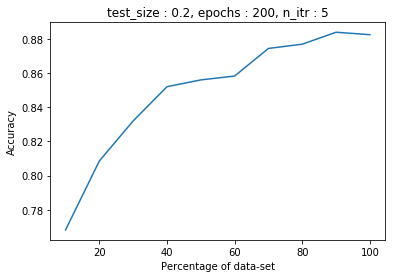

In [21]:
import matplotlib.pyplot as plt
x_axis = [10*i for i in range(1,11)]
title = []
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        title.append(["test_size : "+str(v),"epochs : " + str(e), "n_itr : " + str(n_itr)])
for i in range(0,len(overAllY)):
    y_axis = overAllY[i]
    plt.plot(x_axis,y_axis)
    plt.xlabel('Percentage of data-set')
    plt.ylabel('Accuracy')
    plt.title(title[i][0]+", "+title[i][1] + ", " + title[i][2])
    filename = "../dataset/bigdata2/result_dnn/graphs_dnn/"+str(title[i][0])+str(title[i][1])+str(title[i][2])+".png"
    print(filename)
    plt.savefig(filename)
    plt.show()

In [22]:
with open("../dataset/bigdata2/result_dnn/dnn_result_5iterations.txt","a+") as f:
    for i in range(0,len(overAllY)):
        line = str(title[i][0])+", "+ str(title[i][1])+", "+str(title[i][2])
        f.write(line+"\r\n")
        f.write(str(overAllY[i])+"\r\n")